Found 10183 files belonging to 4 classes.
Found 1332 files belonging to 4 classes.


2025-05-03 20:09:31.841369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:09:31.843053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


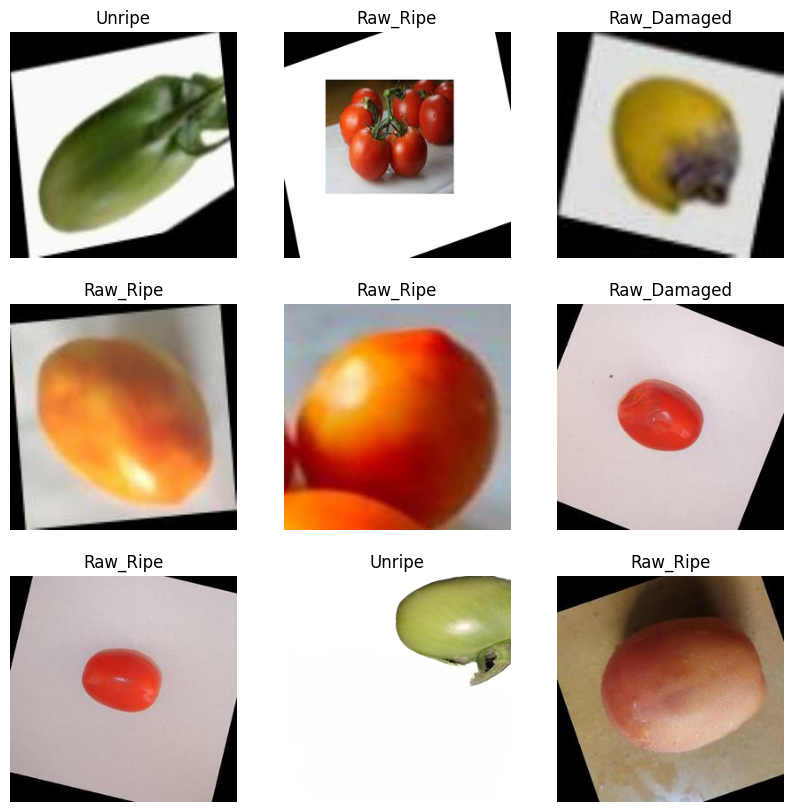

In [ ]:
# Resizing images
from PIL import Image
import os

# Change these paths as needed
input_dir = "content/ieee-mbl-cls/raw_train"
output_dir = "content/ieee-mbl-cls/train"
target_size = (256, 256)

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Walk through all subfolders
for subdir, _, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            input_path = os.path.join(subdir, file)

            # Create corresponding output subdir
            relative_subdir = os.path.relpath(subdir, input_dir)
            save_subdir = os.path.join(output_dir, relative_subdir)
            os.makedirs(save_subdir, exist_ok=True)

            output_path = os.path.join(save_subdir, file)

            try:
                with Image.open(input_path) as img:
                    img = img.convert("RGB")  # Ensure 3 channels
                    img = img.resize(target_size, Image.Resampling.LANCZOS)
                    img.save(output_path)
            except Exception as e:
                print(f"Failed to process {input_path}: {e}")

input_dir = "content/ieee-mbl-cls/raw_val"
output_dir = "content/ieee-mbl-cls/val"
target_size = (256, 256)

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Walk through all subfolders
for subdir, _, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            input_path = os.path.join(subdir, file)

            # Create corresponding output subdir
            relative_subdir = os.path.relpath(subdir, input_dir)
            save_subdir = os.path.join(output_dir, relative_subdir)
            os.makedirs(save_subdir, exist_ok=True)

            output_path = os.path.join(save_subdir, file)

            try:
                with Image.open(input_path) as img:
                    img = img.convert("RGB")  # Ensure 3 channels
                    img = img.resize(target_size, Image.Resampling.LANCZOS)
                    img.save(output_path)
            except Exception as e:
                print(f"Failed to process {input_path}: {e}")

Found 10183 files belonging to 4 classes.
Found 1332 files belonging to 4 classes.


2025-05-03 20:11:03.078293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:03.080235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:03.080997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:03.082107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:03.083316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


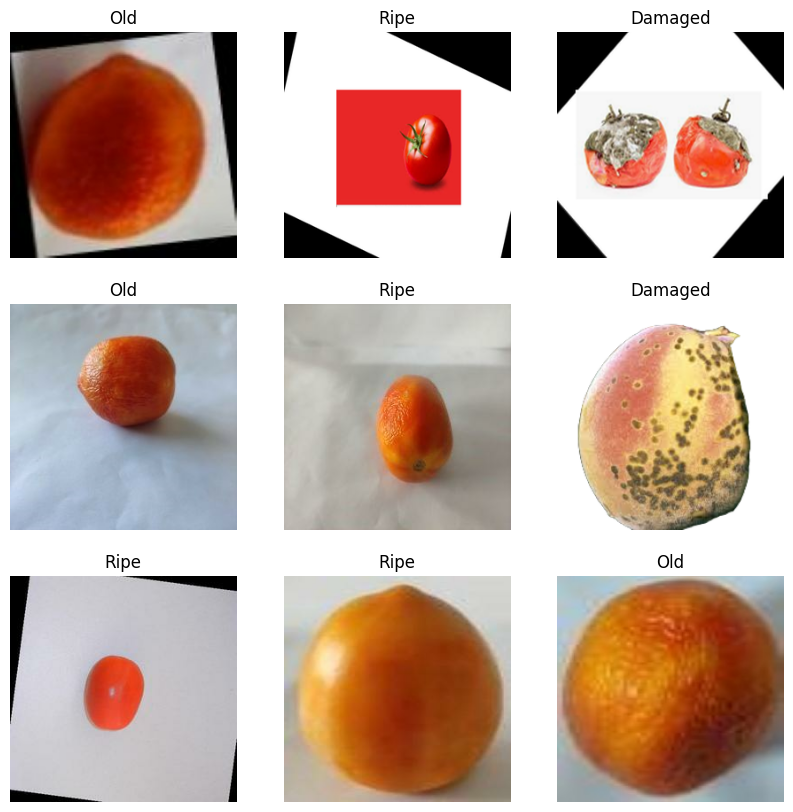

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset
train_dir = 'content/ieee-mbl-cls/train'
validation_dir = 'content/ieee-mbl-cls/val'

BATCH_SIZE = 32
IMG_SIZE = (256, 256)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
# Creating test set 
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

# Performance configurations
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Number of validation batches: 34
Number of test batches: 8


2025-05-03 20:11:16.549693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:16.550069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:16.551896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:16.553767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:16.553972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:16.555896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:11:16.652724: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


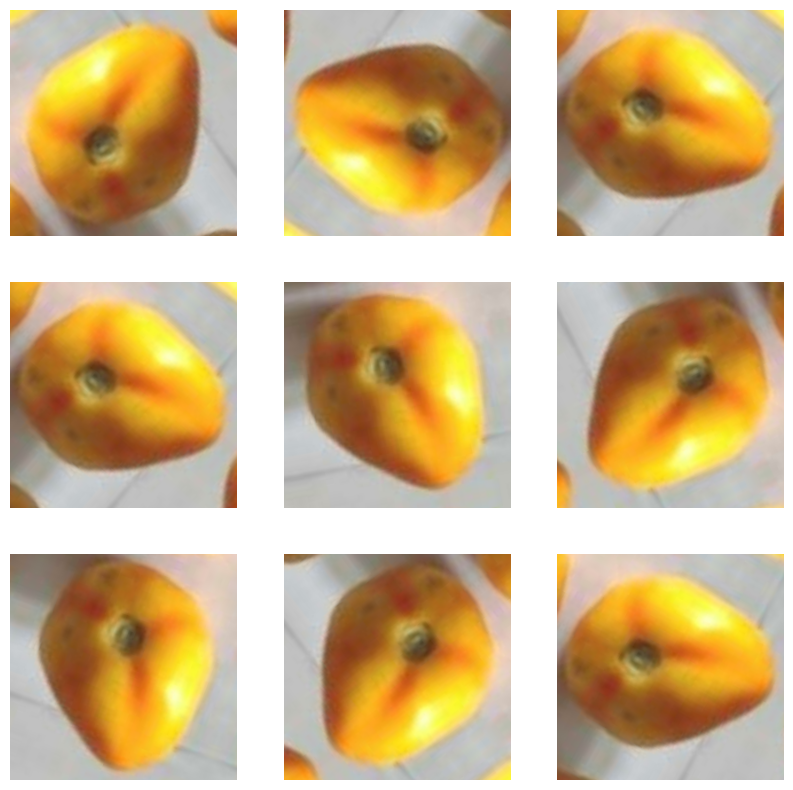

In [21]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [22]:
# Load and set up base model
from tensorflow.keras.applications import efficientnet_v2
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input
from tensorflow.keras import layers, models, optimizers

# Load with pre-trained weights
base_model = efficientnet_v2.EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# Build full model
inputs = tf.keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(4, activation='softmax')(x)  # 4-class output

model = models.Model(inputs, outputs)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 8, 8, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,083,796 (23.21 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

2025-05-03 20:15:32.729858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.729875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.729953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.730389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.730717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.731578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.731853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.732203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:32.732582: W tensorflow/core/lib/png/png_io.cc:92] PNG 

 1/34 ━━━━━━━━━━━━━━━━━━━━ 1:09 2s/step - accuracy: 0.8125 - loss: 0.5897

2025-05-03 20:15:33.059303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.060159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.061115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.061164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.063360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.063546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.064507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.064559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.071085: W tensorflow/core/lib/png/png_io.cc:92] PNG 

 2/34 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - accuracy: 0.8438 - loss: 0.5691

2025-05-03 20:15:33.344360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.344384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.345605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.345627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.346728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.347008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.347311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.347320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.347406: W tensorflow/core/lib/png/png_io.cc:92] PNG 

 3/34 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.8438 - loss: 0.5670

2025-05-03 20:15:33.642329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.642849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.642907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.644931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.650428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.652076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.652156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.652178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/34 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.8359 - loss: 0.5704

2025-05-03 20:15:33.929097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.929115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.929276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.931344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.931371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.932307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.932808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:33.933305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/34 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.8313 - loss: 0.5735

2025-05-03 20:15:34.217292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.217369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.217525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.219271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.221684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.221701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.221901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 6/34 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.8281 - loss: 0.5758

2025-05-03 20:15:34.509078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.510386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.510618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.510823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.511209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.511489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.512034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.512044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.513996: W tensorflow/core/lib/png/png_io.cc:92] PNG 

 7/34 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.8227 - loss: 0.5813

2025-05-03 20:15:34.800017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.800044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.801084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.801282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.801896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.802580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:34.804673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 8/34 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.8185 - loss: 0.5853

2025-05-03 20:15:35.083135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.083190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.083203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.083213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.084404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.084430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.085422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.085428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.087203: W tensorflow/core/lib/png/png_io.cc:92] PNG 

 9/34 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.8163 - loss: 0.5872

2025-05-03 20:15:35.371247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.371578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.372820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.373178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.373329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.375248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.375449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.375682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.375810: W tensorflow/core/lib/png/png_io.cc:92] PNG 

10/34 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.8150 - loss: 0.5888

2025-05-03 20:15:35.661990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.662048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.665111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.666858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.668464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.671660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.671680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.671800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/34 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.8140 - loss: 0.5898

2025-05-03 20:15:35.946504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.948037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.949842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:35.949958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/34 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.8128 - loss: 0.5908

2025-05-03 20:15:36.257224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.257279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.258529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.259480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.259935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.260258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


13/34 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.8122 - loss: 0.5911

2025-05-03 20:15:36.546384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.547706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.548428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.548652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.548736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.548777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.551435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.551777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


14/34 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.8111 - loss: 0.5921

2025-05-03 20:15:36.835561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.835922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.836235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.836888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.836972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.837136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.839443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.839603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:36.839742: W tensorflow/core/lib/png/png_io.cc:92] PNG 

15/34 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.8104 - loss: 0.5929

2025-05-03 20:15:37.127643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.128026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.128044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.128688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.130398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.130930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.130945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.131016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.131103: W tensorflow/core/lib/png/png_io.cc:92] PNG 

16/34 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.8101 - loss: 0.5930

2025-05-03 20:15:37.453334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.454337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.454473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.454631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.455208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.455228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.456167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.457622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.457726: W tensorflow/core/lib/png/png_io.cc:92] PNG 

17/34 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.8102 - loss: 0.5928

2025-05-03 20:15:37.740624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.740644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.740671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.741809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.743420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.743497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:37.744016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


18/34 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.8105 - loss: 0.5925

2025-05-03 20:15:38.028655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.029577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.029882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.030954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.032969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.033089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.033111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


19/34 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.8109 - loss: 0.5922

2025-05-03 20:15:38.317885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.318053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.318089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.318499: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.318822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.318988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.319877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.320506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.320674: W tensorflow/core/lib/png/png_io.cc:92] PNG 

20/34 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.8113 - loss: 0.5919

2025-05-03 20:15:38.601384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.602085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.604101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.604181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.605034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


21/34 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.8115 - loss: 0.5916

2025-05-03 20:15:38.886327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.886367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.887162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.887697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.888200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.888364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.888666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:38.888780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


22/34 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.8116 - loss: 0.5916

2025-05-03 20:15:39.174427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.174485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.177790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.178829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.179307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


23/34 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.8117 - loss: 0.5914

2025-05-03 20:15:39.464609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.465144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.465331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.465425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.465958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.465990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.468238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.468256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


24/34 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.8118 - loss: 0.5913

2025-05-03 20:15:39.758598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.758749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.759917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.760007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.761388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.763034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.763049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:39.763193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


25/34 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.8120 - loss: 0.5911

2025-05-03 20:15:40.049271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.049288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.051145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.051635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.052727: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.053164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.053358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.053551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


26/34 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.8123 - loss: 0.5908

2025-05-03 20:15:40.333965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.334517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.335160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.336074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.336186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.338003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.338022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.338766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.345251: W tensorflow/core/lib/png/png_io.cc:92] PNG 

27/34 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.8126 - loss: 0.5906

2025-05-03 20:15:40.620758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.622015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.622202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.622306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.622802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.623196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.623249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.625077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.625157: W tensorflow/core/lib/png/png_io.cc:92] PNG 

28/34 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.8126 - loss: 0.5905

2025-05-03 20:15:40.906432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.906932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:40.907542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - accuracy: 0.8135 - loss: 0.5901
initial loss: 0.59
initial accuracy: 0.82
Epoch 1/15


2025-05-03 20:15:46.354906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.358250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.358442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.360649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.361002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.363414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.363870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.364448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.365855: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 22:00 4s/step - accuracy: 0.7812 - loss: 0.5265

2025-05-03 20:15:46.678376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.678665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:46.679155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 308ms/step - accuracy: 0.7812 - loss: 0.5324

2025-05-03 20:15:46.986979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 308ms/step - accuracy: 0.7917 - loss: 0.5306

2025-05-03 20:15:47.293463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.294996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.295023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 307ms/step - accuracy: 0.7949 - loss: 0.5285

2025-05-03 20:15:47.596986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.597537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.597924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.600205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 307ms/step - accuracy: 0.7972 - loss: 0.5293

2025-05-03 20:15:47.901412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.904733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:47.905067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 309ms/step - accuracy: 0.7997 - loss: 0.5311

2025-05-03 20:15:48.217397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:48.221045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 309ms/step - accuracy: 0.8003 - loss: 0.5330

2025-05-03 20:15:48.534510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:48.534793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 310ms/step - accuracy: 0.8028 - loss: 0.5341

2025-05-03 20:15:48.847389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 310ms/step - accuracy: 0.8031 - loss: 0.5361

2025-05-03 20:15:49.157422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.160432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.161897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 310ms/step - accuracy: 0.8031 - loss: 0.5382

2025-05-03 20:15:49.471695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.472394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.474642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 313ms/step - accuracy: 0.8037 - loss: 0.5399

2025-05-03 20:15:49.805901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.806618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.806640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:49.809442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 312ms/step - accuracy: 0.8044 - loss: 0.5410

2025-05-03 20:15:50.111288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 312ms/step - accuracy: 0.8045 - loss: 0.5429

2025-05-03 20:15:50.416673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 312ms/step - accuracy: 0.8046 - loss: 0.5447

2025-05-03 20:15:50.724197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:50.726586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 311ms/step - accuracy: 0.8046 - loss: 0.5468

2025-05-03 20:15:51.033151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:51.033501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:51.036577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:51.037905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 311ms/step - accuracy: 0.8048 - loss: 0.5485

2025-05-03 20:15:51.342320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:51.343978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:51.344763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 314ms/step - accuracy: 0.8048 - loss: 0.5502

2025-05-03 20:15:51.698104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 313ms/step - accuracy: 0.8051 - loss: 0.5517

2025-05-03 20:15:52.003936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.003967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.007883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.008221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.008442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.008484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 313ms/step - accuracy: 0.8052 - loss: 0.5531

2025-05-03 20:15:52.309689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.312573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.313680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 313ms/step - accuracy: 0.8053 - loss: 0.5543

2025-05-03 20:15:52.627704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.628355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 314ms/step - accuracy: 0.8055 - loss: 0.5552

2025-05-03 20:15:52.950044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.954432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:52.955995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 313ms/step - accuracy: 0.8056 - loss: 0.5561

2025-05-03 20:15:53.258471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 313ms/step - accuracy: 0.8058 - loss: 0.5570

2025-05-03 20:15:53.562613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:53.562822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:53.564462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 313ms/step - accuracy: 0.8060 - loss: 0.5575

2025-05-03 20:15:53.870011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:53.872955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:53.873080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 313ms/step - accuracy: 0.8063 - loss: 0.5580

2025-05-03 20:15:54.178738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:54.179921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:54.180192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:54.181896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 313ms/step - accuracy: 0.8063 - loss: 0.5585

2025-05-03 20:15:54.490434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:54.494022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 313ms/step - accuracy: 0.8065 - loss: 0.5588

2025-05-03 20:15:54.799958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:54.802216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 312ms/step - accuracy: 0.8067 - loss: 0.5589

2025-05-03 20:15:55.105374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:55.105428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:55.106707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 312ms/step - accuracy: 0.8069 - loss: 0.5589

2025-05-03 20:15:55.417850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:55.417868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:55.421014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 312ms/step - accuracy: 0.8070 - loss: 0.5589

2025-05-03 20:15:55.741154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 312ms/step - accuracy: 0.8072 - loss: 0.5589

2025-05-03 20:15:56.046728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 312ms/step - accuracy: 0.8073 - loss: 0.5588

2025-05-03 20:15:56.357542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:56.358757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:56.362093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 313ms/step - accuracy: 0.8075 - loss: 0.5586

2025-05-03 20:15:56.706072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:56.709617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:56.709924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 314ms/step - accuracy: 0.8076 - loss: 0.5584

2025-05-03 20:15:57.027513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.028070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.028240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.028589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 314ms/step - accuracy: 0.8078 - loss: 0.5581

2025-05-03 20:15:57.339160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.339446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 314ms/step - accuracy: 0.8079 - loss: 0.5578

2025-05-03 20:15:57.655419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.655451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 313ms/step - accuracy: 0.8080 - loss: 0.5576

2025-05-03 20:15:57.961871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.961946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.962134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:57.963115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 313ms/step - accuracy: 0.8080 - loss: 0.5574

2025-05-03 20:15:58.273184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 313ms/step - accuracy: 0.8081 - loss: 0.5571

2025-05-03 20:15:58.587112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:58.590178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:58.590462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 313ms/step - accuracy: 0.8084 - loss: 0.5564

2025-05-03 20:15:59.201082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:59.201621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.8086 - loss: 0.5560

2025-05-03 20:15:59.505889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:59.509598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.8089 - loss: 0.5556

2025-05-03 20:15:59.815046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:15:59.819853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.8091 - loss: 0.5551

2025-05-03 20:16:00.140840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:00.144716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 313ms/step - accuracy: 0.8095 - loss: 0.5545

2025-05-03 20:16:00.455502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:00.460840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:00.460971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 313ms/step - accuracy: 0.8098 - loss: 0.5540

2025-05-03 20:16:00.777730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:00.780538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 313ms/step - accuracy: 0.8100 - loss: 0.5534

2025-05-03 20:16:01.093351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 313ms/step - accuracy: 0.8102 - loss: 0.5528

2025-05-03 20:16:01.401104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:01.402763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:01.403197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:01.404644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 314ms/step - accuracy: 0.8105 - loss: 0.5523

2025-05-03 20:16:01.754973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:01.755845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:01.758159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 314ms/step - accuracy: 0.8107 - loss: 0.5518

2025-05-03 20:16:02.061771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.063774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.064053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 314ms/step - accuracy: 0.8109 - loss: 0.5514

2025-05-03 20:16:02.376249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.378126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.378705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.379826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.379866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.380334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.380387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.381240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 314ms/step - accuracy: 0.8111 - loss: 0.5509

2025-05-03 20:16:02.689374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.691609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.692485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.692886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 314ms/step - accuracy: 0.8113 - loss: 0.5504

2025-05-03 20:16:02.995511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.995600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.996117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:02.999287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:03.000075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 314ms/step - accuracy: 0.8115 - loss: 0.5499

2025-05-03 20:16:03.310568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:03.312066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 314ms/step - accuracy: 0.8120 - loss: 0.5487

2025-05-03 20:16:04.250848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.252362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 314ms/step - accuracy: 0.8122 - loss: 0.5483

2025-05-03 20:16:04.562747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.562806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.562870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.565579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.566394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 314ms/step - accuracy: 0.8124 - loss: 0.5479

2025-05-03 20:16:04.873129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.877617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:04.878831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 314ms/step - accuracy: 0.8126 - loss: 0.5476

2025-05-03 20:16:05.173961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.174018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.177085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.8127 - loss: 0.5472

2025-05-03 20:16:05.487784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.488820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.488976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.489015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.489913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 313ms/step - accuracy: 0.8129 - loss: 0.5468

2025-05-03 20:16:05.796341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.796412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.799868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:05.800000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.8130 - loss: 0.5464

2025-05-03 20:16:06.114742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.115804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.117123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.117902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.8132 - loss: 0.5461

2025-05-03 20:16:06.469563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 314ms/step - accuracy: 0.8133 - loss: 0.5458

2025-05-03 20:16:06.785239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.786552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.788835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.790107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:06.790225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 314ms/step - accuracy: 0.8135 - loss: 0.5454

2025-05-03 20:16:07.109332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:07.110302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:07.113390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 314ms/step - accuracy: 0.8137 - loss: 0.5450

2025-05-03 20:16:07.423853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:07.428523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.8138 - loss: 0.5447

2025-05-03 20:16:07.728823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:07.728844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:07.732761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.8139 - loss: 0.5443

2025-05-03 20:16:08.036001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:08.038039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:08.038732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:08.039058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.8141 - loss: 0.5440

2025-05-03 20:16:08.344287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:08.344398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:08.345330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:08.348212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.8142 - loss: 0.5436

2025-05-03 20:16:08.651685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.8143 - loss: 0.5433

2025-05-03 20:16:08.961687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.8145 - loss: 0.5429

2025-05-03 20:16:09.268607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:09.269734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:09.270447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.8147 - loss: 0.5425

2025-05-03 20:16:09.586176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.8148 - loss: 0.5421

2025-05-03 20:16:09.914774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:09.916340: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.8149 - loss: 0.5418

2025-05-03 20:16:10.225920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.228321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.229734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.8151 - loss: 0.5414

2025-05-03 20:16:10.541622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.544526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.545799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.546378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.546436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.8153 - loss: 0.5410

2025-05-03 20:16:10.851155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.852403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:10.855146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.8155 - loss: 0.5406

2025-05-03 20:16:11.197872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:11.200788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.8156 - loss: 0.5402

2025-05-03 20:16:11.515175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:11.519361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.8158 - loss: 0.5398

2025-05-03 20:16:11.833632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:11.833655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:11.833666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.8160 - loss: 0.5394

2025-05-03 20:16:12.147788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:12.147985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:12.148779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:12.150344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:12.150807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:12.151442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.8162 - loss: 0.5389

2025-05-03 20:16:12.462636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 314ms/step - accuracy: 0.8164 - loss: 0.5385

2025-05-03 20:16:12.778799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:12.780222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 314ms/step - accuracy: 0.8167 - loss: 0.5378

2025-05-03 20:16:13.410251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:13.412297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 315ms/step - accuracy: 0.8168 - loss: 0.5374

2025-05-03 20:16:13.724958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:13.725928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:13.727323: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:13.728751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:13.728932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:13.729054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 315ms/step - accuracy: 0.8171 - loss: 0.5367

2025-05-03 20:16:14.350771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:14.350838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:14.352450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:14.352675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 314ms/step - accuracy: 0.8173 - loss: 0.5363

2025-05-03 20:16:14.661745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 314ms/step - accuracy: 0.8174 - loss: 0.5360

2025-05-03 20:16:14.981555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:14.983714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 314ms/step - accuracy: 0.8176 - loss: 0.5356

2025-05-03 20:16:15.285586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 314ms/step - accuracy: 0.8177 - loss: 0.5352

2025-05-03 20:16:15.594628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:15.596146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:15.598221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:15.599200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 314ms/step - accuracy: 0.8178 - loss: 0.5348

2025-05-03 20:16:15.915252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 315ms/step - accuracy: 0.8180 - loss: 0.5345

2025-05-03 20:16:16.280205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:16.282061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:16.282425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:16.285879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 315ms/step - accuracy: 0.8181 - loss: 0.5342

2025-05-03 20:16:16.595543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:16.599736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 315ms/step - accuracy: 0.8182 - loss: 0.5338

2025-05-03 20:16:16.907347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:16.911538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 315ms/step - accuracy: 0.8184 - loss: 0.5335

2025-05-03 20:16:17.228713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.229824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.230108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.230728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 315ms/step - accuracy: 0.8185 - loss: 0.5331

2025-05-03 20:16:17.552359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.552501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.554250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.8186 - loss: 0.5328

2025-05-03 20:16:17.868408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.868877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:17.870250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.8188 - loss: 0.5325

2025-05-03 20:16:18.185232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:18.186339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.8189 - loss: 0.5321

2025-05-03 20:16:18.496543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:18.496603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.8190 - loss: 0.5318

2025-05-03 20:16:18.827536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 315ms/step - accuracy: 0.8191 - loss: 0.5315

2025-05-03 20:16:19.161062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.164233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.164442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.166496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.166633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 315ms/step - accuracy: 0.8192 - loss: 0.5312

2025-05-03 20:16:19.482676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.485218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.485351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.487779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 315ms/step - accuracy: 0.8193 - loss: 0.5309

2025-05-03 20:16:19.802328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.802622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:19.802769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 315ms/step - accuracy: 0.8194 - loss: 0.5306

2025-05-03 20:16:20.115350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:20.116794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 315ms/step - accuracy: 0.8195 - loss: 0.5302

2025-05-03 20:16:20.428431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:20.432728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:20.433436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 315ms/step - accuracy: 0.8196 - loss: 0.5299

2025-05-03 20:16:20.741226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 316ms/step - accuracy: 0.8197 - loss: 0.5295

2025-05-03 20:16:21.106108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:21.108794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:21.109574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:21.110493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 316ms/step - accuracy: 0.8199 - loss: 0.5292

2025-05-03 20:16:21.426598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 316ms/step - accuracy: 0.8200 - loss: 0.5288

2025-05-03 20:16:21.753240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 316ms/step - accuracy: 0.8201 - loss: 0.5285

2025-05-03 20:16:22.063619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:22.063651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:22.067051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:22.067812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:22.068413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 316ms/step - accuracy: 0.8202 - loss: 0.5281

2025-05-03 20:16:22.382590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:22.383746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:22.385360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 316ms/step - accuracy: 0.8204 - loss: 0.5278

2025-05-03 20:16:22.703141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 316ms/step - accuracy: 0.8205 - loss: 0.5274

2025-05-03 20:16:23.023685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.029837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.030166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 316ms/step - accuracy: 0.8206 - loss: 0.5271

2025-05-03 20:16:23.356712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.358477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 316ms/step - accuracy: 0.8207 - loss: 0.5267

2025-05-03 20:16:23.671729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.671793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.674715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.675638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 316ms/step - accuracy: 0.8209 - loss: 0.5264

2025-05-03 20:16:23.976656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.979715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:23.980627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 316ms/step - accuracy: 0.8210 - loss: 0.5260

2025-05-03 20:16:24.286575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.289732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.290015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.290089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 316ms/step - accuracy: 0.8211 - loss: 0.5257

2025-05-03 20:16:24.597502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.600421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.601015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.602346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 316ms/step - accuracy: 0.8212 - loss: 0.5253

2025-05-03 20:16:24.908897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.910054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:24.910448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 316ms/step - accuracy: 0.8215 - loss: 0.5246

2025-05-03 20:16:25.523774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:25.524444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:25.525286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:25.526585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:25.528586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 316ms/step - accuracy: 0.8216 - loss: 0.5243

2025-05-03 20:16:25.845475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 316ms/step - accuracy: 0.8217 - loss: 0.5240

2025-05-03 20:16:26.196168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:26.197806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 316ms/step - accuracy: 0.8218 - loss: 0.5236

2025-05-03 20:16:26.513604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:26.514044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 316ms/step - accuracy: 0.8220 - loss: 0.5233

2025-05-03 20:16:26.828171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:26.828192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 316ms/step - accuracy: 0.8221 - loss: 0.5230

2025-05-03 20:16:27.134821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:27.137534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 59s 316ms/step - accuracy: 0.8222 - loss: 0.5227 

2025-05-03 20:16:27.452296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:27.455644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:27.456840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 59s 316ms/step - accuracy: 0.8223 - loss: 0.5223

2025-05-03 20:16:27.772857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:27.776297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 59s 316ms/step - accuracy: 0.8224 - loss: 0.5220

2025-05-03 20:16:28.106578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:28.106605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:28.109458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:28.110304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:28.111005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:28.111057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 58s 316ms/step - accuracy: 0.8225 - loss: 0.5217

2025-05-03 20:16:28.423885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 58s 316ms/step - accuracy: 0.8226 - loss: 0.5214

2025-05-03 20:16:28.736569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 58s 316ms/step - accuracy: 0.8227 - loss: 0.5210

2025-05-03 20:16:29.058760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 57s 316ms/step - accuracy: 0.8229 - loss: 0.5204

2025-05-03 20:16:29.681395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:29.685408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 57s 316ms/step - accuracy: 0.8231 - loss: 0.5200

2025-05-03 20:16:29.992421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:29.992459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:29.996694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 56s 316ms/step - accuracy: 0.8232 - loss: 0.5197

2025-05-03 20:16:30.323847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:30.324945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:30.325137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 56s 316ms/step - accuracy: 0.8233 - loss: 0.5194

2025-05-03 20:16:30.645882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 56s 316ms/step - accuracy: 0.8234 - loss: 0.5190

2025-05-03 20:16:30.960917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 56s 317ms/step - accuracy: 0.8235 - loss: 0.5187

2025-05-03 20:16:31.320028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.321031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.324585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 55s 317ms/step - accuracy: 0.8236 - loss: 0.5183

2025-05-03 20:16:31.641466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.645302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.645422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.645697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.647062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 55s 317ms/step - accuracy: 0.8237 - loss: 0.5180

2025-05-03 20:16:31.964064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.965003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.966911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.967530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:31.967930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 55s 317ms/step - accuracy: 0.8238 - loss: 0.5177

2025-05-03 20:16:32.288220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.292167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 54s 317ms/step - accuracy: 0.8239 - loss: 0.5173

2025-05-03 20:16:32.608647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.609899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.611988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.612029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 54s 317ms/step - accuracy: 0.8240 - loss: 0.5170

2025-05-03 20:16:32.918460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.920983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.921843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.922752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:32.923282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 54s 317ms/step - accuracy: 0.8242 - loss: 0.5166

2025-05-03 20:16:33.237796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:33.238027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:33.241753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 54s 322ms/step - accuracy: 0.8243 - loss: 0.5163

2025-05-03 20:16:34.362914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:34.370016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.8244 - loss: 0.5159

2025-05-03 20:16:34.898670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 54s 325ms/step - accuracy: 0.8245 - loss: 0.5156

2025-05-03 20:16:35.447199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:35.450687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:35.452806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.8246 - loss: 0.5152

2025-05-03 20:16:35.826776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:35.828750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:35.833124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.8247 - loss: 0.5149

2025-05-03 20:16:36.223822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:36.227509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:36.227858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 53s 326ms/step - accuracy: 0.8248 - loss: 0.5146

2025-05-03 20:16:36.583549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:36.585768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:36.585792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 53s 326ms/step - accuracy: 0.8249 - loss: 0.5142

2025-05-03 20:16:36.914195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 53s 327ms/step - accuracy: 0.8250 - loss: 0.5139

2025-05-03 20:16:37.300804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:37.301522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:37.303071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 52s 327ms/step - accuracy: 0.8252 - loss: 0.5132

2025-05-03 20:16:38.015755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.017575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.023114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 52s 327ms/step - accuracy: 0.8253 - loss: 0.5129

2025-05-03 20:16:38.373069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.373501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.373875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.373927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 52s 327ms/step - accuracy: 0.8254 - loss: 0.5126

2025-05-03 20:16:38.736927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.737216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:38.738219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 51s 327ms/step - accuracy: 0.8255 - loss: 0.5122

2025-05-03 20:16:39.068126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 51s 328ms/step - accuracy: 0.8256 - loss: 0.5119

2025-05-03 20:16:39.418027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:39.418238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:39.419004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:39.419594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 51s 328ms/step - accuracy: 0.8257 - loss: 0.5116

2025-05-03 20:16:39.795517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:39.799252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 50s 328ms/step - accuracy: 0.8258 - loss: 0.5112

2025-05-03 20:16:40.125533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:40.127992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 50s 328ms/step - accuracy: 0.8259 - loss: 0.5109

2025-05-03 20:16:40.487144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 50s 328ms/step - accuracy: 0.8260 - loss: 0.5106

2025-05-03 20:16:40.794793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:40.795023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:40.797783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:40.798575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:40.798883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:40.799881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 49s 328ms/step - accuracy: 0.8262 - loss: 0.5099

2025-05-03 20:16:41.485635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:41.486119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 49s 328ms/step - accuracy: 0.8263 - loss: 0.5096

2025-05-03 20:16:41.819676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:41.819847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:41.820318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:41.823082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 48s 328ms/step - accuracy: 0.8264 - loss: 0.5093

2025-05-03 20:16:42.134618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.134843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.134913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.137643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 48s 328ms/step - accuracy: 0.8265 - loss: 0.5090

2025-05-03 20:16:42.490338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.490378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.490696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.493056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 48s 329ms/step - accuracy: 0.8266 - loss: 0.5087

2025-05-03 20:16:42.855659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.856069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.860072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.860105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:42.863504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.8267 - loss: 0.5084

2025-05-03 20:16:43.189236: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.8268 - loss: 0.5081

2025-05-03 20:16:43.533947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.534469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.8269 - loss: 0.5078

2025-05-03 20:16:43.854309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.857512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.857770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.858318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.858431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.858840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:43.858953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.8270 - loss: 0.5075

2025-05-03 20:16:44.229252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:44.230284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 46s 329ms/step - accuracy: 0.8271 - loss: 0.5072

2025-05-03 20:16:44.548877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:44.549262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:44.553032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:44.553099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:44.553265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 46s 329ms/step - accuracy: 0.8272 - loss: 0.5069

2025-05-03 20:16:44.884786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 46s 329ms/step - accuracy: 0.8272 - loss: 0.5066

2025-05-03 20:16:45.207142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:45.207166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 45s 329ms/step - accuracy: 0.8273 - loss: 0.5063

2025-05-03 20:16:45.570894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:45.571015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:45.575278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 45s 329ms/step - accuracy: 0.8274 - loss: 0.5060

2025-05-03 20:16:45.890875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:45.897020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 45s 329ms/step - accuracy: 0.8275 - loss: 0.5057

2025-05-03 20:16:46.213404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:46.213486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 44s 329ms/step - accuracy: 0.8276 - loss: 0.5054

2025-05-03 20:16:46.533546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:46.535833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:46.540806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 44s 329ms/step - accuracy: 0.8277 - loss: 0.5051

2025-05-03 20:16:46.854615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:46.857369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:46.858841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:46.859710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 44s 329ms/step - accuracy: 0.8278 - loss: 0.5048

2025-05-03 20:16:47.175694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:47.177597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 43s 329ms/step - accuracy: 0.8279 - loss: 0.5045

2025-05-03 20:16:47.498721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:47.498983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 43s 329ms/step - accuracy: 0.8279 - loss: 0.5042

2025-05-03 20:16:47.863964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:47.864629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 43s 329ms/step - accuracy: 0.8280 - loss: 0.5039

2025-05-03 20:16:48.254415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:48.260568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.8281 - loss: 0.5036

2025-05-03 20:16:48.611353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:48.614617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.8282 - loss: 0.5034

2025-05-03 20:16:48.931395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:48.936923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - accuracy: 0.8283 - loss: 0.5031

2025-05-03 20:16:49.287696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:49.289903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.8283 - loss: 0.5028

2025-05-03 20:16:49.638891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:49.642711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.8285 - loss: 0.5022

2025-05-03 20:16:50.357656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.357824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.358879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.360672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.8286 - loss: 0.5020

2025-05-03 20:16:50.655628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.658769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.659613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.660219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.8286 - loss: 0.5017

2025-05-03 20:16:50.997355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:50.999570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:51.000372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.8287 - loss: 0.5014

2025-05-03 20:16:51.371160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.8288 - loss: 0.5011

2025-05-03 20:16:51.717995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.8289 - loss: 0.5009

2025-05-03 20:16:52.039944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.8289 - loss: 0.5006

2025-05-03 20:16:52.409427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:52.411304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.8290 - loss: 0.5003

2025-05-03 20:16:52.707890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:52.713232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.8291 - loss: 0.5001

2025-05-03 20:16:53.017055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:53.018303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.8292 - loss: 0.4998

2025-05-03 20:16:53.380157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:53.380348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 37s 330ms/step - accuracy: 0.8292 - loss: 0.4995

2025-05-03 20:16:53.717677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:53.718442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 37s 330ms/step - accuracy: 0.8293 - loss: 0.4992

2025-05-03 20:16:54.066579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 37s 330ms/step - accuracy: 0.8294 - loss: 0.4990

2025-05-03 20:16:54.396422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:54.396675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:54.401468: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:54.401506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 37s 330ms/step - accuracy: 0.8295 - loss: 0.4987

2025-05-03 20:16:54.745865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:54.749345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 36s 330ms/step - accuracy: 0.8296 - loss: 0.4982

2025-05-03 20:16:55.374281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:55.374331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:55.376396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.8297 - loss: 0.4979

2025-05-03 20:16:55.679057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.8298 - loss: 0.4976

2025-05-03 20:16:55.979295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:55.981930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:55.982671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:55.984066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.8299 - loss: 0.4973

2025-05-03 20:16:56.284906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.8299 - loss: 0.4971

2025-05-03 20:16:56.587737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:56.589200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:56.589241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:56.589450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.8300 - loss: 0.4968

2025-05-03 20:16:56.888637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.8301 - loss: 0.4965

2025-05-03 20:16:57.204798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:57.207418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:57.207487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.8302 - loss: 0.4963

2025-05-03 20:16:57.507635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:57.509496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.8303 - loss: 0.4960

2025-05-03 20:16:57.825971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.8303 - loss: 0.4957

2025-05-03 20:16:58.125251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:58.129239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.8304 - loss: 0.4955

2025-05-03 20:16:58.495941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:58.496718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:58.501225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.8305 - loss: 0.4952

2025-05-03 20:16:58.802644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:58.802990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.8306 - loss: 0.4950

2025-05-03 20:16:59.147945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.8306 - loss: 0.4947

2025-05-03 20:16:59.450294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:59.452532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:59.453854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:59.456399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:59.456839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.8307 - loss: 0.4944

2025-05-03 20:16:59.762392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:59.765820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:16:59.766211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.8308 - loss: 0.4942

2025-05-03 20:17:00.066780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.8309 - loss: 0.4939

2025-05-03 20:17:00.364175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.369479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.371755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.371904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.8309 - loss: 0.4937

2025-05-03 20:17:00.671963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.672309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.674613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.676372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.8310 - loss: 0.4934

2025-05-03 20:17:00.971794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.971953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.974139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.974270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:00.980046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.8311 - loss: 0.4932

2025-05-03 20:17:01.274517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.278114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.278582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.279478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.8312 - loss: 0.4929

2025-05-03 20:17:01.584543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 29s 328ms/step - accuracy: 0.8312 - loss: 0.4927

2025-05-03 20:17:01.887466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.888492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.890700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.891281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:01.893802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.8314 - loss: 0.4922

2025-05-03 20:17:02.603879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:02.605016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:02.605398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:02.605413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:02.606943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.8315 - loss: 0.4919

2025-05-03 20:17:02.908418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.8315 - loss: 0.4917

2025-05-03 20:17:03.217299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:03.219825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 27s 328ms/step - accuracy: 0.8316 - loss: 0.4914

2025-05-03 20:17:03.530213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:03.530259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:03.533121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:03.535716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.8317 - loss: 0.4912

2025-05-03 20:17:03.900240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:03.901258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:03.901564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.8318 - loss: 0.4909

2025-05-03 20:17:04.262294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:04.267389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:04.268614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.8318 - loss: 0.4907

2025-05-03 20:17:04.606903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:04.609954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:04.610861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:04.611113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.8319 - loss: 0.4904

2025-05-03 20:17:04.929234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:04.930332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.8320 - loss: 0.4902

2025-05-03 20:17:05.241822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.241912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.242237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.245810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.245837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.8320 - loss: 0.4900

2025-05-03 20:17:05.606623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.607762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.8321 - loss: 0.4897

2025-05-03 20:17:05.964518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.965747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.968316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.968332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:05.968549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.8322 - loss: 0.4895

2025-05-03 20:17:06.296882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:06.297090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:06.301303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 24s 329ms/step - accuracy: 0.8322 - loss: 0.4892

2025-05-03 20:17:06.623942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:06.625491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 24s 329ms/step - accuracy: 0.8323 - loss: 0.4890

2025-05-03 20:17:06.968739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:06.971287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:06.973394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:06.976787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 24s 329ms/step - accuracy: 0.8324 - loss: 0.4888

2025-05-03 20:17:07.312965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:07.317307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:07.318294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:07.318491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.8325 - loss: 0.4885

2025-05-03 20:17:07.680841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.8325 - loss: 0.4883

2025-05-03 20:17:08.022765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.023162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.023945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.026428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.027822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 23s 330ms/step - accuracy: 0.8326 - loss: 0.4881

2025-05-03 20:17:08.401413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.401449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - accuracy: 0.8327 - loss: 0.4878

2025-05-03 20:17:08.747278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.748351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:08.750375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - accuracy: 0.8327 - loss: 0.4876

2025-05-03 20:17:09.066542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - accuracy: 0.8328 - loss: 0.4874

2025-05-03 20:17:09.386825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:09.387225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:09.392431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.8329 - loss: 0.4871

2025-05-03 20:17:09.724695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:09.729380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.8330 - loss: 0.4869

2025-05-03 20:17:10.061682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.063205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.064554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.066765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.067212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.8330 - loss: 0.4867

2025-05-03 20:17:10.373665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.374436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.377421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.8331 - loss: 0.4864

2025-05-03 20:17:10.748991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.757251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:10.758123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.8332 - loss: 0.4862

2025-05-03 20:17:11.129429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:11.131438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:11.137249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.8332 - loss: 0.4860

2025-05-03 20:17:11.475817: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:11.476147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:11.477271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:11.477537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:11.477759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.8333 - loss: 0.4855

2025-05-03 20:17:12.185658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:12.185685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.8334 - loss: 0.4853

2025-05-03 20:17:12.542294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.8335 - loss: 0.4851

2025-05-03 20:17:12.889046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:12.889639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.8335 - loss: 0.4849

2025-05-03 20:17:13.238441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:13.242362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.8336 - loss: 0.4846

2025-05-03 20:17:13.560119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:13.563038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:13.563072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.8337 - loss: 0.4844

2025-05-03 20:17:13.907523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:13.908715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:13.909212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.8337 - loss: 0.4842

2025-05-03 20:17:14.254092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.8338 - loss: 0.4840

2025-05-03 20:17:14.570302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:14.573596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:14.577318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.8339 - loss: 0.4838

2025-05-03 20:17:14.881595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:14.884500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:14.885253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:14.885272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:14.889910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.8339 - loss: 0.4836

2025-05-03 20:17:15.214297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.8340 - loss: 0.4833

2025-05-03 20:17:15.538268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:15.539072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.8341 - loss: 0.4831

2025-05-03 20:17:15.865207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:15.865878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:15.865987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:15.870543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.8341 - loss: 0.4829

2025-05-03 20:17:16.171252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.175131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.8342 - loss: 0.4827

2025-05-03 20:17:16.475118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.475308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.477918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.478014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.482248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.8343 - loss: 0.4825

2025-05-03 20:17:16.793425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.795462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:16.816854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.8343 - loss: 0.4823

2025-05-03 20:17:17.151916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.8344 - loss: 0.4821

2025-05-03 20:17:17.461001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:17.465040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.8345 - loss: 0.4818

2025-05-03 20:17:17.760504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:17.761564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:17.762200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.8345 - loss: 0.4816

2025-05-03 20:17:18.078788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:18.079781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:18.081446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.8346 - loss: 0.4814

2025-05-03 20:17:18.435661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:18.438617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.8346 - loss: 0.4812

2025-05-03 20:17:18.749187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.8347 - loss: 0.4810

2025-05-03 20:17:19.202857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.8348 - loss: 0.4808

2025-05-03 20:17:19.528402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.528419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.531144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.531391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.532081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.8348 - loss: 0.4806

2025-05-03 20:17:19.838102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.839050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.842123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:19.842197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.8349 - loss: 0.4804

2025-05-03 20:17:20.183548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.8350 - loss: 0.4802

2025-05-03 20:17:20.495576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:20.499944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:20.499976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.8350 - loss: 0.4800

2025-05-03 20:17:20.842178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:20.843049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:20.843183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.8351 - loss: 0.4798

2025-05-03 20:17:21.210843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:21.211590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.8351 - loss: 0.4795

2025-05-03 20:17:21.523251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.8352 - loss: 0.4793 

2025-05-03 20:17:21.827220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:21.829290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.8353 - loss: 0.4791

2025-05-03 20:17:22.112808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.115478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.116493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.120425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.8353 - loss: 0.4789

2025-05-03 20:17:22.419635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.420315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.425000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.425404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.8354 - loss: 0.4787

2025-05-03 20:17:22.755517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.756687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:22.758652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.8354 - loss: 0.4785

2025-05-03 20:17:23.059364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.8355 - loss: 0.4783

2025-05-03 20:17:23.397917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:23.399555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:23.399627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:23.400424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:23.400444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:23.401521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.8356 - loss: 0.4781

2025-05-03 20:17:23.760438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:23.764214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.8356 - loss: 0.4779

2025-05-03 20:17:24.102097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.8357 - loss: 0.4777

2025-05-03 20:17:24.420176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:24.423741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - accuracy: 0.8357 - loss: 0.4775

2025-05-03 20:17:24.812597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:24.812968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:24.816859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:24.817421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - accuracy: 0.8358 - loss: 0.4773

2025-05-03 20:17:25.130987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:25.135501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - accuracy: 0.8359 - loss: 0.4771

2025-05-03 20:17:25.456047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.8359 - loss: 0.4769

2025-05-03 20:17:25.801250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:25.802033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.8360 - loss: 0.4767

2025-05-03 20:17:26.121816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:26.126093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.8360 - loss: 0.4765

2025-05-03 20:17:26.434798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:26.439630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.8361 - loss: 0.4763

2025-05-03 20:17:26.769846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:26.771382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.8362 - loss: 0.4761

2025-05-03 20:17:27.103858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:27.105795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.8362 - loss: 0.4759

2025-05-03 20:17:27.433909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:27.437211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.8363 - loss: 0.4757

2025-05-03 20:17:27.739601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.8363 - loss: 0.4755

2025-05-03 20:17:28.068822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:28.072039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:28.072551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:28.072621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:28.077082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.8364 - loss: 0.4753

2025-05-03 20:17:28.410789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.8364 - loss: 0.4751

2025-05-03 20:17:28.800982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.8365 - loss: 0.4749

2025-05-03 20:17:29.113588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:29.114011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:29.114933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:29.117017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:29.117072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.8366 - loss: 0.4747

2025-05-03 20:17:29.472814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.8370 - loss: 0.4733

2025-05-03 20:17:31.595458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.595478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.595769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.595899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.596316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.596700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.596807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.597765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:31.597876: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 119s 360ms/step - accuracy: 0.8370 - loss: 0.4731 - val_accuracy: 0.8736 - val_loss: 0.3432
Epoch 2/15


2025-05-03 20:17:41.296339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.297466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.299029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.301978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.305397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.306122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.310192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.318762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.321097: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 310ms/step - accuracy: 0.9375 - loss: 0.2549

2025-05-03 20:17:41.601962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.603987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.605036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.605124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 298ms/step - accuracy: 0.9375 - loss: 0.2480

2025-05-03 20:17:41.902504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:41.903898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 296ms/step - accuracy: 0.9306 - loss: 0.2525

2025-05-03 20:17:42.194096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:42.197596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 298ms/step - accuracy: 0.9225 - loss: 0.2599

2025-05-03 20:17:42.498158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:42.502108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 300ms/step - accuracy: 0.9180 - loss: 0.2645

2025-05-03 20:17:42.806983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:42.807101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 300ms/step - accuracy: 0.9169 - loss: 0.2653

2025-05-03 20:17:43.105542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:43.107583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:43.107610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 299ms/step - accuracy: 0.9167 - loss: 0.2646

2025-05-03 20:17:43.396822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:43.401287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 298ms/step - accuracy: 0.9159 - loss: 0.2642

2025-05-03 20:17:43.692135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:43.692358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:43.692614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 298ms/step - accuracy: 0.9160 - loss: 0.2629

2025-05-03 20:17:43.983252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:43.986989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 297ms/step - accuracy: 0.9159 - loss: 0.2620

2025-05-03 20:17:44.277209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.277322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.280928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.282379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 297ms/step - accuracy: 0.9161 - loss: 0.2617

2025-05-03 20:17:44.570368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.570560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.571410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 296ms/step - accuracy: 0.9166 - loss: 0.2611

2025-05-03 20:17:44.860800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.861720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.861744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:44.862063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 295ms/step - accuracy: 0.9166 - loss: 0.2614

2025-05-03 20:17:45.438150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:45.438546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:45.443535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 295ms/step - accuracy: 0.9163 - loss: 0.2623

2025-05-03 20:17:45.736189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 295ms/step - accuracy: 0.9157 - loss: 0.2637

2025-05-03 20:17:46.030884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.032370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 295ms/step - accuracy: 0.9150 - loss: 0.2648

2025-05-03 20:17:46.327423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.328986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.329678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.330101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.330586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 296ms/step - accuracy: 0.9142 - loss: 0.2666

2025-05-03 20:17:46.630414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 298ms/step - accuracy: 0.9136 - loss: 0.2681

2025-05-03 20:17:46.969133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.969421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.972436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.972459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:46.972532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 302ms/step - accuracy: 0.9118 - loss: 0.2715

2025-05-03 20:17:47.642517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:47.644883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:47.645909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 302ms/step - accuracy: 0.9109 - loss: 0.2731

2025-05-03 20:17:47.946819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:47.947553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:47.952010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:47.952467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 302ms/step - accuracy: 0.9103 - loss: 0.2743

2025-05-03 20:17:48.251849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:48.252212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 303ms/step - accuracy: 0.9096 - loss: 0.2753

2025-05-03 20:17:48.562559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:48.564431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 304ms/step - accuracy: 0.9090 - loss: 0.2765

2025-05-03 20:17:48.897910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:48.898108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:48.900453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:48.902551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 304ms/step - accuracy: 0.9084 - loss: 0.2776

2025-05-03 20:17:49.205442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:49.207138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:49.207574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:49.207607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 304ms/step - accuracy: 0.9071 - loss: 0.2796

2025-05-03 20:17:49.802935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:49.803351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:49.804353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:49.806019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 304ms/step - accuracy: 0.9066 - loss: 0.2805

2025-05-03 20:17:50.105751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:50.105781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 303ms/step - accuracy: 0.9060 - loss: 0.2815

2025-05-03 20:17:50.398590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:50.399322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 303ms/step - accuracy: 0.9054 - loss: 0.2823

2025-05-03 20:17:50.691209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:50.692081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:50.693239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 302ms/step - accuracy: 0.9045 - loss: 0.2835

2025-05-03 20:17:51.265486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.268835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.270494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 302ms/step - accuracy: 0.9041 - loss: 0.2841

2025-05-03 20:17:51.561021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.561866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.562227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.562469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.562682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:51.563039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 301ms/step - accuracy: 0.9037 - loss: 0.2846

2025-05-03 20:17:51.854809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 301ms/step - accuracy: 0.9033 - loss: 0.2850

2025-05-03 20:17:52.145991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:52.147535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:52.149683: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:52.150221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 301ms/step - accuracy: 0.9029 - loss: 0.2855

2025-05-03 20:17:52.434320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:52.434531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 301ms/step - accuracy: 0.9025 - loss: 0.2859

2025-05-03 20:17:52.724499: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 300ms/step - accuracy: 0.9021 - loss: 0.2863

2025-05-03 20:17:53.016400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.016540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.016781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.017392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.021333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.022126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 300ms/step - accuracy: 0.9017 - loss: 0.2867

2025-05-03 20:17:53.316288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.318698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.318731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.321392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 300ms/step - accuracy: 0.9014 - loss: 0.2870

2025-05-03 20:17:53.607877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.611615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.612057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:53.612085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 301ms/step - accuracy: 0.9012 - loss: 0.2873

2025-05-03 20:17:53.940458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 301ms/step - accuracy: 0.9009 - loss: 0.2875

2025-05-03 20:17:54.235745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:54.236396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 301ms/step - accuracy: 0.9006 - loss: 0.2877

2025-05-03 20:17:54.538956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:54.538998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 301ms/step - accuracy: 0.9003 - loss: 0.2880

2025-05-03 20:17:54.836974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 300ms/step - accuracy: 0.9001 - loss: 0.2883

2025-05-03 20:17:55.125511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.125951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.127034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.128244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.129973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 300ms/step - accuracy: 0.8997 - loss: 0.2886

2025-05-03 20:17:55.411064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.412890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.414087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:55.414481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 300ms/step - accuracy: 0.8991 - loss: 0.2893

2025-05-03 20:17:55.999742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 300ms/step - accuracy: 0.8989 - loss: 0.2896

2025-05-03 20:17:56.298689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.299174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.300761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 301ms/step - accuracy: 0.8986 - loss: 0.2900

2025-05-03 20:17:56.670015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.673686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.673719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.675972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 302ms/step - accuracy: 0.8984 - loss: 0.2903

2025-05-03 20:17:56.991763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.995111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:56.995391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 302ms/step - accuracy: 0.8981 - loss: 0.2906

2025-05-03 20:17:57.296737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 302ms/step - accuracy: 0.8979 - loss: 0.2909

2025-05-03 20:17:57.606913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:57.609980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:57.610431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 302ms/step - accuracy: 0.8976 - loss: 0.2912

2025-05-03 20:17:57.910698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:57.911987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:57.914876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 302ms/step - accuracy: 0.8974 - loss: 0.2915

2025-05-03 20:17:58.213703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.213847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.214642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.214680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 302ms/step - accuracy: 0.8972 - loss: 0.2918

2025-05-03 20:17:58.514854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.516826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.517222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.518121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 302ms/step - accuracy: 0.8970 - loss: 0.2920

2025-05-03 20:17:58.811992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.815779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.815994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:58.816704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 302ms/step - accuracy: 0.8968 - loss: 0.2923

2025-05-03 20:17:59.116664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:59.117349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:59.121828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 303ms/step - accuracy: 0.8966 - loss: 0.2925

2025-05-03 20:17:59.450799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:59.451678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:59.452270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:59.452422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 302ms/step - accuracy: 0.8965 - loss: 0.2928

2025-05-03 20:17:59.751368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:17:59.751418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 302ms/step - accuracy: 0.8963 - loss: 0.2930

2025-05-03 20:18:00.044640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:00.045036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:00.047257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:00.047277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 302ms/step - accuracy: 0.8961 - loss: 0.2932

2025-05-03 20:18:00.361675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 302ms/step - accuracy: 0.8960 - loss: 0.2934

2025-05-03 20:18:00.657372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:00.657650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:00.658773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 302ms/step - accuracy: 0.8958 - loss: 0.2936

2025-05-03 20:18:00.951839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:00.956453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 302ms/step - accuracy: 0.8957 - loss: 0.2938

2025-05-03 20:18:01.261847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:01.264991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:01.266090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 303ms/step - accuracy: 0.8956 - loss: 0.2939

2025-05-03 20:18:01.626444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 304ms/step - accuracy: 0.8954 - loss: 0.2941

2025-05-03 20:18:01.952882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:01.953044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:01.953133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:01.957253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 304ms/step - accuracy: 0.8953 - loss: 0.2943

2025-05-03 20:18:02.248889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.248991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.250233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.251054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.252570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 304ms/step - accuracy: 0.8951 - loss: 0.2945

2025-05-03 20:18:02.558562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 304ms/step - accuracy: 0.8950 - loss: 0.2947

2025-05-03 20:18:02.853534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.853663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.857872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:02.857912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 305ms/step - accuracy: 0.8949 - loss: 0.2949

2025-05-03 20:18:03.263268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:03.266352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:03.270718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 306ms/step - accuracy: 0.8947 - loss: 0.2951

2025-05-03 20:18:03.602184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:03.602222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:03.603736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:03.603769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:03.605253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 305ms/step - accuracy: 0.8946 - loss: 0.2953

2025-05-03 20:18:03.898614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 305ms/step - accuracy: 0.8945 - loss: 0.2955

2025-05-03 20:18:04.205563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 305ms/step - accuracy: 0.8944 - loss: 0.2956

2025-05-03 20:18:04.503951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:04.505838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:04.506917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 306ms/step - accuracy: 0.8942 - loss: 0.2958

2025-05-03 20:18:04.846290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:04.848921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:04.851244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 306ms/step - accuracy: 0.8941 - loss: 0.2960

2025-05-03 20:18:05.145555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:05.145750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 306ms/step - accuracy: 0.8940 - loss: 0.2961

2025-05-03 20:18:05.440437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 305ms/step - accuracy: 0.8939 - loss: 0.2963

2025-05-03 20:18:05.734738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:05.738470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:05.741650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 306ms/step - accuracy: 0.8938 - loss: 0.2965

2025-05-03 20:18:06.049122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:06.053390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:06.054133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 305ms/step - accuracy: 0.8937 - loss: 0.2966

2025-05-03 20:18:06.342971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:06.346995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:06.347199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 305ms/step - accuracy: 0.8935 - loss: 0.2969

2025-05-03 20:18:06.940101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 305ms/step - accuracy: 0.8934 - loss: 0.2970

2025-05-03 20:18:07.237531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:07.238520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:07.239101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:07.242099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 305ms/step - accuracy: 0.8933 - loss: 0.2971

2025-05-03 20:18:07.531907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:07.534776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 305ms/step - accuracy: 0.8932 - loss: 0.2973

2025-05-03 20:18:07.830471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:07.833393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:07.834625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 305ms/step - accuracy: 0.8931 - loss: 0.2974

2025-05-03 20:18:08.135092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.135171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.135316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 305ms/step - accuracy: 0.8930 - loss: 0.2976

2025-05-03 20:18:08.426292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.426391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.426537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.429779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.430482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 305ms/step - accuracy: 0.8929 - loss: 0.2977

2025-05-03 20:18:08.723492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:08.725487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 305ms/step - accuracy: 0.8928 - loss: 0.2978

2025-05-03 20:18:09.010286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:09.013183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 304ms/step - accuracy: 0.8928 - loss: 0.2979

2025-05-03 20:18:09.304032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:09.307071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 304ms/step - accuracy: 0.8927 - loss: 0.2980

2025-05-03 20:18:09.598911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:09.603498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 304ms/step - accuracy: 0.8926 - loss: 0.2981

2025-05-03 20:18:09.893000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:09.893059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:09.900511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:09.906899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 305ms/step - accuracy: 0.8925 - loss: 0.2982

2025-05-03 20:18:10.236828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:10.237097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 305ms/step - accuracy: 0.8924 - loss: 0.2982

2025-05-03 20:18:10.585812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:10.586998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 305ms/step - accuracy: 0.8924 - loss: 0.2983

2025-05-03 20:18:10.881160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:10.882077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 305ms/step - accuracy: 0.8923 - loss: 0.2984

2025-05-03 20:18:11.182971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:11.183241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:11.183784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:11.183935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:11.185308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 305ms/step - accuracy: 0.8922 - loss: 0.2985

2025-05-03 20:18:11.485080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 305ms/step - accuracy: 0.8922 - loss: 0.2986

2025-05-03 20:18:11.778378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:11.779793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:11.780270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 305ms/step - accuracy: 0.8921 - loss: 0.2987

2025-05-03 20:18:12.069559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:12.073141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:12.075036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 305ms/step - accuracy: 0.8921 - loss: 0.2988

2025-05-03 20:18:12.372630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 305ms/step - accuracy: 0.8920 - loss: 0.2988

2025-05-03 20:18:12.664950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 305ms/step - accuracy: 0.8920 - loss: 0.2989

2025-05-03 20:18:12.996537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 305ms/step - accuracy: 0.8919 - loss: 0.2990

2025-05-03 20:18:13.292003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:13.292056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:13.295185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:13.296812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:13.299766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 305ms/step - accuracy: 0.8919 - loss: 0.2991

2025-05-03 20:18:13.593925: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 305ms/step - accuracy: 0.8918 - loss: 0.2991

2025-05-03 20:18:13.886983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:13.889847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 304ms/step - accuracy: 0.8918 - loss: 0.2992

2025-05-03 20:18:14.178567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:14.182138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 304ms/step - accuracy: 0.8917 - loss: 0.2993

2025-05-03 20:18:14.483244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:14.483407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:14.486988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 304ms/step - accuracy: 0.8917 - loss: 0.2994

2025-05-03 20:18:14.775142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:14.776171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:14.776644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 304ms/step - accuracy: 0.8917 - loss: 0.2994

2025-05-03 20:18:15.066370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.066819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.071184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 304ms/step - accuracy: 0.8916 - loss: 0.2995

2025-05-03 20:18:15.353576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.358185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 304ms/step - accuracy: 0.8916 - loss: 0.2995

2025-05-03 20:18:15.691880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.692046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.695311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.695999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 304ms/step - accuracy: 0.8916 - loss: 0.2995

2025-05-03 20:18:15.983245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.986409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.987175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:15.990177: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 304ms/step - accuracy: 0.8916 - loss: 0.2996

2025-05-03 20:18:16.281341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 304ms/step - accuracy: 0.8916 - loss: 0.2996

2025-05-03 20:18:16.582239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 304ms/step - accuracy: 0.8915 - loss: 0.2996

2025-05-03 20:18:16.867358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:16.867989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:16.868922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 304ms/step - accuracy: 0.8915 - loss: 0.2997

2025-05-03 20:18:17.465587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:17.467998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:17.468577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:17.469316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 304ms/step - accuracy: 0.8915 - loss: 0.2998

2025-05-03 20:18:17.766161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 304ms/step - accuracy: 0.8914 - loss: 0.2998

2025-05-03 20:18:18.063731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.065336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.067519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 59s 304ms/step - accuracy: 0.8914 - loss: 0.2998 

2025-05-03 20:18:18.368809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.370969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.371375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.372974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 59s 304ms/step - accuracy: 0.8914 - loss: 0.2999

2025-05-03 20:18:18.665872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.669454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.670152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 59s 304ms/step - accuracy: 0.8914 - loss: 0.2999

2025-05-03 20:18:18.964059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.964183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.965885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.967035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:18.968166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.8914 - loss: 0.2999

2025-05-03 20:18:19.266250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.269074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.270805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:19.569762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.570222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.570575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.570639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:19.904312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.904639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:19.907790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:20.213501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:20.216814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:20.217250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:20.217333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 57s 304ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:20.514317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:20.516765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 57s 304ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:20.816790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:20.817020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:20.821212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 57s 304ms/step - accuracy: 0.8913 - loss: 0.3001

2025-05-03 20:18:21.107404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:21.107473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:21.110358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 56s 304ms/step - accuracy: 0.8913 - loss: 0.3001

2025-05-03 20:18:21.402200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:21.403856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:21.405032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 56s 304ms/step - accuracy: 0.8913 - loss: 0.3001

2025-05-03 20:18:21.697535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:21.702329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 56s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:21.993872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 55s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:22.283006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:22.284621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:22.286275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:22.288386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 55s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:22.622881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:22.623322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:22.626579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 55s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:22.921259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:23.219766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.223267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.225215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:23.511839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.515848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.515905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.516117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.516177: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:23.809926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.810309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:23.810332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:24.101449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:24.103978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:24.104818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 53s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:24.400209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 53s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:24.738791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:24.741887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:24.742000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:24.742916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:24.742941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 53s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:25.035229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:25.035702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:25.036071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:25.037460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 52s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:25.335216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:25.335430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:25.335783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 52s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:25.640398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 52s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:25.928545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:25.931989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 51s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:26.230092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.230619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.233504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.234126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 51s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:26.527425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.530668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.531142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.531667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 51s 304ms/step - accuracy: 0.8912 - loss: 0.3001

2025-05-03 20:18:26.827377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.827997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:26.828732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 50s 303ms/step - accuracy: 0.8912 - loss: 0.3000

2025-05-03 20:18:27.402357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:27.404978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:27.405197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:27.405927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:27.406126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 50s 303ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:27.705608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 50s 303ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:27.992588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 49s 303ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:28.293004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:28.297319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 49s 303ms/step - accuracy: 0.8913 - loss: 0.3000

2025-05-03 20:18:28.587824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 49s 303ms/step - accuracy: 0.8913 - loss: 0.2999

2025-05-03 20:18:28.923835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:28.928581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 48s 303ms/step - accuracy: 0.8913 - loss: 0.2999

2025-05-03 20:18:29.224342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:29.224470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:29.224557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 48s 303ms/step - accuracy: 0.8913 - loss: 0.2999

2025-05-03 20:18:29.516465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:29.519376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 48s 303ms/step - accuracy: 0.8913 - loss: 0.2999

2025-05-03 20:18:29.812035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 47s 303ms/step - accuracy: 0.8913 - loss: 0.2999

2025-05-03 20:18:30.106022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.106524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.106867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.109291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 47s 303ms/step - accuracy: 0.8913 - loss: 0.2998

2025-05-03 20:18:30.398373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.398822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.399001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.401651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.401994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.8913 - loss: 0.2998

2025-05-03 20:18:30.994513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.997203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:30.997797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:31.002126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.8913 - loss: 0.2998

2025-05-03 20:18:31.294489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:31.294744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.8913 - loss: 0.2998

2025-05-03 20:18:31.625952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.8913 - loss: 0.2997

2025-05-03 20:18:31.913016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:31.916084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:31.917870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:31.918007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 45s 303ms/step - accuracy: 0.8913 - loss: 0.2997

2025-05-03 20:18:32.210594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:32.210725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:32.213878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 45s 303ms/step - accuracy: 0.8913 - loss: 0.2997

2025-05-03 20:18:32.512616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:32.512733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:32.516656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:32.516770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 45s 303ms/step - accuracy: 0.8913 - loss: 0.2996

2025-05-03 20:18:32.810574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 44s 303ms/step - accuracy: 0.8913 - loss: 0.2996

2025-05-03 20:18:33.111357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.111536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.111820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.115195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.116043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 44s 303ms/step - accuracy: 0.8914 - loss: 0.2996

2025-05-03 20:18:33.408506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.409024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.410423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 44s 303ms/step - accuracy: 0.8914 - loss: 0.2996

2025-05-03 20:18:33.711164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.715789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:33.715918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.8914 - loss: 0.2995

2025-05-03 20:18:34.039467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:34.039526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.8914 - loss: 0.2995

2025-05-03 20:18:34.339562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:34.340575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.8914 - loss: 0.2995

2025-05-03 20:18:34.635834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:34.639537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:34.641396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.8914 - loss: 0.2994

2025-05-03 20:18:34.932656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 42s 303ms/step - accuracy: 0.8914 - loss: 0.2994

2025-05-03 20:18:35.232074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:35.232946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 42s 303ms/step - accuracy: 0.8914 - loss: 0.2993

2025-05-03 20:18:35.818763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:35.821588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:35.821917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:35.822619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - accuracy: 0.8914 - loss: 0.2993

2025-05-03 20:18:36.118097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:36.121149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - accuracy: 0.8914 - loss: 0.2993

2025-05-03 20:18:36.409889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:36.410798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:36.412862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:36.412936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:36.414433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - accuracy: 0.8914 - loss: 0.2993

2025-05-03 20:18:36.749854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:36.750927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - accuracy: 0.8914 - loss: 0.2992

2025-05-03 20:18:37.042044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.042776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.046116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.046692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.046712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - accuracy: 0.8914 - loss: 0.2992

2025-05-03 20:18:37.358759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.359221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.362846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - accuracy: 0.8914 - loss: 0.2992

2025-05-03 20:18:37.659092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.662057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.662096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:37.663277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.8914 - loss: 0.2991

2025-05-03 20:18:37.956487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.8914 - loss: 0.2991

2025-05-03 20:18:38.256849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:38.257158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:38.260446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:38.262629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.8914 - loss: 0.2991

2025-05-03 20:18:38.556554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.8914 - loss: 0.2991

2025-05-03 20:18:38.850867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:38.851312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - accuracy: 0.8914 - loss: 0.2991

2025-05-03 20:18:39.184012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:39.187331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:39.187971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:39.189235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - accuracy: 0.8914 - loss: 0.2990

2025-05-03 20:18:39.478703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:39.479283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:39.482834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:39.483165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - accuracy: 0.8914 - loss: 0.2990

2025-05-03 20:18:39.781684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 37s 303ms/step - accuracy: 0.8914 - loss: 0.2990

2025-05-03 20:18:40.081804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:40.083524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 37s 303ms/step - accuracy: 0.8914 - loss: 0.2990

2025-05-03 20:18:40.384960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 37s 303ms/step - accuracy: 0.8914 - loss: 0.2990

2025-05-03 20:18:40.672284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 36s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:41.258365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 36s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:41.540626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:41.542487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:41.546087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 36s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:41.879635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:41.882651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 35s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:42.172825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.174297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.174434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.179572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 35s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:42.470131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.472895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.473104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 35s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:42.778621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.779628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.779670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.780454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:42.783250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 34s 303ms/step - accuracy: 0.8914 - loss: 0.2989

2025-05-03 20:18:43.079097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:43.082566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:43.082835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 34s 303ms/step - accuracy: 0.8914 - loss: 0.2988

2025-05-03 20:18:43.379799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 34s 303ms/step - accuracy: 0.8914 - loss: 0.2988

2025-05-03 20:18:43.680533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:43.680618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - accuracy: 0.8914 - loss: 0.2988

2025-05-03 20:18:43.985276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:43.987088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:43.987458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:43.988020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:44.323414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:44.323722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:44.324016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:44.324090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:44.325373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:44.620159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:44.624289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:44.918489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 32s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:45.213387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:45.217191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 32s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:45.540171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:45.541872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:45.542776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:45.547110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 32s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:45.844268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:45.845332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 31s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:46.140423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 31s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:46.437142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:46.438023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 31s 303ms/step - accuracy: 0.8913 - loss: 0.2988

2025-05-03 20:18:46.774907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:46.777769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:46.777996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:46.778417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:47.076820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:47.076977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:47.081068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:47.374673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:47.380157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:47.676228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:47.679837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:47.680444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:47.972055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:48.261049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:48.263767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:48.263782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:48.553876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:48.897850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 28s 303ms/step - accuracy: 0.8912 - loss: 0.2988

2025-05-03 20:18:49.194602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.194995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.195050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.195261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.196345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 28s 303ms/step - accuracy: 0.8912 - loss: 0.2987

2025-05-03 20:18:49.781242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.783833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.784018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:49.786553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 27s 303ms/step - accuracy: 0.8912 - loss: 0.2987

2025-05-03 20:18:50.072413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 27s 303ms/step - accuracy: 0.8912 - loss: 0.2987

2025-05-03 20:18:50.372294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.376261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 27s 303ms/step - accuracy: 0.8912 - loss: 0.2987

2025-05-03 20:18:50.674022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.674264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.676441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.676657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.677306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.677848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.677954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:50.677980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:50.967897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:51.262907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:51.602764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:51.606317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:51.899901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:51.903150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 25s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:52.189589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.193065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.193652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.194339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 25s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:52.487178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.487410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.487850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.491008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:52.491487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 25s 303ms/step - accuracy: 0.8911 - loss: 0.2987

2025-05-03 20:18:52.787357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:53.081520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.083939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.083954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.085011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:53.377715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.377855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.378494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.381333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.381633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:53.709059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.711850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:53.714405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:54.009919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.014776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.015085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.015139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.015380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:54.308722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.308826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.312254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.312668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:54.617011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:54.918688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.918708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.922649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:54.923423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:55.218140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.221297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.221389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:55.520314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.521092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.521377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:55.816132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.817084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.817109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.817480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:55.818872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - accuracy: 0.8911 - loss: 0.2986

2025-05-03 20:18:56.158704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:56.159645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:56.459081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:56.460660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:56.760663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:57.060444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.063255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.063276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:57.357194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.357996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.358104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.358424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:57.647502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.647599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.649939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.651491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:57.941969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:57.944503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:58.280979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:58.281088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.8911 - loss: 0.2985

2025-05-03 20:18:58.569987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:58.570138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:58.572982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 18s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:18:59.158409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.159875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.160243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.160812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.161107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.161386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.162004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 18s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:18:59.446493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.450451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:18:59.451291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:00.028050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:00.361938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:00.364503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:00.671425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:00.972035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:00.973179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:00.973520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:00.973702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:00.977368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:01.592206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:01.905453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:01.906214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:02.208845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:02.513186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:02.515497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:02.842342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:02.842409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:03.132829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:03.133051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:03.133610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:03.135546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:03.135622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:03.136320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:03.718947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:03.723343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:04.018949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.018971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:04.322289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.322310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step - accuracy: 0.8910 - loss: 0.2985

2025-05-03 20:19:04.614777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.615006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.615288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.615644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.615705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.618139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.618375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:04.919540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.922597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.922624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.923204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.923288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:04.923397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:05.243171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.243860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.246984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:05.535263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.535417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:05.822567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.822589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.823718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.825521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:05.826034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:06.128276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:06.128396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:06.422114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:06.422210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:06.422670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:06.720711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:06.721018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:06.721263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:07.005514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.007272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.010983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:07.297190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.297290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.300013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.300040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.8910 - loss: 0.2984

2025-05-03 20:19:07.628669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.628692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.631927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.632183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.632986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8910 - loss: 0.2983 

2025-05-03 20:19:07.922634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:07.925261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:08.212141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:08.212558: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:08.216262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:08.216885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:08.517022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:08.520389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:09.113000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:09.413923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:09.726078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:10.063614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:10.067637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:10.068101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.8910 - loss: 0.2983

2025-05-03 20:19:10.371172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:10.957374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:10.958823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:11.242823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:11.245916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:11.246246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:11.534915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:11.535024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:11.539190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:11.539618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:11.826605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:11.827587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:12.469166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:12.470436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:12.765645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:12.765887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:12.766400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:13.057669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.060732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.060985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:13.344857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.344886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.344914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.347798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.348032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.349614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.8910 - loss: 0.2982

2025-05-03 20:19:13.638849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8910 - loss: 0.2981

2025-05-03 20:19:13.924129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:13.925157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8910 - loss: 0.2981

2025-05-03 20:19:14.214559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:14.217797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8910 - loss: 0.2981

2025-05-03 20:19:14.508024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:14.508453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:14.508867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:14.509303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8910 - loss: 0.2981

2025-05-03 20:19:14.832494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:14.834662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.8911 - loss: 0.2981

2025-05-03 20:19:15.122399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:15.126215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.8911 - loss: 0.2981

2025-05-03 20:19:15.705728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:15.708512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:15.709414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.8911 - loss: 0.2980

2025-05-03 20:19:17.533825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.533855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.533878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.534445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.535809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.535894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.536108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.536276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:17.537182: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 105s 331ms/step - accuracy: 0.8911 - loss: 0.2980 - val_accuracy: 0.8959 - val_loss: 0.2678
Epoch 3/15


2025-05-03 20:19:26.718721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.718766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.719815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.720002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.720148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.722113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.722140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.729433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:26.736452: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 307ms/step - accuracy: 0.8438 - loss: 0.4530

2025-05-03 20:19:27.021846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.023426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.023502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 296ms/step - accuracy: 0.8750 - loss: 0.3686

2025-05-03 20:19:27.318468: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.319255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.319302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 297ms/step - accuracy: 0.8924 - loss: 0.3257

2025-05-03 20:19:27.615628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.616254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.616519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.619167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.619821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 295ms/step - accuracy: 0.8958 - loss: 0.3041

2025-05-03 20:19:27.910790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.912274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:27.914378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 294ms/step - accuracy: 0.8967 - loss: 0.2946

2025-05-03 20:19:28.202405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:28.202444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 292ms/step - accuracy: 0.8987 - loss: 0.2836

2025-05-03 20:19:29.067641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 292ms/step - accuracy: 0.8999 - loss: 0.2807

2025-05-03 20:19:29.358708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:29.361975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 292ms/step - accuracy: 0.9008 - loss: 0.2796

2025-05-03 20:19:29.647226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:29.648916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:29.651968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:29.652248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 292ms/step - accuracy: 0.9013 - loss: 0.2786

2025-05-03 20:19:29.940751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:29.944363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 292ms/step - accuracy: 0.9015 - loss: 0.2782

2025-05-03 20:19:30.232237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:30.236637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 292ms/step - accuracy: 0.9017 - loss: 0.2778

2025-05-03 20:19:30.527503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:30.527937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:30.528356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 293ms/step - accuracy: 0.9017 - loss: 0.2773

2025-05-03 20:19:30.829124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:30.832128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:30.832157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 293ms/step - accuracy: 0.9015 - loss: 0.2770

2025-05-03 20:19:31.120480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:31.121147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 293ms/step - accuracy: 0.9015 - loss: 0.2764

2025-05-03 20:19:31.414922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:31.418502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 295ms/step - accuracy: 0.9018 - loss: 0.2757

2025-05-03 20:19:31.743743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:31.746424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:31.746533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:31.746784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 295ms/step - accuracy: 0.9021 - loss: 0.2752

2025-05-03 20:19:32.036141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 295ms/step - accuracy: 0.9024 - loss: 0.2746

2025-05-03 20:19:32.331529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 295ms/step - accuracy: 0.9027 - loss: 0.2741

2025-05-03 20:19:32.625063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.625553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.625816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.629120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.629790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 295ms/step - accuracy: 0.9031 - loss: 0.2733

2025-05-03 20:19:32.917862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.918459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.918673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.920617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.920711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:32.923074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 295ms/step - accuracy: 0.9034 - loss: 0.2726

2025-05-03 20:19:33.215677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:33.215955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 295ms/step - accuracy: 0.9036 - loss: 0.2721

2025-05-03 20:19:33.504812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:33.508230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:33.508250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:33.508832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 295ms/step - accuracy: 0.9039 - loss: 0.2713

2025-05-03 20:19:33.800990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 295ms/step - accuracy: 0.9041 - loss: 0.2708

2025-05-03 20:19:34.091158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.092174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.092926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.094842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 295ms/step - accuracy: 0.9042 - loss: 0.2702

2025-05-03 20:19:34.389625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.393557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.393665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.393988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 295ms/step - accuracy: 0.9046 - loss: 0.2692

2025-05-03 20:19:34.977622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.977968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.981497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.981523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:34.983587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 295ms/step - accuracy: 0.9047 - loss: 0.2687

2025-05-03 20:19:35.272517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:35.276570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 295ms/step - accuracy: 0.9047 - loss: 0.2683

2025-05-03 20:19:35.574053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:35.574175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 295ms/step - accuracy: 0.9049 - loss: 0.2679

2025-05-03 20:19:35.864831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:35.866527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 296ms/step - accuracy: 0.9053 - loss: 0.2670

2025-05-03 20:19:36.501171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:36.502955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:36.503034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:36.503501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 296ms/step - accuracy: 0.9054 - loss: 0.2665

2025-05-03 20:19:36.797181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:36.797203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:36.801649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 296ms/step - accuracy: 0.9056 - loss: 0.2661

2025-05-03 20:19:37.095185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 296ms/step - accuracy: 0.9056 - loss: 0.2657

2025-05-03 20:19:37.392563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:37.396088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 296ms/step - accuracy: 0.9056 - loss: 0.2653

2025-05-03 20:19:37.685736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:37.686623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:37.689564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:37.689595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:37.689966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:37.691572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 296ms/step - accuracy: 0.9056 - loss: 0.2647

2025-05-03 20:19:38.273853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:38.273892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:38.273923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:38.276939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 296ms/step - accuracy: 0.9056 - loss: 0.2644

2025-05-03 20:19:38.569194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 296ms/step - accuracy: 0.9057 - loss: 0.2641

2025-05-03 20:19:38.859366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 296ms/step - accuracy: 0.9057 - loss: 0.2640

2025-05-03 20:19:39.154348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 296ms/step - accuracy: 0.9057 - loss: 0.2637

2025-05-03 20:19:39.467883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:39.471291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:39.471324: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:39.471661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 297ms/step - accuracy: 0.9057 - loss: 0.2636

2025-05-03 20:19:39.775022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:39.778320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:39.779240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 298ms/step - accuracy: 0.9056 - loss: 0.2634

2025-05-03 20:19:40.113543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.115818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 297ms/step - accuracy: 0.9056 - loss: 0.2633

2025-05-03 20:19:40.408287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.409280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.409429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.409566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 297ms/step - accuracy: 0.9056 - loss: 0.2632

2025-05-03 20:19:40.704396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.706516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.706800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:40.707796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 297ms/step - accuracy: 0.9055 - loss: 0.2631

2025-05-03 20:19:41.003725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.006472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 297ms/step - accuracy: 0.9054 - loss: 0.2631

2025-05-03 20:19:41.298146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.299066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 297ms/step - accuracy: 0.9053 - loss: 0.2630

2025-05-03 20:19:41.589689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.593243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.593422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.594486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 297ms/step - accuracy: 0.9052 - loss: 0.2629

2025-05-03 20:19:41.887903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.888283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.891106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:41.891120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 297ms/step - accuracy: 0.9051 - loss: 0.2628

2025-05-03 20:19:42.179159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:42.180786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:42.183979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:42.184155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:42.184988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 297ms/step - accuracy: 0.9050 - loss: 0.2628

2025-05-03 20:19:42.475840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 297ms/step - accuracy: 0.9049 - loss: 0.2628

2025-05-03 20:19:42.780232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:42.782266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 297ms/step - accuracy: 0.9048 - loss: 0.2628

2025-05-03 20:19:43.074001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.074147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.074259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.074284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.077571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 297ms/step - accuracy: 0.9047 - loss: 0.2628

2025-05-03 20:19:43.373736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 298ms/step - accuracy: 0.9046 - loss: 0.2627

2025-05-03 20:19:43.706077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.706311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.708920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.709111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:43.709860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 298ms/step - accuracy: 0.9046 - loss: 0.2626

2025-05-03 20:19:44.003253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.003873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 298ms/step - accuracy: 0.9045 - loss: 0.2625

2025-05-03 20:19:44.296586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.298918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.299288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.301011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.301094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 298ms/step - accuracy: 0.9045 - loss: 0.2624

2025-05-03 20:19:44.590645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.591280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.591540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.594873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.595614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.596642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 298ms/step - accuracy: 0.9045 - loss: 0.2623

2025-05-03 20:19:44.887382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.887548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.890436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:44.890556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 298ms/step - accuracy: 0.9045 - loss: 0.2620

2025-05-03 20:19:45.477989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 298ms/step - accuracy: 0.9045 - loss: 0.2618

2025-05-03 20:19:45.773202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:45.773354: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:45.776262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:45.776924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 297ms/step - accuracy: 0.9045 - loss: 0.2617

2025-05-03 20:19:46.061603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.065551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.066225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 297ms/step - accuracy: 0.9044 - loss: 0.2616

2025-05-03 20:19:46.358324: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.359786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.362890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 297ms/step - accuracy: 0.9044 - loss: 0.2615

2025-05-03 20:19:46.651189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.655213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 297ms/step - accuracy: 0.9044 - loss: 0.2614

2025-05-03 20:19:46.946491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.946962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:46.951360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 297ms/step - accuracy: 0.9044 - loss: 0.2612

2025-05-03 20:19:47.250260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 298ms/step - accuracy: 0.9044 - loss: 0.2611

2025-05-03 20:19:47.579682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:47.580167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 298ms/step - accuracy: 0.9044 - loss: 0.2610

2025-05-03 20:19:47.878994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 298ms/step - accuracy: 0.9045 - loss: 0.2608

2025-05-03 20:19:48.171178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:48.171736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:48.176593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 298ms/step - accuracy: 0.9045 - loss: 0.2607

2025-05-03 20:19:48.472876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:48.473055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 298ms/step - accuracy: 0.9045 - loss: 0.2605

2025-05-03 20:19:48.776527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 298ms/step - accuracy: 0.9045 - loss: 0.2604

2025-05-03 20:19:49.072717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:49.076824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 298ms/step - accuracy: 0.9046 - loss: 0.2602

2025-05-03 20:19:49.372093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:49.374984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:49.375503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:49.376212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 298ms/step - accuracy: 0.9046 - loss: 0.2601

2025-05-03 20:19:49.672417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 298ms/step - accuracy: 0.9046 - loss: 0.2600

2025-05-03 20:19:49.970079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:49.971240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:49.973957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 298ms/step - accuracy: 0.9046 - loss: 0.2599

2025-05-03 20:19:50.265619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:50.266546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 298ms/step - accuracy: 0.9046 - loss: 0.2599

2025-05-03 20:19:50.555722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:50.555794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:50.556579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:50.557408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 298ms/step - accuracy: 0.9047 - loss: 0.2598

2025-05-03 20:19:50.855534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:50.858007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 298ms/step - accuracy: 0.9047 - loss: 0.2597

2025-05-03 20:19:51.191609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.193674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.194174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 298ms/step - accuracy: 0.9047 - loss: 0.2596

2025-05-03 20:19:51.489151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.492651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 298ms/step - accuracy: 0.9047 - loss: 0.2596

2025-05-03 20:19:51.794706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.794764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.795029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.795115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.798452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:51.800249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 299ms/step - accuracy: 0.9047 - loss: 0.2595

2025-05-03 20:19:52.096564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:52.099934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 298ms/step - accuracy: 0.9047 - loss: 0.2594

2025-05-03 20:19:52.692937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 298ms/step - accuracy: 0.9048 - loss: 0.2593

2025-05-03 20:19:52.986487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:52.988626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 298ms/step - accuracy: 0.9048 - loss: 0.2593

2025-05-03 20:19:53.286940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:53.288473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:53.291191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 298ms/step - accuracy: 0.9048 - loss: 0.2592

2025-05-03 20:19:53.584439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 298ms/step - accuracy: 0.9048 - loss: 0.2592

2025-05-03 20:19:53.877859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:53.880276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 298ms/step - accuracy: 0.9048 - loss: 0.2591

2025-05-03 20:19:54.173861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.173887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.173942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.175174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.177984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 298ms/step - accuracy: 0.9048 - loss: 0.2591

2025-05-03 20:19:54.467657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.467695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.470508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.471530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.472018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.472234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 298ms/step - accuracy: 0.9048 - loss: 0.2590

2025-05-03 20:19:54.763710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.765563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.767067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.767115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:54.768570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 299ms/step - accuracy: 0.9048 - loss: 0.2590

2025-05-03 20:19:55.103672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.104014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 299ms/step - accuracy: 0.9049 - loss: 0.2589

2025-05-03 20:19:55.398208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.401154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.402834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.403029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 299ms/step - accuracy: 0.9049 - loss: 0.2589

2025-05-03 20:19:55.690127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.690969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 299ms/step - accuracy: 0.9049 - loss: 0.2589

2025-05-03 20:19:55.992594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.993577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:55.996569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 299ms/step - accuracy: 0.9049 - loss: 0.2588

2025-05-03 20:19:56.288677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:56.289249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:56.289681: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 299ms/step - accuracy: 0.9049 - loss: 0.2587

2025-05-03 20:19:56.574515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:56.577571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 298ms/step - accuracy: 0.9049 - loss: 0.2587

2025-05-03 20:19:56.864577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:56.867884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:56.868871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 298ms/step - accuracy: 0.9049 - loss: 0.2587

2025-05-03 20:19:57.157404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:57.157528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:57.160199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 298ms/step - accuracy: 0.9049 - loss: 0.2586

2025-05-03 20:19:57.444885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 298ms/step - accuracy: 0.9049 - loss: 0.2586

2025-05-03 20:19:58.038440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.039051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.039296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.042062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 298ms/step - accuracy: 0.9049 - loss: 0.2585

2025-05-03 20:19:58.334270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.334338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.334731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.337542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 298ms/step - accuracy: 0.9050 - loss: 0.2585

2025-05-03 20:19:58.630376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.630661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.633857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 299ms/step - accuracy: 0.9050 - loss: 0.2584

2025-05-03 20:19:58.964455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.968233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.968486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:58.968633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 298ms/step - accuracy: 0.9050 - loss: 0.2583

2025-05-03 20:19:59.260210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:59.263007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:59.264114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 298ms/step - accuracy: 0.9050 - loss: 0.2583

2025-05-03 20:19:59.552389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:59.553120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:59.556347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 298ms/step - accuracy: 0.9050 - loss: 0.2582

2025-05-03 20:19:59.847210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:19:59.847931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 298ms/step - accuracy: 0.9050 - loss: 0.2582

2025-05-03 20:20:00.148209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:00.148689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 298ms/step - accuracy: 0.9050 - loss: 0.2581

2025-05-03 20:20:00.440353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:00.443210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:00.443426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 298ms/step - accuracy: 0.9050 - loss: 0.2581

2025-05-03 20:20:00.749697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9050 - loss: 0.2580

2025-05-03 20:20:01.043022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.043296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.044793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9050 - loss: 0.2580

2025-05-03 20:20:01.338001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.338110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.338265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.341583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.341613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.342413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9051 - loss: 0.2579

2025-05-03 20:20:01.634335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.634953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.637841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.9051 - loss: 0.2579 

2025-05-03 20:20:01.927750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.928268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.928322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.931607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:01.932110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9051 - loss: 0.2578

2025-05-03 20:20:02.266999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:02.267413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:02.270373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9051 - loss: 0.2578

2025-05-03 20:20:02.559938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9051 - loss: 0.2578

2025-05-03 20:20:02.849193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.9051 - loss: 0.2577

2025-05-03 20:20:03.140111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:03.140578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:03.144914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.9052 - loss: 0.2577

2025-05-03 20:20:03.439757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:03.440555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9052 - loss: 0.2576

2025-05-03 20:20:03.737688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:03.738979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:03.742139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.9052 - loss: 0.2576

2025-05-03 20:20:04.033921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.037589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.9052 - loss: 0.2575

2025-05-03 20:20:04.332395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.335791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.336865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.339879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.9053 - loss: 0.2575

2025-05-03 20:20:04.630860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.634154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.634811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.9053 - loss: 0.2574

2025-05-03 20:20:04.930212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:04.934255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 56s 298ms/step - accuracy: 0.9053 - loss: 0.2574

2025-05-03 20:20:05.223145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:05.223646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:05.226286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:05.226564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 56s 298ms/step - accuracy: 0.9053 - loss: 0.2573

2025-05-03 20:20:05.515998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:05.519491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 56s 299ms/step - accuracy: 0.9054 - loss: 0.2573

2025-05-03 20:20:05.854938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:05.855467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 55s 299ms/step - accuracy: 0.9054 - loss: 0.2572

2025-05-03 20:20:06.153490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:06.154206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:06.155573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 55s 299ms/step - accuracy: 0.9054 - loss: 0.2572

2025-05-03 20:20:06.443948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 55s 299ms/step - accuracy: 0.9055 - loss: 0.2571

2025-05-03 20:20:06.746734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.9055 - loss: 0.2571

2025-05-03 20:20:07.042892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:07.043614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.9056 - loss: 0.2570

2025-05-03 20:20:07.342074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.9056 - loss: 0.2569

2025-05-03 20:20:07.630577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:07.631218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.9056 - loss: 0.2569

2025-05-03 20:20:07.924267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:07.927216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:07.927682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 53s 299ms/step - accuracy: 0.9057 - loss: 0.2568

2025-05-03 20:20:08.216326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.217033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.217266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.220564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.221160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.221179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.9057 - loss: 0.2567

2025-05-03 20:20:08.514996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.9057 - loss: 0.2567

2025-05-03 20:20:08.808078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.809375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.809394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:08.809419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 52s 299ms/step - accuracy: 0.9058 - loss: 0.2566

2025-05-03 20:20:09.135838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:09.137112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 52s 299ms/step - accuracy: 0.9058 - loss: 0.2566

2025-05-03 20:20:09.440614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:09.442283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:09.443863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 52s 299ms/step - accuracy: 0.9058 - loss: 0.2565

2025-05-03 20:20:09.741591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:09.742564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:09.745098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 51s 299ms/step - accuracy: 0.9059 - loss: 0.2564

2025-05-03 20:20:10.039358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.040247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.043353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 51s 299ms/step - accuracy: 0.9059 - loss: 0.2564

2025-05-03 20:20:10.334115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.338068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 51s 299ms/step - accuracy: 0.9059 - loss: 0.2563

2025-05-03 20:20:10.634066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.634786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.638375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 51s 299ms/step - accuracy: 0.9060 - loss: 0.2563

2025-05-03 20:20:10.931637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.933939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:10.934917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 50s 299ms/step - accuracy: 0.9060 - loss: 0.2562

2025-05-03 20:20:11.227689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.228273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 50s 299ms/step - accuracy: 0.9060 - loss: 0.2561

2025-05-03 20:20:11.533793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.536500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.536640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.537107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.537560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 50s 299ms/step - accuracy: 0.9061 - loss: 0.2561

2025-05-03 20:20:11.832605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.835739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:11.836035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.9061 - loss: 0.2560

2025-05-03 20:20:12.134749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.9061 - loss: 0.2559

2025-05-03 20:20:12.429181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:12.432740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:12.433817: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.9062 - loss: 0.2559

2025-05-03 20:20:12.739288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:12.739353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:12.742419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:12.743356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.9062 - loss: 0.2558

2025-05-03 20:20:13.072952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:13.074130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:13.078035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:13.078451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:13.078528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 48s 299ms/step - accuracy: 0.9062 - loss: 0.2558

2025-05-03 20:20:13.374268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 48s 299ms/step - accuracy: 0.9062 - loss: 0.2557

2025-05-03 20:20:13.676200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:13.681474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 47s 299ms/step - accuracy: 0.9063 - loss: 0.2556

2025-05-03 20:20:14.568270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 47s 299ms/step - accuracy: 0.9063 - loss: 0.2555

2025-05-03 20:20:14.862451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:14.866075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:14.866634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:14.866656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 46s 299ms/step - accuracy: 0.9064 - loss: 0.2555

2025-05-03 20:20:15.161642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 46s 299ms/step - accuracy: 0.9064 - loss: 0.2554

2025-05-03 20:20:15.491232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:15.493711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 46s 299ms/step - accuracy: 0.9064 - loss: 0.2553

2025-05-03 20:20:15.795096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:15.798871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 46s 299ms/step - accuracy: 0.9065 - loss: 0.2553

2025-05-03 20:20:16.094287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.098002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 45s 299ms/step - accuracy: 0.9065 - loss: 0.2552

2025-05-03 20:20:16.393092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.393174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.396192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.396357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 45s 299ms/step - accuracy: 0.9065 - loss: 0.2552

2025-05-03 20:20:16.690812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.691279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.693787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.695238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 45s 299ms/step - accuracy: 0.9065 - loss: 0.2551

2025-05-03 20:20:16.984359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:16.988902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 44s 299ms/step - accuracy: 0.9066 - loss: 0.2550

2025-05-03 20:20:17.293718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 44s 299ms/step - accuracy: 0.9066 - loss: 0.2550

2025-05-03 20:20:17.590192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:17.590251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:17.590506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:17.591316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 44s 299ms/step - accuracy: 0.9067 - loss: 0.2549

2025-05-03 20:20:17.888362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:17.888409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:17.888448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:17.893091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 43s 299ms/step - accuracy: 0.9067 - loss: 0.2548

2025-05-03 20:20:18.189994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.190076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.190358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.192784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.192814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.194199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.194575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 43s 299ms/step - accuracy: 0.9067 - loss: 0.2548

2025-05-03 20:20:18.527364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.531006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 43s 299ms/step - accuracy: 0.9068 - loss: 0.2547

2025-05-03 20:20:18.831225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.831464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.834911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:18.835625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 43s 299ms/step - accuracy: 0.9068 - loss: 0.2547

2025-05-03 20:20:19.134634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:19.135667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:19.138257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - accuracy: 0.9068 - loss: 0.2546

2025-05-03 20:20:19.432578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:19.433928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 42s 300ms/step - accuracy: 0.9069 - loss: 0.2546

2025-05-03 20:20:20.035174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.039198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.9069 - loss: 0.2545

2025-05-03 20:20:20.371633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.374538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.9069 - loss: 0.2545

2025-05-03 20:20:20.665380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.668453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.669228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.669278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.669353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.9070 - loss: 0.2544

2025-05-03 20:20:20.958496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.961363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.961497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:20.961902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.9070 - loss: 0.2544

2025-05-03 20:20:21.246793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:21.246988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.9070 - loss: 0.2543

2025-05-03 20:20:21.549488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:21.550607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:21.550647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:21.552159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.9070 - loss: 0.2543

2025-05-03 20:20:21.846545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:21.846772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.9071 - loss: 0.2543

2025-05-03 20:20:22.190015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:22.190914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:22.191490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 39s 300ms/step - accuracy: 0.9071 - loss: 0.2542

2025-05-03 20:20:22.493898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 39s 300ms/step - accuracy: 0.9071 - loss: 0.2541

2025-05-03 20:20:23.090024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:23.090603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:23.093122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - accuracy: 0.9071 - loss: 0.2541

2025-05-03 20:20:23.394046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:23.395086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - accuracy: 0.9072 - loss: 0.2541

2025-05-03 20:20:23.693678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:23.694222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:23.696924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:23.697018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - accuracy: 0.9072 - loss: 0.2540

2025-05-03 20:20:24.031083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - accuracy: 0.9072 - loss: 0.2540

2025-05-03 20:20:24.330851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:24.331353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:24.332947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 37s 300ms/step - accuracy: 0.9072 - loss: 0.2539

2025-05-03 20:20:24.628534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:24.630955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 37s 300ms/step - accuracy: 0.9072 - loss: 0.2539

2025-05-03 20:20:24.925171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 37s 300ms/step - accuracy: 0.9073 - loss: 0.2539

2025-05-03 20:20:25.227094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:25.227204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:25.227452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:25.231176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 36s 300ms/step - accuracy: 0.9073 - loss: 0.2538

2025-05-03 20:20:25.528433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 36s 300ms/step - accuracy: 0.9073 - loss: 0.2538

2025-05-03 20:20:26.168268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:26.171688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 36s 300ms/step - accuracy: 0.9073 - loss: 0.2538

2025-05-03 20:20:26.463649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:26.466207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:26.468532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 35s 300ms/step - accuracy: 0.9073 - loss: 0.2537

2025-05-03 20:20:26.768203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:26.769397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 35s 300ms/step - accuracy: 0.9073 - loss: 0.2537

2025-05-03 20:20:27.072161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.074032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.074055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 35s 300ms/step - accuracy: 0.9073 - loss: 0.2537

2025-05-03 20:20:27.367640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.369399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.369990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.370953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.371357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 34s 300ms/step - accuracy: 0.9074 - loss: 0.2537

2025-05-03 20:20:27.711261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.711803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:27.715233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 34s 300ms/step - accuracy: 0.9074 - loss: 0.2537

2025-05-03 20:20:28.012806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:28.016439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 34s 300ms/step - accuracy: 0.9074 - loss: 0.2537

2025-05-03 20:20:28.312539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:28.313739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:28.317077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 33s 300ms/step - accuracy: 0.9074 - loss: 0.2536

2025-05-03 20:20:28.610697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:28.612640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 33s 300ms/step - accuracy: 0.9074 - loss: 0.2536

2025-05-03 20:20:28.913487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 33s 300ms/step - accuracy: 0.9074 - loss: 0.2536

2025-05-03 20:20:29.211312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:29.212337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:29.216987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 32s 301ms/step - accuracy: 0.9074 - loss: 0.2536

2025-05-03 20:20:29.856984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:29.857935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:29.862051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 32s 301ms/step - accuracy: 0.9074 - loss: 0.2536

2025-05-03 20:20:30.160318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:30.160376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 32s 301ms/step - accuracy: 0.9075 - loss: 0.2535

2025-05-03 20:20:30.457813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:30.457845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:30.459051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 31s 301ms/step - accuracy: 0.9075 - loss: 0.2535

2025-05-03 20:20:30.770308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 31s 301ms/step - accuracy: 0.9075 - loss: 0.2535

2025-05-03 20:20:31.068671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 31s 301ms/step - accuracy: 0.9075 - loss: 0.2535

2025-05-03 20:20:31.406452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:31.409993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.9075 - loss: 0.2535

2025-05-03 20:20:31.708377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:31.708882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:31.711700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:31.712264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:31.713843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.9075 - loss: 0.2534

2025-05-03 20:20:32.005719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:32.005739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.9075 - loss: 0.2534

2025-05-03 20:20:32.301538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.9075 - loss: 0.2534

2025-05-03 20:20:32.594054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:32.596144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 29s 301ms/step - accuracy: 0.9076 - loss: 0.2534

2025-05-03 20:20:32.893400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:32.896319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:32.896839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:32.897589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 29s 301ms/step - accuracy: 0.9076 - loss: 0.2534

2025-05-03 20:20:33.231067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.231802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.232332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.233180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.233482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.236056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.236413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 28s 301ms/step - accuracy: 0.9076 - loss: 0.2533

2025-05-03 20:20:33.846391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.846411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.849579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:33.849604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 28s 301ms/step - accuracy: 0.9076 - loss: 0.2533

2025-05-03 20:20:34.156089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:34.156113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:34.160135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:34.160936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 28s 301ms/step - accuracy: 0.9076 - loss: 0.2533

2025-05-03 20:20:34.461167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:34.461414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:34.461475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:34.463345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9076 - loss: 0.2533

2025-05-03 20:20:35.055319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.058964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.059872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9077 - loss: 0.2533

2025-05-03 20:20:35.358189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.358525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.361615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.362672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9077 - loss: 0.2532

2025-05-03 20:20:35.652698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.656970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.9077 - loss: 0.2532

2025-05-03 20:20:35.960754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:35.961107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.9077 - loss: 0.2532

2025-05-03 20:20:36.270860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:36.271379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:36.272769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.9077 - loss: 0.2532

2025-05-03 20:20:36.612675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:36.616008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - accuracy: 0.9077 - loss: 0.2532

2025-05-03 20:20:36.912263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:36.915685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:36.915965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - accuracy: 0.9077 - loss: 0.2532

2025-05-03 20:20:37.213653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:37.214506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:37.216933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:37.216973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:37.217454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - accuracy: 0.9077 - loss: 0.2531

2025-05-03 20:20:37.536589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:37.537156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:37.836248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:37.837198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:38.135781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:38.136116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:38.138688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:38.140219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:38.441764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:38.444383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:38.445046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:38.445788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:38.743929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:39.040809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.044900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:39.372614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.372705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.372879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.375184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:39.673247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.674156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.674185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.674336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.676903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 22s 301ms/step - accuracy: 0.9078 - loss: 0.2531

2025-05-03 20:20:39.972859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:39.973133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 22s 301ms/step - accuracy: 0.9078 - loss: 0.2530

2025-05-03 20:20:40.270283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.270641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.273874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.274831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 22s 301ms/step - accuracy: 0.9078 - loss: 0.2530

2025-05-03 20:20:40.574238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.577836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.577974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.578027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 22s 301ms/step - accuracy: 0.9078 - loss: 0.2530

2025-05-03 20:20:40.875888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:40.875919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - accuracy: 0.9078 - loss: 0.2530

2025-05-03 20:20:41.182480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:41.187913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:41.188046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - accuracy: 0.9078 - loss: 0.2530

2025-05-03 20:20:41.482558: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:41.482924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:41.484588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:41.484895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:41.787827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:42.115145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:42.118479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:42.118533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:42.118728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:42.409544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:42.409609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:42.410452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:43.008885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:43.008981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:43.302735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:43.303506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:43.303612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:43.307376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:43.598252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:43.602567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:43.937667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.9079 - loss: 0.2530

2025-05-03 20:20:44.236662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.9079 - loss: 0.2529

2025-05-03 20:20:44.536391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:44.536519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:44.537298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:44.540473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.9079 - loss: 0.2529

2025-05-03 20:20:44.835812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:44.840385: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:45.138678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.139185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:45.433110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.433209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.433585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:45.737416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.737494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.737591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.741358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:45.741605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:46.034991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:46.037476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:46.038374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:46.340086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:46.342446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:46.344347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:46.684709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:46.687314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:46.995943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:47.297060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:47.297194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:47.300785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9080 - loss: 0.2529

2025-05-03 20:20:47.605796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:47.605881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9080 - loss: 0.2528

2025-05-03 20:20:47.901728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:47.901788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:47.902162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:47.903240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.9080 - loss: 0.2528

2025-05-03 20:20:48.206952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.209925: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.210371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.9080 - loss: 0.2528

2025-05-03 20:20:48.548045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.551758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.553195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.9080 - loss: 0.2528

2025-05-03 20:20:48.844360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.844875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.849522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:48.850047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.9081 - loss: 0.2528

2025-05-03 20:20:49.153524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:49.154157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.9081 - loss: 0.2528

2025-05-03 20:20:49.457129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.9081 - loss: 0.2528

2025-05-03 20:20:49.747965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:49.750261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:49.752803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:49.753734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 12s 302ms/step - accuracy: 0.9081 - loss: 0.2527

2025-05-03 20:20:50.362643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:50.363402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:50.366212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 12s 302ms/step - accuracy: 0.9081 - loss: 0.2527

2025-05-03 20:20:50.665447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 302ms/step - accuracy: 0.9081 - loss: 0.2527

2025-05-03 20:20:50.974748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:50.975318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:50.975605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:50.979153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - accuracy: 0.9081 - loss: 0.2527

2025-05-03 20:20:51.318218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:51.321237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:51.321400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:51.322311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - accuracy: 0.9081 - loss: 0.2527

2025-05-03 20:20:51.627831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - accuracy: 0.9081 - loss: 0.2527

2025-05-03 20:20:51.933346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:51.938366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:51.938482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:51.938983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.9082 - loss: 0.2527

2025-05-03 20:20:52.246289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.246635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.9082 - loss: 0.2527

2025-05-03 20:20:52.549854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.550069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.550306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.553522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.553768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.553793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.9082 - loss: 0.2526

2025-05-03 20:20:52.853066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.853256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.856315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:52.857730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.9082 - loss: 0.2526 

2025-05-03 20:20:53.195737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.9082 - loss: 0.2526

2025-05-03 20:20:53.506679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.9082 - loss: 0.2526

2025-05-03 20:20:53.822276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:53.826574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:53.827213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:53.827360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.9082 - loss: 0.2526

2025-05-03 20:20:54.149863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:54.150103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.9082 - loss: 0.2526

2025-05-03 20:20:54.469776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:54.470364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.9082 - loss: 0.2525

2025-05-03 20:20:55.135535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:55.142049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.9082 - loss: 0.2525

2025-05-03 20:20:55.447014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.9082 - loss: 0.2525

2025-05-03 20:20:55.750249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:55.750605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:55.753487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:55.754964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.9083 - loss: 0.2525

2025-05-03 20:20:56.050503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:56.051493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:56.052076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:56.055356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.9083 - loss: 0.2525

2025-05-03 20:20:56.352151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:56.352694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.9083 - loss: 0.2525

2025-05-03 20:20:56.683767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:56.684601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.9083 - loss: 0.2524

2025-05-03 20:20:56.980901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.9083 - loss: 0.2524

2025-05-03 20:20:57.593356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:57.595902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:57.596857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.9083 - loss: 0.2524

2025-05-03 20:20:58.181969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:58.183335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:58.183726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9083 - loss: 0.2524

2025-05-03 20:20:58.483176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:58.483270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9083 - loss: 0.2524

2025-05-03 20:20:58.832572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9083 - loss: 0.2524

2025-05-03 20:20:59.139198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.139726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.139984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.142957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.9083 - loss: 0.2523

2025-05-03 20:20:59.450620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.451439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.9083 - loss: 0.2523

2025-05-03 20:20:59.757685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.758174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.760340: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:20:59.760447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.9083 - loss: 0.2523

2025-05-03 20:21:00.059964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:00.062427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:00.063538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.9083 - loss: 0.2523

2025-05-03 20:21:00.398847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:00.400803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9084 - loss: 0.2523

2025-05-03 20:21:00.697031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:00.697070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:00.700527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:00.701673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9084 - loss: 0.2523

2025-05-03 20:21:01.003013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9084 - loss: 0.2523

2025-05-03 20:21:01.308863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:01.308993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:01.314275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9084 - loss: 0.2522

2025-05-03 20:21:03.292845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.292931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.293088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.293115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.293350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.293973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.294009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.295024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:03.295838: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 106s 333ms/step - accuracy: 0.9084 - loss: 0.2522 - val_accuracy: 0.9164 - val_loss: 0.2336
Epoch 4/15


2025-05-03 20:21:12.791893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.792072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.793448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.793975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.794370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.794912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.796225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.802788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:12.802829: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 324ms/step - accuracy: 0.9375 - loss: 0.1326

2025-05-03 20:21:13.111334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:13.115201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:13.116300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 301ms/step - accuracy: 0.9453 - loss: 0.1349

2025-05-03 20:21:13.411305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 302ms/step - accuracy: 0.9427 - loss: 0.1530

2025-05-03 20:21:13.715099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:13.719190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:13.721684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 300ms/step - accuracy: 0.9375 - loss: 0.1664

2025-05-03 20:21:14.011343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 300ms/step - accuracy: 0.9325 - loss: 0.1791

2025-05-03 20:21:14.315726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.316024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.316471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 303ms/step - accuracy: 0.9299 - loss: 0.1887

2025-05-03 20:21:14.627432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.628448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.629421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.630543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 304ms/step - accuracy: 0.9271 - loss: 0.1951

2025-05-03 20:21:14.934839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.936916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.940173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:14.940231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 305ms/step - accuracy: 0.9260 - loss: 0.1991

2025-05-03 20:21:15.246212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:15.246254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:15.250058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 304ms/step - accuracy: 0.9249 - loss: 0.2019

2025-05-03 20:21:15.551520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:15.552239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 304ms/step - accuracy: 0.9240 - loss: 0.2050

2025-05-03 20:21:16.152618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.152743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.153199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 303ms/step - accuracy: 0.9236 - loss: 0.2062

2025-05-03 20:21:16.448501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.452145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.453972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 307ms/step - accuracy: 0.9232 - loss: 0.2070

2025-05-03 20:21:16.797964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.798424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.802153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:16.803030: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 307ms/step - accuracy: 0.9221 - loss: 0.2084

2025-05-03 20:21:17.108939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:17.110538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 307ms/step - accuracy: 0.9212 - loss: 0.2097

2025-05-03 20:21:17.404446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:17.406954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:17.407536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 306ms/step - accuracy: 0.9204 - loss: 0.2107

2025-05-03 20:21:17.701773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:17.702508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:17.703130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 306ms/step - accuracy: 0.9196 - loss: 0.2117

2025-05-03 20:21:18.009985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:18.012637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:18.015022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 306ms/step - accuracy: 0.9189 - loss: 0.2127

2025-05-03 20:21:18.320802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:18.326145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:18.326247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 307ms/step - accuracy: 0.9185 - loss: 0.2134

2025-05-03 20:21:18.633665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:18.637580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 308ms/step - accuracy: 0.9179 - loss: 0.2149

2025-05-03 20:21:18.959576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 308ms/step - accuracy: 0.9173 - loss: 0.2162

2025-05-03 20:21:19.267283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 307ms/step - accuracy: 0.9163 - loss: 0.2182

2025-05-03 20:21:19.855299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 306ms/step - accuracy: 0.9159 - loss: 0.2190

2025-05-03 20:21:20.152941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.153980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.157549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 308ms/step - accuracy: 0.9155 - loss: 0.2198

2025-05-03 20:21:20.494102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.497090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 307ms/step - accuracy: 0.9151 - loss: 0.2203

2025-05-03 20:21:20.790275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.790857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.790882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.793789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.793802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.793989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:20.794310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 307ms/step - accuracy: 0.9147 - loss: 0.2210

2025-05-03 20:21:21.090011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.093253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 307ms/step - accuracy: 0.9144 - loss: 0.2215

2025-05-03 20:21:21.394679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.397545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.397894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 307ms/step - accuracy: 0.9141 - loss: 0.2218

2025-05-03 20:21:21.700119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.700162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.703528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.703653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:21.707636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 306ms/step - accuracy: 0.9138 - loss: 0.2222

2025-05-03 20:21:22.003223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:22.004164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 306ms/step - accuracy: 0.9136 - loss: 0.2226

2025-05-03 20:21:22.295832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:22.296062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:22.300008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 306ms/step - accuracy: 0.9134 - loss: 0.2228

2025-05-03 20:21:22.599015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:22.603041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 306ms/step - accuracy: 0.9133 - loss: 0.2232

2025-05-03 20:21:22.900869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:22.900942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 306ms/step - accuracy: 0.9131 - loss: 0.2236

2025-05-03 20:21:23.198111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:23.199084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:23.202341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 305ms/step - accuracy: 0.9129 - loss: 0.2239

2025-05-03 20:21:23.497704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:23.498466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 306ms/step - accuracy: 0.9128 - loss: 0.2242

2025-05-03 20:21:23.828694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:23.832027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 306ms/step - accuracy: 0.9127 - loss: 0.2244

2025-05-03 20:21:24.128956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.132350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.132888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.133146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 306ms/step - accuracy: 0.9126 - loss: 0.2245

2025-05-03 20:21:24.429293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.431390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.432251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 306ms/step - accuracy: 0.9125 - loss: 0.2246

2025-05-03 20:21:24.734038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.739350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:24.739475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 306ms/step - accuracy: 0.9125 - loss: 0.2248

2025-05-03 20:21:25.050442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.054099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 306ms/step - accuracy: 0.9125 - loss: 0.2248

2025-05-03 20:21:25.361521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.363582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.366699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.367009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 306ms/step - accuracy: 0.9124 - loss: 0.2249

2025-05-03 20:21:25.666102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 306ms/step - accuracy: 0.9124 - loss: 0.2250

2025-05-03 20:21:25.955750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.955780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.958961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.959274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:25.959976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 306ms/step - accuracy: 0.9123 - loss: 0.2251

2025-05-03 20:21:26.254042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:26.254555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 306ms/step - accuracy: 0.9122 - loss: 0.2252

2025-05-03 20:21:26.593557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:26.596879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 306ms/step - accuracy: 0.9122 - loss: 0.2253

2025-05-03 20:21:26.895765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 306ms/step - accuracy: 0.9121 - loss: 0.2254

2025-05-03 20:21:27.190690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:27.194298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 306ms/step - accuracy: 0.9121 - loss: 0.2256

2025-05-03 20:21:27.501246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:27.503698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:27.504656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 306ms/step - accuracy: 0.9120 - loss: 0.2257

2025-05-03 20:21:27.809340: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:27.810180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:27.812147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:27.813295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 306ms/step - accuracy: 0.9120 - loss: 0.2258

2025-05-03 20:21:28.102904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.104494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.106949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.108903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 306ms/step - accuracy: 0.9120 - loss: 0.2260

2025-05-03 20:21:28.418246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.418549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 306ms/step - accuracy: 0.9119 - loss: 0.2261

2025-05-03 20:21:28.713581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.713609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.716382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:28.717876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 306ms/step - accuracy: 0.9119 - loss: 0.2262

2025-05-03 20:21:29.008341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.008369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.008381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.010602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.011130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.011364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 305ms/step - accuracy: 0.9118 - loss: 0.2264

2025-05-03 20:21:29.300494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.300848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.300892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 306ms/step - accuracy: 0.9118 - loss: 0.2265

2025-05-03 20:21:29.632425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.634056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.636420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 306ms/step - accuracy: 0.9118 - loss: 0.2266

2025-05-03 20:21:29.935494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.935710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.938245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:29.939192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 306ms/step - accuracy: 0.9117 - loss: 0.2268

2025-05-03 20:21:30.235957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.236071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.237193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.237460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.239755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.240113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 306ms/step - accuracy: 0.9117 - loss: 0.2269

2025-05-03 20:21:30.532780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.532858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.533110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 306ms/step - accuracy: 0.9117 - loss: 0.2270

2025-05-03 20:21:30.841474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:30.842183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 306ms/step - accuracy: 0.9117 - loss: 0.2271

2025-05-03 20:21:31.136683: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.140518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.140585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.141066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 306ms/step - accuracy: 0.9117 - loss: 0.2271

2025-05-03 20:21:31.442323: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.442371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.445159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.445210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.445624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:31.446555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 305ms/step - accuracy: 0.9117 - loss: 0.2272

2025-05-03 20:21:31.744903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 305ms/step - accuracy: 0.9117 - loss: 0.2272

2025-05-03 20:21:32.051357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 306ms/step - accuracy: 0.9117 - loss: 0.2273

2025-05-03 20:21:32.401862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.402404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.404585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.405085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.405434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.405508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.406166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 306ms/step - accuracy: 0.9117 - loss: 0.2274

2025-05-03 20:21:32.717392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.717993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:32.718846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 306ms/step - accuracy: 0.9117 - loss: 0.2274

2025-05-03 20:21:33.016051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:33.017978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 306ms/step - accuracy: 0.9117 - loss: 0.2275

2025-05-03 20:21:33.319225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:33.322305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 306ms/step - accuracy: 0.9116 - loss: 0.2276

2025-05-03 20:21:33.618298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 306ms/step - accuracy: 0.9116 - loss: 0.2276

2025-05-03 20:21:33.938071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 306ms/step - accuracy: 0.9117 - loss: 0.2276

2025-05-03 20:21:34.250569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 307ms/step - accuracy: 0.9117 - loss: 0.2277

2025-05-03 20:21:34.566846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 306ms/step - accuracy: 0.9117 - loss: 0.2277

2025-05-03 20:21:34.870484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:34.870622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:34.874309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:34.875056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 306ms/step - accuracy: 0.9117 - loss: 0.2277

2025-05-03 20:21:35.179001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:35.179621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:35.182501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 307ms/step - accuracy: 0.9117 - loss: 0.2277

2025-05-03 20:21:35.518640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:35.519009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:35.519449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 307ms/step - accuracy: 0.9117 - loss: 0.2277

2025-05-03 20:21:35.828421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:35.831746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 307ms/step - accuracy: 0.9117 - loss: 0.2278

2025-05-03 20:21:36.135276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 307ms/step - accuracy: 0.9117 - loss: 0.2278

2025-05-03 20:21:36.426631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:36.430251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 307ms/step - accuracy: 0.9117 - loss: 0.2278

2025-05-03 20:21:36.764389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 307ms/step - accuracy: 0.9117 - loss: 0.2279

2025-05-03 20:21:37.054054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 307ms/step - accuracy: 0.9117 - loss: 0.2279

2025-05-03 20:21:37.353277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:37.353500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:37.354188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:37.357214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:37.357975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 307ms/step - accuracy: 0.9117 - loss: 0.2280

2025-05-03 20:21:37.660712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:37.662024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 307ms/step - accuracy: 0.9117 - loss: 0.2280

2025-05-03 20:21:37.950640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:37.950988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 307ms/step - accuracy: 0.9116 - loss: 0.2281

2025-05-03 20:21:38.250237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:38.253143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 307ms/step - accuracy: 0.9116 - loss: 0.2282

2025-05-03 20:21:38.592254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:38.594098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:38.594663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:38.595096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 307ms/step - accuracy: 0.9116 - loss: 0.2283

2025-05-03 20:21:39.185066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:39.185960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:39.186832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:39.187060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:39.187219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 307ms/step - accuracy: 0.9115 - loss: 0.2284

2025-05-03 20:21:40.093140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.093474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.093489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 307ms/step - accuracy: 0.9115 - loss: 0.2284

2025-05-03 20:21:40.390911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.394942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.395875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.396419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 306ms/step - accuracy: 0.9115 - loss: 0.2284

2025-05-03 20:21:40.695667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.695912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.696240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:40.698914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 307ms/step - accuracy: 0.9115 - loss: 0.2285

2025-05-03 20:21:41.006406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.008206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.008312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 306ms/step - accuracy: 0.9115 - loss: 0.2285

2025-05-03 20:21:41.305167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.306038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.306477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.308898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.309268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.309446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:41.309484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 307ms/step - accuracy: 0.9115 - loss: 0.2285

2025-05-03 20:21:41.622712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 306ms/step - accuracy: 0.9115 - loss: 0.2285

2025-05-03 20:21:41.916017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 307ms/step - accuracy: 0.9115 - loss: 0.2285

2025-05-03 20:21:42.237261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 307ms/step - accuracy: 0.9115 - loss: 0.2285

2025-05-03 20:21:42.543671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:42.544016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 307ms/step - accuracy: 0.9115 - loss: 0.2286

2025-05-03 20:21:42.854122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 307ms/step - accuracy: 0.9115 - loss: 0.2286

2025-05-03 20:21:43.162220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:43.167017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 307ms/step - accuracy: 0.9115 - loss: 0.2286

2025-05-03 20:21:43.471642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:43.472665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 307ms/step - accuracy: 0.9115 - loss: 0.2287

2025-05-03 20:21:43.772578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:43.773321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:43.774561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:43.776860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:43.777084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 306ms/step - accuracy: 0.9115 - loss: 0.2287

2025-05-03 20:21:44.063679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:44.065436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 306ms/step - accuracy: 0.9114 - loss: 0.2288

2025-05-03 20:21:44.361351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:44.361650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:44.362535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 306ms/step - accuracy: 0.9114 - loss: 0.2289

2025-05-03 20:21:44.658531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 306ms/step - accuracy: 0.9113 - loss: 0.2290

2025-05-03 20:21:45.288919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:45.292245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 306ms/step - accuracy: 0.9113 - loss: 0.2291

2025-05-03 20:21:45.586647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 306ms/step - accuracy: 0.9113 - loss: 0.2291

2025-05-03 20:21:45.884101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:45.884135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:45.884368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:45.885003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 306ms/step - accuracy: 0.9113 - loss: 0.2292

2025-05-03 20:21:46.176811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.176848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.177349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.180970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.181163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.181439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 306ms/step - accuracy: 0.9112 - loss: 0.2292

2025-05-03 20:21:46.478784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.481936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 306ms/step - accuracy: 0.9112 - loss: 0.2293

2025-05-03 20:21:46.778838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.778859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:46.779154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 306ms/step - accuracy: 0.9112 - loss: 0.2293

2025-05-03 20:21:47.072893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.073828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.075063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 306ms/step - accuracy: 0.9112 - loss: 0.2294

2025-05-03 20:21:47.365274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.365425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 306ms/step - accuracy: 0.9112 - loss: 0.2295

2025-05-03 20:21:47.656778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.659230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 306ms/step - accuracy: 0.9111 - loss: 0.2295

2025-05-03 20:21:47.959044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.959627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.960552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:47.960717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 306ms/step - accuracy: 0.9111 - loss: 0.2296

2025-05-03 20:21:48.286234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:48.293850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:48.297278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:48.297844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 306ms/step - accuracy: 0.9111 - loss: 0.2296

2025-05-03 20:21:48.607071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:48.610267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:48.611107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 306ms/step - accuracy: 0.9111 - loss: 0.2297

2025-05-03 20:21:48.908341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:48.912044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 306ms/step - accuracy: 0.9111 - loss: 0.2297

2025-05-03 20:21:49.208767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.209013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.209365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.213444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 306ms/step - accuracy: 0.9111 - loss: 0.2297

2025-05-03 20:21:49.508992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.513133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 306ms/step - accuracy: 0.9111 - loss: 0.2297

2025-05-03 20:21:49.813391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.817215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.817233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:49.817253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 306ms/step - accuracy: 0.9111 - loss: 0.2298

2025-05-03 20:21:50.117420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:50.121976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:50.122005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:50.122960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 59s 306ms/step - accuracy: 0.9111 - loss: 0.2298 

2025-05-03 20:21:50.419286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:50.419958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:50.422485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 59s 306ms/step - accuracy: 0.9111 - loss: 0.2298

2025-05-03 20:21:50.723781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 59s 306ms/step - accuracy: 0.9111 - loss: 0.2298

2025-05-03 20:21:51.029672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.029719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.032820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.034769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.034859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 59s 306ms/step - accuracy: 0.9111 - loss: 0.2299

2025-05-03 20:21:51.375759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.378258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.9110 - loss: 0.2299

2025-05-03 20:21:51.681985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.683013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.9110 - loss: 0.2299

2025-05-03 20:21:51.983714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.986440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:51.987341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:52.294434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:52.295007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:52.295043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:52.299226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 57s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:52.608362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 57s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:52.924018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:52.925774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:52.926947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 57s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:53.229259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:53.229337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:53.527746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:53.528481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:53.528573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:53.817648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - accuracy: 0.9110 - loss: 0.2300

2025-05-03 20:21:54.110746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:54.110778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:54.111598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:54.113993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:54.456190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:54.458768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:54.459909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 55s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:54.760518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:54.763549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 55s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:55.062730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:55.062944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:55.063955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:55.066412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 55s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:55.364877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:55.369077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:55.369187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 54s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:55.660846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:55.660895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 54s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:55.961567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 54s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:56.258371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 53s 306ms/step - accuracy: 0.9111 - loss: 0.2300

2025-05-03 20:21:56.593359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 53s 306ms/step - accuracy: 0.9112 - loss: 0.2300

2025-05-03 20:21:56.889510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:56.890523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:56.893740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 53s 306ms/step - accuracy: 0.9112 - loss: 0.2300

2025-05-03 20:21:57.189008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.191229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.192293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.194641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.9112 - loss: 0.2299

2025-05-03 20:21:57.487113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.491776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.491811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.9112 - loss: 0.2299

2025-05-03 20:21:57.828347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.828378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.832864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.832884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:57.833914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.9112 - loss: 0.2299

2025-05-03 20:21:58.132212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:58.132666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:58.132750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:58.135524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.9113 - loss: 0.2299

2025-05-03 20:21:58.426162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.9113 - loss: 0.2298

2025-05-03 20:21:58.719280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:58.722289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:58.724253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.9113 - loss: 0.2298

2025-05-03 20:21:59.030248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.9113 - loss: 0.2298

2025-05-03 20:21:59.378596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.380128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.380472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.381241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.382929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.9114 - loss: 0.2297

2025-05-03 20:21:59.692160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.692301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.9114 - loss: 0.2297

2025-05-03 20:21:59.980744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.981138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:21:59.982657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.9114 - loss: 0.2297

2025-05-03 20:22:00.289318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 49s 306ms/step - accuracy: 0.9115 - loss: 0.2296

2025-05-03 20:22:00.588065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:00.588579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:00.588955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:00.592794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 49s 306ms/step - accuracy: 0.9115 - loss: 0.2296

2025-05-03 20:22:00.897498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:00.897639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:00.901048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 49s 306ms/step - accuracy: 0.9115 - loss: 0.2296

2025-05-03 20:22:01.206885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:01.207729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 49s 306ms/step - accuracy: 0.9116 - loss: 0.2295

2025-05-03 20:22:01.537149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:01.543265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 48s 306ms/step - accuracy: 0.9116 - loss: 0.2295

2025-05-03 20:22:01.830186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:01.831014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 48s 306ms/step - accuracy: 0.9116 - loss: 0.2294

2025-05-03 20:22:02.124011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 48s 306ms/step - accuracy: 0.9117 - loss: 0.2294

2025-05-03 20:22:02.425793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 47s 306ms/step - accuracy: 0.9117 - loss: 0.2294

2025-05-03 20:22:02.728210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:02.728234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 47s 306ms/step - accuracy: 0.9117 - loss: 0.2293

2025-05-03 20:22:03.023476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.025620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.026235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.026991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 47s 306ms/step - accuracy: 0.9118 - loss: 0.2293

2025-05-03 20:22:03.319606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.322699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.322750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 46s 306ms/step - accuracy: 0.9118 - loss: 0.2292

2025-05-03 20:22:03.621183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.622516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.622589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.625367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.625887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.625900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.626720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:03.626935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 46s 306ms/step - accuracy: 0.9119 - loss: 0.2291

2025-05-03 20:22:04.247012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.249825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.250270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.9119 - loss: 0.2291

2025-05-03 20:22:04.540063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.542440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.543014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.543088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.543127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.9120 - loss: 0.2290

2025-05-03 20:22:04.832309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.833073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.835868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:04.836493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.9120 - loss: 0.2290

2025-05-03 20:22:05.126399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.9120 - loss: 0.2289

2025-05-03 20:22:05.462796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:05.463577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 44s 306ms/step - accuracy: 0.9121 - loss: 0.2289

2025-05-03 20:22:05.752307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:05.756436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 44s 306ms/step - accuracy: 0.9121 - loss: 0.2288

2025-05-03 20:22:06.056221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:06.056452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:06.059231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 44s 306ms/step - accuracy: 0.9121 - loss: 0.2288

2025-05-03 20:22:06.351309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:06.354586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:06.355293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.9122 - loss: 0.2288

2025-05-03 20:22:06.647567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.9122 - loss: 0.2287

2025-05-03 20:22:06.941805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:06.944441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:06.945759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.9123 - loss: 0.2287

2025-05-03 20:22:07.244438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:07.244631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.9123 - loss: 0.2286

2025-05-03 20:22:07.535551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:07.536858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:07.536976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:07.538540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.9123 - loss: 0.2286

2025-05-03 20:22:07.865728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:07.866288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:07.867885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.9124 - loss: 0.2285

2025-05-03 20:22:08.160447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.9124 - loss: 0.2284

2025-05-03 20:22:08.752410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:08.752703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:08.755708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.9125 - loss: 0.2284

2025-05-03 20:22:09.057283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.059746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.060975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - accuracy: 0.9125 - loss: 0.2283

2025-05-03 20:22:09.360987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.361037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.361742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - accuracy: 0.9125 - loss: 0.2283

2025-05-03 20:22:09.653407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.653617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - accuracy: 0.9126 - loss: 0.2283

2025-05-03 20:22:09.956442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.956464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:09.957316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - accuracy: 0.9126 - loss: 0.2282

2025-05-03 20:22:10.295950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:10.295979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:10.299842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 39s 306ms/step - accuracy: 0.9126 - loss: 0.2282

2025-05-03 20:22:10.601681: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 39s 306ms/step - accuracy: 0.9127 - loss: 0.2281

2025-05-03 20:22:10.910345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 39s 306ms/step - accuracy: 0.9127 - loss: 0.2281

2025-05-03 20:22:11.211422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:11.211991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:11.213315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:11.213588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:11.213640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.9127 - loss: 0.2281

2025-05-03 20:22:11.510739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.9127 - loss: 0.2280

2025-05-03 20:22:11.840146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:11.843072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.9128 - loss: 0.2280

2025-05-03 20:22:12.134025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:12.134631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:12.138764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.9128 - loss: 0.2279

2025-05-03 20:22:12.729809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:12.729829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:12.733256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.9129 - loss: 0.2279

2025-05-03 20:22:13.028671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.028880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.028905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.030132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 36s 306ms/step - accuracy: 0.9129 - loss: 0.2279

2025-05-03 20:22:13.315532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.316034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.319685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 36s 306ms/step - accuracy: 0.9129 - loss: 0.2278

2025-05-03 20:22:13.614115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 36s 305ms/step - accuracy: 0.9129 - loss: 0.2278

2025-05-03 20:22:13.898140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.898574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.898861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.899682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:13.901652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 36s 306ms/step - accuracy: 0.9129 - loss: 0.2278

2025-05-03 20:22:14.226509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.227728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 35s 306ms/step - accuracy: 0.9130 - loss: 0.2277

2025-05-03 20:22:14.524770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.524799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.528102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.529079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 35s 306ms/step - accuracy: 0.9130 - loss: 0.2277

2025-05-03 20:22:14.825749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.826130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.826482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:14.828289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - accuracy: 0.9130 - loss: 0.2277

2025-05-03 20:22:15.116550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:15.119706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.9130 - loss: 0.2276

2025-05-03 20:22:15.465427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:15.465958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.9131 - loss: 0.2276

2025-05-03 20:22:15.777251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.9131 - loss: 0.2276

2025-05-03 20:22:16.083585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.083920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.087406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - accuracy: 0.9131 - loss: 0.2275

2025-05-03 20:22:16.386442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.386737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.387319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.389093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - accuracy: 0.9131 - loss: 0.2275

2025-05-03 20:22:16.683010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.683033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.684765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - accuracy: 0.9132 - loss: 0.2275

2025-05-03 20:22:16.975596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.975680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:16.980327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 32s 306ms/step - accuracy: 0.9132 - loss: 0.2275

2025-05-03 20:22:17.268090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:17.268625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:17.271853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 32s 305ms/step - accuracy: 0.9132 - loss: 0.2274

2025-05-03 20:22:17.563149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:17.567024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:17.567194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.9132 - loss: 0.2274

2025-05-03 20:22:18.492835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.9133 - loss: 0.2273

2025-05-03 20:22:18.801827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.9133 - loss: 0.2273

2025-05-03 20:22:19.192276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:19.202330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:19.202814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:19.203867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9133 - loss: 0.2273

2025-05-03 20:22:19.503671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9133 - loss: 0.2273

2025-05-03 20:22:19.838532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:19.838936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:19.841033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:19.842462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9133 - loss: 0.2273

2025-05-03 20:22:20.130129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.9133 - loss: 0.2273

2025-05-03 20:22:20.716737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:21.008623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.008741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.009046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.010059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:21.311111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.311140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.312597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.316113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.316508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.317150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:21.675427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:21.678257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:21.972015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:22.268641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:22.271957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:22.563393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:22.566163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.9134 - loss: 0.2272

2025-05-03 20:22:22.894370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:22.896657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:22.896678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:22.896690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:22.898285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.9134 - loss: 0.2271

2025-05-03 20:22:23.190638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:23.194085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:23.194823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:23.489162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:23.489764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:23.784974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:23.785156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:23.787932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:23.788781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:24.078169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.079247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.079338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.079646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.083571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 25s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:24.378628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 25s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:24.671227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.674407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.674936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.675403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.676283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.676314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:24.678564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 25s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:25.009377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:25.011893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:25.013036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 25s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:25.301338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:25.303412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:25.597963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:25.598905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:25.892637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.9135 - loss: 0.2271

2025-05-03 20:22:26.185335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.188129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.188280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.9135 - loss: 0.2270

2025-05-03 20:22:26.481125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.484490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.485652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:26.775128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.775898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.776317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:26.779597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:27.101377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:27.397450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.398105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.400202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:27.697309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.700310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.700552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.704718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:27.992704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.992863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.995661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:27.996352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:28.294829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:28.294887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:28.632192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:28.632271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:28.633123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:28.634663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:28.927975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:29.221571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:29.222263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:29.222511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:29.515154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:29.518652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9136 - loss: 0.2270

2025-05-03 20:22:29.847851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:29.848166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9137 - loss: 0.2270

2025-05-03 20:22:30.139916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:30.140410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:30.142700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:30.144591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:30.144638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.9137 - loss: 0.2270

2025-05-03 20:22:30.732685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:30.732936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:30.733812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.9137 - loss: 0.2269

2025-05-03 20:22:31.031274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.031295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.032215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.034672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9137 - loss: 0.2269

2025-05-03 20:22:31.368116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.368193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.369430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9137 - loss: 0.2269

2025-05-03 20:22:31.666661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.669432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:31.670289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9137 - loss: 0.2269

2025-05-03 20:22:31.963729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9137 - loss: 0.2269

2025-05-03 20:22:32.255661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:32.257575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:32.259492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:32.260882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 17s 306ms/step - accuracy: 0.9137 - loss: 0.2269

2025-05-03 20:22:32.583814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:32.586830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 17s 306ms/step - accuracy: 0.9138 - loss: 0.2269

2025-05-03 20:22:32.880708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 17s 306ms/step - accuracy: 0.9138 - loss: 0.2269

2025-05-03 20:22:33.175116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:33.178787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:33.178937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - accuracy: 0.9138 - loss: 0.2268

2025-05-03 20:22:33.470093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - accuracy: 0.9138 - loss: 0.2268

2025-05-03 20:22:33.813380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:33.816092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - accuracy: 0.9138 - loss: 0.2268

2025-05-03 20:22:34.114738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.114813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.115253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.115870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.118811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.118839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - accuracy: 0.9138 - loss: 0.2268

2025-05-03 20:22:34.419677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.420791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - accuracy: 0.9139 - loss: 0.2268

2025-05-03 20:22:34.716573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.716594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.717195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.717816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.720185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.720770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.721103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:34.721626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - accuracy: 0.9139 - loss: 0.2268

2025-05-03 20:22:35.050857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:35.051066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step - accuracy: 0.9139 - loss: 0.2268

2025-05-03 20:22:35.339709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:35.339737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:35.340257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step - accuracy: 0.9139 - loss: 0.2267

2025-05-03 20:22:35.926790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:35.928650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:35.929809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step - accuracy: 0.9139 - loss: 0.2267

2025-05-03 20:22:36.225072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.225202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.227492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.227723: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.228388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.228812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.9139 - loss: 0.2267

2025-05-03 20:22:36.568380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.9140 - loss: 0.2267

2025-05-03 20:22:36.864080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.867999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:36.868245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.9140 - loss: 0.2267

2025-05-03 20:22:37.160422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:37.163750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:37.164638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:37.164668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9140 - loss: 0.2267

2025-05-03 20:22:37.455122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9140 - loss: 0.2267

2025-05-03 20:22:37.804187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:37.805451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:37.808285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9140 - loss: 0.2266

2025-05-03 20:22:38.098564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:38.102331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:38.102505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:38.103165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.9140 - loss: 0.2266

2025-05-03 20:22:38.394753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.9140 - loss: 0.2266

2025-05-03 20:22:38.687655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:38.687677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:38.688244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.9141 - loss: 0.2266

2025-05-03 20:22:39.022520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.9141 - loss: 0.2266

2025-05-03 20:22:39.316173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:39.319218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.9141 - loss: 0.2266

2025-05-03 20:22:39.613792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:39.613976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.9141 - loss: 0.2265

2025-05-03 20:22:39.905510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:39.910342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.9141 - loss: 0.2265

2025-05-03 20:22:40.238092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.238168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.238984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.241295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.242620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.9141 - loss: 0.2265 

2025-05-03 20:22:40.535099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.536082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.539881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.9141 - loss: 0.2265

2025-05-03 20:22:40.833479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.834502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:40.835448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.9142 - loss: 0.2265

2025-05-03 20:22:41.127012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:41.130192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.9142 - loss: 0.2265

2025-05-03 20:22:41.462658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:41.462785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:41.465628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:41.465778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.9142 - loss: 0.2265

2025-05-03 20:22:42.052939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:42.056803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.9142 - loss: 0.2264

2025-05-03 20:22:42.349513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:42.353989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.9142 - loss: 0.2264

2025-05-03 20:22:42.651975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.9142 - loss: 0.2264

2025-05-03 20:22:42.983583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:42.988609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.9143 - loss: 0.2264

2025-05-03 20:22:43.286276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.9143 - loss: 0.2264

2025-05-03 20:22:43.878527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:43.882141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:43.882243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.9143 - loss: 0.2264

2025-05-03 20:22:44.172163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:44.172239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:44.172538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9143 - loss: 0.2264

2025-05-03 20:22:44.503553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:44.504529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:44.506858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9143 - loss: 0.2263

2025-05-03 20:22:44.804921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:44.807643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:44.808643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9143 - loss: 0.2263

2025-05-03 20:22:45.105955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.9144 - loss: 0.2263

2025-05-03 20:22:45.402827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.403110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.9144 - loss: 0.2263

2025-05-03 20:22:45.742644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.743363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.743398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.743783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.745367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.745611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:45.746864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.9144 - loss: 0.2263

2025-05-03 20:22:46.039541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:46.043502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:46.043872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9144 - loss: 0.2263

2025-05-03 20:22:46.338880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:46.340423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9144 - loss: 0.2263

2025-05-03 20:22:46.631874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:46.632763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:46.634815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:46.635750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9144 - loss: 0.2263

2025-05-03 20:22:46.970415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9144 - loss: 0.2262

2025-05-03 20:22:47.271849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:47.272684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.9144 - loss: 0.2262

2025-05-03 20:22:47.566509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.9145 - loss: 0.2262

2025-05-03 20:22:47.861275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.9145 - loss: 0.2262

2025-05-03 20:22:48.193208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


313/319 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.9145 - loss: 0.2262

2025-05-03 20:22:48.489788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:48.490578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9146 - loss: 0.2261

2025-05-03 20:22:50.066499: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.066515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.066528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.066678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.067551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.067667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.068427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.068696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:50.069209: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 107s 334ms/step - accuracy: 0.9146 - loss: 0.2261 - val_accuracy: 0.9257 - val_loss: 0.2040
Epoch 5/15


2025-05-03 20:22:59.309772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.309931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.315836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.319193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.319292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.320399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.321078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.323417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.323471: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:46 335ms/step - accuracy: 0.8750 - loss: 0.2981

2025-05-03 20:22:59.641011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:22:59.645879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 300ms/step - accuracy: 0.8906 - loss: 0.2620

2025-05-03 20:23:00.239903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.241986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 297ms/step - accuracy: 0.8945 - loss: 0.2565

2025-05-03 20:23:00.533457: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.536262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.537575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.541666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 298ms/step - accuracy: 0.8994 - loss: 0.2495

2025-05-03 20:23:00.831282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.832465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.832765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:00.833643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 298ms/step - accuracy: 0.9014 - loss: 0.2460

2025-05-03 20:23:01.130829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:01.135183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 298ms/step - accuracy: 0.9027 - loss: 0.2437

2025-05-03 20:23:01.426234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:01.431699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 297ms/step - accuracy: 0.9027 - loss: 0.2439

2025-05-03 20:23:01.722315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:01.725755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 299ms/step - accuracy: 0.9023 - loss: 0.2436

2025-05-03 20:23:02.034916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:02.039122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 300ms/step - accuracy: 0.9014 - loss: 0.2449

2025-05-03 20:23:02.338196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:02.338631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:02.339293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:02.342694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 304ms/step - accuracy: 0.9014 - loss: 0.2447

2025-05-03 20:23:02.676696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:02.679952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:02.681217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 303ms/step - accuracy: 0.9021 - loss: 0.2431

2025-05-03 20:23:03.279838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.282627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.283307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.283585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.284555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 303ms/step - accuracy: 0.9019 - loss: 0.2430

2025-05-03 20:23:03.573983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.577671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.577760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.578684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 303ms/step - accuracy: 0.9018 - loss: 0.2430

2025-05-03 20:23:03.874578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.877310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.878899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.879781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:03.879861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 302ms/step - accuracy: 0.9020 - loss: 0.2426

2025-05-03 20:23:04.179317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 303ms/step - accuracy: 0.9020 - loss: 0.2421

2025-05-03 20:23:04.486282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 303ms/step - accuracy: 0.9021 - loss: 0.2417

2025-05-03 20:23:04.794622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:04.794743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:04.797356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:04.797843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:04.797956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:04.800424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 303ms/step - accuracy: 0.9024 - loss: 0.2410

2025-05-03 20:23:05.091780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:05.093933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:05.095227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:05.096401: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 303ms/step - accuracy: 0.9025 - loss: 0.2405

2025-05-03 20:23:05.390804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:05.391307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:05.391810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 302ms/step - accuracy: 0.9029 - loss: 0.2398

2025-05-03 20:23:05.686317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 304ms/step - accuracy: 0.9031 - loss: 0.2391

2025-05-03 20:23:06.029475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 304ms/step - accuracy: 0.9034 - loss: 0.2384

2025-05-03 20:23:06.328645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 304ms/step - accuracy: 0.9038 - loss: 0.2376

2025-05-03 20:23:06.633351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 304ms/step - accuracy: 0.9041 - loss: 0.2369

2025-05-03 20:23:06.927079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:06.930461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:06.931521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 304ms/step - accuracy: 0.9044 - loss: 0.2363

2025-05-03 20:23:07.228359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:07.233856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 303ms/step - accuracy: 0.9048 - loss: 0.2357

2025-05-03 20:23:07.530040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 303ms/step - accuracy: 0.9051 - loss: 0.2352

2025-05-03 20:23:07.822640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 303ms/step - accuracy: 0.9055 - loss: 0.2347

2025-05-03 20:23:08.118156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.119498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.119652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.120861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.123494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 303ms/step - accuracy: 0.9059 - loss: 0.2341

2025-05-03 20:23:08.416079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.420798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.421364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 303ms/step - accuracy: 0.9063 - loss: 0.2335

2025-05-03 20:23:08.718726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:08.723115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 304ms/step - accuracy: 0.9066 - loss: 0.2329

2025-05-03 20:23:09.058734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.059542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.063758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 304ms/step - accuracy: 0.9070 - loss: 0.2323

2025-05-03 20:23:09.355435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.358804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.359365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 304ms/step - accuracy: 0.9075 - loss: 0.2316

2025-05-03 20:23:09.660526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.663484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.665888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 303ms/step - accuracy: 0.9079 - loss: 0.2310

2025-05-03 20:23:09.958968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.959512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:09.961880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 304ms/step - accuracy: 0.9083 - loss: 0.2304

2025-05-03 20:23:10.263276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:10.264249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:10.265853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 303ms/step - accuracy: 0.9087 - loss: 0.2297

2025-05-03 20:23:10.564960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:10.568464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:10.568828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:10.569516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:10.569553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 303ms/step - accuracy: 0.9091 - loss: 0.2291

2025-05-03 20:23:10.865712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 303ms/step - accuracy: 0.9095 - loss: 0.2285

2025-05-03 20:23:11.171704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.172645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.174837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.174870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 305ms/step - accuracy: 0.9099 - loss: 0.2278

2025-05-03 20:23:11.516252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.516826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.517220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.519642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.520173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.520703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 305ms/step - accuracy: 0.9103 - loss: 0.2272

2025-05-03 20:23:11.820845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.820988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.822498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:11.822576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 304ms/step - accuracy: 0.9106 - loss: 0.2267

2025-05-03 20:23:12.124215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:12.125014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:12.127700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 304ms/step - accuracy: 0.9109 - loss: 0.2263

2025-05-03 20:23:12.425639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 304ms/step - accuracy: 0.9112 - loss: 0.2258

2025-05-03 20:23:12.728796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:12.728891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:12.732952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 304ms/step - accuracy: 0.9114 - loss: 0.2254

2025-05-03 20:23:13.029869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.030890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.033984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.034738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 305ms/step - accuracy: 0.9117 - loss: 0.2249

2025-05-03 20:23:13.358172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.360051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.360154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 305ms/step - accuracy: 0.9120 - loss: 0.2244

2025-05-03 20:23:13.664820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.665015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.665355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.665417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:13.666000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 306ms/step - accuracy: 0.9123 - loss: 0.2240

2025-05-03 20:23:14.005228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:14.009319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 306ms/step - accuracy: 0.9125 - loss: 0.2236

2025-05-03 20:23:14.309658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:14.309724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 305ms/step - accuracy: 0.9128 - loss: 0.2232

2025-05-03 20:23:14.607574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:14.612607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:14.612700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 305ms/step - accuracy: 0.9131 - loss: 0.2228

2025-05-03 20:23:14.916187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:14.916266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 305ms/step - accuracy: 0.9133 - loss: 0.2224

2025-05-03 20:23:15.209185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 305ms/step - accuracy: 0.9135 - loss: 0.2221

2025-05-03 20:23:15.510140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:15.513420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:15.514444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 305ms/step - accuracy: 0.9136 - loss: 0.2218

2025-05-03 20:23:15.815212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:15.818420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 305ms/step - accuracy: 0.9138 - loss: 0.2216

2025-05-03 20:23:16.124749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:16.125255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:16.125486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 306ms/step - accuracy: 0.9139 - loss: 0.2213

2025-05-03 20:23:16.468574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:16.469316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:16.469465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 306ms/step - accuracy: 0.9141 - loss: 0.2210

2025-05-03 20:23:16.765932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:16.769807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 306ms/step - accuracy: 0.9143 - loss: 0.2207

2025-05-03 20:23:17.062279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.062300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 306ms/step - accuracy: 0.9145 - loss: 0.2205

2025-05-03 20:23:17.362182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.362602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.366339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 306ms/step - accuracy: 0.9146 - loss: 0.2202

2025-05-03 20:23:17.668636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.672526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.672989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 305ms/step - accuracy: 0.9148 - loss: 0.2199

2025-05-03 20:23:17.967803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.968025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.969917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.970299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:17.971349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 305ms/step - accuracy: 0.9150 - loss: 0.2196

2025-05-03 20:23:18.269431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:18.270174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 305ms/step - accuracy: 0.9153 - loss: 0.2191

2025-05-03 20:23:18.879116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:18.879361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:18.882497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:18.882773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:18.883819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:18.885136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 305ms/step - accuracy: 0.9155 - loss: 0.2189

2025-05-03 20:23:19.180079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:19.183139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:19.184983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:19.185285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 306ms/step - accuracy: 0.9156 - loss: 0.2187

2025-05-03 20:23:19.525747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:19.525904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 306ms/step - accuracy: 0.9157 - loss: 0.2185

2025-05-03 20:23:19.826547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:19.826796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 306ms/step - accuracy: 0.9159 - loss: 0.2184

2025-05-03 20:23:20.129077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:20.132619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:20.133020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:20.134262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 306ms/step - accuracy: 0.9160 - loss: 0.2183

2025-05-03 20:23:20.439153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:20.440666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 306ms/step - accuracy: 0.9160 - loss: 0.2182

2025-05-03 20:23:20.735880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:20.740366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 306ms/step - accuracy: 0.9162 - loss: 0.2180

2025-05-03 20:23:21.349171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.349474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.350412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 306ms/step - accuracy: 0.9163 - loss: 0.2180

2025-05-03 20:23:21.652421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.653493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.653509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.656537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.658991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.659029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 306ms/step - accuracy: 0.9164 - loss: 0.2179

2025-05-03 20:23:21.964903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.967985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.968126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:21.969230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 306ms/step - accuracy: 0.9164 - loss: 0.2178

2025-05-03 20:23:22.263875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:22.265463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:22.267662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 306ms/step - accuracy: 0.9165 - loss: 0.2178

2025-05-03 20:23:22.615437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:22.615574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:22.619250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:22.619782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 306ms/step - accuracy: 0.9167 - loss: 0.2177

2025-05-03 20:23:23.223093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 306ms/step - accuracy: 0.9168 - loss: 0.2176

2025-05-03 20:23:23.534216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 307ms/step - accuracy: 0.9168 - loss: 0.2176

2025-05-03 20:23:23.876129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 307ms/step - accuracy: 0.9169 - loss: 0.2175

2025-05-03 20:23:24.182448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:24.184930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 307ms/step - accuracy: 0.9170 - loss: 0.2175

2025-05-03 20:23:24.485899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:24.486977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:24.487941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:24.491256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 307ms/step - accuracy: 0.9172 - loss: 0.2174

2025-05-03 20:23:25.135171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:25.137778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:25.138375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:25.139405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 307ms/step - accuracy: 0.9172 - loss: 0.2173

2025-05-03 20:23:25.438725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:25.438744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:25.441224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 307ms/step - accuracy: 0.9173 - loss: 0.2173

2025-05-03 20:23:25.750112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:25.752696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 307ms/step - accuracy: 0.9174 - loss: 0.2173

2025-05-03 20:23:26.059229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.059435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 307ms/step - accuracy: 0.9175 - loss: 0.2172

2025-05-03 20:23:26.369841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.370936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.373539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.374484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 308ms/step - accuracy: 0.9176 - loss: 0.2172

2025-05-03 20:23:26.717307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.717403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.719626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:26.722048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 308ms/step - accuracy: 0.9176 - loss: 0.2171

2025-05-03 20:23:27.023698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.024142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 308ms/step - accuracy: 0.9177 - loss: 0.2171

2025-05-03 20:23:27.325705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.329279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 308ms/step - accuracy: 0.9178 - loss: 0.2170

2025-05-03 20:23:27.642808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.646003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.646022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.646359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.648040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 308ms/step - accuracy: 0.9179 - loss: 0.2169

2025-05-03 20:23:27.988137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.988863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.990240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:27.993652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 308ms/step - accuracy: 0.9179 - loss: 0.2169

2025-05-03 20:23:28.295465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:28.296553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:28.301487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 308ms/step - accuracy: 0.9180 - loss: 0.2168

2025-05-03 20:23:28.601813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:28.602442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 308ms/step - accuracy: 0.9181 - loss: 0.2168

2025-05-03 20:23:28.905327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 308ms/step - accuracy: 0.9181 - loss: 0.2167

2025-05-03 20:23:29.248748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:29.249293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 308ms/step - accuracy: 0.9182 - loss: 0.2167

2025-05-03 20:23:29.559704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:29.562570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:29.563601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:29.563820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 308ms/step - accuracy: 0.9183 - loss: 0.2166

2025-05-03 20:23:29.871419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:29.875390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 308ms/step - accuracy: 0.9183 - loss: 0.2166

2025-05-03 20:23:30.179169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:30.180122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:30.183718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 308ms/step - accuracy: 0.9184 - loss: 0.2165

2025-05-03 20:23:30.490303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 309ms/step - accuracy: 0.9185 - loss: 0.2165

2025-05-03 20:23:30.807104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:30.808408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 309ms/step - accuracy: 0.9185 - loss: 0.2164

2025-05-03 20:23:31.153794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:31.157056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:31.157658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:31.157679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 309ms/step - accuracy: 0.9186 - loss: 0.2164

2025-05-03 20:23:31.470608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 309ms/step - accuracy: 0.9186 - loss: 0.2164

2025-05-03 20:23:31.770809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:31.771521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 309ms/step - accuracy: 0.9186 - loss: 0.2164

2025-05-03 20:23:32.076451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:32.081322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:32.081636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 309ms/step - accuracy: 0.9187 - loss: 0.2163

2025-05-03 20:23:32.433051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 309ms/step - accuracy: 0.9187 - loss: 0.2163

2025-05-03 20:23:32.734712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:32.734849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:32.736826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:32.739510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:32.739910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 309ms/step - accuracy: 0.9188 - loss: 0.2162

2025-05-03 20:23:33.043764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:33.047115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:33.047858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 309ms/step - accuracy: 0.9189 - loss: 0.2162

2025-05-03 20:23:33.347728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:33.348169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:33.348646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:33.350490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 310ms/step - accuracy: 0.9189 - loss: 0.2161

2025-05-03 20:23:33.700408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 310ms/step - accuracy: 0.9190 - loss: 0.2161

2025-05-03 20:23:34.013639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.014398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.017320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.018169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.018526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.018770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.019306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 310ms/step - accuracy: 0.9191 - loss: 0.2159

2025-05-03 20:23:34.626128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.627368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.630866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 310ms/step - accuracy: 0.9192 - loss: 0.2159

2025-05-03 20:23:34.967051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.967448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:34.971500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 310ms/step - accuracy: 0.9193 - loss: 0.2158

2025-05-03 20:23:35.580548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:35.580585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:35.581422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 310ms/step - accuracy: 0.9193 - loss: 0.2157

2025-05-03 20:23:35.886522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:35.886668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 310ms/step - accuracy: 0.9194 - loss: 0.2157

2025-05-03 20:23:36.217228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:36.218745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 310ms/step - accuracy: 0.9194 - loss: 0.2156

2025-05-03 20:23:36.571932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:36.572172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:36.576285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 310ms/step - accuracy: 0.9195 - loss: 0.2156

2025-05-03 20:23:36.881903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:36.885125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:36.887432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 310ms/step - accuracy: 0.9195 - loss: 0.2156

2025-05-03 20:23:37.200441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.200742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.201265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 310ms/step - accuracy: 0.9196 - loss: 0.2155

2025-05-03 20:23:37.524513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.531397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.531513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.540360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.542673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9196 - loss: 0.2155

2025-05-03 20:23:37.858296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:37.861623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9196 - loss: 0.2155

2025-05-03 20:23:38.163058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:38.168579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:38.168677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9197 - loss: 0.2155 

2025-05-03 20:23:38.474970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:38.478689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:38.478921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9197 - loss: 0.2154

2025-05-03 20:23:38.829680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:38.834149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9198 - loss: 0.2154

2025-05-03 20:23:39.138363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:39.141138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:39.141358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9198 - loss: 0.2154

2025-05-03 20:23:39.448173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:39.452586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 58s 311ms/step - accuracy: 0.9199 - loss: 0.2153

2025-05-03 20:23:40.122448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:40.125476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:40.125571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 58s 311ms/step - accuracy: 0.9199 - loss: 0.2153

2025-05-03 20:23:40.439811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.9200 - loss: 0.2153

2025-05-03 20:23:40.743607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:40.743680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:40.747677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.9200 - loss: 0.2152

2025-05-03 20:23:41.057696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 57s 312ms/step - accuracy: 0.9200 - loss: 0.2152

2025-05-03 20:23:41.406158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:41.409549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 57s 312ms/step - accuracy: 0.9201 - loss: 0.2152

2025-05-03 20:23:41.715939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:41.716886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:41.719627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:41.720717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:41.720802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 56s 312ms/step - accuracy: 0.9201 - loss: 0.2152

2025-05-03 20:23:42.017225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:42.019451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9201 - loss: 0.2151

2025-05-03 20:23:42.315174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 56s 312ms/step - accuracy: 0.9202 - loss: 0.2151

2025-05-03 20:23:42.666258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:42.666463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 55s 312ms/step - accuracy: 0.9202 - loss: 0.2151

2025-05-03 20:23:42.970706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:42.970842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:42.971221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:42.973234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:42.974515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 55s 312ms/step - accuracy: 0.9202 - loss: 0.2150

2025-05-03 20:23:43.276888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.277044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.277342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.277725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 55s 312ms/step - accuracy: 0.9202 - loss: 0.2150

2025-05-03 20:23:43.615822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.615851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.617438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.620552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 54s 312ms/step - accuracy: 0.9203 - loss: 0.2150

2025-05-03 20:23:43.918550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:43.921684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 54s 312ms/step - accuracy: 0.9203 - loss: 0.2149

2025-05-03 20:23:44.522068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:44.522908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:44.522919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 53s 312ms/step - accuracy: 0.9204 - loss: 0.2149

2025-05-03 20:23:44.820754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:44.821656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:44.821670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:44.824633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:44.825366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 53s 312ms/step - accuracy: 0.9204 - loss: 0.2148

2025-05-03 20:23:45.153496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.154326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.156245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.156827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 53s 312ms/step - accuracy: 0.9204 - loss: 0.2148

2025-05-03 20:23:45.454362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.454490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.457270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.457422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:45.458735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.9205 - loss: 0.2148

2025-05-03 20:23:45.763815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.9205 - loss: 0.2147

2025-05-03 20:23:46.106740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:46.109660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.9205 - loss: 0.2147

2025-05-03 20:23:46.408347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:46.411031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.9206 - loss: 0.2147

2025-05-03 20:23:46.710169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:46.711364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:46.713845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 51s 312ms/step - accuracy: 0.9206 - loss: 0.2146

2025-05-03 20:23:47.008746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:47.013864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 51s 312ms/step - accuracy: 0.9206 - loss: 0.2146

2025-05-03 20:23:47.354483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:47.355081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:47.355187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 51s 312ms/step - accuracy: 0.9207 - loss: 0.2145

2025-05-03 20:23:47.659579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 50s 312ms/step - accuracy: 0.9207 - loss: 0.2145

2025-05-03 20:23:47.955264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:47.955593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:47.955698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:47.959029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 50s 312ms/step - accuracy: 0.9208 - loss: 0.2144

2025-05-03 20:23:48.291257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:48.292359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:48.294792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:48.295072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 50s 312ms/step - accuracy: 0.9208 - loss: 0.2144

2025-05-03 20:23:48.601314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.9208 - loss: 0.2143

2025-05-03 20:23:48.896452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:48.900765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.9209 - loss: 0.2142

2025-05-03 20:23:49.196061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:49.199585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:49.201315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.9209 - loss: 0.2142

2025-05-03 20:23:49.540170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:49.540202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 48s 312ms/step - accuracy: 0.9209 - loss: 0.2141

2025-05-03 20:23:49.844157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:49.847666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 48s 312ms/step - accuracy: 0.9210 - loss: 0.2141

2025-05-03 20:23:50.141388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:50.141466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:50.144147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:50.145216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:50.145522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 48s 312ms/step - accuracy: 0.9210 - loss: 0.2140

2025-05-03 20:23:50.440866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 48s 312ms/step - accuracy: 0.9211 - loss: 0.2139

2025-05-03 20:23:50.774364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 47s 312ms/step - accuracy: 0.9211 - loss: 0.2139

2025-05-03 20:23:51.070449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:51.073310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:51.073404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 47s 312ms/step - accuracy: 0.9211 - loss: 0.2138

2025-05-03 20:23:51.372989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:51.377114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 47s 312ms/step - accuracy: 0.9212 - loss: 0.2137

2025-05-03 20:23:51.706426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:51.708796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 46s 312ms/step - accuracy: 0.9212 - loss: 0.2137

2025-05-03 20:23:52.011225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.011259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.011381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.011426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.013955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.014906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.016600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.017354: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 46s 312ms/step - accuracy: 0.9213 - loss: 0.2136

2025-05-03 20:23:52.315760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.316095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.319910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.321925: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 46s 312ms/step - accuracy: 0.9213 - loss: 0.2136

2025-05-03 20:23:52.621479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 45s 312ms/step - accuracy: 0.9213 - loss: 0.2135

2025-05-03 20:23:52.955596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.958124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.961073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.961098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:52.961425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 45s 312ms/step - accuracy: 0.9214 - loss: 0.2134

2025-05-03 20:23:53.258090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:53.260242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:53.265340: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 45s 312ms/step - accuracy: 0.9214 - loss: 0.2134

2025-05-03 20:23:53.561961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:53.565231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:53.565705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 44s 312ms/step - accuracy: 0.9214 - loss: 0.2133

2025-05-03 20:23:53.899757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:53.900210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 44s 312ms/step - accuracy: 0.9215 - loss: 0.2133

2025-05-03 20:23:54.196702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 44s 312ms/step - accuracy: 0.9215 - loss: 0.2132

2025-05-03 20:23:54.504034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:54.505002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.9215 - loss: 0.2132

2025-05-03 20:23:54.813338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.9216 - loss: 0.2131

2025-05-03 20:23:55.153195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.9216 - loss: 0.2130

2025-05-03 20:23:55.453070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.9216 - loss: 0.2130

2025-05-03 20:23:55.744412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:55.744806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:55.744957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:55.745754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.9217 - loss: 0.2129

2025-05-03 20:23:56.379331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.380290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.383877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.9217 - loss: 0.2129

2025-05-03 20:23:56.679392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.682410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.684098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.684790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.685076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.9217 - loss: 0.2128

2025-05-03 20:23:56.984205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.987695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:56.987964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.9217 - loss: 0.2128

2025-05-03 20:23:57.288072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.288941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.291688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.9217 - loss: 0.2127

2025-05-03 20:23:57.632968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.633190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.633392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.633986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.9218 - loss: 0.2127

2025-05-03 20:23:57.934531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.938700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:57.938819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.9218 - loss: 0.2126

2025-05-03 20:23:58.237817: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:58.238759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:58.238807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:58.243415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.9218 - loss: 0.2126

2025-05-03 20:23:58.578879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:58.579261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - accuracy: 0.9218 - loss: 0.2126

2025-05-03 20:23:58.883447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:58.883975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:58.887017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - accuracy: 0.9218 - loss: 0.2125

2025-05-03 20:23:59.188259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:59.188846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - accuracy: 0.9219 - loss: 0.2125

2025-05-03 20:23:59.483170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:59.483205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:59.483640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:59.483704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:59.485929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:23:59.486435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.9219 - loss: 0.2124

2025-05-03 20:23:59.820437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.9219 - loss: 0.2124

2025-05-03 20:24:00.124055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:00.124073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.9219 - loss: 0.2124

2025-05-03 20:24:00.420316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:00.421589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:00.423749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:00.425504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.9219 - loss: 0.2123

2025-05-03 20:24:00.768407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:00.772005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 37s 312ms/step - accuracy: 0.9219 - loss: 0.2123

2025-05-03 20:24:01.066219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 37s 312ms/step - accuracy: 0.9220 - loss: 0.2123

2025-05-03 20:24:01.668567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:01.671702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:01.671998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:01.672907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 36s 312ms/step - accuracy: 0.9220 - loss: 0.2122

2025-05-03 20:24:02.300519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:02.302120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:02.304894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 36s 312ms/step - accuracy: 0.9220 - loss: 0.2122

2025-05-03 20:24:02.602036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:02.602162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.9220 - loss: 0.2121

2025-05-03 20:24:02.899469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:02.901143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:02.903317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.9220 - loss: 0.2121

2025-05-03 20:24:03.190726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.194910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.194949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.196033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.9220 - loss: 0.2121

2025-05-03 20:24:03.535866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.535916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.536066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.540223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:03.542262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.9221 - loss: 0.2120

2025-05-03 20:24:04.139431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.9221 - loss: 0.2120

2025-05-03 20:24:04.446288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:04.446771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:04.447661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - accuracy: 0.9221 - loss: 0.2120

2025-05-03 20:24:04.751037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:04.752036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - accuracy: 0.9221 - loss: 0.2119

2025-05-03 20:24:05.092750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:05.096374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:05.096483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - accuracy: 0.9221 - loss: 0.2119

2025-05-03 20:24:05.689805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:05.690749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:05.692940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 32s 312ms/step - accuracy: 0.9221 - loss: 0.2118

2025-05-03 20:24:05.991954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:05.993046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:05.993592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 32s 312ms/step - accuracy: 0.9221 - loss: 0.2118

2025-05-03 20:24:06.342316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:06.342694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 32s 312ms/step - accuracy: 0.9221 - loss: 0.2118

2025-05-03 20:24:06.644284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.9221 - loss: 0.2118

2025-05-03 20:24:06.944591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:06.945062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:06.947686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:06.947740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.9221 - loss: 0.2118

2025-05-03 20:24:07.259163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.9221 - loss: 0.2117

2025-05-03 20:24:07.597247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:07.600123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:07.600136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:07.600368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.9221 - loss: 0.2117

2025-05-03 20:24:07.896763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:07.899425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:07.899510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.9221 - loss: 0.2117

2025-05-03 20:24:08.198168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:08.201300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:08.202068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.9222 - loss: 0.2117

2025-05-03 20:24:08.536672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:08.536703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:08.539386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:08.541589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 29s 312ms/step - accuracy: 0.9222 - loss: 0.2117

2025-05-03 20:24:09.140503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:09.142747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:09.143166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 29s 312ms/step - accuracy: 0.9222 - loss: 0.2116

2025-05-03 20:24:09.446681: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9222 - loss: 0.2116

2025-05-03 20:24:09.761893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:09.761917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9222 - loss: 0.2116

2025-05-03 20:24:10.125383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.128272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.128765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.130533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.130843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9222 - loss: 0.2116

2025-05-03 20:24:10.444762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.447934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.448556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9222 - loss: 0.2116

2025-05-03 20:24:10.745526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.748751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:10.749280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 27s 312ms/step - accuracy: 0.9222 - loss: 0.2116

2025-05-03 20:24:11.088407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:11.091042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 27s 312ms/step - accuracy: 0.9222 - loss: 0.2115

2025-05-03 20:24:11.409949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:11.410048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:11.411776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:11.411803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 27s 312ms/step - accuracy: 0.9222 - loss: 0.2115

2025-05-03 20:24:11.718002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:11.720755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:11.721606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.9222 - loss: 0.2115

2025-05-03 20:24:12.020737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:12.023318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:12.023924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.9222 - loss: 0.2115

2025-05-03 20:24:12.361647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:12.365818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.9222 - loss: 0.2115

2025-05-03 20:24:12.673331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:12.677557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.9222 - loss: 0.2115

2025-05-03 20:24:12.981296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.9222 - loss: 0.2114

2025-05-03 20:24:13.318580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:13.318672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.9222 - loss: 0.2114

2025-05-03 20:24:13.622129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:13.624758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:13.626142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9222 - loss: 0.2114

2025-05-03 20:24:13.924374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:13.926980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9222 - loss: 0.2114

2025-05-03 20:24:14.222361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:14.225265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9222 - loss: 0.2114

2025-05-03 20:24:14.561582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:14.561655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:14.562083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:14.562241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9222 - loss: 0.2114

2025-05-03 20:24:14.864891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:14.866900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:14.867163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9223 - loss: 0.2113

2025-05-03 20:24:15.164124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.164432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.168036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.168795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9223 - loss: 0.2113

2025-05-03 20:24:15.506099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.507483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.508238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.508663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.511172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.511298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.511338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.512070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9223 - loss: 0.2113

2025-05-03 20:24:15.814604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:15.816919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.9223 - loss: 0.2113

2025-05-03 20:24:16.121237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.124579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.125135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.125430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.9223 - loss: 0.2113

2025-05-03 20:24:16.433571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.433626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.437108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.9223 - loss: 0.2112

2025-05-03 20:24:16.778649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.779638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.780027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:16.780532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.9223 - loss: 0.2112

2025-05-03 20:24:17.086726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:17.087272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:17.087625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:17.091479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.9223 - loss: 0.2112

2025-05-03 20:24:17.395065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:17.395346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:17.395554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.9223 - loss: 0.2112

2025-05-03 20:24:17.732200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9223 - loss: 0.2112

2025-05-03 20:24:18.339145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:18.340138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:18.347256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9223 - loss: 0.2111

2025-05-03 20:24:18.944636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9223 - loss: 0.2111

2025-05-03 20:24:19.238209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.238231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.238403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.238424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.241896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9223 - loss: 0.2111

2025-05-03 20:24:19.593712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9224 - loss: 0.2111

2025-05-03 20:24:19.904136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.905129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.906254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.909297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:19.910272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.9224 - loss: 0.2111

2025-05-03 20:24:20.224364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:20.224749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:20.229344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:20.840024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:20.844311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:21.138475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:21.141963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:21.478241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:21.478297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:21.481005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:21.796231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:21.796616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:21.799739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:22.105034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:22.411961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.411989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.415119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.416819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.416853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9224 - loss: 0.2110

2025-05-03 20:24:22.761926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.763407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.767865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:22.768022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.9224 - loss: 0.2109

2025-05-03 20:24:23.077593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:23.081228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.9224 - loss: 0.2109

2025-05-03 20:24:23.390031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:23.393177: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:23.393435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.9224 - loss: 0.2109

2025-05-03 20:24:23.699604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:24.031660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.035615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:24.338497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.338615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.339597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.341896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.341910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.342351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.343720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:24.696187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.700535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:24.701333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:25.041447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:25.044922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:25.350598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:25.354171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:25.354944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:25.701903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:25.702363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.9225 - loss: 0.2109

2025-05-03 20:24:26.048176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.049730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.049837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.051888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.053942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 12s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:26.376921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.377962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.378750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:26.725055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:26.725111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:27.065014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:27.065549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 11s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:27.373074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:27.373184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:27.376441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:27.688200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:27.691424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:28.030750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.031321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.034821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.034850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:28.336292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.336802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.339383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.339569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.340772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.340992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.9225 - loss: 0.2108

2025-05-03 20:24:28.955654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.955746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:28.956112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.9226 - loss: 0.2108

2025-05-03 20:24:29.260082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:29.263489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:29.906317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:29.906580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:29.906736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:30.212138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:30.518262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:30.862135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:30.862934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:30.866050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:30.866903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:31.167561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:31.168117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:31.171110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:31.171638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:31.786541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:31.786561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:31.789508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.9226 - loss: 0.2107

2025-05-03 20:24:32.098239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:32.098312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.9226 - loss: 0.2106

2025-05-03 20:24:32.703392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:32.704113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.9226 - loss: 0.2106

2025-05-03 20:24:33.009221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:33.011692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9226 - loss: 0.2106

2025-05-03 20:24:33.363289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:33.364022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:33.366221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:33.367304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9227 - loss: 0.2106

2025-05-03 20:24:33.679632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9227 - loss: 0.2106

2025-05-03 20:24:33.985810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:33.989373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.9227 - loss: 0.2106

2025-05-03 20:24:34.333748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:34.333767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:34.333962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:34.336786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:34.337097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.9227 - loss: 0.2106

2025-05-03 20:24:34.649160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:34.650945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:34.651298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.9227 - loss: 0.2106

2025-05-03 20:24:34.959713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:35.264541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:35.610338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:35.614390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:35.615008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:35.918839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:35.921729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:35.924016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:36.225350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:36.225372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:36.228371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:36.537353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:36.538010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:36.858231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.9227 - loss: 0.2105

2025-05-03 20:24:37.202772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:37.204664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9228 - loss: 0.2105

2025-05-03 20:24:39.174335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.174359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.175083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.175317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.175633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.176500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.176824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.176936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:39.177101: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 109s 343ms/step - accuracy: 0.9228 - loss: 0.2105 - val_accuracy: 0.9368 - val_loss: 0.1864
Epoch 6/15


2025-05-03 20:24:48.692214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.692492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.693392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.694327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.694996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.695250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.695813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.708608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:48.720080: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 323ms/step - accuracy: 1.0000 - loss: 0.0971

2025-05-03 20:24:49.009572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.013496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 308ms/step - accuracy: 0.9766 - loss: 0.1176

2025-05-03 20:24:49.321262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.322021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 309ms/step - accuracy: 0.9670 - loss: 0.1340

2025-05-03 20:24:49.627553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.629444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.632522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.632656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 307ms/step - accuracy: 0.9616 - loss: 0.1462

2025-05-03 20:24:49.931056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.932141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:49.936596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 308ms/step - accuracy: 0.9593 - loss: 0.1510

2025-05-03 20:24:50.240105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:50.243670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:50.243881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:50.244125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 315ms/step - accuracy: 0.9565 - loss: 0.1566

2025-05-03 20:24:50.582427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:50.582951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:50.583854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:50.587911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 318ms/step - accuracy: 0.9538 - loss: 0.1624

2025-05-03 20:24:50.919716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 317ms/step - accuracy: 0.9513 - loss: 0.1668

2025-05-03 20:24:51.226284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:51.227014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:51.227166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:51.227722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:51.231124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 315ms/step - accuracy: 0.9501 - loss: 0.1686

2025-05-03 20:24:51.529985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:51.534338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:51.535416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 315ms/step - accuracy: 0.9482 - loss: 0.1710

2025-05-03 20:24:51.845433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 314ms/step - accuracy: 0.9473 - loss: 0.1720

2025-05-03 20:24:52.150579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.150600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.150957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 313ms/step - accuracy: 0.9464 - loss: 0.1725

2025-05-03 20:24:52.452848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.453790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.453832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.454830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.457343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.457383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.457484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:52.458216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 316ms/step - accuracy: 0.9459 - loss: 0.1725

2025-05-03 20:24:52.796023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 315ms/step - accuracy: 0.9455 - loss: 0.1724

2025-05-03 20:24:53.110793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.114099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.116140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9451 - loss: 0.1724

2025-05-03 20:24:53.422489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.422780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.426329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9449 - loss: 0.1722

2025-05-03 20:24:53.731297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.732095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.732255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.732952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.733959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:53.734314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 317ms/step - accuracy: 0.9447 - loss: 0.1720

2025-05-03 20:24:54.078482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:54.079111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 316ms/step - accuracy: 0.9445 - loss: 0.1717

2025-05-03 20:24:54.380654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:54.380681: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:54.384431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 316ms/step - accuracy: 0.9443 - loss: 0.1712

2025-05-03 20:24:54.693998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 315ms/step - accuracy: 0.9442 - loss: 0.1709

2025-05-03 20:24:55.003292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:55.007552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 315ms/step - accuracy: 0.9440 - loss: 0.1706

2025-05-03 20:24:55.307855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:55.308589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:55.311568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:55.312611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:55.312687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 317ms/step - accuracy: 0.9437 - loss: 0.1702

2025-05-03 20:24:55.989978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 316ms/step - accuracy: 0.9433 - loss: 0.1702

2025-05-03 20:24:56.907904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:56.908854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:56.909034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:56.909251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:56.910707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:56.913337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 316ms/step - accuracy: 0.9433 - loss: 0.1701

2025-05-03 20:24:57.225079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.226532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 317ms/step - accuracy: 0.9432 - loss: 0.1700

2025-05-03 20:24:57.576643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.579436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.579838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.580477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.580589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 317ms/step - accuracy: 0.9431 - loss: 0.1699

2025-05-03 20:24:57.890117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.891633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.891650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:57.892008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 317ms/step - accuracy: 0.9431 - loss: 0.1698

2025-05-03 20:24:58.201450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:58.204636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:58.205825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 317ms/step - accuracy: 0.9429 - loss: 0.1700

2025-05-03 20:24:58.509230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:58.509557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:58.512015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 318ms/step - accuracy: 0.9428 - loss: 0.1702

2025-05-03 20:24:58.857770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:58.863095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 317ms/step - accuracy: 0.9426 - loss: 0.1705

2025-05-03 20:24:59.172247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:59.173283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:59.173888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 317ms/step - accuracy: 0.9424 - loss: 0.1708

2025-05-03 20:24:59.488973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 318ms/step - accuracy: 0.9423 - loss: 0.1710

2025-05-03 20:24:59.835745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:24:59.835774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 318ms/step - accuracy: 0.9422 - loss: 0.1712

2025-05-03 20:25:00.135935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:00.136106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 318ms/step - accuracy: 0.9421 - loss: 0.1713

2025-05-03 20:25:00.445066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:00.447704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 318ms/step - accuracy: 0.9420 - loss: 0.1715

2025-05-03 20:25:00.759878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:00.764903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:00.765185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 318ms/step - accuracy: 0.9419 - loss: 0.1717

2025-05-03 20:25:01.088903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:01.092545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 318ms/step - accuracy: 0.9417 - loss: 0.1720

2025-05-03 20:25:01.396161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:01.399518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 318ms/step - accuracy: 0.9415 - loss: 0.1721

2025-05-03 20:25:01.745811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:01.749237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:01.749868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:01.750096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 318ms/step - accuracy: 0.9414 - loss: 0.1723

2025-05-03 20:25:02.057920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 318ms/step - accuracy: 0.9413 - loss: 0.1724

2025-05-03 20:25:02.361474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:02.364725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:02.365553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:02.365957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:02.366301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 319ms/step - accuracy: 0.9411 - loss: 0.1726

2025-05-03 20:25:02.706200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:02.708985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:02.711657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 318ms/step - accuracy: 0.9410 - loss: 0.1728

2025-05-03 20:25:03.012977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:03.013919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:03.017661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 318ms/step - accuracy: 0.9408 - loss: 0.1729

2025-05-03 20:25:03.321299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 318ms/step - accuracy: 0.9407 - loss: 0.1731

2025-05-03 20:25:03.630986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:03.631988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:03.634436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 319ms/step - accuracy: 0.9406 - loss: 0.1732

2025-05-03 20:25:03.980692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:03.980923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9404 - loss: 0.1733

2025-05-03 20:25:04.289079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9403 - loss: 0.1734

2025-05-03 20:25:04.595151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:04.599442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:04.600444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 319ms/step - accuracy: 0.9403 - loss: 0.1735

2025-05-03 20:25:04.943684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 318ms/step - accuracy: 0.9402 - loss: 0.1735

2025-05-03 20:25:05.244694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:05.247448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:05.248763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:05.248908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 318ms/step - accuracy: 0.9401 - loss: 0.1736

2025-05-03 20:25:05.555305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:05.556743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:05.556789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:05.559548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 318ms/step - accuracy: 0.9400 - loss: 0.1737

2025-05-03 20:25:05.862205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 319ms/step - accuracy: 0.9400 - loss: 0.1737

2025-05-03 20:25:06.226951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:06.226995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:06.230046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:06.230986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9399 - loss: 0.1737

2025-05-03 20:25:06.536865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:06.541102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9399 - loss: 0.1738

2025-05-03 20:25:06.848994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:06.852720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:06.853710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9398 - loss: 0.1739

2025-05-03 20:25:07.205261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:07.209530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:07.210830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 319ms/step - accuracy: 0.9398 - loss: 0.1739

2025-05-03 20:25:07.522775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:07.524614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 319ms/step - accuracy: 0.9397 - loss: 0.1740

2025-05-03 20:25:07.827040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:07.827894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:07.828127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:07.828809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 319ms/step - accuracy: 0.9397 - loss: 0.1741

2025-05-03 20:25:08.155088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.155758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.157165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.157941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 320ms/step - accuracy: 0.9396 - loss: 0.1742

2025-05-03 20:25:08.504270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.507495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.509537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.509671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.510185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 319ms/step - accuracy: 0.9396 - loss: 0.1743

2025-05-03 20:25:08.815696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.817739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:08.820552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 319ms/step - accuracy: 0.9395 - loss: 0.1745

2025-05-03 20:25:09.127048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.128892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.131671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.132067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 320ms/step - accuracy: 0.9394 - loss: 0.1748

2025-05-03 20:25:09.471408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.471458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.474692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.476023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 320ms/step - accuracy: 0.9392 - loss: 0.1750

2025-05-03 20:25:09.796924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:09.797328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 320ms/step - accuracy: 0.9391 - loss: 0.1751

2025-05-03 20:25:10.109864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 320ms/step - accuracy: 0.9391 - loss: 0.1753

2025-05-03 20:25:10.456673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:10.457617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 320ms/step - accuracy: 0.9388 - loss: 0.1758

2025-05-03 20:25:11.075992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.076449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.079494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 320ms/step - accuracy: 0.9387 - loss: 0.1760

2025-05-03 20:25:11.380643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.384247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.384834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 320ms/step - accuracy: 0.9387 - loss: 0.1762

2025-05-03 20:25:11.725576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.725714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.726964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.729926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:11.729946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 320ms/step - accuracy: 0.9386 - loss: 0.1764

2025-05-03 20:25:12.041384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:12.045490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:12.045635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 320ms/step - accuracy: 0.9385 - loss: 0.1766

2025-05-03 20:25:12.355364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 320ms/step - accuracy: 0.9384 - loss: 0.1767

2025-05-03 20:25:12.722878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:12.723363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:12.724915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 320ms/step - accuracy: 0.9383 - loss: 0.1769

2025-05-03 20:25:13.031564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.031896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.032269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 320ms/step - accuracy: 0.9382 - loss: 0.1770

2025-05-03 20:25:13.343302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.343379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 321ms/step - accuracy: 0.9381 - loss: 0.1772

2025-05-03 20:25:13.693789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.693866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.696924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.697875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:13.698812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 320ms/step - accuracy: 0.9380 - loss: 0.1774

2025-05-03 20:25:14.007104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.010618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.010779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.010875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 320ms/step - accuracy: 0.9379 - loss: 0.1775

2025-05-03 20:25:14.318456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.318496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.321282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 321ms/step - accuracy: 0.9378 - loss: 0.1777

2025-05-03 20:25:14.677258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.677610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.682311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 321ms/step - accuracy: 0.9377 - loss: 0.1778

2025-05-03 20:25:14.986230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.986809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:14.990091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 321ms/step - accuracy: 0.9376 - loss: 0.1780

2025-05-03 20:25:15.297768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:15.297790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 321ms/step - accuracy: 0.9375 - loss: 0.1781

2025-05-03 20:25:15.617194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:15.618090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 321ms/step - accuracy: 0.9375 - loss: 0.1782

2025-05-03 20:25:15.979105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:15.983332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 321ms/step - accuracy: 0.9374 - loss: 0.1784

2025-05-03 20:25:16.296320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:16.296441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:16.300987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 321ms/step - accuracy: 0.9373 - loss: 0.1785

2025-05-03 20:25:16.613901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:16.617229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 321ms/step - accuracy: 0.9372 - loss: 0.1786

2025-05-03 20:25:16.966336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:16.966356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 321ms/step - accuracy: 0.9372 - loss: 0.1787

2025-05-03 20:25:17.281864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 321ms/step - accuracy: 0.9371 - loss: 0.1788

2025-05-03 20:25:17.588186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:17.588765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 321ms/step - accuracy: 0.9370 - loss: 0.1789

2025-05-03 20:25:17.927822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:17.928825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:17.931531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:17.931591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 321ms/step - accuracy: 0.9370 - loss: 0.1790

2025-05-03 20:25:18.244207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 321ms/step - accuracy: 0.9369 - loss: 0.1790

2025-05-03 20:25:18.546818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.547316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.548481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.552158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.552920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.553158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 321ms/step - accuracy: 0.9368 - loss: 0.1791

2025-05-03 20:25:18.902655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.903070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.906242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.906541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:18.907511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 321ms/step - accuracy: 0.9368 - loss: 0.1792

2025-05-03 20:25:19.211132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 321ms/step - accuracy: 0.9367 - loss: 0.1793

2025-05-03 20:25:19.525945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:19.526490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:19.529314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:19.530932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 322ms/step - accuracy: 0.9367 - loss: 0.1794

2025-05-03 20:25:19.881473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:19.885348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 322ms/step - accuracy: 0.9366 - loss: 0.1794

2025-05-03 20:25:20.210203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 322ms/step - accuracy: 0.9366 - loss: 0.1795

2025-05-03 20:25:20.540336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 322ms/step - accuracy: 0.9365 - loss: 0.1796

2025-05-03 20:25:20.890135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 322ms/step - accuracy: 0.9364 - loss: 0.1796

2025-05-03 20:25:21.200519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:21.204842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:21.205075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:21.205798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 322ms/step - accuracy: 0.9363 - loss: 0.1798

2025-05-03 20:25:21.873296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:21.877342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 322ms/step - accuracy: 0.9362 - loss: 0.1799

2025-05-03 20:25:22.181993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:22.186361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 322ms/step - accuracy: 0.9362 - loss: 0.1800

2025-05-03 20:25:22.496790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:22.499978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:22.500272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 322ms/step - accuracy: 0.9361 - loss: 0.1800

2025-05-03 20:25:22.812729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:22.814612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:22.815037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 322ms/step - accuracy: 0.9361 - loss: 0.1801

2025-05-03 20:25:23.173063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.177144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 322ms/step - accuracy: 0.9361 - loss: 0.1801

2025-05-03 20:25:23.492097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.492175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.495629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.495739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 322ms/step - accuracy: 0.9360 - loss: 0.1801

2025-05-03 20:25:23.831920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.832609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.835767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:23.836793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 323ms/step - accuracy: 0.9360 - loss: 0.1802

2025-05-03 20:25:24.185522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 323ms/step - accuracy: 0.9359 - loss: 0.1802

2025-05-03 20:25:24.498349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:24.501306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 323ms/step - accuracy: 0.9359 - loss: 0.1803

2025-05-03 20:25:25.176407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:25.176434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 323ms/step - accuracy: 0.9358 - loss: 0.1803

2025-05-03 20:25:25.493429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:25.493505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:25.496822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 323ms/step - accuracy: 0.9358 - loss: 0.1804

2025-05-03 20:25:25.811507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 323ms/step - accuracy: 0.9358 - loss: 0.1804

2025-05-03 20:25:26.120277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.120763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.120856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.122450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.125907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 323ms/step - accuracy: 0.9357 - loss: 0.1805

2025-05-03 20:25:26.488423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.493163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 323ms/step - accuracy: 0.9357 - loss: 0.1805

2025-05-03 20:25:26.800014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.800331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.801456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:26.804233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 323ms/step - accuracy: 0.9357 - loss: 0.1805

2025-05-03 20:25:27.138011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.142705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.143787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 323ms/step - accuracy: 0.9356 - loss: 0.1806

2025-05-03 20:25:27.490512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.490532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.490581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.495948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 323ms/step - accuracy: 0.9356 - loss: 0.1806

2025-05-03 20:25:27.819343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.821296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:27.821729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 323ms/step - accuracy: 0.9356 - loss: 0.1806

2025-05-03 20:25:28.133706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:28.133807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 324ms/step - accuracy: 0.9356 - loss: 0.1807

2025-05-03 20:25:28.490183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:28.492045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:28.492796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 324ms/step - accuracy: 0.9356 - loss: 0.1807

2025-05-03 20:25:28.804618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 323ms/step - accuracy: 0.9355 - loss: 0.1807

2025-05-03 20:25:29.118583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:29.118993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:29.119314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:29.119513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:29.481420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:29.481701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:29.485054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:29.807298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:29.809281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:30.126180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:30.130631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:30.130996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:30.132154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:30.482595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:30.485645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:30.486464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:30.812913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:30.814518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:31.129802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:31.132990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:31.133240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:31.133458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 324ms/step - accuracy: 0.9355 - loss: 0.1808

2025-05-03 20:25:31.489400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 324ms/step - accuracy: 0.9354 - loss: 0.1808

2025-05-03 20:25:31.808877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:31.812607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:31.814079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 324ms/step - accuracy: 0.9354 - loss: 0.1808

2025-05-03 20:25:32.156771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:32.159091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:32.162381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:32.162429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 59s 325ms/step - accuracy: 0.9354 - loss: 0.1808 

2025-05-03 20:25:32.522383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 59s 325ms/step - accuracy: 0.9354 - loss: 0.1808

2025-05-03 20:25:32.822586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 59s 324ms/step - accuracy: 0.9354 - loss: 0.1808

2025-05-03 20:25:33.124282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 58s 324ms/step - accuracy: 0.9354 - loss: 0.1808

2025-05-03 20:25:33.465196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:33.465945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 58s 324ms/step - accuracy: 0.9354 - loss: 0.1808

2025-05-03 20:25:33.774367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:33.774459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 58s 324ms/step - accuracy: 0.9354 - loss: 0.1809

2025-05-03 20:25:34.080327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 57s 324ms/step - accuracy: 0.9354 - loss: 0.1809

2025-05-03 20:25:34.424272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 57s 324ms/step - accuracy: 0.9354 - loss: 0.1809

2025-05-03 20:25:34.734038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:34.736006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:34.736229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:34.740137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 57s 324ms/step - accuracy: 0.9353 - loss: 0.1809

2025-05-03 20:25:35.063121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 56s 324ms/step - accuracy: 0.9353 - loss: 0.1809

2025-05-03 20:25:35.409088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.409111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.409570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.409756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.412181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.412366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.412575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.413948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 56s 324ms/step - accuracy: 0.9353 - loss: 0.1809

2025-05-03 20:25:35.710957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:35.714210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 56s 324ms/step - accuracy: 0.9353 - loss: 0.1809

2025-05-03 20:25:36.014186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.014211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.017408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.018850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.9353 - loss: 0.1810

2025-05-03 20:25:36.363453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.364385: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.364465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.367580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.367663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.9353 - loss: 0.1810

2025-05-03 20:25:36.675398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.675594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.675835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.678746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.678799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.678976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:36.679621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:36.984608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:37.628579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.628663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.632187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.632548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.632700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.632991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:37.931067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.933559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.933729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.933767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:37.935726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:38.231815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:38.880203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:39.176968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.180248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.180553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.180958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:39.478878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.482581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.484051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:39.826572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.826590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.826833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.827301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.830426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:39.832011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9352 - loss: 0.1810

2025-05-03 20:25:40.131345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:40.134652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:40.134672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 51s 323ms/step - accuracy: 0.9351 - loss: 0.1810

2025-05-03 20:25:40.433181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9351 - loss: 0.1810

2025-05-03 20:25:40.773564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:40.778990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 50s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:41.080303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 50s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:41.382424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:41.386256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:41.386300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 50s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:41.720695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:41.723183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:41.725196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:41.725621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:41.726051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 49s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:42.025375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:42.028629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 49s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:42.360870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 49s 324ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:42.713085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:42.715876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:42.719020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 48s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:43.016010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.016498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.020280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 48s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:43.319564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.320276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.321227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.322276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 48s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:43.662426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.666391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 47s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:43.964520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.967502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:43.967901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 47s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:44.266255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:44.266362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:44.269827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 47s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:44.628770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:44.629192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:44.629214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:44.632187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 46s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:44.928989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:44.934606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 46s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:45.231442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.231842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.233738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 46s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:45.574597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.577950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.578127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.579857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:45.878631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.882050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.882315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:45.883044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:46.188590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:46.193313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:46.539390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:46.543593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 44s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:46.851984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 44s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:47.158748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:47.159464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:47.161851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:47.162737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:47.162948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 44s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:47.528456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:47.531092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 43s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:47.839215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:47.839241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 43s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:48.140348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.140636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.141360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.141579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 43s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:48.483723: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.484819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.485519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:48.787395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.788582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:48.791560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:49.093636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:49.428378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:49.431379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.9351 - loss: 0.1811

2025-05-03 20:25:49.736031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:50.067653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:50.406160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:50.406263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:50.408787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:50.408821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:50.410017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:50.710779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:50.711292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:50.711568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 40s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:51.009594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:51.011275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 40s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:51.355574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:51.357361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 40s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:51.665088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:51.665500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.9350 - loss: 0.1811

2025-05-03 20:25:51.968152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.9350 - loss: 0.1812

2025-05-03 20:25:52.614851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:52.619900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.9350 - loss: 0.1812

2025-05-03 20:25:52.919904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:52.919924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:52.921551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:52.924020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.9349 - loss: 0.1812

2025-05-03 20:25:53.224206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:53.224476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.9349 - loss: 0.1812

2025-05-03 20:25:53.575180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:53.575547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 37s 323ms/step - accuracy: 0.9349 - loss: 0.1812

2025-05-03 20:25:53.881381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 37s 323ms/step - accuracy: 0.9349 - loss: 0.1813

2025-05-03 20:25:54.185207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:54.185990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 36s 323ms/step - accuracy: 0.9349 - loss: 0.1813

2025-05-03 20:25:54.860002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:54.862749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 36s 323ms/step - accuracy: 0.9348 - loss: 0.1813

2025-05-03 20:25:55.166224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:55.168719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 36s 323ms/step - accuracy: 0.9348 - loss: 0.1813

2025-05-03 20:25:55.470991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 35s 323ms/step - accuracy: 0.9348 - loss: 0.1814

2025-05-03 20:25:55.810547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:55.814356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:55.815836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 35s 323ms/step - accuracy: 0.9348 - loss: 0.1814

2025-05-03 20:25:56.114418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:56.116784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:56.117456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:56.118481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 35s 323ms/step - accuracy: 0.9348 - loss: 0.1814

2025-05-03 20:25:56.418687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:56.418941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:56.420436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - accuracy: 0.9348 - loss: 0.1814

2025-05-03 20:25:56.764886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:56.768050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - accuracy: 0.9347 - loss: 0.1815

2025-05-03 20:25:57.069746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 34s 322ms/step - accuracy: 0.9347 - loss: 0.1815

2025-05-03 20:25:57.371010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.9347 - loss: 0.1815

2025-05-03 20:25:57.977145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:57.979499: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:57.980509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.9347 - loss: 0.1815

2025-05-03 20:25:58.300265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:58.301027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:58.302163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.9347 - loss: 0.1815

2025-05-03 20:25:58.652094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:58.652596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:58.656882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.9347 - loss: 0.1816

2025-05-03 20:25:58.951198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:58.952104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.9346 - loss: 0.1816

2025-05-03 20:25:59.256887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:59.258713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 31s 322ms/step - accuracy: 0.9346 - loss: 0.1816

2025-05-03 20:25:59.603649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:59.604081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:59.606052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:59.606128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:59.606521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:25:59.608122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 31s 322ms/step - accuracy: 0.9346 - loss: 0.1816

2025-05-03 20:26:00.209751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 30s 322ms/step - accuracy: 0.9346 - loss: 0.1817

2025-05-03 20:26:00.514930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 30s 322ms/step - accuracy: 0.9346 - loss: 0.1817

2025-05-03 20:26:00.889192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:00.889211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:00.892736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:00.893143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:00.893563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 30s 322ms/step - accuracy: 0.9346 - loss: 0.1817

2025-05-03 20:26:01.197946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.197966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.200702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.200728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.205841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 29s 322ms/step - accuracy: 0.9346 - loss: 0.1817

2025-05-03 20:26:01.507976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.511101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 29s 322ms/step - accuracy: 0.9345 - loss: 0.1817

2025-05-03 20:26:01.857123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.857481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.858011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.860313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:01.861442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 29s 322ms/step - accuracy: 0.9345 - loss: 0.1817

2025-05-03 20:26:02.157413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.9345 - loss: 0.1818

2025-05-03 20:26:02.760276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:02.764119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:02.764978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.9345 - loss: 0.1818

2025-05-03 20:26:03.085068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:03.088210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:03.091522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.9345 - loss: 0.1818

2025-05-03 20:26:03.393861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:03.396381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 27s 322ms/step - accuracy: 0.9345 - loss: 0.1818

2025-05-03 20:26:03.743984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:03.744101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:03.744524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:03.747185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 27s 322ms/step - accuracy: 0.9344 - loss: 0.1819

2025-05-03 20:26:04.053417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.053842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.056527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.057323: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 27s 322ms/step - accuracy: 0.9344 - loss: 0.1819

2025-05-03 20:26:04.367028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.367067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.367089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.370054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.370738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9344 - loss: 0.1819

2025-05-03 20:26:04.712043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:04.712074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9344 - loss: 0.1819

2025-05-03 20:26:05.016206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.019923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9344 - loss: 0.1820

2025-05-03 20:26:05.325166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.325345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.325664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.325823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - accuracy: 0.9344 - loss: 0.1820

2025-05-03 20:26:05.662681: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.663079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.665216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.665998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.667289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - accuracy: 0.9344 - loss: 0.1820

2025-05-03 20:26:05.964111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:05.969076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - accuracy: 0.9343 - loss: 0.1820

2025-05-03 20:26:06.273808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.275289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.276592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.279600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 24s 322ms/step - accuracy: 0.9343 - loss: 0.1821

2025-05-03 20:26:06.580693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.581270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.584745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 24s 322ms/step - accuracy: 0.9343 - loss: 0.1821

2025-05-03 20:26:06.887657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.889881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.890021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:06.891284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 24s 322ms/step - accuracy: 0.9343 - loss: 0.1821

2025-05-03 20:26:07.231195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.9343 - loss: 0.1822

2025-05-03 20:26:07.535778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.535799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.539030: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.9343 - loss: 0.1822

2025-05-03 20:26:07.851318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.854986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.855052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.855473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.856234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:07.856547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.9342 - loss: 0.1822

2025-05-03 20:26:08.203939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:08.207049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:08.207780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:08.208597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - accuracy: 0.9342 - loss: 0.1822

2025-05-03 20:26:08.509798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:08.513717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:08.514035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - accuracy: 0.9342 - loss: 0.1823

2025-05-03 20:26:08.816231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:08.822203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - accuracy: 0.9342 - loss: 0.1823

2025-05-03 20:26:09.123861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.9342 - loss: 0.1823

2025-05-03 20:26:09.427480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:09.428159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.9342 - loss: 0.1824

2025-05-03 20:26:09.779228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:09.780279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:09.783576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.9341 - loss: 0.1824

2025-05-03 20:26:10.088835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:10.091630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:10.093811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.9341 - loss: 0.1824

2025-05-03 20:26:10.398345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.9341 - loss: 0.1825

2025-05-03 20:26:10.702590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:10.705311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:10.705578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.9341 - loss: 0.1825

2025-05-03 20:26:11.006285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.007276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.007855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.010176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step - accuracy: 0.9341 - loss: 0.1825

2025-05-03 20:26:11.347548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.348606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.353056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step - accuracy: 0.9341 - loss: 0.1825

2025-05-03 20:26:11.653717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.658109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.658140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.658759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step - accuracy: 0.9341 - loss: 0.1826

2025-05-03 20:26:11.957538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:11.960620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.9340 - loss: 0.1826

2025-05-03 20:26:12.259497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:12.259791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:12.264135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.9340 - loss: 0.1826

2025-05-03 20:26:12.576508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.9340 - loss: 0.1826

2025-05-03 20:26:12.917004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.9340 - loss: 0.1827

2025-05-03 20:26:13.224612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:13.224634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:13.225128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:13.225188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:13.228678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:13.229417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 17s 321ms/step - accuracy: 0.9340 - loss: 0.1827

2025-05-03 20:26:13.530862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 321ms/step - accuracy: 0.9340 - loss: 0.1827

2025-05-03 20:26:13.886343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:13.886663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 321ms/step - accuracy: 0.9340 - loss: 0.1827

2025-05-03 20:26:14.190431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:14.191197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:14.191431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:14.193890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:14.194384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 16s 321ms/step - accuracy: 0.9339 - loss: 0.1828

2025-05-03 20:26:14.519021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 15s 321ms/step - accuracy: 0.9339 - loss: 0.1829

2025-05-03 20:26:15.470006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 321ms/step - accuracy: 0.9339 - loss: 0.1829

2025-05-03 20:26:15.773360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:15.777563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 321ms/step - accuracy: 0.9339 - loss: 0.1829

2025-05-03 20:26:16.076772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:16.080270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:16.080493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 14s 321ms/step - accuracy: 0.9339 - loss: 0.1829

2025-05-03 20:26:16.425074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:16.425979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:16.428570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:16.428738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:16.429858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 321ms/step - accuracy: 0.9338 - loss: 0.1830

2025-05-03 20:26:16.737011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 321ms/step - accuracy: 0.9338 - loss: 0.1830

2025-05-03 20:26:17.037274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.037354: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.038272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.040764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.042405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.9338 - loss: 0.1830

2025-05-03 20:26:17.385007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.9338 - loss: 0.1830

2025-05-03 20:26:17.685594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.688921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.689220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.9338 - loss: 0.1831

2025-05-03 20:26:17.988918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.991649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:17.992554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step - accuracy: 0.9338 - loss: 0.1831

2025-05-03 20:26:18.332310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:18.333275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:18.336049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step - accuracy: 0.9338 - loss: 0.1831

2025-05-03 20:26:18.660450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step - accuracy: 0.9337 - loss: 0.1831

2025-05-03 20:26:18.965237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:18.965272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:18.967825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:18.968288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step - accuracy: 0.9337 - loss: 0.1832

2025-05-03 20:26:19.316568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step - accuracy: 0.9337 - loss: 0.1832

2025-05-03 20:26:19.619623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:19.624240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step - accuracy: 0.9337 - loss: 0.1832

2025-05-03 20:26:19.928301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:19.928341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:19.931962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:19.932110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:19.932246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.9337 - loss: 0.1833

2025-05-03 20:26:20.236471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.237570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.239410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.9337 - loss: 0.1833

2025-05-03 20:26:20.551341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.551637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.555273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.556246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.556258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.9337 - loss: 0.1833

2025-05-03 20:26:20.893311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.893430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.895421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:20.896596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9336 - loss: 0.1833 

2025-05-03 20:26:21.211123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:21.211148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:21.214204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:21.215683: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9336 - loss: 0.1834

2025-05-03 20:26:21.520231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:21.521229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9336 - loss: 0.1834

2025-05-03 20:26:21.868443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.9336 - loss: 0.1834

2025-05-03 20:26:22.171529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:22.171632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:22.173616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.9336 - loss: 0.1834

2025-05-03 20:26:22.484706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:22.484872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.9336 - loss: 0.1835

2025-05-03 20:26:22.789599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:22.792557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:22.792857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.9336 - loss: 0.1835

2025-05-03 20:26:23.089534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:23.089891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:23.093872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.9335 - loss: 0.1835

2025-05-03 20:26:23.429929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:23.432145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:23.435168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:23.435280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.9335 - loss: 0.1835

2025-05-03 20:26:23.744452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:23.746746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.9335 - loss: 0.1836

2025-05-03 20:26:24.054249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:24.057960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.9335 - loss: 0.1836

2025-05-03 20:26:24.358011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:24.361793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:24.361965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.9335 - loss: 0.1836

2025-05-03 20:26:24.672828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:24.675973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.9335 - loss: 0.1836

2025-05-03 20:26:25.022428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.9335 - loss: 0.1836

2025-05-03 20:26:25.325035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.9335 - loss: 0.1837

2025-05-03 20:26:25.631327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:25.635261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.9334 - loss: 0.1837

2025-05-03 20:26:25.939537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:25.939625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.9334 - loss: 0.1837

2025-05-03 20:26:26.248824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.249029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.9334 - loss: 0.1837

2025-05-03 20:26:26.588793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.588813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.588887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.588950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.592705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.592936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.593298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.593666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.9334 - loss: 0.1838

2025-05-03 20:26:26.893346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.893910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.897110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:26.897497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.9334 - loss: 0.1838

2025-05-03 20:26:27.199124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.9334 - loss: 0.1838

2025-05-03 20:26:27.868880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:27.868965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:27.871099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.9334 - loss: 0.1838

2025-05-03 20:26:28.180174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:28.183463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.9334 - loss: 0.1839

2025-05-03 20:26:28.495794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.9333 - loss: 0.1839

2025-05-03 20:26:28.844319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:28.845212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9333 - loss: 0.1840

2025-05-03 20:26:30.735640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.736628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.737094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.737482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.738481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.739196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.739399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.740120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:30.740183: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 112s 350ms/step - accuracy: 0.9333 - loss: 0.1841 - val_accuracy: 0.9387 - val_loss: 0.1746
Epoch 7/15


2025-05-03 20:26:40.343221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.344555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.344605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.345124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.345944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.346549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.347009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.347566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.348461: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 310ms/step - accuracy: 0.9766 - loss: 0.1660

2025-05-03 20:26:40.975776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.975817: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.979591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.979646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:40.980374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 308ms/step - accuracy: 0.9705 - loss: 0.1595

2025-05-03 20:26:41.280590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 308ms/step - accuracy: 0.9661 - loss: 0.1625

2025-05-03 20:26:41.589089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:41.589197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:41.593777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 308ms/step - accuracy: 0.9617 - loss: 0.1650

2025-05-03 20:26:41.897758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 308ms/step - accuracy: 0.9594 - loss: 0.1650

2025-05-03 20:26:42.211612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 317ms/step - accuracy: 0.9556 - loss: 0.1688

2025-05-03 20:26:42.568210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:42.569480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 315ms/step - accuracy: 0.9524 - loss: 0.1718

2025-05-03 20:26:42.874588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:42.874923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:42.874949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:42.875568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 315ms/step - accuracy: 0.9507 - loss: 0.1725

2025-05-03 20:26:43.188564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:43.189672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:43.190132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:43.192569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 315ms/step - accuracy: 0.9497 - loss: 0.1730

2025-05-03 20:26:43.504933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:43.506093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:43.506105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 315ms/step - accuracy: 0.9470 - loss: 0.1759

2025-05-03 20:26:44.127435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:44.127495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 314ms/step - accuracy: 0.9455 - loss: 0.1777

2025-05-03 20:26:44.431776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 313ms/step - accuracy: 0.9445 - loss: 0.1787

2025-05-03 20:26:44.739354: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:44.739918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:44.741377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:44.742424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 316ms/step - accuracy: 0.9439 - loss: 0.1790

2025-05-03 20:26:45.086336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9435 - loss: 0.1790

2025-05-03 20:26:45.388044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:45.388111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:45.392019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 314ms/step - accuracy: 0.9433 - loss: 0.1787

2025-05-03 20:26:45.689161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:45.692424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 313ms/step - accuracy: 0.9432 - loss: 0.1785

2025-05-03 20:26:45.992786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:45.992829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:45.996345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 313ms/step - accuracy: 0.9431 - loss: 0.1780

2025-05-03 20:26:46.299059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.299135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.299255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.302485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.302704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 312ms/step - accuracy: 0.9429 - loss: 0.1780

2025-05-03 20:26:46.601399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.602666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.605085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 312ms/step - accuracy: 0.9426 - loss: 0.1781

2025-05-03 20:26:46.907703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.910305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:46.912044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 314ms/step - accuracy: 0.9425 - loss: 0.1782

2025-05-03 20:26:47.259677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.261381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.263271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.263768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 314ms/step - accuracy: 0.9423 - loss: 0.1783

2025-05-03 20:26:47.573081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.574047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.574166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.574180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.574291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.577812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.578119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 314ms/step - accuracy: 0.9420 - loss: 0.1786

2025-05-03 20:26:47.885322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.888407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:47.888918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 313ms/step - accuracy: 0.9419 - loss: 0.1787

2025-05-03 20:26:48.182659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:48.182827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:48.185709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:48.186113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:48.187125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 313ms/step - accuracy: 0.9418 - loss: 0.1788

2025-05-03 20:26:48.492795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 313ms/step - accuracy: 0.9417 - loss: 0.1787

2025-05-03 20:26:48.808958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:48.809413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:48.813083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 313ms/step - accuracy: 0.9416 - loss: 0.1788

2025-05-03 20:26:49.115438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:49.115516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:49.119416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:49.120008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 314ms/step - accuracy: 0.9415 - loss: 0.1788

2025-05-03 20:26:49.465533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:49.469143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9413 - loss: 0.1788

2025-05-03 20:26:49.777494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:49.781004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9412 - loss: 0.1788

2025-05-03 20:26:50.086770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.087494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.087573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 313ms/step - accuracy: 0.9412 - loss: 0.1783

2025-05-03 20:26:50.692798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.692880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.693157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.696591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.697581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.697772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:50.698491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 313ms/step - accuracy: 0.9411 - loss: 0.1780

2025-05-03 20:26:51.310959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:51.313852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:51.314181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 313ms/step - accuracy: 0.9410 - loss: 0.1779

2025-05-03 20:26:51.619998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:51.622113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 314ms/step - accuracy: 0.9409 - loss: 0.1779

2025-05-03 20:26:51.971472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 314ms/step - accuracy: 0.9409 - loss: 0.1777

2025-05-03 20:26:52.279605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:52.280148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 314ms/step - accuracy: 0.9408 - loss: 0.1776

2025-05-03 20:26:52.589813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:52.590888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 313ms/step - accuracy: 0.9407 - loss: 0.1775

2025-05-03 20:26:52.885004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 313ms/step - accuracy: 0.9406 - loss: 0.1775

2025-05-03 20:26:53.193135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:53.196953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.9405 - loss: 0.1774

2025-05-03 20:26:53.501087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:53.502722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:53.504839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:53.505747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 314ms/step - accuracy: 0.9404 - loss: 0.1774

2025-05-03 20:26:53.838230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:53.838990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.9402 - loss: 0.1773

2025-05-03 20:26:54.143016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.147008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 313ms/step - accuracy: 0.9401 - loss: 0.1773

2025-05-03 20:26:54.447290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.448221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.448271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.450545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.450653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.451343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 313ms/step - accuracy: 0.9400 - loss: 0.1773

2025-05-03 20:26:54.765242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.765343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.765869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.768278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.768873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:54.770051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 313ms/step - accuracy: 0.9399 - loss: 0.1772

2025-05-03 20:26:55.074152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:55.074474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:55.074945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 313ms/step - accuracy: 0.9398 - loss: 0.1772

2025-05-03 20:26:55.377455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 313ms/step - accuracy: 0.9397 - loss: 0.1772

2025-05-03 20:26:55.687387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:55.692453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 314ms/step - accuracy: 0.9396 - loss: 0.1772

2025-05-03 20:26:56.040935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.041985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.042109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 313ms/step - accuracy: 0.9395 - loss: 0.1772

2025-05-03 20:26:56.338246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.340530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.341180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.341363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.342633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 313ms/step - accuracy: 0.9394 - loss: 0.1773

2025-05-03 20:26:56.651084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 313ms/step - accuracy: 0.9393 - loss: 0.1773

2025-05-03 20:26:56.953871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.954857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.955328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:56.958948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 313ms/step - accuracy: 0.9392 - loss: 0.1774

2025-05-03 20:26:57.263644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 313ms/step - accuracy: 0.9391 - loss: 0.1775

2025-05-03 20:26:57.573565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:57.573611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 314ms/step - accuracy: 0.9390 - loss: 0.1776

2025-05-03 20:26:57.925954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:57.926532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:57.926667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:57.927807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 314ms/step - accuracy: 0.9389 - loss: 0.1777

2025-05-03 20:26:58.235600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 314ms/step - accuracy: 0.9389 - loss: 0.1777

2025-05-03 20:26:58.544479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 314ms/step - accuracy: 0.9388 - loss: 0.1778

2025-05-03 20:26:58.851732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:58.854713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 313ms/step - accuracy: 0.9387 - loss: 0.1778

2025-05-03 20:26:59.159023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:59.161440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:59.163311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:59.163734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 313ms/step - accuracy: 0.9386 - loss: 0.1779

2025-05-03 20:26:59.456990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:59.458025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:59.458188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:26:59.458203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 313ms/step - accuracy: 0.9386 - loss: 0.1779

2025-05-03 20:26:59.772368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.9385 - loss: 0.1779

2025-05-03 20:27:00.126029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:00.126116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.9385 - loss: 0.1779

2025-05-03 20:27:00.471831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:00.473170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 315ms/step - accuracy: 0.9384 - loss: 0.1780

2025-05-03 20:27:00.807199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:00.809056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:00.809990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:00.810183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 315ms/step - accuracy: 0.9384 - loss: 0.1780

2025-05-03 20:27:01.112122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.114991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.116363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 315ms/step - accuracy: 0.9384 - loss: 0.1780

2025-05-03 20:27:01.423009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.424844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.425746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.427704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.9384 - loss: 0.1780

2025-05-03 20:27:01.731969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.732562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:01.735679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.9383 - loss: 0.1780

2025-05-03 20:27:02.036786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.037145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.037442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.038004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 315ms/step - accuracy: 0.9383 - loss: 0.1780

2025-05-03 20:27:02.689015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.689373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.689941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.691988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.692093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:02.692353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 315ms/step - accuracy: 0.9382 - loss: 0.1780

2025-05-03 20:27:02.996342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.9382 - loss: 0.1780

2025-05-03 20:27:03.299863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.300019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.301598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.304406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.9382 - loss: 0.1780

2025-05-03 20:27:03.621278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.621396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.624059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.9382 - loss: 0.1780

2025-05-03 20:27:03.927331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.931745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:03.931857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.9381 - loss: 0.1780

2025-05-03 20:27:04.240905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:04.243765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 315ms/step - accuracy: 0.9381 - loss: 0.1780

2025-05-03 20:27:04.903515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:04.903619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.9380 - loss: 0.1780

2025-05-03 20:27:05.195579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:05.198363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.9380 - loss: 0.1781

2025-05-03 20:27:05.487972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:05.488019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.9379 - loss: 0.1781

2025-05-03 20:27:05.786643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:05.787258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:05.789501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.9378 - loss: 0.1782

2025-05-03 20:27:06.083893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.9378 - loss: 0.1782

2025-05-03 20:27:06.378521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:06.381185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:06.382301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:06.383037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 313ms/step - accuracy: 0.9377 - loss: 0.1783

2025-05-03 20:27:06.680349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:06.680387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 313ms/step - accuracy: 0.9376 - loss: 0.1784

2025-05-03 20:27:06.977519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 313ms/step - accuracy: 0.9376 - loss: 0.1784

2025-05-03 20:27:07.310631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.313493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.313997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.314401: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.314981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 313ms/step - accuracy: 0.9375 - loss: 0.1785

2025-05-03 20:27:07.608000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.608119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.609595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:07.611757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 313ms/step - accuracy: 0.9374 - loss: 0.1786

2025-05-03 20:27:08.200421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.200529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.201670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.204080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.204651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 313ms/step - accuracy: 0.9373 - loss: 0.1787

2025-05-03 20:27:08.500314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.500621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.501408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 313ms/step - accuracy: 0.9373 - loss: 0.1787

2025-05-03 20:27:08.795365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.798786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:08.799214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 312ms/step - accuracy: 0.9372 - loss: 0.1788

2025-05-03 20:27:09.088584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.091479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.092927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 313ms/step - accuracy: 0.9372 - loss: 0.1788

2025-05-03 20:27:09.427869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.429808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.430402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.431844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 313ms/step - accuracy: 0.9371 - loss: 0.1789

2025-05-03 20:27:09.734327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.735609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:09.735644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 312ms/step - accuracy: 0.9370 - loss: 0.1789

2025-05-03 20:27:10.030282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:10.030315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:10.031858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:10.033703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:10.034483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:10.034664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 313ms/step - accuracy: 0.9370 - loss: 0.1789

2025-05-03 20:27:10.378275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:10.378986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 313ms/step - accuracy: 0.9370 - loss: 0.1789

2025-05-03 20:27:10.680481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 312ms/step - accuracy: 0.9368 - loss: 0.1790

2025-05-03 20:27:11.566614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:11.566778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 312ms/step - accuracy: 0.9368 - loss: 0.1790

2025-05-03 20:27:11.895209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:11.899513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:11.899655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:11.899807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:11.900022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 312ms/step - accuracy: 0.9367 - loss: 0.1790

2025-05-03 20:27:12.193693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:12.196852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:12.197527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 312ms/step - accuracy: 0.9367 - loss: 0.1790

2025-05-03 20:27:12.488087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:12.488546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:12.491709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 312ms/step - accuracy: 0.9366 - loss: 0.1791

2025-05-03 20:27:12.789262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:12.791230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:12.792209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 312ms/step - accuracy: 0.9366 - loss: 0.1791

2025-05-03 20:27:13.087692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:13.088544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:13.091514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:13.092459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 312ms/step - accuracy: 0.9365 - loss: 0.1791

2025-05-03 20:27:13.429144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:13.429841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:13.430105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:13.430315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 312ms/step - accuracy: 0.9364 - loss: 0.1792

2025-05-03 20:27:14.030813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 312ms/step - accuracy: 0.9364 - loss: 0.1792

2025-05-03 20:27:14.318938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:14.319053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 312ms/step - accuracy: 0.9363 - loss: 0.1792

2025-05-03 20:27:14.943274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:14.944988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:14.945227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 311ms/step - accuracy: 0.9363 - loss: 0.1792

2025-05-03 20:27:15.233144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 311ms/step - accuracy: 0.9362 - loss: 0.1792

2025-05-03 20:27:15.526008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.526027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.526131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.526147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.527813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.530343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 311ms/step - accuracy: 0.9362 - loss: 0.1792

2025-05-03 20:27:15.862519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.862807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.866235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:15.866253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 311ms/step - accuracy: 0.9362 - loss: 0.1792

2025-05-03 20:27:16.161218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.165074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 311ms/step - accuracy: 0.9362 - loss: 0.1791

2025-05-03 20:27:16.460926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.464357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.464395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.464879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.464949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 311ms/step - accuracy: 0.9362 - loss: 0.1791

2025-05-03 20:27:16.761217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.761360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.761386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:16.765131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 311ms/step - accuracy: 0.9362 - loss: 0.1791

2025-05-03 20:27:17.056874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.058244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 311ms/step - accuracy: 0.9362 - loss: 0.1791

2025-05-03 20:27:17.393148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.393473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.394586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 311ms/step - accuracy: 0.9362 - loss: 0.1791

2025-05-03 20:27:17.683439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.683721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.686754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.687094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 311ms/step - accuracy: 0.9362 - loss: 0.1790

2025-05-03 20:27:17.976026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.977036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.980394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:17.981572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 311ms/step - accuracy: 0.9361 - loss: 0.1790

2025-05-03 20:27:18.281032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9361 - loss: 0.1790

2025-05-03 20:27:18.587750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:18.590937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9361 - loss: 0.1790

2025-05-03 20:27:18.935938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:18.936685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9361 - loss: 0.1790

2025-05-03 20:27:19.227120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.230880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.230916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9361 - loss: 0.1789

2025-05-03 20:27:19.550296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.551094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.552514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.552544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9361 - loss: 0.1789 

2025-05-03 20:27:19.845424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.845633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:19.845822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9361 - loss: 0.1789

2025-05-03 20:27:20.136508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:20.137117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9361 - loss: 0.1789

2025-05-03 20:27:20.477887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 58s 311ms/step - accuracy: 0.9361 - loss: 0.1789

2025-05-03 20:27:20.771585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:20.772410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:20.772802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 58s 311ms/step - accuracy: 0.9360 - loss: 0.1788

2025-05-03 20:27:21.402486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:21.402509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.9360 - loss: 0.1788

2025-05-03 20:27:21.703440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.9360 - loss: 0.1788

2025-05-03 20:27:22.000490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.001931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.9360 - loss: 0.1787

2025-05-03 20:27:22.336093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.338430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.339068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9360 - loss: 0.1787

2025-05-03 20:27:22.635331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.639390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9360 - loss: 0.1787

2025-05-03 20:27:22.936156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.938343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.938444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:22.939398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9360 - loss: 0.1786

2025-05-03 20:27:23.230449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.230805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.231512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.234145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.234882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 55s 311ms/step - accuracy: 0.9360 - loss: 0.1786

2025-05-03 20:27:23.528142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.532580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.533082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.533666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 55s 311ms/step - accuracy: 0.9360 - loss: 0.1786

2025-05-03 20:27:23.863666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:23.864088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 55s 311ms/step - accuracy: 0.9360 - loss: 0.1785

2025-05-03 20:27:24.159711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:24.160506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.9360 - loss: 0.1785

2025-05-03 20:27:24.461410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:24.461997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.9360 - loss: 0.1785

2025-05-03 20:27:24.808224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:24.808337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:24.808870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:24.811689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:24.813204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.9360 - loss: 0.1784

2025-05-03 20:27:25.113186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.9360 - loss: 0.1784

2025-05-03 20:27:25.413024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:25.415172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.9360 - loss: 0.1783

2025-05-03 20:27:25.716308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:25.716678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:25.719001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:25.719797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.9360 - loss: 0.1783

2025-05-03 20:27:26.009889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.010780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.013429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.014429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.014810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.015268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.9360 - loss: 0.1782

2025-05-03 20:27:26.344278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.345278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.348290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.348821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.350259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.350303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 52s 311ms/step - accuracy: 0.9360 - loss: 0.1782

2025-05-03 20:27:26.638405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:26.642813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 52s 311ms/step - accuracy: 0.9360 - loss: 0.1782

2025-05-03 20:27:26.968522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 52s 311ms/step - accuracy: 0.9360 - loss: 0.1781

2025-05-03 20:27:27.280740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:27.281814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 51s 311ms/step - accuracy: 0.9360 - loss: 0.1781

2025-05-03 20:27:27.575034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:27.576330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 51s 311ms/step - accuracy: 0.9360 - loss: 0.1781

2025-05-03 20:27:27.909559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:27.909949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:27.912104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:27.912435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:27.913002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 51s 311ms/step - accuracy: 0.9360 - loss: 0.1780

2025-05-03 20:27:28.205392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.206569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.207859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.208372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.209019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 50s 311ms/step - accuracy: 0.9360 - loss: 0.1780

2025-05-03 20:27:28.803697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.804373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.807055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:28.807353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 50s 310ms/step - accuracy: 0.9360 - loss: 0.1779

2025-05-03 20:27:29.102676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:29.102790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 50s 311ms/step - accuracy: 0.9360 - loss: 0.1779

2025-05-03 20:27:29.442953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:29.443237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:29.443782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.9360 - loss: 0.1779

2025-05-03 20:27:29.741618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:29.745309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:29.745343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:29.745734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.9360 - loss: 0.1779

2025-05-03 20:27:30.041346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:30.041459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.9360 - loss: 0.1778

2025-05-03 20:27:30.380525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:30.380728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 48s 311ms/step - accuracy: 0.9360 - loss: 0.1778

2025-05-03 20:27:30.680665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:30.680731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:30.681488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:30.683242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 48s 311ms/step - accuracy: 0.9360 - loss: 0.1778

2025-05-03 20:27:30.978861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 47s 311ms/step - accuracy: 0.9360 - loss: 0.1777

2025-05-03 20:27:31.621856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:31.622280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 47s 311ms/step - accuracy: 0.9360 - loss: 0.1777

2025-05-03 20:27:31.912219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:31.913618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:31.916888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:31.917118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:31.917346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 46s 311ms/step - accuracy: 0.9360 - loss: 0.1776

2025-05-03 20:27:32.555167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:32.555400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 46s 311ms/step - accuracy: 0.9360 - loss: 0.1776

2025-05-03 20:27:32.845863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 46s 311ms/step - accuracy: 0.9360 - loss: 0.1776

2025-05-03 20:27:33.145899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.147784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.149228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.149996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.9360 - loss: 0.1775

2025-05-03 20:27:33.479294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.479990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.480639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.480722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.9360 - loss: 0.1775

2025-05-03 20:27:33.786644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.786742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:33.787248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.9360 - loss: 0.1775

2025-05-03 20:27:34.129877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.9360 - loss: 0.1774

2025-05-03 20:27:34.427344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:34.427715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 44s 311ms/step - accuracy: 0.9360 - loss: 0.1774

2025-05-03 20:27:34.722122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 44s 311ms/step - accuracy: 0.9360 - loss: 0.1774

2025-05-03 20:27:35.064694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.064748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.065631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 44s 311ms/step - accuracy: 0.9360 - loss: 0.1773

2025-05-03 20:27:35.358020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.361678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.363175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - accuracy: 0.9360 - loss: 0.1773

2025-05-03 20:27:35.685263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.689771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.693068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.695669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - accuracy: 0.9360 - loss: 0.1773

2025-05-03 20:27:35.995125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.995769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:35.995906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:36.000146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - accuracy: 0.9360 - loss: 0.1773

2025-05-03 20:27:36.303579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:36.305454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 42s 311ms/step - accuracy: 0.9360 - loss: 0.1772

2025-05-03 20:27:36.969270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:36.970878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 42s 311ms/step - accuracy: 0.9360 - loss: 0.1772

2025-05-03 20:27:37.267951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:37.270987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.9360 - loss: 0.1771

2025-05-03 20:27:37.572790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.9360 - loss: 0.1771

2025-05-03 20:27:37.908038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:37.910012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:37.911558: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.9360 - loss: 0.1771

2025-05-03 20:27:38.214741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.9360 - loss: 0.1770

2025-05-03 20:27:38.548899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:38.549049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:38.549501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - accuracy: 0.9360 - loss: 0.1770

2025-05-03 20:27:38.839221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:38.839447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:38.843818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - accuracy: 0.9360 - loss: 0.1770

2025-05-03 20:27:39.135086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:39.138784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - accuracy: 0.9360 - loss: 0.1770

2025-05-03 20:27:39.470284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:39.470331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:39.471941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 39s 311ms/step - accuracy: 0.9360 - loss: 0.1770

2025-05-03 20:27:40.064327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:40.067150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 39s 311ms/step - accuracy: 0.9360 - loss: 0.1770

2025-05-03 20:27:40.397770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:40.401050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:40.401279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:40.699187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:40.995469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:40.999569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:41.330726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.331152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.333173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.334421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.334482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:41.627447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.627552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.631735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:41.633444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:41.963196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:42.257340: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.258807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.261561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.262205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.9360 - loss: 0.1769

2025-05-03 20:27:42.559609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.563874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.564432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 36s 311ms/step - accuracy: 0.9359 - loss: 0.1769

2025-05-03 20:27:42.901487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.901507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:42.901672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 36s 311ms/step - accuracy: 0.9359 - loss: 0.1769

2025-05-03 20:27:43.196386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:43.199571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:43.200246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:43.200641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 36s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:43.542427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 35s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:44.139279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 35s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:44.443636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:44.445754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:44.445781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 34s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:44.775438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:44.779358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 34s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:45.074347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:45.078750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 34s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:45.406029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:45.408440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:45.712828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:45.717813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:45.718574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:46.015439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.018896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.020412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:46.352792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.356861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.357349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:46.654014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.656768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.658045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - accuracy: 0.9359 - loss: 0.1768

2025-05-03 20:27:46.995013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.995513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:46.995524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - accuracy: 0.9358 - loss: 0.1768

2025-05-03 20:27:47.285565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:47.289488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - accuracy: 0.9358 - loss: 0.1768

2025-05-03 20:27:47.584489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:47.915703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:47.915721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:47.918496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:47.918650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:48.215598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:48.216014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:48.553109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:48.553202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:48.864414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:48.865195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:49.162359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:49.163006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:49.163119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:49.492665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:49.492731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:49.495874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:49.496123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:49.798036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:49.800637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 29s 312ms/step - accuracy: 0.9358 - loss: 0.1767

2025-05-03 20:27:50.134848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:50.138302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step - accuracy: 0.9358 - loss: 0.1768

2025-05-03 20:27:50.437107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.9358 - loss: 0.1768

2025-05-03 20:27:50.731020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:50.731053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:50.733432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:50.734004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:50.735677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:51.068206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.068254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.071796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.071903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.073138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.074778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:51.365721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.370172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:51.700096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.700278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.701448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:51.704646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:52.301207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.303608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.304361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:52.599680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.602240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.602951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.602975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 26s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:52.931757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.931800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.934881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:52.935164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 26s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:53.231639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:53.568423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:53.570407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:53.866638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:53.866692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - accuracy: 0.9357 - loss: 0.1768

2025-05-03 20:27:54.170549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:54.173002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.9356 - loss: 0.1768

2025-05-03 20:27:54.511837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:54.514365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9356 - loss: 0.1768

2025-05-03 20:27:54.819334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:54.819460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:54.820223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:54.823824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9356 - loss: 0.1768

2025-05-03 20:27:55.162407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.162689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.163004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.165718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.166256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.166780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.166952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.167110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.9356 - loss: 0.1768

2025-05-03 20:27:55.459370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.463344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:55.463445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9356 - loss: 0.1768

2025-05-03 20:27:55.760298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:56.094561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.094596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.094726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:56.393977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.394198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.396686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.396731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.397620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:56.699314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:56.700418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:56.993937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 22s 311ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:57.288849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:57.292481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:57.292554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:57.628717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:57.628804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:57.631782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:57.926468: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:57.927646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:57.930183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.9356 - loss: 0.1769

2025-05-03 20:27:58.249714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:58.256541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.9355 - loss: 0.1769

2025-05-03 20:27:58.582643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:58.583321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9355 - loss: 0.1769

2025-05-03 20:27:58.876384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:58.879373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:58.880906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:58.881163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:27:59.216456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:27:59.507213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:59.509774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:27:59.802269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:59.805466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:27:59.806244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:28:00.164143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.165784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:28:00.458967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.459101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.460317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.462591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:28:00.761646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.765028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.765165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:00.765498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.9355 - loss: 0.1770

2025-05-03 20:28:01.104195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.104216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.104255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.104443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.105256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.109413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.9355 - loss: 0.1771

2025-05-03 20:28:01.408291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.409295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.409758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:01.739809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.743641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:01.744279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:02.040295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:02.040386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:02.339180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:02.342198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:02.689032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:02.985543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:02.989150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:02.989412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:03.323512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:03.324687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:03.629746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.9354 - loss: 0.1771

2025-05-03 20:28:03.924888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:03.928127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.9354 - loss: 0.1772

2025-05-03 20:28:04.264891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.267899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.268933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.268949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.9354 - loss: 0.1772

2025-05-03 20:28:04.569830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.574011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.574377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.9354 - loss: 0.1772

2025-05-03 20:28:04.909466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.911992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.912014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:04.914329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.9354 - loss: 0.1772

2025-05-03 20:28:05.208809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.9354 - loss: 0.1772

2025-05-03 20:28:05.510528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:05.510868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:05.511066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:05.514170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:05.514562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:05.851843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:05.852378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:06.157495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:06.157928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:06.491129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:06.494185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:06.803042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:06.807865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:07.103730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:07.449937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:07.450783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.9353 - loss: 0.1772

2025-05-03 20:28:07.755207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:07.757845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:07.758387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:08.091195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.093183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.096364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.096901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:08.396618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.397040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.399393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.399978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.400197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:08.699148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:08.703186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:09.035053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.035181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.035735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.038148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:09.334700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.334728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.337939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.338958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:09.680225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.682381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:09.683704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.9353 - loss: 0.1773 

2025-05-03 20:28:09.982459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.9353 - loss: 0.1773

2025-05-03 20:28:10.280428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.9352 - loss: 0.1773

2025-05-03 20:28:10.616767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:10.618306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:10.621051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.9352 - loss: 0.1773

2025-05-03 20:28:10.916003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:10.916956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:11.262908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:11.264781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:11.571382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:11.865768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:11.866958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:12.201071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:12.201194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:12.201211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:12.502603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:12.505130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:12.507753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:12.857095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:12.857731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:13.166537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:13.172206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:13.172538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:13.487442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:13.487526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:13.490329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:13.490748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:13.853939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:14.153390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9352 - loss: 0.1774

2025-05-03 20:28:14.500314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:14.800923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:14.804287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:14.805165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:15.111170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:15.111304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:15.445008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:15.445833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:15.449105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:15.449328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:15.756642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:15.756803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:16.083875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:16.101678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:16.405148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:16.405183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.9352 - loss: 0.1775

2025-05-03 20:28:16.704523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:16.705010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.9351 - loss: 0.1775

2025-05-03 20:28:17.043755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.9351 - loss: 0.1775

2025-05-03 20:28:17.347411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:17.350639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:17.351533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.9351 - loss: 0.1776

2025-05-03 20:28:17.653021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:17.656975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.9351 - loss: 0.1776

2025-05-03 20:28:17.990886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:17.994007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9351 - loss: 0.1776

2025-05-03 20:28:19.899489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.899510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.899530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.901751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.901958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.902319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.902984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.903379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:19.904149: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 109s 341ms/step - accuracy: 0.9351 - loss: 0.1777 - val_accuracy: 0.9424 - val_loss: 0.1617
Epoch 8/15


2025-05-03 20:28:29.246951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.247174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.247326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.248088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.249282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.252411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.255582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.262766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.266046: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 321ms/step - accuracy: 1.0000 - loss: 0.0571

2025-05-03 20:28:29.562587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.562936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.564168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:29.566083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 309ms/step - accuracy: 0.9531 - loss: 0.1603

2025-05-03 20:28:29.876642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 309ms/step - accuracy: 0.9410 - loss: 0.1880

2025-05-03 20:28:30.178680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:30.180481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 309ms/step - accuracy: 0.9382 - loss: 0.1935

2025-05-03 20:28:30.490260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:30.493103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:30.494108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 322ms/step - accuracy: 0.9380 - loss: 0.1927

2025-05-03 20:28:30.848158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:30.852484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 324ms/step - accuracy: 0.9371 - loss: 0.1942

2025-05-03 20:28:31.184357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:31.187976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 322ms/step - accuracy: 0.9371 - loss: 0.1925

2025-05-03 20:28:31.495258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:31.498441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:31.501744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 326ms/step - accuracy: 0.9372 - loss: 0.1908

2025-05-03 20:28:31.843228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:31.843268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:31.843297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:31.843703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 329ms/step - accuracy: 0.9372 - loss: 0.1891

2025-05-03 20:28:32.196703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:32.197303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:32.197685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 329ms/step - accuracy: 0.9363 - loss: 0.1893

2025-05-03 20:28:32.525990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:32.529945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:32.530217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 331ms/step - accuracy: 0.9356 - loss: 0.1894

2025-05-03 20:28:32.875090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:32.878223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 330ms/step - accuracy: 0.9347 - loss: 0.1896

2025-05-03 20:28:33.191593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:33.195870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 329ms/step - accuracy: 0.9338 - loss: 0.1897

2025-05-03 20:28:33.512328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:33.512565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:33.515820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 333ms/step - accuracy: 0.9333 - loss: 0.1903

2025-05-03 20:28:33.888313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:33.891661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 332ms/step - accuracy: 0.9331 - loss: 0.1903

2025-05-03 20:28:34.205857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 333ms/step - accuracy: 0.9329 - loss: 0.1907

2025-05-03 20:28:34.560333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:34.561203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 332ms/step - accuracy: 0.9328 - loss: 0.1909

2025-05-03 20:28:34.865147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:34.866961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 330ms/step - accuracy: 0.9327 - loss: 0.1909

2025-05-03 20:28:35.169363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:35.169922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:35.172831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 331ms/step - accuracy: 0.9327 - loss: 0.1913

2025-05-03 20:28:35.514352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:35.514716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 329ms/step - accuracy: 0.9328 - loss: 0.1915

2025-05-03 20:28:35.823638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:35.823832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:35.824844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 331ms/step - accuracy: 0.9330 - loss: 0.1912

2025-05-03 20:28:36.173983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 329ms/step - accuracy: 0.9332 - loss: 0.1912

2025-05-03 20:28:36.482100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:36.483746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 329ms/step - accuracy: 0.9333 - loss: 0.1913

2025-05-03 20:28:37.125504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 328ms/step - accuracy: 0.9334 - loss: 0.1913

2025-05-03 20:28:37.427163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:37.430539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:37.430787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:37.431176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 327ms/step - accuracy: 0.9336 - loss: 0.1912

2025-05-03 20:28:37.731497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:37.731743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 326ms/step - accuracy: 0.9337 - loss: 0.1912

2025-05-03 20:28:38.034065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.034162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9339 - loss: 0.1912

2025-05-03 20:28:38.350587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.352076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.352863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.353663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.353673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.353701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.353803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9340 - loss: 0.1911

2025-05-03 20:28:38.689995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.690101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.695031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 325ms/step - accuracy: 0.9341 - loss: 0.1911

2025-05-03 20:28:38.988953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:38.992639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 325ms/step - accuracy: 0.9343 - loss: 0.1910

2025-05-03 20:28:39.326091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:39.327326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:39.331975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 325ms/step - accuracy: 0.9345 - loss: 0.1908

2025-05-03 20:28:39.636967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:39.642227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 324ms/step - accuracy: 0.9346 - loss: 0.1907

2025-05-03 20:28:39.943035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:39.947992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:39.948254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:39.948644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 325ms/step - accuracy: 0.9348 - loss: 0.1905

2025-05-03 20:28:40.290536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:40.293796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:40.293958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 324ms/step - accuracy: 0.9349 - loss: 0.1903

2025-05-03 20:28:40.594382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:40.594567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:40.595552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 325ms/step - accuracy: 0.9350 - loss: 0.1901

2025-05-03 20:28:40.934696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 324ms/step - accuracy: 0.9352 - loss: 0.1898

2025-05-03 20:28:41.236081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:41.237181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 324ms/step - accuracy: 0.9353 - loss: 0.1896

2025-05-03 20:28:41.535562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:41.538707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:41.540845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 323ms/step - accuracy: 0.9356 - loss: 0.1890

2025-05-03 20:28:42.179491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:42.180554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:42.180562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 323ms/step - accuracy: 0.9357 - loss: 0.1887

2025-05-03 20:28:42.474963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:42.476147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 323ms/step - accuracy: 0.9359 - loss: 0.1884

2025-05-03 20:28:42.787889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:42.787942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:42.791119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:42.792121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 322ms/step - accuracy: 0.9360 - loss: 0.1881

2025-05-03 20:28:43.099219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.099447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.099967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.099991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.102267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 323ms/step - accuracy: 0.9361 - loss: 0.1879

2025-05-03 20:28:43.447467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.447492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.448342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.452926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 323ms/step - accuracy: 0.9362 - loss: 0.1877

2025-05-03 20:28:43.756102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:43.758057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 322ms/step - accuracy: 0.9363 - loss: 0.1875

2025-05-03 20:28:44.053196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:44.053864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:44.057793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 322ms/step - accuracy: 0.9365 - loss: 0.1870

2025-05-03 20:28:44.701607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 322ms/step - accuracy: 0.9366 - loss: 0.1868

2025-05-03 20:28:44.998932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:44.999174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.001989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 321ms/step - accuracy: 0.9367 - loss: 0.1866

2025-05-03 20:28:45.307375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.307757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.307774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.309431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 321ms/step - accuracy: 0.9368 - loss: 0.1863

2025-05-03 20:28:45.616244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.616341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.616589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 321ms/step - accuracy: 0.9369 - loss: 0.1861

2025-05-03 20:28:45.918568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.918778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.922490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:45.923119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 321ms/step - accuracy: 0.9370 - loss: 0.1859

2025-05-03 20:28:46.259382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.260290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.262270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.262351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 322ms/step - accuracy: 0.9371 - loss: 0.1856

2025-05-03 20:28:46.602939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.602970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.603063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.604963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 322ms/step - accuracy: 0.9372 - loss: 0.1855

2025-05-03 20:28:46.952049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:46.952728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 322ms/step - accuracy: 0.9373 - loss: 0.1853

2025-05-03 20:28:47.256139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.256724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.256811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.259257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.260554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 322ms/step - accuracy: 0.9374 - loss: 0.1850

2025-05-03 20:28:47.581397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 322ms/step - accuracy: 0.9375 - loss: 0.1848

2025-05-03 20:28:47.890809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.892142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.892658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.893114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.895693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.895720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:47.896502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 322ms/step - accuracy: 0.9376 - loss: 0.1846

2025-05-03 20:28:48.233810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.234546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.237699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 322ms/step - accuracy: 0.9377 - loss: 0.1843

2025-05-03 20:28:48.548034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.549503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.551978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 321ms/step - accuracy: 0.9378 - loss: 0.1841

2025-05-03 20:28:48.851639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.851736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.853076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:48.855858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 322ms/step - accuracy: 0.9379 - loss: 0.1838

2025-05-03 20:28:49.201064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 322ms/step - accuracy: 0.9380 - loss: 0.1836

2025-05-03 20:28:49.509134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 321ms/step - accuracy: 0.9381 - loss: 0.1834

2025-05-03 20:28:49.811458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:49.811708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:49.814723: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 321ms/step - accuracy: 0.9381 - loss: 0.1832

2025-05-03 20:28:50.116312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:50.117637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:50.120113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:50.120264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:50.120752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 322ms/step - accuracy: 0.9382 - loss: 0.1830

2025-05-03 20:28:50.461544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:50.461779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:50.465806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 321ms/step - accuracy: 0.9382 - loss: 0.1828

2025-05-03 20:28:50.772165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 322ms/step - accuracy: 0.9383 - loss: 0.1827

2025-05-03 20:28:51.112191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 321ms/step - accuracy: 0.9383 - loss: 0.1825

2025-05-03 20:28:51.413283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 321ms/step - accuracy: 0.9384 - loss: 0.1823

2025-05-03 20:28:51.721466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:51.721521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:51.724881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 324ms/step - accuracy: 0.9384 - loss: 0.1822

2025-05-03 20:28:52.249083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.249208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.249589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.251064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.266503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.266646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 324ms/step - accuracy: 0.9384 - loss: 0.1820

2025-05-03 20:28:52.595845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.596662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.598840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:52.601863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 324ms/step - accuracy: 0.9385 - loss: 0.1818

2025-05-03 20:28:52.919391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 325ms/step - accuracy: 0.9385 - loss: 0.1817

2025-05-03 20:28:53.288908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.288937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.293576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 325ms/step - accuracy: 0.9385 - loss: 0.1815

2025-05-03 20:28:53.639073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.641917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.641950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.642138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 325ms/step - accuracy: 0.9386 - loss: 0.1814

2025-05-03 20:28:53.939496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.939997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:53.940525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 325ms/step - accuracy: 0.9386 - loss: 0.1812

2025-05-03 20:28:54.280612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:54.285343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:54.285828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 325ms/step - accuracy: 0.9386 - loss: 0.1810

2025-05-03 20:28:54.591639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 325ms/step - accuracy: 0.9386 - loss: 0.1809

2025-05-03 20:28:54.900155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:54.900230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:54.905251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 325ms/step - accuracy: 0.9387 - loss: 0.1807

2025-05-03 20:28:55.206242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:55.209586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 325ms/step - accuracy: 0.9387 - loss: 0.1806

2025-05-03 20:28:55.552143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:55.552162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:55.556376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 325ms/step - accuracy: 0.9387 - loss: 0.1804

2025-05-03 20:28:55.855869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:55.855908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 324ms/step - accuracy: 0.9387 - loss: 0.1803

2025-05-03 20:28:56.161062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:56.161701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 324ms/step - accuracy: 0.9387 - loss: 0.1801

2025-05-03 20:28:56.461315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:56.465627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 324ms/step - accuracy: 0.9387 - loss: 0.1800

2025-05-03 20:28:56.808887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:56.810553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 324ms/step - accuracy: 0.9387 - loss: 0.1799

2025-05-03 20:28:57.142325: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 324ms/step - accuracy: 0.9387 - loss: 0.1798

2025-05-03 20:28:57.465781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 324ms/step - accuracy: 0.9387 - loss: 0.1796

2025-05-03 20:28:57.773612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:57.776781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:57.777885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:57.778598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 325ms/step - accuracy: 0.9387 - loss: 0.1795

2025-05-03 20:28:58.122544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.123201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.123573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.127260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 325ms/step - accuracy: 0.9387 - loss: 0.1794

2025-05-03 20:28:58.464296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.465253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.466174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.468233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.468682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 325ms/step - accuracy: 0.9387 - loss: 0.1793

2025-05-03 20:28:58.771598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.771859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.771959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:58.772159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 324ms/step - accuracy: 0.9387 - loss: 0.1792

2025-05-03 20:28:59.084948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.085530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.087843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.088515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 325ms/step - accuracy: 0.9387 - loss: 0.1791

2025-05-03 20:28:59.421350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.422524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.422573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.422639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 324ms/step - accuracy: 0.9386 - loss: 0.1790

2025-05-03 20:28:59.732952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.733432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:28:59.734137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 324ms/step - accuracy: 0.9386 - loss: 0.1788

2025-05-03 20:29:00.033599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:00.033620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:00.034097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 325ms/step - accuracy: 0.9386 - loss: 0.1787

2025-05-03 20:29:00.439211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:00.439880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 325ms/step - accuracy: 0.9386 - loss: 0.1786

2025-05-03 20:29:00.792577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:00.797286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 325ms/step - accuracy: 0.9386 - loss: 0.1786

2025-05-03 20:29:01.104275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:01.104301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:01.105051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:01.107778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 325ms/step - accuracy: 0.9386 - loss: 0.1785

2025-05-03 20:29:01.409422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:01.410561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 325ms/step - accuracy: 0.9386 - loss: 0.1784

2025-05-03 20:29:01.721099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:01.721991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 325ms/step - accuracy: 0.9386 - loss: 0.1783

2025-05-03 20:29:02.103084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 325ms/step - accuracy: 0.9386 - loss: 0.1782

2025-05-03 20:29:02.427711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 325ms/step - accuracy: 0.9385 - loss: 0.1781

2025-05-03 20:29:02.733200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:02.736188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:02.737273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 325ms/step - accuracy: 0.9385 - loss: 0.1779

2025-05-03 20:29:03.393576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 325ms/step - accuracy: 0.9385 - loss: 0.1779

2025-05-03 20:29:03.705123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:03.709318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 325ms/step - accuracy: 0.9385 - loss: 0.1778

2025-05-03 20:29:04.043945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 325ms/step - accuracy: 0.9385 - loss: 0.1777

2025-05-03 20:29:04.348470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:04.350488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:04.354319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 325ms/step - accuracy: 0.9385 - loss: 0.1776

2025-05-03 20:29:04.692248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:04.692563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 325ms/step - accuracy: 0.9384 - loss: 0.1775

2025-05-03 20:29:04.995733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:04.996191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.000023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 325ms/step - accuracy: 0.9384 - loss: 0.1775

2025-05-03 20:29:05.301201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.301302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.301347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.302555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.305489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 325ms/step - accuracy: 0.9384 - loss: 0.1774

2025-05-03 20:29:05.614286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.615209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 325ms/step - accuracy: 0.9384 - loss: 0.1773

2025-05-03 20:29:05.958621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:05.958680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 325ms/step - accuracy: 0.9384 - loss: 0.1773

2025-05-03 20:29:06.276361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.276796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.279885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 325ms/step - accuracy: 0.9384 - loss: 0.1772

2025-05-03 20:29:06.630943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.631156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 325ms/step - accuracy: 0.9384 - loss: 0.1772

2025-05-03 20:29:06.938230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.938356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.939186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.941760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.942265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:06.942518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 325ms/step - accuracy: 0.9384 - loss: 0.1771

2025-05-03 20:29:07.247396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:07.249481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 325ms/step - accuracy: 0.9384 - loss: 0.1770

2025-05-03 20:29:07.563760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:07.564358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:07.564492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:07.567944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 325ms/step - accuracy: 0.9384 - loss: 0.1770

2025-05-03 20:29:07.907423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 325ms/step - accuracy: 0.9384 - loss: 0.1769

2025-05-03 20:29:08.221014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.221422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.222314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.224944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.225335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.225392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.225687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 325ms/step - accuracy: 0.9384 - loss: 0.1769

2025-05-03 20:29:08.531039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:08.536358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 325ms/step - accuracy: 0.9384 - loss: 0.1768

2025-05-03 20:29:08.875543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 325ms/step - accuracy: 0.9384 - loss: 0.1768

2025-05-03 20:29:09.224736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 325ms/step - accuracy: 0.9384 - loss: 0.1767

2025-05-03 20:29:09.531347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:09.531993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:09.532342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 325ms/step - accuracy: 0.9384 - loss: 0.1767

2025-05-03 20:29:09.857949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:09.858121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:09.858624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:09.859239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 325ms/step - accuracy: 0.9384 - loss: 0.1766

2025-05-03 20:29:10.165554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 325ms/step - accuracy: 0.9384 - loss: 0.1766

2025-05-03 20:29:10.507396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:10.507888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:10.511278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 325ms/step - accuracy: 0.9384 - loss: 0.1765

2025-05-03 20:29:10.826474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 325ms/step - accuracy: 0.9384 - loss: 0.1764

2025-05-03 20:29:11.131491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:11.134350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 325ms/step - accuracy: 0.9383 - loss: 0.1764

2025-05-03 20:29:11.475024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:11.476947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:11.477155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:11.478781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 325ms/step - accuracy: 0.9383 - loss: 0.1763

2025-05-03 20:29:11.779636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:11.780246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:11.784206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 325ms/step - accuracy: 0.9383 - loss: 0.1763

2025-05-03 20:29:12.126544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:12.126573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 325ms/step - accuracy: 0.9383 - loss: 0.1762

2025-05-03 20:29:12.437224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 325ms/step - accuracy: 0.9383 - loss: 0.1761

2025-05-03 20:29:12.756264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:12.759083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:12.761167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 59s 325ms/step - accuracy: 0.9383 - loss: 0.1761 

2025-05-03 20:29:13.114209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:13.118162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 59s 325ms/step - accuracy: 0.9383 - loss: 0.1760

2025-05-03 20:29:13.421695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:13.422089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 59s 325ms/step - accuracy: 0.9383 - loss: 0.1760

2025-05-03 20:29:13.730705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 58s 325ms/step - accuracy: 0.9383 - loss: 0.1759

2025-05-03 20:29:14.036122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:14.039042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 58s 325ms/step - accuracy: 0.9383 - loss: 0.1759

2025-05-03 20:29:14.386642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:14.387014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:14.391404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 58s 325ms/step - accuracy: 0.9383 - loss: 0.1758

2025-05-03 20:29:14.698369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:14.698857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:14.702308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 57s 325ms/step - accuracy: 0.9383 - loss: 0.1757

2025-05-03 20:29:15.001454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.002901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.002931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.002972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.007149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.007455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 57s 324ms/step - accuracy: 0.9383 - loss: 0.1757

2025-05-03 20:29:15.307022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.307572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.309588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.310966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.310986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.311030: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 57s 325ms/step - accuracy: 0.9383 - loss: 0.1756

2025-05-03 20:29:15.660110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.663203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.664251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:15.665440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 56s 324ms/step - accuracy: 0.9383 - loss: 0.1755

2025-05-03 20:29:16.567249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:16.567520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:16.567977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:16.569977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:16.570980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:16.571315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.9383 - loss: 0.1754

2025-05-03 20:29:16.904643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.9383 - loss: 0.1753

2025-05-03 20:29:17.212294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.213539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.214330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.214888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.215187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.215224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.9383 - loss: 0.1753

2025-05-03 20:29:17.524489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.9383 - loss: 0.1752

2025-05-03 20:29:17.831489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.831722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.834592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:17.835389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.9383 - loss: 0.1752

2025-05-03 20:29:18.178703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:18.179033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.9383 - loss: 0.1751

2025-05-03 20:29:18.500928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:18.505849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9383 - loss: 0.1750

2025-05-03 20:29:18.833871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:18.837213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:18.837352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:18.837375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:18.838564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9383 - loss: 0.1750

2025-05-03 20:29:19.184309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:19.187781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9383 - loss: 0.1749

2025-05-03 20:29:19.498282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:19.501525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9384 - loss: 0.1749

2025-05-03 20:29:19.851840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:19.852485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9384 - loss: 0.1748

2025-05-03 20:29:20.158377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9383 - loss: 0.1748

2025-05-03 20:29:20.461065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:20.461145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:20.461686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:20.464587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:20.466873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9383 - loss: 0.1748

2025-05-03 20:29:20.767333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9383 - loss: 0.1747

2025-05-03 20:29:21.106932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9383 - loss: 0.1747

2025-05-03 20:29:21.413953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:21.414190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:21.415163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:21.415320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.9383 - loss: 0.1747

2025-05-03 20:29:21.730707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.9383 - loss: 0.1746

2025-05-03 20:29:22.114502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.9383 - loss: 0.1746

2025-05-03 20:29:22.422709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 49s 324ms/step - accuracy: 0.9383 - loss: 0.1746

2025-05-03 20:29:22.766258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:22.766279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:22.767275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:22.768648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:22.769023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:22.771035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:22.771203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 49s 324ms/step - accuracy: 0.9383 - loss: 0.1745

2025-05-03 20:29:23.071637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.075854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.075876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.076223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 49s 324ms/step - accuracy: 0.9383 - loss: 0.1745

2025-05-03 20:29:23.381060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.384187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.384998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.385172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 48s 324ms/step - accuracy: 0.9383 - loss: 0.1745

2025-05-03 20:29:23.683778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:23.688031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 48s 324ms/step - accuracy: 0.9383 - loss: 0.1745

2025-05-03 20:29:24.022264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.022919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.024825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 48s 324ms/step - accuracy: 0.9383 - loss: 0.1744

2025-05-03 20:29:24.330380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.330542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.333482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.334698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 47s 324ms/step - accuracy: 0.9383 - loss: 0.1744

2025-05-03 20:29:24.635202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.637894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.638215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.638835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.638877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 47s 324ms/step - accuracy: 0.9383 - loss: 0.1744

2025-05-03 20:29:24.978536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:24.982489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 47s 324ms/step - accuracy: 0.9383 - loss: 0.1743

2025-05-03 20:29:25.294425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:25.294804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:25.297693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.9383 - loss: 0.1743

2025-05-03 20:29:25.608318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.9383 - loss: 0.1742

2025-05-03 20:29:25.925770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:25.929694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.9383 - loss: 0.1742

2025-05-03 20:29:26.267415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:26.267695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:26.268204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:26.269189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 45s 324ms/step - accuracy: 0.9383 - loss: 0.1742

2025-05-03 20:29:26.572891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:26.573480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:26.576550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 45s 324ms/step - accuracy: 0.9383 - loss: 0.1741

2025-05-03 20:29:27.215503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 45s 324ms/step - accuracy: 0.9383 - loss: 0.1741

2025-05-03 20:29:27.515458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:27.519198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 44s 324ms/step - accuracy: 0.9383 - loss: 0.1740

2025-05-03 20:29:27.867465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:27.870330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:27.870923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:27.872470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 44s 324ms/step - accuracy: 0.9383 - loss: 0.1740

2025-05-03 20:29:28.173578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 44s 324ms/step - accuracy: 0.9383 - loss: 0.1740

2025-05-03 20:29:28.472097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:28.472979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.9383 - loss: 0.1739

2025-05-03 20:29:28.768854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:28.769145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:28.769419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:28.770014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:28.772393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.9383 - loss: 0.1739

2025-05-03 20:29:29.112364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.9383 - loss: 0.1738

2025-05-03 20:29:29.427222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:29.430008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 42s 324ms/step - accuracy: 0.9383 - loss: 0.1738

2025-05-03 20:29:29.748662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:29.752007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:29.752048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - accuracy: 0.9383 - loss: 0.1738

2025-05-03 20:29:30.057384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:30.057811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:30.058536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 42s 324ms/step - accuracy: 0.9382 - loss: 0.1737

2025-05-03 20:29:30.410970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:30.413534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.9382 - loss: 0.1737

2025-05-03 20:29:30.729764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:30.731260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.9382 - loss: 0.1737

2025-05-03 20:29:31.032966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:31.033044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:31.037241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:31.037263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.9382 - loss: 0.1736

2025-05-03 20:29:31.344378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - accuracy: 0.9382 - loss: 0.1736

2025-05-03 20:29:31.708350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:31.708388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:31.708670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - accuracy: 0.9382 - loss: 0.1736

2025-05-03 20:29:32.018809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - accuracy: 0.9382 - loss: 0.1736

2025-05-03 20:29:32.328578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.9382 - loss: 0.1735

2025-05-03 20:29:32.631779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:32.633751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:32.636628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:32.636860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 39s 324ms/step - accuracy: 0.9382 - loss: 0.1735

2025-05-03 20:29:32.986610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.9382 - loss: 0.1735

2025-05-03 20:29:33.289643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.290071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.290434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.293218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.293637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.9382 - loss: 0.1735

2025-05-03 20:29:33.597076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.598339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.598884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.602245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.9382 - loss: 0.1734

2025-05-03 20:29:33.910018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:33.912838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - accuracy: 0.9382 - loss: 0.1734

2025-05-03 20:29:34.261447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.9382 - loss: 0.1734

2025-05-03 20:29:34.600921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:34.602527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:34.602887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.9381 - loss: 0.1734

2025-05-03 20:29:34.945588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:34.949235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.9381 - loss: 0.1733

2025-05-03 20:29:35.253931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:35.253997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:35.254931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:35.258881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 36s 324ms/step - accuracy: 0.9381 - loss: 0.1733

2025-05-03 20:29:35.565175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:35.569117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 36s 324ms/step - accuracy: 0.9381 - loss: 0.1733

2025-05-03 20:29:35.911639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:35.913041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:35.915232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 36s 324ms/step - accuracy: 0.9381 - loss: 0.1732

2025-05-03 20:29:36.229395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:36.232491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:36.232516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 35s 324ms/step - accuracy: 0.9381 - loss: 0.1732

2025-05-03 20:29:36.586318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 35s 324ms/step - accuracy: 0.9381 - loss: 0.1732

2025-05-03 20:29:36.897369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 35s 324ms/step - accuracy: 0.9381 - loss: 0.1731

2025-05-03 20:29:37.206128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:37.209162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:37.210107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 34s 324ms/step - accuracy: 0.9381 - loss: 0.1731

2025-05-03 20:29:37.519829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:37.522834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 34s 324ms/step - accuracy: 0.9381 - loss: 0.1731

2025-05-03 20:29:37.871929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:37.872357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:37.874560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:37.875815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - accuracy: 0.9381 - loss: 0.1731

2025-05-03 20:29:38.484968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:38.485785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:38.486678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:38.486685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:38.487494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:38.489670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:38.490035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 33s 323ms/step - accuracy: 0.9381 - loss: 0.1731

2025-05-03 20:29:38.790985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - accuracy: 0.9380 - loss: 0.1731

2025-05-03 20:29:39.126689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:39.127535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.9380 - loss: 0.1730

2025-05-03 20:29:39.737529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:39.738616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.9380 - loss: 0.1730

2025-05-03 20:29:40.064450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.066416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.070355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.070500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.070561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.9380 - loss: 0.1730

2025-05-03 20:29:40.391860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.392515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.393300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:40.393510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.9380 - loss: 0.1730

2025-05-03 20:29:41.042298: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.046599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.9380 - loss: 0.1730

2025-05-03 20:29:41.352563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.356747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.356779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 30s 323ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:41.665955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.669683: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.671541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 30s 323ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:41.976954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.977960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.978097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.978198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.979447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.979662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:41.981412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 30s 323ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:42.333243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:42.334181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:42.334242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:42.654795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:42.657408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:42.658429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 29s 324ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:43.104823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 29s 324ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:43.480290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:43.792348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:43.795321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - accuracy: 0.9379 - loss: 0.1730

2025-05-03 20:29:44.107636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - accuracy: 0.9379 - loss: 0.1729

2025-05-03 20:29:44.610391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:44.611341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 27s 325ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:45.042570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 27s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:45.423724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:45.426073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:45.426938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 27s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:45.756882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:45.761011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 27s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:46.124391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:46.127034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:46.127184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:46.127564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 26s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:46.440274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:46.442883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:46.444613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 26s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:46.790323: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 26s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:47.097902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:47.098180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:47.098365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 25s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:47.411678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:47.415686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 25s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:47.776929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:47.777158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:47.777402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 25s 326ms/step - accuracy: 0.9378 - loss: 0.1729

2025-05-03 20:29:48.169916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.173025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.173331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 24s 326ms/step - accuracy: 0.9377 - loss: 0.1729

2025-05-03 20:29:48.522449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.523335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.527124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.527155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.527223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 24s 327ms/step - accuracy: 0.9377 - loss: 0.1728

2025-05-03 20:29:48.941825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:48.942065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 24s 327ms/step - accuracy: 0.9377 - loss: 0.1728

2025-05-03 20:29:49.306126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.309420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.309716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.310279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.310998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.312330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 23s 327ms/step - accuracy: 0.9377 - loss: 0.1728

2025-05-03 20:29:49.766107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.768584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.771844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.772088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:49.772297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 23s 328ms/step - accuracy: 0.9377 - loss: 0.1728

2025-05-03 20:29:50.179097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:50.183046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:50.183220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:50.185076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step - accuracy: 0.9377 - loss: 0.1728

2025-05-03 20:29:51.303106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:51.304156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:51.306960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step - accuracy: 0.9377 - loss: 0.1728

2025-05-03 20:29:51.653344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:51.657771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:51.661623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:52.024961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:52.026299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:52.028987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:52.033497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:52.439448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:52.801301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:53.197741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:53.198496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:53.201142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:53.523922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:53.527643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:53.528531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:53.882326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:53.886230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:54.264806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:54.612431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:54.612695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:54.615824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:55.009888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:55.349834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:55.350822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:55.351695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:55.351844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.9377 - loss: 0.1727

2025-05-03 20:29:55.694240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.9376 - loss: 0.1727

2025-05-03 20:29:56.098026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:56.099984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:56.101721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.9376 - loss: 0.1727

2025-05-03 20:29:56.457087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:56.464199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.9376 - loss: 0.1727

2025-05-03 20:29:56.855018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:56.855430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:56.858057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.9376 - loss: 0.1727

2025-05-03 20:29:57.173157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:57.176257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:57.177244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:57.563483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 16s 331ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:57.967594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:57.969550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:57.972720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:57.972788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:57.975222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 16s 331ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:58.343369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:58.344386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 332ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:58.750010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:58.752772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 332ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:59.130202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 332ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:59.566119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.566728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.567140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.567755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.569038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.571477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 332ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:29:59.924332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.927945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.928495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:29:59.931887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 332ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:00.271519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:00.272571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:00.276634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:00.277751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 332ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:00.648173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:00.649338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:00.653265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:00.653930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:01.036641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:01.379834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:01.767284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:01.769175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:01.770637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:01.771307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:02.187092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.187415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.188269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.190674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.190702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.192528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:02.577593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.578287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:02.938217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.939087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.939338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.940922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.943138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.943351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:02.943475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 333ms/step - accuracy: 0.9376 - loss: 0.1726

2025-05-03 20:30:03.267717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:03.273377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.9376 - loss: 0.1725

2025-05-03 20:30:03.658243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:03.658973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:03.662195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.9376 - loss: 0.1725

2025-05-03 20:30:04.032356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.032399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.034630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.036530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.037941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.9376 - loss: 0.1725

2025-05-03 20:30:04.394086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.9376 - loss: 0.1725

2025-05-03 20:30:04.781960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.782528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.783658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.786454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.786556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:04.787186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.9376 - loss: 0.1725

2025-05-03 20:30:05.152415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:05.157670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:05.577446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:05.579655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:05.582085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:06.697972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:07.085006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:07.085050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:07.089534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:07.415902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:07.729005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:08.044166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:08.048247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:08.048353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:08.363333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:09.024111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.024416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.024490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.028711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.029062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:09.435448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.435983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:09.822762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.823275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.823641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:09.829648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:10.236318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:10.611234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:10.612025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:10.612207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:10.968577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:10.969469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:11.368042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:11.368708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:11.370035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:11.769196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:12.165072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:12.165092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:12.492358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:12.492387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:12.492431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:12.494393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:12.497330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:13.265355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:13.631498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:13.633787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:13.634413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:13.634528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:13.989806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:13.989993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:13.993777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.9375 - loss: 0.1725

2025-05-03 20:30:14.391064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:14.392491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9375 - loss: 0.1724

2025-05-03 20:30:16.671916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.671941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.673238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.674254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.674387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.674669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.676309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.676657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:16.677287: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 118s 371ms/step - accuracy: 0.9375 - loss: 0.1724 - val_accuracy: 0.9424 - val_loss: 0.1603
Epoch 9/15


2025-05-03 20:30:27.520620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.521738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.523315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.524773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.528672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.529162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.532038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.537403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.537679: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:49 345ms/step - accuracy: 1.0000 - loss: 0.0435

2025-05-03 20:30:27.861191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.864525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.865054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:27.865683: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 331ms/step - accuracy: 0.9844 - loss: 0.0864

2025-05-03 20:30:28.192304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:28.195669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:28.196270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:28.197982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 324ms/step - accuracy: 0.9826 - loss: 0.0975

2025-05-03 20:30:28.508557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:28.508733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:28.508806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:28.512852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:45 335ms/step - accuracy: 0.9792 - loss: 0.1077

2025-05-03 20:30:28.865533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:51 356ms/step - accuracy: 0.9746 - loss: 0.1145

2025-05-03 20:30:29.289396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:50 353ms/step - accuracy: 0.9710 - loss: 0.1192

2025-05-03 20:30:29.629760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:29.629794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:29.630088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:29.631196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:29.631740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:56 373ms/step - accuracy: 0.9688 - loss: 0.1215

2025-05-03 20:30:30.097182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:30.098682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:55 371ms/step - accuracy: 0.9668 - loss: 0.1238

2025-05-03 20:30:30.458964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:30.460786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:30.461047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:55 371ms/step - accuracy: 0.9647 - loss: 0.1261

2025-05-03 20:30:30.836259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:55 375ms/step - accuracy: 0.9623 - loss: 0.1287

2025-05-03 20:30:31.238512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:31.240813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:54 371ms/step - accuracy: 0.9582 - loss: 0.1350

2025-05-03 20:30:31.947112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:31.947138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:31.947178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:31.949582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:53 373ms/step - accuracy: 0.9550 - loss: 0.1397

2025-05-03 20:30:32.711935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:32.712158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:32.712816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:53 373ms/step - accuracy: 0.9539 - loss: 0.1413

2025-05-03 20:30:33.095317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.095609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:53 376ms/step - accuracy: 0.9530 - loss: 0.1425

2025-05-03 20:30:33.505314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.505632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.505826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.505909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.506594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.510461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.511187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:54 378ms/step - accuracy: 0.9521 - loss: 0.1438

2025-05-03 20:30:33.909123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:33.913826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:53 376ms/step - accuracy: 0.9513 - loss: 0.1449

2025-05-03 20:30:34.249025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:34.249170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:34.254916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:52 377ms/step - accuracy: 0.9500 - loss: 0.1466

2025-05-03 20:30:35.028364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:35.029770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:35.030319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:35.030527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:35.033995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:51 375ms/step - accuracy: 0.9496 - loss: 0.1473

2025-05-03 20:30:35.363593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:35.364777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:35.365093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:51 374ms/step - accuracy: 0.9491 - loss: 0.1478

2025-05-03 20:30:35.723594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:50 375ms/step - accuracy: 0.9487 - loss: 0.1483

2025-05-03 20:30:36.113216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:49 373ms/step - accuracy: 0.9483 - loss: 0.1487

2025-05-03 20:30:36.429608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:49 372ms/step - accuracy: 0.9480 - loss: 0.1490

2025-05-03 20:30:36.779944: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:48 371ms/step - accuracy: 0.9476 - loss: 0.1494

2025-05-03 20:30:37.128583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.129616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.132465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:48 372ms/step - accuracy: 0.9473 - loss: 0.1497

2025-05-03 20:30:37.537090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.537957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.539415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.540041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.540291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:47 371ms/step - accuracy: 0.9469 - loss: 0.1500

2025-05-03 20:30:37.870512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.871520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.873659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.875559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:37.876003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:47 371ms/step - accuracy: 0.9466 - loss: 0.1503

2025-05-03 20:30:38.245019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:38.251915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:47 373ms/step - accuracy: 0.9463 - loss: 0.1506

2025-05-03 20:30:38.679693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:38.679860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:38.680296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:38.680361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:47 373ms/step - accuracy: 0.9460 - loss: 0.1508

2025-05-03 20:30:39.041970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:39.045234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:46 372ms/step - accuracy: 0.9459 - loss: 0.1509

2025-05-03 20:30:39.386836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:39.386863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:39.390738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:39.391261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:46 372ms/step - accuracy: 0.9456 - loss: 0.1511

2025-05-03 20:30:40.151383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:45 373ms/step - accuracy: 0.9455 - loss: 0.1513

2025-05-03 20:30:40.533875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:40.537536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:40.539238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:45 372ms/step - accuracy: 0.9453 - loss: 0.1515

2025-05-03 20:30:40.886390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:40.889971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 372ms/step - accuracy: 0.9452 - loss: 0.1517

2025-05-03 20:30:41.249489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:41.253729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:41.254915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:41.255029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 373ms/step - accuracy: 0.9451 - loss: 0.1518

2025-05-03 20:30:41.652255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:41.653238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 373ms/step - accuracy: 0.9450 - loss: 0.1519

2025-05-03 20:30:42.022082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:42.022218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:42.027772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:42.027857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 373ms/step - accuracy: 0.9448 - loss: 0.1520

2025-05-03 20:30:42.402861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:42.407008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 374ms/step - accuracy: 0.9447 - loss: 0.1523

2025-05-03 20:30:42.813967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:42.819243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:42.819650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 377ms/step - accuracy: 0.9443 - loss: 0.1527

2025-05-03 20:30:43.699139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:43.699245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 377ms/step - accuracy: 0.9441 - loss: 0.1529

2025-05-03 20:30:44.069396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 379ms/step - accuracy: 0.9440 - loss: 0.1531

2025-05-03 20:30:44.544660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:44.544721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:44.548464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 380ms/step - accuracy: 0.9438 - loss: 0.1533

2025-05-03 20:30:44.952411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:44.952768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:44.955866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:44.956018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:44.956731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 382ms/step - accuracy: 0.9437 - loss: 0.1535

2025-05-03 20:30:45.415249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:45.415463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:45.419250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 381ms/step - accuracy: 0.9435 - loss: 0.1537

2025-05-03 20:30:45.771352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 382ms/step - accuracy: 0.9433 - loss: 0.1539

2025-05-03 20:30:46.212571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:46.216601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:46.219409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 381ms/step - accuracy: 0.9431 - loss: 0.1541

2025-05-03 20:30:46.524384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:46.524609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:46.527915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 379ms/step - accuracy: 0.9430 - loss: 0.1543

2025-05-03 20:30:46.826717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:46.829294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 379ms/step - accuracy: 0.9429 - loss: 0.1545

2025-05-03 20:30:47.189945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.190167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.192612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.193983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.194490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 378ms/step - accuracy: 0.9427 - loss: 0.1547

2025-05-03 20:30:47.498283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.499044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.499816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.503626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 378ms/step - accuracy: 0.9426 - loss: 0.1548

2025-05-03 20:30:47.904970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.905645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.906812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:47.909470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 378ms/step - accuracy: 0.9425 - loss: 0.1549

2025-05-03 20:30:48.279730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:48.279850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:48.280272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 379ms/step - accuracy: 0.9423 - loss: 0.1551

2025-05-03 20:30:48.727855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 380ms/step - accuracy: 0.9422 - loss: 0.1552

2025-05-03 20:30:49.159977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.160317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.164288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.164306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.165742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.165758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 381ms/step - accuracy: 0.9421 - loss: 0.1553

2025-05-03 20:30:49.584520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.586133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 381ms/step - accuracy: 0.9420 - loss: 0.1554

2025-05-03 20:30:49.951111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.951512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:49.952905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 380ms/step - accuracy: 0.9419 - loss: 0.1555

2025-05-03 20:30:50.302739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:50.302993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:50.306415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 380ms/step - accuracy: 0.9418 - loss: 0.1556

2025-05-03 20:30:50.654998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:50.655951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 380ms/step - accuracy: 0.9417 - loss: 0.1558

2025-05-03 20:30:51.045349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.045377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.046960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.047825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.048697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 379ms/step - accuracy: 0.9416 - loss: 0.1559

2025-05-03 20:30:51.384576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.390955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 379ms/step - accuracy: 0.9415 - loss: 0.1560

2025-05-03 20:30:51.737687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.737853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.740203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:51.740810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 379ms/step - accuracy: 0.9414 - loss: 0.1561

2025-05-03 20:30:52.120952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.125631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.128123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 379ms/step - accuracy: 0.9413 - loss: 0.1562

2025-05-03 20:30:52.509617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.509786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.509858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.510680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.510883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 379ms/step - accuracy: 0.9412 - loss: 0.1563

2025-05-03 20:30:52.863469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.864191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:52.865560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 378ms/step - accuracy: 0.9411 - loss: 0.1564

2025-05-03 20:30:53.214436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 379ms/step - accuracy: 0.9410 - loss: 0.1565

2025-05-03 20:30:53.636865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:53.636942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 379ms/step - accuracy: 0.9409 - loss: 0.1566

2025-05-03 20:30:53.979766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:53.980199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:53.980306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:53.984654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 379ms/step - accuracy: 0.9409 - loss: 0.1567

2025-05-03 20:30:54.405385: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:54.408245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 379ms/step - accuracy: 0.9408 - loss: 0.1568

2025-05-03 20:30:54.792620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 379ms/step - accuracy: 0.9408 - loss: 0.1568

2025-05-03 20:30:55.183875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:55.187831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 379ms/step - accuracy: 0.9407 - loss: 0.1569

2025-05-03 20:30:55.562438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 379ms/step - accuracy: 0.9407 - loss: 0.1570

2025-05-03 20:30:55.901518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:55.901664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:55.905846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 379ms/step - accuracy: 0.9406 - loss: 0.1570

2025-05-03 20:30:56.287880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 379ms/step - accuracy: 0.9406 - loss: 0.1571

2025-05-03 20:30:56.657264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 378ms/step - accuracy: 0.9406 - loss: 0.1572

2025-05-03 20:30:57.003693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:57.004937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 379ms/step - accuracy: 0.9405 - loss: 0.1573

2025-05-03 20:30:57.396071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:57.396661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 378ms/step - accuracy: 0.9405 - loss: 0.1574

2025-05-03 20:30:57.729390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:57.729902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:57.731607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:57.731628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 378ms/step - accuracy: 0.9404 - loss: 0.1575

2025-05-03 20:30:58.079231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.082351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.083017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.083282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.083883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 377ms/step - accuracy: 0.9403 - loss: 0.1576

2025-05-03 20:30:58.404736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.408352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.408769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.408794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 377ms/step - accuracy: 0.9403 - loss: 0.1576

2025-05-03 20:30:58.752413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.756196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:58.757023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 376ms/step - accuracy: 0.9402 - loss: 0.1577

2025-05-03 20:30:59.065757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:59.066567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:59.067049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 376ms/step - accuracy: 0.9401 - loss: 0.1578

2025-05-03 20:30:59.449331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:59.452193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 375ms/step - accuracy: 0.9401 - loss: 0.1579

2025-05-03 20:30:59.759919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:59.761653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:30:59.765864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 375ms/step - accuracy: 0.9400 - loss: 0.1580

2025-05-03 20:31:00.115564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:00.118393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 374ms/step - accuracy: 0.9400 - loss: 0.1580

2025-05-03 20:31:00.414378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:00.415441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 374ms/step - accuracy: 0.9399 - loss: 0.1581

2025-05-03 20:31:00.763494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:00.764625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:00.768075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 373ms/step - accuracy: 0.9399 - loss: 0.1582

2025-05-03 20:31:01.065156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.065453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.065906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.069636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 373ms/step - accuracy: 0.9398 - loss: 0.1582

2025-05-03 20:31:01.407782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.408829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.409519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.409545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.409980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.413367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 372ms/step - accuracy: 0.9398 - loss: 0.1583

2025-05-03 20:31:01.709334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.709740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.710653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.710695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:01.713644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 372ms/step - accuracy: 0.9397 - loss: 0.1583

2025-05-03 20:31:02.049609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:02.052578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:02.053479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 371ms/step - accuracy: 0.9397 - loss: 0.1584

2025-05-03 20:31:02.347472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 371ms/step - accuracy: 0.9397 - loss: 0.1584

2025-05-03 20:31:02.690658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:02.693755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:02.694202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:02.694583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 370ms/step - accuracy: 0.9396 - loss: 0.1585

2025-05-03 20:31:02.991754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:02.996670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 369ms/step - accuracy: 0.9395 - loss: 0.1586

2025-05-03 20:31:03.639280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:03.640100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:03.640272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:03.643957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 368ms/step - accuracy: 0.9395 - loss: 0.1586

2025-05-03 20:31:04.303957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:04.304735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:04.306448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:04.308156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 367ms/step - accuracy: 0.9394 - loss: 0.1587

2025-05-03 20:31:04.602894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:04.603420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 367ms/step - accuracy: 0.9394 - loss: 0.1587

2025-05-03 20:31:04.906800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:04.911548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:04.911868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 366ms/step - accuracy: 0.9394 - loss: 0.1588

2025-05-03 20:31:05.551942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:05.552887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:05.553408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 365ms/step - accuracy: 0.9393 - loss: 0.1588

2025-05-03 20:31:05.857122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:05.860092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 365ms/step - accuracy: 0.9393 - loss: 0.1588

2025-05-03 20:31:06.506566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:06.510197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 364ms/step - accuracy: 0.9393 - loss: 0.1589

2025-05-03 20:31:06.809968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:06.810017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:06.810470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:06.811294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 363ms/step - accuracy: 0.9392 - loss: 0.1590

2025-05-03 20:31:07.740689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:07.741069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:07.741131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:07.743917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:07.745252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 362ms/step - accuracy: 0.9391 - loss: 0.1591

2025-05-03 20:31:08.044332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.045268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.047827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 362ms/step - accuracy: 0.9391 - loss: 0.1591

2025-05-03 20:31:08.399155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.399584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.402167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.402303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.402971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 361ms/step - accuracy: 0.9391 - loss: 0.1591

2025-05-03 20:31:08.700644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.702063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:08.702156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 361ms/step - accuracy: 0.9390 - loss: 0.1592

2025-05-03 20:31:09.034786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:09.035078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 361ms/step - accuracy: 0.9390 - loss: 0.1592

2025-05-03 20:31:09.332785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 360ms/step - accuracy: 0.9390 - loss: 0.1592

2025-05-03 20:31:09.668972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:09.669495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:09.673149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:09.673731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 360ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:10.299852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.300328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 359ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:10.588146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.588224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.588921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.591857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 359ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:10.884736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.885421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.886282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.888583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:10.888616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 358ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:11.223985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 358ms/step - accuracy: 0.9388 - loss: 0.1594

2025-05-03 20:31:11.517252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:11.519445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 358ms/step - accuracy: 0.9388 - loss: 0.1594

2025-05-03 20:31:11.850956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:11.852308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:11.855387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:11.856499: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:11.858025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 357ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:12.146221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.147546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.148382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.148498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.149900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 357ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:12.484623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.485792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.488798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.489330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 357ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:12.786449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:12.786895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 357ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:13.151300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:13.154374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:13.154887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:13.154911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 356ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:13.452497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:13.452519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 356ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:13.790813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:13.790877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 356ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:14.076784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:14.079575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:14.080585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 355ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:14.418807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:14.421527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 355ms/step - accuracy: 0.9388 - loss: 0.1596

2025-05-03 20:31:14.711688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:14.714749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:14.714840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 355ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:15.046805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 354ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:15.340656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:15.341707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 354ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:15.685639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 354ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:15.981196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:15.983764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:15.983789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 354ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:16.314100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 353ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:16.615547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:16.616537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:16.619500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 353ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:16.951142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 353ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:17.245279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 353ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:17.611431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:17.614956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:17.615463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 352ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:17.907594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:17.909133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:17.912408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:17.913067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 352ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:18.244837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.245357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.246215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.248847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 352ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:18.541878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 352ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:18.893348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.893974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.894024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.896344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.896359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:18.896764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 352ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:19.188509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.188652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.189303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.192164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.192779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.193033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 351ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:19.524451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.525386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.527241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 59s 351ms/step - accuracy: 0.9387 - loss: 0.1596 

2025-05-03 20:31:19.818996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:19.823084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 59s 351ms/step - accuracy: 0.9387 - loss: 0.1596

2025-05-03 20:31:20.155439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:20.158749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:20.158896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 58s 351ms/step - accuracy: 0.9388 - loss: 0.1596

2025-05-03 20:31:20.449390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 58s 350ms/step - accuracy: 0.9388 - loss: 0.1596

2025-05-03 20:31:20.783400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:20.786176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:20.786190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:20.786617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:20.787977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 58s 350ms/step - accuracy: 0.9388 - loss: 0.1596

2025-05-03 20:31:21.078906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:21.079724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:21.079784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:21.082940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:21.084550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 57s 350ms/step - accuracy: 0.9388 - loss: 0.1596

2025-05-03 20:31:21.415076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:21.418678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 57s 350ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:22.090747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:22.093678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:22.094088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:22.094477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 56s 350ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:22.383837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:22.386775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:22.387403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 56s 349ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:22.685797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:23.016510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:23.019368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:23.314036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:23.315538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.9388 - loss: 0.1595

2025-05-03 20:31:23.653581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:23.657680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 54s 348ms/step - accuracy: 0.9388 - loss: 0.1594

2025-05-03 20:31:23.951433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:23.952778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:23.957339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 53s 348ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:24.880773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:24.881517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:24.884154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:24.884495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:24.885870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:24.885979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 53s 347ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:25.178543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:25.181622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:25.181955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:25.186001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 52s 347ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:25.813284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 51s 347ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:26.447111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.447606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.447934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.449440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.450930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 51s 346ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:26.736348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.737654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.737714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.738289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:26.739898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 50s 346ms/step - accuracy: 0.9389 - loss: 0.1594

2025-05-03 20:31:27.033883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 50s 346ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:27.369791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:27.369811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:27.370763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:27.372644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:27.372685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 50s 346ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:27.686619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:27.688626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:27.688930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 49s 346ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:28.336635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.337962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.338841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 49s 345ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:28.633312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.633659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.637020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 48s 345ms/step - accuracy: 0.9389 - loss: 0.1593

2025-05-03 20:31:28.971567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.972263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.972588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.975175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:28.976763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 48s 345ms/step - accuracy: 0.9389 - loss: 0.1592

2025-05-03 20:31:29.268341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 47s 345ms/step - accuracy: 0.9389 - loss: 0.1592

2025-05-03 20:31:29.604001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:29.605834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:29.609794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 47s 345ms/step - accuracy: 0.9389 - loss: 0.1592

2025-05-03 20:31:29.904430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:29.905717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 47s 345ms/step - accuracy: 0.9389 - loss: 0.1592

2025-05-03 20:31:30.241503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:30.241678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:30.242019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:30.242308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:30.242418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step - accuracy: 0.9389 - loss: 0.1592

2025-05-03 20:31:30.554067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:30.554539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step - accuracy: 0.9389 - loss: 0.1592

2025-05-03 20:31:30.881910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step - accuracy: 0.9390 - loss: 0.1592

2025-05-03 20:31:31.176791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 45s 344ms/step - accuracy: 0.9390 - loss: 0.1591

2025-05-03 20:31:31.518001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 45s 344ms/step - accuracy: 0.9390 - loss: 0.1591

2025-05-03 20:31:31.817871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:31.819253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 45s 344ms/step - accuracy: 0.9390 - loss: 0.1591

2025-05-03 20:31:32.150614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.152164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.152496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.155815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.156590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 44s 344ms/step - accuracy: 0.9390 - loss: 0.1591

2025-05-03 20:31:32.465150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 44s 344ms/step - accuracy: 0.9390 - loss: 0.1591

2025-05-03 20:31:32.814575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.814595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.814831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.817433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.818359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.818632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:32.820738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 43s 343ms/step - accuracy: 0.9390 - loss: 0.1591

2025-05-03 20:31:33.110920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:33.111924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:33.112062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:33.114379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:33.115230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 43s 343ms/step - accuracy: 0.9390 - loss: 0.1590

2025-05-03 20:31:33.441715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:33.446015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 43s 343ms/step - accuracy: 0.9390 - loss: 0.1590

2025-05-03 20:31:33.744760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 42s 343ms/step - accuracy: 0.9390 - loss: 0.1590

2025-05-03 20:31:34.081077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 42s 343ms/step - accuracy: 0.9390 - loss: 0.1590

2025-05-03 20:31:34.376857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:34.376968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:34.377333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 42s 343ms/step - accuracy: 0.9390 - loss: 0.1590

2025-05-03 20:31:34.709954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:34.713367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:34.714274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.9390 - loss: 0.1590

2025-05-03 20:31:35.010162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:35.014118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:35.015819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - accuracy: 0.9390 - loss: 0.1589

2025-05-03 20:31:35.638090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.9390 - loss: 0.1589

2025-05-03 20:31:35.927677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:35.927863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:35.930575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:35.930646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.9390 - loss: 0.1589

2025-05-03 20:31:36.275452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:36.276317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:36.277386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:31:36.593036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:36.594804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 39s 342ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:31:36.937207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 39s 342ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:31:37.252038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:37.252970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:37.253764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:31:37.610105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:37.613477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:37.614057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:37.614370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:31:37.909091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:31:38.241392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:38.241623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 37s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:38.876616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:38.879315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:38.880480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 37s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:39.175895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 36s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:39.471875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 36s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:39.822193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:39.822640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 36s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:40.121618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:40.122608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:40.123046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:40.124190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:40.463618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:40.466801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:40.763295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:40.767562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:40.768727: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:41.103769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.106147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.107082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.107502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:41.402611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.404485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.406404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.406988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:41.734591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.735475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:41.738007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:42.042055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:42.046630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:42.399822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:42.403639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:42.404178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:42.712972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:43.055584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 32s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:43.358164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 32s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:43.699359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:43.699882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:43.699981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:43.700458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 31s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:43.993702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:43.995019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 31s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:44.335946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:44.335996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 31s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:44.631788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:44.635824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:44.635849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 30s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:44.972137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 30s 340ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:45.271334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.274534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.275290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.276178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:45.914717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.914854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.914965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.915213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:45.916538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:46.211907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:46.212230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:46.215459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:46.217270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:46.554895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:46.557305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 28s 339ms/step - accuracy: 0.9391 - loss: 0.1586

2025-05-03 20:31:46.875854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:46.880492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:46.881410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 28s 339ms/step - accuracy: 0.9391 - loss: 0.1586

2025-05-03 20:31:47.227862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 28s 339ms/step - accuracy: 0.9391 - loss: 0.1586

2025-05-03 20:31:47.522174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.523906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.524420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.524451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.524567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.9391 - loss: 0.1586

2025-05-03 20:31:47.853954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.855199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.855720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.855921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:47.859278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.9391 - loss: 0.1586

2025-05-03 20:31:48.155082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.155273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.156591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.157364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.157705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.158019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 26s 339ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:48.800204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.800227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.801302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.803131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:48.803197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 26s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:49.098242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.101211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.102640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 26s 339ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:49.445094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.445839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.446270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.446640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 25s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:49.738215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.741689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:49.742113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 25s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:50.077849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:50.079049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:50.082602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:50.718349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:50.719333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:50.720628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:51.017527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.021398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:51.317114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.317135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:51.660756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.660802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.661762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.664862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:51.973965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.975201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.975549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.978349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:51.978736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:52.328559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.329317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:52.626954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.627159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.628707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.629194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.630183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.630422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.631528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:52.963059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.963616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:52.964291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:53.256248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:53.260517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:53.261229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:53.895359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:53.895686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:54.182742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:54.182910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:54.186090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:54.187604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:54.527740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:54.829277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:54.832476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:55.169698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:55.172680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.9391 - loss: 0.1587

2025-05-03 20:31:55.469003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:55.469050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:55.472148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:55.805700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:55.810355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:56.105077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.105112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.106307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.106329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.106484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.109111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.109258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.109290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:56.448572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:56.449611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:56.761606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:57.115959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.116086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.116689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.118848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:57.413546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.413581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.417296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.417498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.418489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 17s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:57.759337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:57.759647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 16s 337ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:58.061095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:58.063472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:59.002309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.004931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.006191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:59.313336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.314949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.318969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.319616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 15s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:59.669131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.669623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:31:59.671900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:31:59.972377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:00.316121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:00.320447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:00.624642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:00.627962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:00.629716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:00.974355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:00.975181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:00.975538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:01.276787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.277600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.277631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.283209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 13s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:01.683911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.684911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.685472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.688160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.688671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:01.991965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.992063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.992714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:01.992975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:02.334082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:02.334343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:02.337661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:02.976138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:03.273565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.273594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.273614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.277775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:03.577369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.582019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.582404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.582690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:03.927830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.928607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:03.931969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.9391 - loss: 0.1588

2025-05-03 20:32:04.604867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.9391 - loss: 0.1588 

2025-05-03 20:32:04.906040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:04.908527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:04.908740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:04.909715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:04.910066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:05.212127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.212958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.215977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.216402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.216890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.216919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.217020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:05.553886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.553937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:05.557481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:06.204767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:06.206257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:06.808969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:07.450962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:07.451171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:07.749787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:08.053411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:08.694602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:08.994269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:08.998470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:08.998490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:09.332154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:09.332226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:09.334906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:09.335394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:09.335462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:09.337977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:09.672546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:09.673296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:10.015604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:10.323737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.323987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.324183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.324261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:10.664594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.664627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.664639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.665981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.668731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:10.668767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:10.976239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:11.318903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:11.319250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:11.628143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:11.628782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.9391 - loss: 0.1589

2025-05-03 20:32:11.963375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:11.963562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:11.967848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9391 - loss: 0.1590

2025-05-03 20:32:13.936461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.936485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.936506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.936520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.936557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.936978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.937864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.938131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:13.940161: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 116s 363ms/step - accuracy: 0.9391 - loss: 0.1590 - val_accuracy: 0.9414 - val_loss: 0.1547
Epoch 10/15


2025-05-03 20:32:23.363894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.363939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.364869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.365417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.365808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.366233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.366505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.370357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.371084: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 323ms/step - accuracy: 0.9375 - loss: 0.0948

2025-05-03 20:32:23.683330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.683970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:23.684567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 314ms/step - accuracy: 0.9297 - loss: 0.1111

2025-05-03 20:32:24.000921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.002595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.004477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.005589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 320ms/step - accuracy: 0.9184 - loss: 0.1406

2025-05-03 20:32:24.324592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.327061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.327348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 316ms/step - accuracy: 0.9193 - loss: 0.1483

2025-05-03 20:32:24.632566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.632591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.633990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.635204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:24.637585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 314ms/step - accuracy: 0.9204 - loss: 0.1576

2025-05-03 20:32:24.939460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 320ms/step - accuracy: 0.9215 - loss: 0.1615

2025-05-03 20:32:25.286283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:25.289635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:25.289687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 317ms/step - accuracy: 0.9225 - loss: 0.1644

2025-05-03 20:32:25.587081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:25.590156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:25.592109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 313ms/step - accuracy: 0.9238 - loss: 0.1672

2025-05-03 20:32:26.191067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:26.194274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:26.195220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 312ms/step - accuracy: 0.9257 - loss: 0.1676

2025-05-03 20:32:26.806760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 311ms/step - accuracy: 0.9263 - loss: 0.1688

2025-05-03 20:32:27.105673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:27.109016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 314ms/step - accuracy: 0.9264 - loss: 0.1697

2025-05-03 20:32:27.451617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:27.453468: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 312ms/step - accuracy: 0.9272 - loss: 0.1708

2025-05-03 20:32:28.055655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.058923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.059381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 312ms/step - accuracy: 0.9276 - loss: 0.1713

2025-05-03 20:32:28.360087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.363153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.365629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.365651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 311ms/step - accuracy: 0.9278 - loss: 0.1717

2025-05-03 20:32:28.664533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.667898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:28.668808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 311ms/step - accuracy: 0.9280 - loss: 0.1721

2025-05-03 20:32:28.971573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 314ms/step - accuracy: 0.9280 - loss: 0.1728

2025-05-03 20:32:29.335404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.336128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.339622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.339773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 313ms/step - accuracy: 0.9280 - loss: 0.1732

2025-05-03 20:32:29.635807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.635962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.637251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.637792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 313ms/step - accuracy: 0.9281 - loss: 0.1735

2025-05-03 20:32:29.939612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:29.939972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 312ms/step - accuracy: 0.9281 - loss: 0.1740

2025-05-03 20:32:30.237614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:30.237697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:30.240717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 313ms/step - accuracy: 0.9279 - loss: 0.1755

2025-05-03 20:32:30.878667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:30.878813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:30.881662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 313ms/step - accuracy: 0.9278 - loss: 0.1761

2025-05-03 20:32:31.204080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.207442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.207531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 315ms/step - accuracy: 0.9276 - loss: 0.1768

2025-05-03 20:32:31.556466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.557153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.560001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.560625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 314ms/step - accuracy: 0.9276 - loss: 0.1773

2025-05-03 20:32:31.860436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.861857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:31.861919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 314ms/step - accuracy: 0.9276 - loss: 0.1776

2025-05-03 20:32:32.160894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.162519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9277 - loss: 0.1779

2025-05-03 20:32:32.469095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.470434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.470466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 313ms/step - accuracy: 0.9277 - loss: 0.1780

2025-05-03 20:32:32.769733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.770094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.772408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.773189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.773347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:32.773563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9279 - loss: 0.1781

2025-05-03 20:32:33.116140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:33.117309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:33.118511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9280 - loss: 0.1781

2025-05-03 20:32:33.421121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:33.421473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 315ms/step - accuracy: 0.9281 - loss: 0.1781

2025-05-03 20:32:33.757436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 315ms/step - accuracy: 0.9282 - loss: 0.1780

2025-05-03 20:32:34.064949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 315ms/step - accuracy: 0.9283 - loss: 0.1780

2025-05-03 20:32:34.403933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 315ms/step - accuracy: 0.9284 - loss: 0.1778

2025-05-03 20:32:34.697256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:34.697409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 314ms/step - accuracy: 0.9286 - loss: 0.1776

2025-05-03 20:32:34.997802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.000110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.000148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.000601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.001261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 314ms/step - accuracy: 0.9287 - loss: 0.1774

2025-05-03 20:32:35.298594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.302191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 313ms/step - accuracy: 0.9289 - loss: 0.1772

2025-05-03 20:32:35.596543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.598486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 314ms/step - accuracy: 0.9291 - loss: 0.1769

2025-05-03 20:32:35.936145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:35.939448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 314ms/step - accuracy: 0.9293 - loss: 0.1767

2025-05-03 20:32:36.239194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.9295 - loss: 0.1764

2025-05-03 20:32:36.536583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.9296 - loss: 0.1761

2025-05-03 20:32:36.836057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:36.838736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:36.839461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 313ms/step - accuracy: 0.9297 - loss: 0.1759

2025-05-03 20:32:37.145674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 314ms/step - accuracy: 0.9298 - loss: 0.1757

2025-05-03 20:32:37.491987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 314ms/step - accuracy: 0.9299 - loss: 0.1755

2025-05-03 20:32:37.816212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:37.818147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:37.819893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 314ms/step - accuracy: 0.9300 - loss: 0.1754

2025-05-03 20:32:38.116829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.117268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.118297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.119366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.119801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 314ms/step - accuracy: 0.9300 - loss: 0.1753

2025-05-03 20:32:38.440217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.440901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.444142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.444568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:38.446569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 315ms/step - accuracy: 0.9301 - loss: 0.1751

2025-05-03 20:32:38.785449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 314ms/step - accuracy: 0.9302 - loss: 0.1750

2025-05-03 20:32:39.093189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.093980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.094051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.094279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.097043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.097149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.097638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 314ms/step - accuracy: 0.9302 - loss: 0.1748

2025-05-03 20:32:39.394566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.395841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.396417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.399561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.400410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 314ms/step - accuracy: 0.9303 - loss: 0.1747

2025-05-03 20:32:39.713202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:39.713861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 314ms/step - accuracy: 0.9304 - loss: 0.1745

2025-05-03 20:32:40.014637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.018091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 315ms/step - accuracy: 0.9305 - loss: 0.1743

2025-05-03 20:32:40.361835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.365409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.365719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 315ms/step - accuracy: 0.9305 - loss: 0.1741

2025-05-03 20:32:40.673137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.674378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.674642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.677668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.677705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.678571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 314ms/step - accuracy: 0.9306 - loss: 0.1740

2025-05-03 20:32:40.976172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.976344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.976434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.977915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.978039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.978728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.980112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:40.980687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 314ms/step - accuracy: 0.9308 - loss: 0.1736

2025-05-03 20:32:41.601916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 314ms/step - accuracy: 0.9309 - loss: 0.1734

2025-05-03 20:32:41.896375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:41.897629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:41.898445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 315ms/step - accuracy: 0.9310 - loss: 0.1732

2025-05-03 20:32:42.242724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.243702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.246505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.246651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.246731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 315ms/step - accuracy: 0.9311 - loss: 0.1730

2025-05-03 20:32:42.553438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.558435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.559184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.559276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.9313 - loss: 0.1729

2025-05-03 20:32:42.865462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.866896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:42.867044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 314ms/step - accuracy: 0.9314 - loss: 0.1727

2025-05-03 20:32:43.173259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:43.176513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:43.177361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 314ms/step - accuracy: 0.9317 - loss: 0.1722

2025-05-03 20:32:44.095169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.097988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.099847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 314ms/step - accuracy: 0.9318 - loss: 0.1720

2025-05-03 20:32:44.401303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.401945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.402348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.404497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.404988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.9319 - loss: 0.1719

2025-05-03 20:32:44.721461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.721746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.721753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:44.722775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.9320 - loss: 0.1717

2025-05-03 20:32:45.032290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 314ms/step - accuracy: 0.9320 - loss: 0.1716

2025-05-03 20:32:45.366159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:45.367472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:45.367567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:45.371133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:45.371158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:45.371838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.9321 - loss: 0.1715

2025-05-03 20:32:45.673198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:45.673271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.9321 - loss: 0.1714

2025-05-03 20:32:45.965452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 314ms/step - accuracy: 0.9322 - loss: 0.1712

2025-05-03 20:32:46.269026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:46.273096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.9323 - loss: 0.1711

2025-05-03 20:32:46.614442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:46.616226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:46.616904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:46.617179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.9323 - loss: 0.1710

2025-05-03 20:32:46.918131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:46.922006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 314ms/step - accuracy: 0.9324 - loss: 0.1709

2025-05-03 20:32:47.220730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:47.220792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:47.223146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:47.225001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.9325 - loss: 0.1707

2025-05-03 20:32:47.872561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:47.872618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:47.876337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.9325 - loss: 0.1706

2025-05-03 20:32:48.172550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:48.174980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 314ms/step - accuracy: 0.9326 - loss: 0.1705

2025-05-03 20:32:48.480820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.9326 - loss: 0.1704

2025-05-03 20:32:48.815110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 314ms/step - accuracy: 0.9326 - loss: 0.1704

2025-05-03 20:32:49.124622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:49.126908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 315ms/step - accuracy: 0.9327 - loss: 0.1703

2025-05-03 20:32:49.479200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 314ms/step - accuracy: 0.9327 - loss: 0.1702

2025-05-03 20:32:49.781151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:49.782723: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:49.783725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 314ms/step - accuracy: 0.9328 - loss: 0.1701

2025-05-03 20:32:50.081575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 314ms/step - accuracy: 0.9328 - loss: 0.1700

2025-05-03 20:32:50.371595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.372409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.375231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.375682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 314ms/step - accuracy: 0.9329 - loss: 0.1699

2025-05-03 20:32:50.668035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.670751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.671225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.671693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:50.671976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 314ms/step - accuracy: 0.9329 - loss: 0.1698

2025-05-03 20:32:51.001278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.001319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.001538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.004905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.004969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.005745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 314ms/step - accuracy: 0.9330 - loss: 0.1697

2025-05-03 20:32:51.296109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.296231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.296256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.299798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.300028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 314ms/step - accuracy: 0.9330 - loss: 0.1696

2025-05-03 20:32:51.603557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 314ms/step - accuracy: 0.9331 - loss: 0.1696

2025-05-03 20:32:51.905142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:51.910660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 314ms/step - accuracy: 0.9331 - loss: 0.1695

2025-05-03 20:32:52.244161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:52.244615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:52.244988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:52.245154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:52.246260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:52.248504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 314ms/step - accuracy: 0.9332 - loss: 0.1694

2025-05-03 20:32:52.542788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 314ms/step - accuracy: 0.9333 - loss: 0.1693

2025-05-03 20:32:53.169836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:53.173138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:53.173215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:53.173527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:53.174542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 313ms/step - accuracy: 0.9333 - loss: 0.1692

2025-05-03 20:32:53.463058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:53.463893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:53.464833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 313ms/step - accuracy: 0.9335 - loss: 0.1690

2025-05-03 20:32:54.391202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:54.396116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 313ms/step - accuracy: 0.9335 - loss: 0.1689

2025-05-03 20:32:54.711845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:54.715310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:54.715796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:54.716267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 313ms/step - accuracy: 0.9336 - loss: 0.1688

2025-05-03 20:32:55.026646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:55.027626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:55.027638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 313ms/step - accuracy: 0.9336 - loss: 0.1687

2025-05-03 20:32:55.329105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:55.329350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:55.331289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 313ms/step - accuracy: 0.9337 - loss: 0.1686

2025-05-03 20:32:55.634730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 313ms/step - accuracy: 0.9337 - loss: 0.1686

2025-05-03 20:32:55.934040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:55.936284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 313ms/step - accuracy: 0.9337 - loss: 0.1685

2025-05-03 20:32:56.268285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:56.272003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 313ms/step - accuracy: 0.9338 - loss: 0.1685

2025-05-03 20:32:56.569901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:56.571107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 313ms/step - accuracy: 0.9338 - loss: 0.1684

2025-05-03 20:32:56.911205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:56.911307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:56.915507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:56.916834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 313ms/step - accuracy: 0.9338 - loss: 0.1684

2025-05-03 20:32:57.209645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:57.210013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:57.211907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:57.212308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 314ms/step - accuracy: 0.9338 - loss: 0.1683

2025-05-03 20:32:57.548451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 313ms/step - accuracy: 0.9339 - loss: 0.1682

2025-05-03 20:32:57.847715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:57.847736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:57.849477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:57.851285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 314ms/step - accuracy: 0.9339 - loss: 0.1682

2025-05-03 20:32:58.190751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.194518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9339 - loss: 0.1681

2025-05-03 20:32:58.496381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.498908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.500127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9340 - loss: 0.1681

2025-05-03 20:32:58.823907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.827647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.827691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.827744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:58.827796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9340 - loss: 0.1680

2025-05-03 20:32:59.136100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9340 - loss: 0.1680

2025-05-03 20:32:59.468945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:59.469469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:59.472781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 314ms/step - accuracy: 0.9341 - loss: 0.1679

2025-05-03 20:32:59.766551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:59.767149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:32:59.770157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 314ms/step - accuracy: 0.9342 - loss: 0.1678

2025-05-03 20:33:00.694842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:00.695735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 314ms/step - accuracy: 0.9342 - loss: 0.1677

2025-05-03 20:33:00.992733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:00.993162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:00.993369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:00.994697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 313ms/step - accuracy: 0.9342 - loss: 0.1677

2025-05-03 20:33:01.294766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:01.297811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 314ms/step - accuracy: 0.9343 - loss: 0.1676

2025-05-03 20:33:01.636071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:01.636107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:01.639996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:01.640011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:01.640316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 314ms/step - accuracy: 0.9343 - loss: 0.1676

2025-05-03 20:33:01.940131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 314ms/step - accuracy: 0.9343 - loss: 0.1676

2025-05-03 20:33:02.273826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.277080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.277881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 314ms/step - accuracy: 0.9344 - loss: 0.1675

2025-05-03 20:33:02.573351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.573939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.576582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.576732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.576841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 314ms/step - accuracy: 0.9344 - loss: 0.1675

2025-05-03 20:33:02.911201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.911359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.912872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.915214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:02.915834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 314ms/step - accuracy: 0.9344 - loss: 0.1675

2025-05-03 20:33:03.208105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:03.211612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 59s 314ms/step - accuracy: 0.9345 - loss: 0.1674

2025-05-03 20:33:04.177735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:04.182200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:04.182541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9345 - loss: 0.1673

2025-05-03 20:33:04.478046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:04.481490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:04.482548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9345 - loss: 0.1673

2025-05-03 20:33:04.816412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:04.818295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9346 - loss: 0.1673

2025-05-03 20:33:05.118796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:05.122405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9346 - loss: 0.1672

2025-05-03 20:33:05.459277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:05.459657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:05.460699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 57s 314ms/step - accuracy: 0.9346 - loss: 0.1672

2025-05-03 20:33:05.759026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:05.759866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:05.760651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:05.760923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 57s 314ms/step - accuracy: 0.9347 - loss: 0.1671

2025-05-03 20:33:06.101721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.103714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.105081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.105712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.106182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 57s 314ms/step - accuracy: 0.9347 - loss: 0.1671

2025-05-03 20:33:06.398934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.403405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 56s 314ms/step - accuracy: 0.9347 - loss: 0.1671

2025-05-03 20:33:06.703667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.704221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.706716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:06.708876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 56s 314ms/step - accuracy: 0.9347 - loss: 0.1670

2025-05-03 20:33:07.001240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:07.001362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:07.005705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 56s 314ms/step - accuracy: 0.9348 - loss: 0.1670

2025-05-03 20:33:07.345635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:07.346201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step - accuracy: 0.9348 - loss: 0.1669

2025-05-03 20:33:07.636812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:07.637266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:07.639284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:07.640041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step - accuracy: 0.9348 - loss: 0.1669

2025-05-03 20:33:08.025839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.028069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.029556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step - accuracy: 0.9349 - loss: 0.1668

2025-05-03 20:33:08.329985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.330005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 55s 315ms/step - accuracy: 0.9349 - loss: 0.1668

2025-05-03 20:33:08.674560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 54s 315ms/step - accuracy: 0.9349 - loss: 0.1667

2025-05-03 20:33:08.978016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.978488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.980760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.980874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.981024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.981565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.981900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:08.982900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 54s 315ms/step - accuracy: 0.9350 - loss: 0.1667

2025-05-03 20:33:09.324159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:09.324396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:09.326949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 54s 315ms/step - accuracy: 0.9350 - loss: 0.1666

2025-05-03 20:33:09.635034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:09.640366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 53s 315ms/step - accuracy: 0.9350 - loss: 0.1666

2025-05-03 20:33:09.979694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:09.980022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:09.983619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:09.983641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 53s 315ms/step - accuracy: 0.9350 - loss: 0.1666

2025-05-03 20:33:10.282038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.286905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.287035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 53s 315ms/step - accuracy: 0.9351 - loss: 0.1665

2025-05-03 20:33:10.619959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.620341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.622803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.624535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.624581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 52s 315ms/step - accuracy: 0.9351 - loss: 0.1665

2025-05-03 20:33:10.919708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.920179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.923030: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:10.924149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 52s 315ms/step - accuracy: 0.9351 - loss: 0.1664

2025-05-03 20:33:11.222458: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 52s 315ms/step - accuracy: 0.9351 - loss: 0.1664

2025-05-03 20:33:11.556686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.9352 - loss: 0.1663

2025-05-03 20:33:11.863506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:11.864113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.9352 - loss: 0.1663

2025-05-03 20:33:12.228121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.9352 - loss: 0.1663

2025-05-03 20:33:12.527431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:12.527460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:12.532014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:12.532154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.9352 - loss: 0.1662

2025-05-03 20:33:12.836656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:12.840598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.9353 - loss: 0.1662

2025-05-03 20:33:13.152869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.9353 - loss: 0.1661

2025-05-03 20:33:13.495502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:13.499650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:13.499758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:13.500453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.9353 - loss: 0.1661

2025-05-03 20:33:13.807385: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:13.811456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 49s 315ms/step - accuracy: 0.9353 - loss: 0.1661

2025-05-03 20:33:14.140575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:14.141746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:14.141768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 49s 315ms/step - accuracy: 0.9354 - loss: 0.1660

2025-05-03 20:33:14.445103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:14.445130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 49s 315ms/step - accuracy: 0.9354 - loss: 0.1660

2025-05-03 20:33:14.746799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:14.748139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:14.748161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 48s 315ms/step - accuracy: 0.9354 - loss: 0.1660

2025-05-03 20:33:15.081027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:15.082104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 48s 315ms/step - accuracy: 0.9354 - loss: 0.1659

2025-05-03 20:33:15.378454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:15.378482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 48s 315ms/step - accuracy: 0.9355 - loss: 0.1659

2025-05-03 20:33:15.733399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.9355 - loss: 0.1658

2025-05-03 20:33:16.050901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.9355 - loss: 0.1658

2025-05-03 20:33:16.367410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.9355 - loss: 0.1658

2025-05-03 20:33:16.672237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:16.674001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:16.676569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 47s 316ms/step - accuracy: 0.9356 - loss: 0.1657

2025-05-03 20:33:17.015998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 46s 315ms/step - accuracy: 0.9356 - loss: 0.1657

2025-05-03 20:33:17.317256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.317770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.318234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.320254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.320931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 46s 316ms/step - accuracy: 0.9356 - loss: 0.1656

2025-05-03 20:33:17.667220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.667839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 46s 316ms/step - accuracy: 0.9356 - loss: 0.1656

2025-05-03 20:33:17.966282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.966819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.966861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.969276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:17.970407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 45s 316ms/step - accuracy: 0.9357 - loss: 0.1655

2025-05-03 20:33:18.587219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:18.590062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:18.590816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 45s 316ms/step - accuracy: 0.9357 - loss: 0.1654

2025-05-03 20:33:18.944838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:18.949311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 44s 316ms/step - accuracy: 0.9358 - loss: 0.1654

2025-05-03 20:33:19.249690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 44s 316ms/step - accuracy: 0.9358 - loss: 0.1653

2025-05-03 20:33:19.552753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:19.556126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 43s 316ms/step - accuracy: 0.9358 - loss: 0.1653

2025-05-03 20:33:20.205907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:20.206641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:20.206891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 43s 316ms/step - accuracy: 0.9359 - loss: 0.1652

2025-05-03 20:33:20.503891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:20.506309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:20.506873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:20.507788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 42s 316ms/step - accuracy: 0.9359 - loss: 0.1651

2025-05-03 20:33:21.184246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.187767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 42s 316ms/step - accuracy: 0.9360 - loss: 0.1651

2025-05-03 20:33:21.480226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.482199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 42s 316ms/step - accuracy: 0.9360 - loss: 0.1650

2025-05-03 20:33:21.796293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.797211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.797233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.797974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.800482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:21.801743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 42s 316ms/step - accuracy: 0.9360 - loss: 0.1650

2025-05-03 20:33:22.142727: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.142881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.143282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.9361 - loss: 0.1649

2025-05-03 20:33:22.451181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.454693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.454722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.456071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.456493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.9361 - loss: 0.1649

2025-05-03 20:33:22.761577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.764710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:22.764934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.9361 - loss: 0.1648

2025-05-03 20:33:23.103863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:23.106955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:23.107793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - accuracy: 0.9361 - loss: 0.1648

2025-05-03 20:33:23.413947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:23.414633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - accuracy: 0.9362 - loss: 0.1647

2025-05-03 20:33:23.758776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:23.759186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:23.762001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:23.763155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - accuracy: 0.9362 - loss: 0.1647

2025-05-03 20:33:24.063597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.069309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 39s 316ms/step - accuracy: 0.9362 - loss: 0.1647

2025-05-03 20:33:24.399436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.399462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.402732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.404051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 39s 316ms/step - accuracy: 0.9363 - loss: 0.1646

2025-05-03 20:33:24.716297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.716522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.719729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:24.720023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 39s 316ms/step - accuracy: 0.9363 - loss: 0.1646

2025-05-03 20:33:25.067389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:25.067574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:25.068112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.9363 - loss: 0.1645

2025-05-03 20:33:25.397316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.9363 - loss: 0.1645

2025-05-03 20:33:25.697588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:25.700804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:25.701929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:25.703059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.9364 - loss: 0.1645

2025-05-03 20:33:26.032197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.032220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.033757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 37s 316ms/step - accuracy: 0.9364 - loss: 0.1644

2025-05-03 20:33:26.338939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.339244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.342910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.344786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 37s 317ms/step - accuracy: 0.9364 - loss: 0.1644

2025-05-03 20:33:26.685317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.687248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 37s 317ms/step - accuracy: 0.9364 - loss: 0.1643

2025-05-03 20:33:26.987118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:26.991799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 37s 316ms/step - accuracy: 0.9365 - loss: 0.1643

2025-05-03 20:33:27.283999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:27.284831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:27.286770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 36s 316ms/step - accuracy: 0.9365 - loss: 0.1643

2025-05-03 20:33:27.589230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 36s 316ms/step - accuracy: 0.9365 - loss: 0.1642

2025-05-03 20:33:27.927134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:27.927165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:27.931084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 36s 316ms/step - accuracy: 0.9366 - loss: 0.1642

2025-05-03 20:33:28.226752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:28.230054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 35s 317ms/step - accuracy: 0.9366 - loss: 0.1641

2025-05-03 20:33:28.573966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 35s 316ms/step - accuracy: 0.9366 - loss: 0.1641

2025-05-03 20:33:28.869835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 35s 317ms/step - accuracy: 0.9366 - loss: 0.1641

2025-05-03 20:33:29.203052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:29.205251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:29.205323: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 34s 317ms/step - accuracy: 0.9367 - loss: 0.1640

2025-05-03 20:33:29.541808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - accuracy: 0.9367 - loss: 0.1639

2025-05-03 20:33:30.135780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:30.136053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:30.136136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 33s 316ms/step - accuracy: 0.9368 - loss: 0.1639

2025-05-03 20:33:30.733850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:30.734333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:30.737073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 33s 316ms/step - accuracy: 0.9368 - loss: 0.1638

2025-05-03 20:33:31.043057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.9368 - loss: 0.1638

2025-05-03 20:33:31.717303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.9369 - loss: 0.1637

2025-05-03 20:33:32.010875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:32.011364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.9369 - loss: 0.1637

2025-05-03 20:33:32.351529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:32.354224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9369 - loss: 0.1637

2025-05-03 20:33:33.002101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.002128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.007125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9370 - loss: 0.1636

2025-05-03 20:33:33.315663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.318164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.318383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.318745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.319475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.321070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.9370 - loss: 0.1636

2025-05-03 20:33:33.647908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.648691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:33.649866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.9370 - loss: 0.1636

2025-05-03 20:33:34.009724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:34.010181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:34.013007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:34.013738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.9370 - loss: 0.1635

2025-05-03 20:33:34.359856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:34.363169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 29s 317ms/step - accuracy: 0.9370 - loss: 0.1635

2025-05-03 20:33:34.675448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 29s 317ms/step - accuracy: 0.9371 - loss: 0.1635

2025-05-03 20:33:35.059647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:35.064393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 29s 317ms/step - accuracy: 0.9371 - loss: 0.1635

2025-05-03 20:33:35.378367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:35.381731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.9371 - loss: 0.1634

2025-05-03 20:33:35.721302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:35.724167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:35.725787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.9371 - loss: 0.1634

2025-05-03 20:33:36.038247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:36.038295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:36.038953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:36.039528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 28s 318ms/step - accuracy: 0.9371 - loss: 0.1634

2025-05-03 20:33:36.406983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.9372 - loss: 0.1634

2025-05-03 20:33:36.724972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:36.728817: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:36.730092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.9372 - loss: 0.1633

2025-05-03 20:33:37.084115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.085009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.087190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.087604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.087706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.9372 - loss: 0.1633

2025-05-03 20:33:37.403708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.405874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.407764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.9372 - loss: 0.1633

2025-05-03 20:33:37.713829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:37.715632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 26s 318ms/step - accuracy: 0.9372 - loss: 0.1632

2025-05-03 20:33:38.029384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 26s 318ms/step - accuracy: 0.9373 - loss: 0.1632

2025-05-03 20:33:38.418571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:38.419627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 26s 318ms/step - accuracy: 0.9373 - loss: 0.1632

2025-05-03 20:33:38.733792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:38.737612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:38.737774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.9373 - loss: 0.1632

2025-05-03 20:33:39.086343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.9373 - loss: 0.1631

2025-05-03 20:33:39.393837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.393874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.393909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.394021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.394824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.395043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.397894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.9373 - loss: 0.1631

2025-05-03 20:33:39.708522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.711094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.711337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:39.711469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - accuracy: 0.9373 - loss: 0.1631

2025-05-03 20:33:40.057772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.057816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.057832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.058673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.059420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.059587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.060567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.061655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - accuracy: 0.9374 - loss: 0.1631

2025-05-03 20:33:40.367603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.367757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.370514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.370765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.371873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.373454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - accuracy: 0.9374 - loss: 0.1630

2025-05-03 20:33:40.713930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.713993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.714439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:40.717275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - accuracy: 0.9374 - loss: 0.1630

2025-05-03 20:33:41.029780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.029998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.032768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.033475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - accuracy: 0.9374 - loss: 0.1630

2025-05-03 20:33:41.341479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.342058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.345106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.345816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - accuracy: 0.9374 - loss: 0.1630

2025-05-03 20:33:41.659395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.659426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:41.660461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.9374 - loss: 0.1629

2025-05-03 20:33:42.009034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.009442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.009774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.010567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.9375 - loss: 0.1629

2025-05-03 20:33:42.347449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.348067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.350863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - accuracy: 0.9375 - loss: 0.1629

2025-05-03 20:33:42.710423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.710806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:42.711412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9375 - loss: 0.1629

2025-05-03 20:33:43.019051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:43.022967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9375 - loss: 0.1628

2025-05-03 20:33:43.374186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9375 - loss: 0.1628

2025-05-03 20:33:43.687850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9375 - loss: 0.1628

2025-05-03 20:33:43.988881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:43.989623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:43.989644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:43.993305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.9375 - loss: 0.1628

2025-05-03 20:33:44.334200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.9376 - loss: 0.1627

2025-05-03 20:33:44.644841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:44.645156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.9376 - loss: 0.1627

2025-05-03 20:33:44.948259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:44.949128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:44.952378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 19s 319ms/step - accuracy: 0.9376 - loss: 0.1627

2025-05-03 20:33:45.254068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:45.254535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:45.254722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:45.258180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 19s 319ms/step - accuracy: 0.9376 - loss: 0.1627

2025-05-03 20:33:45.612692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:45.616533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 19s 319ms/step - accuracy: 0.9376 - loss: 0.1627

2025-05-03 20:33:45.922690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:45.923211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:45.923406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 0.9376 - loss: 0.1627

2025-05-03 20:33:46.305017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:46.308652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:46.309141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:46.309713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 0.9376 - loss: 0.1626

2025-05-03 20:33:46.620452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:46.623976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 0.9376 - loss: 0.1626

2025-05-03 20:33:46.928186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.9377 - loss: 0.1626

2025-05-03 20:33:47.290836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.9377 - loss: 0.1626

2025-05-03 20:33:47.600281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:47.603676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:47.604136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:47.605989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:47.606037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.9377 - loss: 0.1626

2025-05-03 20:33:47.898170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:47.904004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.9377 - loss: 0.1626

2025-05-03 20:33:48.209425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:48.209868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.9377 - loss: 0.1626

2025-05-03 20:33:48.563378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.9377 - loss: 0.1625

2025-05-03 20:33:48.874157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:48.876273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:48.876544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.9377 - loss: 0.1625

2025-05-03 20:33:49.191726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:49.195405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:49.195777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.9377 - loss: 0.1625

2025-05-03 20:33:49.538787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:49.542183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:49.542466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.9377 - loss: 0.1625

2025-05-03 20:33:49.859145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:49.859378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.9377 - loss: 0.1625

2025-05-03 20:33:50.209869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:50.213583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:50.213779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.9378 - loss: 0.1625

2025-05-03 20:33:50.520421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:50.521728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:50.524726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.9378 - loss: 0.1625

2025-05-03 20:33:50.876527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:50.876740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.9378 - loss: 0.1625

2025-05-03 20:33:51.182532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - accuracy: 0.9378 - loss: 0.1624

2025-05-03 20:33:51.854739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - accuracy: 0.9378 - loss: 0.1624

2025-05-03 20:33:52.160583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:52.161688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:52.161890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:52.162471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.9378 - loss: 0.1624

2025-05-03 20:33:52.510410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:52.514068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.9378 - loss: 0.1624

2025-05-03 20:33:52.817913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:52.819619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.9378 - loss: 0.1624

2025-05-03 20:33:53.164062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.164187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.164527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9378 - loss: 0.1624

2025-05-03 20:33:53.478510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.479828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.480117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.482069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9379 - loss: 0.1624

2025-05-03 20:33:53.833667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.836789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:53.836912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:54.147003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:54.147915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:54.148070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:54.148085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:54.833820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:54.836217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:55.143142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:55.145402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.9379 - loss: 0.1623 

2025-05-03 20:33:55.495539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:55.496405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:55.804188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:56.146859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.150733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.150760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.151020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:56.467288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.467871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.468731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:56.779270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.779743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.780234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.781237: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.781717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:56.782892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.9379 - loss: 0.1623

2025-05-03 20:33:57.128763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:57.130567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.9379 - loss: 0.1622

2025-05-03 20:33:57.431439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:57.434211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:57.435219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:33:57.788207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:57.789081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:57.791640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:57.792366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:33:58.417140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:58.417257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:33:58.725201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:58.730335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:33:59.072321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:59.073315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:33:59.384414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:59.384444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:59.384493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:59.387283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:59.387472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:33:59.743744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:33:59.747894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:34:00.057524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:00.058810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.9380 - loss: 0.1622

2025-05-03 20:34:00.367322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.9380 - loss: 0.1621

2025-05-03 20:34:00.720819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:00.721931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:00.725269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:00.726311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.9380 - loss: 0.1621

2025-05-03 20:34:01.043435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:01.046895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:01.046965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.9380 - loss: 0.1621

2025-05-03 20:34:01.409356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:01.412397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.9380 - loss: 0.1621

2025-05-03 20:34:01.726616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.9380 - loss: 0.1621

2025-05-03 20:34:02.082719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:02.082968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:02.086129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.9381 - loss: 0.1621

2025-05-03 20:34:02.395089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:02.396482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:02.398761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.9381 - loss: 0.1621

2025-05-03 20:34:02.700291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:02.704577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.9381 - loss: 0.1621

2025-05-03 20:34:03.049761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:03.052717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.9381 - loss: 0.1621

2025-05-03 20:34:03.360652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:03.363592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


313/319 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.9381 - loss: 0.1621

2025-05-03 20:34:03.710139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9381 - loss: 0.1621

2025-05-03 20:34:05.406207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.406245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.406455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.406686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.407333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.407423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.407543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.407579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:05.408125: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 112s 350ms/step - accuracy: 0.9381 - loss: 0.1621 - val_accuracy: 0.9498 - val_loss: 0.1404
Epoch 11/15


2025-05-03 20:34:15.023289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.025333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.025581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.025654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.032360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.032541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.033130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.034118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.041121: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 325ms/step - accuracy: 0.8438 - loss: 0.3584

2025-05-03 20:34:15.344437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.346729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.347173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.347379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 310ms/step - accuracy: 0.8672 - loss: 0.2979

2025-05-03 20:34:15.652891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.655899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.656047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.656498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.660297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.660345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 323ms/step - accuracy: 0.8837 - loss: 0.2655

2025-05-03 20:34:15.990572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:15.994746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 318ms/step - accuracy: 0.8893 - loss: 0.2599

2025-05-03 20:34:16.295926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:16.297467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:16.300687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:42 325ms/step - accuracy: 0.8952 - loss: 0.2505

2025-05-03 20:34:16.642894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:16.642913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:16.644108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 320ms/step - accuracy: 0.9024 - loss: 0.2340

2025-05-03 20:34:17.263696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.263728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.264058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.264967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.267106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 318ms/step - accuracy: 0.9039 - loss: 0.2311

2025-05-03 20:34:17.568100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.568906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.569865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.570289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.570404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:17.572592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 316ms/step - accuracy: 0.9057 - loss: 0.2265

2025-05-03 20:34:18.188868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 316ms/step - accuracy: 0.9063 - loss: 0.2244

2025-05-03 20:34:18.505706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:18.505745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:18.505789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:18.505906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 319ms/step - accuracy: 0.9071 - loss: 0.2219

2025-05-03 20:34:18.852693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:18.856376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:18.856581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:18.857129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 319ms/step - accuracy: 0.9084 - loss: 0.2192

2025-05-03 20:34:19.174949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:19.179234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 319ms/step - accuracy: 0.9092 - loss: 0.2168

2025-05-03 20:34:19.487118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:19.488073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:19.491367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 318ms/step - accuracy: 0.9098 - loss: 0.2148

2025-05-03 20:34:19.801746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:19.802398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 320ms/step - accuracy: 0.9103 - loss: 0.2136

2025-05-03 20:34:20.139137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:20.143241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 322ms/step - accuracy: 0.9109 - loss: 0.2124

2025-05-03 20:34:20.497623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:20.499069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:20.499085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:20.499167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:20.499276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 321ms/step - accuracy: 0.9117 - loss: 0.2109

2025-05-03 20:34:20.809772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 321ms/step - accuracy: 0.9126 - loss: 0.2094

2025-05-03 20:34:21.116219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:21.122488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 320ms/step - accuracy: 0.9135 - loss: 0.2079

2025-05-03 20:34:21.426417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:21.429491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:21.429655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:21.429908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:21.430545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 320ms/step - accuracy: 0.9143 - loss: 0.2065

2025-05-03 20:34:21.740995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:21.744727: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 321ms/step - accuracy: 0.9150 - loss: 0.2052

2025-05-03 20:34:22.085259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:22.089544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 321ms/step - accuracy: 0.9156 - loss: 0.2038

2025-05-03 20:34:22.405641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 320ms/step - accuracy: 0.9162 - loss: 0.2025

2025-05-03 20:34:22.703374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 318ms/step - accuracy: 0.9171 - loss: 0.2004

2025-05-03 20:34:23.299108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:23.299274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:23.302493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 317ms/step - accuracy: 0.9174 - loss: 0.1995

2025-05-03 20:34:23.598868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:23.601781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:23.601829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 319ms/step - accuracy: 0.9182 - loss: 0.1978

2025-05-03 20:34:24.264663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:24.265749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:24.266020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 318ms/step - accuracy: 0.9185 - loss: 0.1970

2025-05-03 20:34:24.566601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 318ms/step - accuracy: 0.9188 - loss: 0.1963

2025-05-03 20:34:24.876261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 319ms/step - accuracy: 0.9192 - loss: 0.1955

2025-05-03 20:34:25.225595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.225890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 318ms/step - accuracy: 0.9195 - loss: 0.1947

2025-05-03 20:34:25.527778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.531125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 318ms/step - accuracy: 0.9198 - loss: 0.1940

2025-05-03 20:34:25.837815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.841182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.841648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.841982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.842100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:25.842514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 318ms/step - accuracy: 0.9202 - loss: 0.1933

2025-05-03 20:34:26.138674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:26.141734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 318ms/step - accuracy: 0.9205 - loss: 0.1925

2025-05-03 20:34:26.489899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 318ms/step - accuracy: 0.9208 - loss: 0.1918

2025-05-03 20:34:26.788644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 317ms/step - accuracy: 0.9212 - loss: 0.1910

2025-05-03 20:34:27.084047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:27.085980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 318ms/step - accuracy: 0.9215 - loss: 0.1903

2025-05-03 20:34:27.419454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:27.420951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:27.423476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 318ms/step - accuracy: 0.9218 - loss: 0.1895

2025-05-03 20:34:27.729147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:27.732205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 317ms/step - accuracy: 0.9222 - loss: 0.1888

2025-05-03 20:34:28.043121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.043611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 319ms/step - accuracy: 0.9224 - loss: 0.1881

2025-05-03 20:34:28.403614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.406693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.406794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.407152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 318ms/step - accuracy: 0.9227 - loss: 0.1874

2025-05-03 20:34:28.709689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.710774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.713846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:28.714293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 318ms/step - accuracy: 0.9230 - loss: 0.1868

2025-05-03 20:34:29.011033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.011608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.014669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.014757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.015586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.015754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 318ms/step - accuracy: 0.9232 - loss: 0.1863

2025-05-03 20:34:29.354076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 318ms/step - accuracy: 0.9234 - loss: 0.1859

2025-05-03 20:34:29.656199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.656703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 318ms/step - accuracy: 0.9237 - loss: 0.1854

2025-05-03 20:34:29.960191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.960392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.960419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:29.961591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 318ms/step - accuracy: 0.9239 - loss: 0.1849

2025-05-03 20:34:30.302930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:30.305627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:30.305750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:30.306033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9241 - loss: 0.1845

2025-05-03 20:34:30.623917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:30.626756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:30.627661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9243 - loss: 0.1841

2025-05-03 20:34:30.940134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:30.940636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 319ms/step - accuracy: 0.9245 - loss: 0.1837

2025-05-03 20:34:31.274495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.277114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.277821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.278022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 318ms/step - accuracy: 0.9247 - loss: 0.1834

2025-05-03 20:34:31.575419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.577032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.577246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.578326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.578479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 318ms/step - accuracy: 0.9249 - loss: 0.1830

2025-05-03 20:34:31.893372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.897269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.897736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:31.898213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 319ms/step - accuracy: 0.9251 - loss: 0.1827

2025-05-03 20:34:32.251684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 319ms/step - accuracy: 0.9252 - loss: 0.1825

2025-05-03 20:34:32.550589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:32.551248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:32.554009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:32.554634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9253 - loss: 0.1822

2025-05-03 20:34:32.889175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:32.890036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9254 - loss: 0.1819

2025-05-03 20:34:33.184919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.185963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.186107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.189890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 318ms/step - accuracy: 0.9256 - loss: 0.1817

2025-05-03 20:34:33.481539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 318ms/step - accuracy: 0.9257 - loss: 0.1814

2025-05-03 20:34:33.780976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.783899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.784052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.785038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:33.785107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 318ms/step - accuracy: 0.9259 - loss: 0.1811

2025-05-03 20:34:34.088960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.089105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 318ms/step - accuracy: 0.9260 - loss: 0.1809

2025-05-03 20:34:34.430776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.430989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.434435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.435392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 318ms/step - accuracy: 0.9261 - loss: 0.1806

2025-05-03 20:34:34.731520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.734835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.735138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:34.735756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 318ms/step - accuracy: 0.9263 - loss: 0.1803

2025-05-03 20:34:35.032465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:35.033111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:35.036922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:35.037114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 317ms/step - accuracy: 0.9265 - loss: 0.1800

2025-05-03 20:34:35.333805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 318ms/step - accuracy: 0.9266 - loss: 0.1798

2025-05-03 20:34:35.707772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:35.708017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:35.708610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:35.708626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 318ms/step - accuracy: 0.9268 - loss: 0.1795

2025-05-03 20:34:36.025614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 318ms/step - accuracy: 0.9269 - loss: 0.1792

2025-05-03 20:34:36.321493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:36.321910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:36.325234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:36.325502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 318ms/step - accuracy: 0.9271 - loss: 0.1790

2025-05-03 20:34:36.628759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:36.629455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 317ms/step - accuracy: 0.9272 - loss: 0.1787

2025-05-03 20:34:36.922265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:36.924999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 318ms/step - accuracy: 0.9273 - loss: 0.1785

2025-05-03 20:34:37.263879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 317ms/step - accuracy: 0.9274 - loss: 0.1783

2025-05-03 20:34:37.564849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:37.564887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:37.565522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:37.567388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 317ms/step - accuracy: 0.9275 - loss: 0.1781

2025-05-03 20:34:37.862187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:37.863301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 317ms/step - accuracy: 0.9277 - loss: 0.1779

2025-05-03 20:34:38.161524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 317ms/step - accuracy: 0.9278 - loss: 0.1777

2025-05-03 20:34:38.515240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:38.519463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 317ms/step - accuracy: 0.9279 - loss: 0.1775

2025-05-03 20:34:38.817513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:38.818058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:38.820444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 317ms/step - accuracy: 0.9280 - loss: 0.1773

2025-05-03 20:34:39.113280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.113578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.114171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.117428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 317ms/step - accuracy: 0.9281 - loss: 0.1771

2025-05-03 20:34:39.441182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.441208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.442166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.442217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 317ms/step - accuracy: 0.9283 - loss: 0.1769

2025-05-03 20:34:39.784900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:39.785420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 317ms/step - accuracy: 0.9284 - loss: 0.1767

2025-05-03 20:34:40.080802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.083089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 317ms/step - accuracy: 0.9285 - loss: 0.1765

2025-05-03 20:34:40.382642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.383696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 317ms/step - accuracy: 0.9286 - loss: 0.1763

2025-05-03 20:34:40.670923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.671820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.671960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.671990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.675124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.675771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:40.676102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 317ms/step - accuracy: 0.9287 - loss: 0.1762

2025-05-03 20:34:41.008000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 316ms/step - accuracy: 0.9289 - loss: 0.1758

2025-05-03 20:34:41.590452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.591802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 316ms/step - accuracy: 0.9290 - loss: 0.1757

2025-05-03 20:34:41.881485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.882018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.882039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.882176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.882201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.885100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.885517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:41.885862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 315ms/step - accuracy: 0.9291 - loss: 0.1754

2025-05-03 20:34:42.478435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 315ms/step - accuracy: 0.9292 - loss: 0.1752

2025-05-03 20:34:42.769825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:42.769847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:42.772840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:42.773437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 316ms/step - accuracy: 0.9293 - loss: 0.1751

2025-05-03 20:34:43.113473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.114091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.114798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 315ms/step - accuracy: 0.9294 - loss: 0.1749

2025-05-03 20:34:43.419310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.422547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.422656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.422739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.423878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.424680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 316ms/step - accuracy: 0.9295 - loss: 0.1748

2025-05-03 20:34:43.765270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:43.765311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 316ms/step - accuracy: 0.9295 - loss: 0.1746

2025-05-03 20:34:44.067927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:44.068067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:44.068855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 315ms/step - accuracy: 0.9296 - loss: 0.1745

2025-05-03 20:34:44.360398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:44.361747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:44.365779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 315ms/step - accuracy: 0.9297 - loss: 0.1743

2025-05-03 20:34:44.657696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:44.661168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 315ms/step - accuracy: 0.9298 - loss: 0.1742

2025-05-03 20:34:44.993138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 315ms/step - accuracy: 0.9299 - loss: 0.1741

2025-05-03 20:34:45.286804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:45.287745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:45.291307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:45.292106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 315ms/step - accuracy: 0.9299 - loss: 0.1739

2025-05-03 20:34:45.584890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:45.589426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 315ms/step - accuracy: 0.9300 - loss: 0.1738

2025-05-03 20:34:45.890271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:45.896009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 315ms/step - accuracy: 0.9301 - loss: 0.1737

2025-05-03 20:34:46.194746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:46.194905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.9302 - loss: 0.1735

2025-05-03 20:34:46.528252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:46.532413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.9303 - loss: 0.1734

2025-05-03 20:34:46.829086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:46.829543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:46.831903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:46.832797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:46.833405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.9303 - loss: 0.1733

2025-05-03 20:34:47.148640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:47.149453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 315ms/step - accuracy: 0.9304 - loss: 0.1732

2025-05-03 20:34:47.461079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:47.465408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 315ms/step - accuracy: 0.9305 - loss: 0.1730

2025-05-03 20:34:47.801164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 315ms/step - accuracy: 0.9306 - loss: 0.1728

2025-05-03 20:34:48.385885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 314ms/step - accuracy: 0.9307 - loss: 0.1727

2025-05-03 20:34:48.675641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:48.675744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:48.676563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:48.679538: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:48.681300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 314ms/step - accuracy: 0.9308 - loss: 0.1725

2025-05-03 20:34:48.977821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 314ms/step - accuracy: 0.9309 - loss: 0.1724

2025-05-03 20:34:49.275170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.277686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.278731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 314ms/step - accuracy: 0.9309 - loss: 0.1723

2025-05-03 20:34:49.612020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.612042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.615181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.615863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.616069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 314ms/step - accuracy: 0.9310 - loss: 0.1722

2025-05-03 20:34:49.911515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.912292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.914516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.916038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:49.916119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9311 - loss: 0.1719

2025-05-03 20:34:50.510722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9312 - loss: 0.1718

2025-05-03 20:34:50.800704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:50.801691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9312 - loss: 0.1717

2025-05-03 20:34:51.132906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.132956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.132980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.133058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.135765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.138484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 314ms/step - accuracy: 0.9313 - loss: 0.1716

2025-05-03 20:34:51.449926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.450148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.450727: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.451403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.451917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.455037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.455183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.456311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 314ms/step - accuracy: 0.9314 - loss: 0.1715

2025-05-03 20:34:51.810397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:51.814055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 314ms/step - accuracy: 0.9314 - loss: 0.1714

2025-05-03 20:34:52.108409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:52.108829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:52.112130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:52.112220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:52.112548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 314ms/step - accuracy: 0.9315 - loss: 0.1713

2025-05-03 20:34:52.444435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 314ms/step - accuracy: 0.9316 - loss: 0.1712

2025-05-03 20:34:52.739562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:52.739633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:52.744300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 314ms/step - accuracy: 0.9316 - loss: 0.1711

2025-05-03 20:34:53.039473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:53.039571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:53.043644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:53.044060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 314ms/step - accuracy: 0.9317 - loss: 0.1709

2025-05-03 20:34:53.337956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:53.338053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 314ms/step - accuracy: 0.9318 - loss: 0.1708

2025-05-03 20:34:53.637622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 314ms/step - accuracy: 0.9318 - loss: 0.1707

2025-05-03 20:34:53.977504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 314ms/step - accuracy: 0.9319 - loss: 0.1706

2025-05-03 20:34:54.266526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 314ms/step - accuracy: 0.9319 - loss: 0.1705

2025-05-03 20:34:54.565853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:54.566716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:54.569583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 314ms/step - accuracy: 0.9320 - loss: 0.1704

2025-05-03 20:34:54.865294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:54.865394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:54.868318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:54.868433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:54.870423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 59s 314ms/step - accuracy: 0.9321 - loss: 0.1703 

2025-05-03 20:34:55.234006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 59s 314ms/step - accuracy: 0.9321 - loss: 0.1702

2025-05-03 20:34:55.543724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:55.543965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:55.547113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:55.547569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 59s 314ms/step - accuracy: 0.9322 - loss: 0.1701

2025-05-03 20:34:55.841940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9323 - loss: 0.1700

2025-05-03 20:34:56.136310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:56.140200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:56.141766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:56.141819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9323 - loss: 0.1699

2025-05-03 20:34:56.470589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:56.473409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9324 - loss: 0.1698

2025-05-03 20:34:56.774891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.9324 - loss: 0.1697

2025-05-03 20:34:57.085226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 57s 314ms/step - accuracy: 0.9325 - loss: 0.1696

2025-05-03 20:34:57.380087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 57s 314ms/step - accuracy: 0.9326 - loss: 0.1694

2025-05-03 20:34:57.728219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:57.731060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:57.732027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:57.733071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 56s 314ms/step - accuracy: 0.9327 - loss: 0.1692

2025-05-03 20:34:58.332909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:58.333877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 56s 314ms/step - accuracy: 0.9327 - loss: 0.1691

2025-05-03 20:34:58.621478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:58.623001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:58.623092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:58.623643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:58.626641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 56s 314ms/step - accuracy: 0.9328 - loss: 0.1690

2025-05-03 20:34:58.925042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:58.929081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step - accuracy: 0.9328 - loss: 0.1689

2025-05-03 20:34:59.242029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:59.242377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:59.242396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:34:59.246585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step - accuracy: 0.9330 - loss: 0.1687

2025-05-03 20:34:59.891331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 54s 314ms/step - accuracy: 0.9330 - loss: 0.1686

2025-05-03 20:35:00.183342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 54s 314ms/step - accuracy: 0.9331 - loss: 0.1685

2025-05-03 20:35:00.496939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:00.496958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:00.500848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:00.501086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 54s 314ms/step - accuracy: 0.9331 - loss: 0.1684

2025-05-03 20:35:00.835475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:00.835501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:00.838898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:00.839178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 53s 314ms/step - accuracy: 0.9332 - loss: 0.1683

2025-05-03 20:35:01.134879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.137912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.138316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.138977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 53s 314ms/step - accuracy: 0.9332 - loss: 0.1682

2025-05-03 20:35:01.436278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.436310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.436914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 53s 313ms/step - accuracy: 0.9333 - loss: 0.1681

2025-05-03 20:35:01.734077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.737235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:01.738163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 52s 314ms/step - accuracy: 0.9333 - loss: 0.1680

2025-05-03 20:35:02.070361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.071624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.071728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.074400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.076074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 52s 314ms/step - accuracy: 0.9334 - loss: 0.1679

2025-05-03 20:35:02.374396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.375769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.378483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.379039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:02.379220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 52s 313ms/step - accuracy: 0.9334 - loss: 0.1678

2025-05-03 20:35:02.673095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 52s 313ms/step - accuracy: 0.9335 - loss: 0.1678

2025-05-03 20:35:02.971308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 51s 313ms/step - accuracy: 0.9335 - loss: 0.1677

2025-05-03 20:35:03.299171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:03.302914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 51s 314ms/step - accuracy: 0.9336 - loss: 0.1676

2025-05-03 20:35:03.647467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:03.648386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:03.650591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 51s 314ms/step - accuracy: 0.9336 - loss: 0.1674

2025-05-03 20:35:03.952602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 50s 314ms/step - accuracy: 0.9337 - loss: 0.1673

2025-05-03 20:35:04.252265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:04.252881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:04.252986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 50s 313ms/step - accuracy: 0.9337 - loss: 0.1672

2025-05-03 20:35:04.552717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:04.553700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 50s 314ms/step - accuracy: 0.9338 - loss: 0.1671

2025-05-03 20:35:04.892592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.9338 - loss: 0.1670

2025-05-03 20:35:05.192172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:05.192616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.9339 - loss: 0.1669

2025-05-03 20:35:05.492774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:05.494147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:05.496073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.9339 - loss: 0.1668

2025-05-03 20:35:05.792679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 48s 313ms/step - accuracy: 0.9340 - loss: 0.1667

2025-05-03 20:35:06.100395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:06.101291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 48s 313ms/step - accuracy: 0.9341 - loss: 0.1666

2025-05-03 20:35:06.436451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:06.437647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:06.441553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 48s 314ms/step - accuracy: 0.9341 - loss: 0.1665

2025-05-03 20:35:06.776075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:06.777134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:06.778904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:06.781089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 47s 314ms/step - accuracy: 0.9342 - loss: 0.1665

2025-05-03 20:35:07.084288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 47s 314ms/step - accuracy: 0.9342 - loss: 0.1664

2025-05-03 20:35:07.388223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 47s 314ms/step - accuracy: 0.9343 - loss: 0.1663

2025-05-03 20:35:07.717485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:07.719790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:07.719824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:07.722275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 47s 314ms/step - accuracy: 0.9343 - loss: 0.1662

2025-05-03 20:35:08.019709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.022948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.023067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 46s 313ms/step - accuracy: 0.9344 - loss: 0.1661

2025-05-03 20:35:08.318803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.319155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.321634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.321950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.322450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.322542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.322771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.323247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 46s 313ms/step - accuracy: 0.9344 - loss: 0.1660

2025-05-03 20:35:08.619087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.623345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.623638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 46s 313ms/step - accuracy: 0.9345 - loss: 0.1659

2025-05-03 20:35:08.916695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.917712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:08.922133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 45s 313ms/step - accuracy: 0.9345 - loss: 0.1658

2025-05-03 20:35:09.259225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:09.259520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 45s 313ms/step - accuracy: 0.9346 - loss: 0.1657

2025-05-03 20:35:09.571088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:09.571209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:09.574304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:09.576720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 45s 313ms/step - accuracy: 0.9346 - loss: 0.1656

2025-05-03 20:35:09.874207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:09.875529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 44s 313ms/step - accuracy: 0.9347 - loss: 0.1655

2025-05-03 20:35:10.204623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 44s 314ms/step - accuracy: 0.9347 - loss: 0.1654

2025-05-03 20:35:10.545908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:10.548611: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:10.549789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 44s 314ms/step - accuracy: 0.9348 - loss: 0.1654

2025-05-03 20:35:10.847504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:10.847633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:10.851633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:10.852069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - accuracy: 0.9348 - loss: 0.1653

2025-05-03 20:35:11.150760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:11.154967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:11.155188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - accuracy: 0.9349 - loss: 0.1652

2025-05-03 20:35:11.462476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:11.463336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:11.467261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 43s 313ms/step - accuracy: 0.9349 - loss: 0.1651

2025-05-03 20:35:11.771227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - accuracy: 0.9350 - loss: 0.1650

2025-05-03 20:35:12.105612: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:12.107210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - accuracy: 0.9350 - loss: 0.1649

2025-05-03 20:35:12.407696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - accuracy: 0.9351 - loss: 0.1648

2025-05-03 20:35:12.714997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:12.715073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - accuracy: 0.9351 - loss: 0.1647

2025-05-03 20:35:13.055602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:13.058739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:13.059513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - accuracy: 0.9352 - loss: 0.1647

2025-05-03 20:35:13.355679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:13.356345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - accuracy: 0.9352 - loss: 0.1646

2025-05-03 20:35:13.692991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:13.693501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:13.695311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - accuracy: 0.9353 - loss: 0.1645

2025-05-03 20:35:14.034440: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.037593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.037718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.037993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.038855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - accuracy: 0.9353 - loss: 0.1644

2025-05-03 20:35:14.333558: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.333810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.336773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.336798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.336955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.337509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.337905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - accuracy: 0.9354 - loss: 0.1643

2025-05-03 20:35:14.637229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.637249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.637838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:14.641253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 39s 314ms/step - accuracy: 0.9355 - loss: 0.1642

2025-05-03 20:35:15.237614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:15.241493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:15.242118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 39s 314ms/step - accuracy: 0.9355 - loss: 0.1641

2025-05-03 20:35:15.538904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 39s 314ms/step - accuracy: 0.9355 - loss: 0.1640

2025-05-03 20:35:15.886175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:15.890142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.9356 - loss: 0.1640

2025-05-03 20:35:16.186753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:16.188192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.9356 - loss: 0.1638

2025-05-03 20:35:16.824367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 37s 314ms/step - accuracy: 0.9357 - loss: 0.1637

2025-05-03 20:35:17.429466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:17.431209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:17.433446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:17.433637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:17.434833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 37s 314ms/step - accuracy: 0.9357 - loss: 0.1636

2025-05-03 20:35:17.733634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:17.738008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 37s 314ms/step - accuracy: 0.9358 - loss: 0.1635

2025-05-03 20:35:18.068867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:18.072839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:18.073296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 36s 314ms/step - accuracy: 0.9358 - loss: 0.1635

2025-05-03 20:35:18.428540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:18.429301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 36s 314ms/step - accuracy: 0.9358 - loss: 0.1634

2025-05-03 20:35:18.747691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:18.747711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:18.752273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:18.753594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 35s 314ms/step - accuracy: 0.9359 - loss: 0.1633

2025-05-03 20:35:19.402185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:19.404138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:19.404709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 35s 314ms/step - accuracy: 0.9359 - loss: 0.1632

2025-05-03 20:35:19.694042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:19.697362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 35s 314ms/step - accuracy: 0.9360 - loss: 0.1632

2025-05-03 20:35:20.001604: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:20.003100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - accuracy: 0.9360 - loss: 0.1631

2025-05-03 20:35:20.307532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:20.308244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:20.311770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - accuracy: 0.9360 - loss: 0.1630

2025-05-03 20:35:20.653173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:20.654895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:20.656048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:20.658238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - accuracy: 0.9361 - loss: 0.1630

2025-05-03 20:35:20.972434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - accuracy: 0.9361 - loss: 0.1629

2025-05-03 20:35:21.737895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:21.737947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - accuracy: 0.9362 - loss: 0.1628

2025-05-03 20:35:22.076625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - accuracy: 0.9362 - loss: 0.1627

2025-05-03 20:35:22.473967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:22.475093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:22.479318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.9362 - loss: 0.1627

2025-05-03 20:35:22.892580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:22.892680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.9362 - loss: 0.1626

2025-05-03 20:35:23.291018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.296193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.9363 - loss: 0.1626

2025-05-03 20:35:23.676778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.677200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.677921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.681460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.683904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.683930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:23.684207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9363 - loss: 0.1625

2025-05-03 20:35:24.038816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:24.043427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9363 - loss: 0.1624

2025-05-03 20:35:24.806919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:24.812627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:24.812836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:24.813093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:24.813300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9364 - loss: 0.1624

2025-05-03 20:35:25.153959: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.155599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.159415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.161134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 30s 318ms/step - accuracy: 0.9364 - loss: 0.1623

2025-05-03 20:35:25.554812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.557259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.557284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 30s 318ms/step - accuracy: 0.9364 - loss: 0.1623

2025-05-03 20:35:25.924549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.924644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:25.930118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 30s 318ms/step - accuracy: 0.9364 - loss: 0.1622

2025-05-03 20:35:26.278656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:26.278768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 29s 318ms/step - accuracy: 0.9365 - loss: 0.1622

2025-05-03 20:35:26.684074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 29s 319ms/step - accuracy: 0.9365 - loss: 0.1622

2025-05-03 20:35:27.086699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:27.088084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:27.088360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 29s 319ms/step - accuracy: 0.9365 - loss: 0.1621

2025-05-03 20:35:27.449235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 29s 319ms/step - accuracy: 0.9365 - loss: 0.1621

2025-05-03 20:35:27.856911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:27.862183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.9365 - loss: 0.1620

2025-05-03 20:35:28.281654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:28.281980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:28.282653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.9366 - loss: 0.1620

2025-05-03 20:35:28.636786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:28.637072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.9366 - loss: 0.1619

2025-05-03 20:35:29.029090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:29.030767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:29.031506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 27s 321ms/step - accuracy: 0.9366 - loss: 0.1619

2025-05-03 20:35:29.384175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:29.385357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:29.386853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 27s 321ms/step - accuracy: 0.9366 - loss: 0.1618

2025-05-03 20:35:29.781742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:29.782035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 27s 321ms/step - accuracy: 0.9367 - loss: 0.1618

2025-05-03 20:35:30.190152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:30.192357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 27s 321ms/step - accuracy: 0.9367 - loss: 0.1618

2025-05-03 20:35:30.560339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:30.561446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:30.566342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9367 - loss: 0.1617

2025-05-03 20:35:30.932801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:30.933682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:30.936956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9367 - loss: 0.1617

2025-05-03 20:35:31.387260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.388054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.391569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.393517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9367 - loss: 0.1616

2025-05-03 20:35:31.753880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.754508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.754900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.758376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.758941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:31.759833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 25s 323ms/step - accuracy: 0.9367 - loss: 0.1616

2025-05-03 20:35:32.126295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.126751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.127172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.128146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.128841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.128993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 25s 323ms/step - accuracy: 0.9368 - loss: 0.1616

2025-05-03 20:35:32.543727: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.544981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.546364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.547866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 25s 323ms/step - accuracy: 0.9368 - loss: 0.1615

2025-05-03 20:35:32.901205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:32.905541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.9368 - loss: 0.1615

2025-05-03 20:35:33.257917: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:33.261397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:33.262626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 24s 324ms/step - accuracy: 0.9368 - loss: 0.1614

2025-05-03 20:35:33.668342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:33.672956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 24s 324ms/step - accuracy: 0.9368 - loss: 0.1614

2025-05-03 20:35:34.034734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.037777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.037916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.039189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.039277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 23s 324ms/step - accuracy: 0.9369 - loss: 0.1614

2025-05-03 20:35:34.412471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.415690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.415804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.415835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.416706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 23s 324ms/step - accuracy: 0.9369 - loss: 0.1613

2025-05-03 20:35:34.814503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.817606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.818526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:34.819418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 23s 324ms/step - accuracy: 0.9369 - loss: 0.1613

2025-05-03 20:35:35.168839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:35.168860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:35.169872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:35.173855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:35.174024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 23s 325ms/step - accuracy: 0.9369 - loss: 0.1613

2025-05-03 20:35:35.551245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:35.553750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - accuracy: 0.9369 - loss: 0.1612

2025-05-03 20:35:35.982011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - accuracy: 0.9370 - loss: 0.1612

2025-05-03 20:35:36.334108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - accuracy: 0.9370 - loss: 0.1612

2025-05-03 20:35:36.705955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:36.705992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:36.710841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.9370 - loss: 0.1611

2025-05-03 20:35:37.123923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:37.123943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:37.129443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:37.130089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:37.130587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.9370 - loss: 0.1611

2025-05-03 20:35:37.494734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:37.494950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.9370 - loss: 0.1611

2025-05-03 20:35:37.863126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:37.869219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.9370 - loss: 0.1610

2025-05-03 20:35:38.291870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:38.293766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.9371 - loss: 0.1610

2025-05-03 20:35:38.671444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:38.671639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:38.671647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:38.674860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.9371 - loss: 0.1610

2025-05-03 20:35:39.046843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:39.047079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step - accuracy: 0.9371 - loss: 0.1609

2025-05-03 20:35:39.472219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - accuracy: 0.9371 - loss: 0.1609

2025-05-03 20:35:39.886839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - accuracy: 0.9371 - loss: 0.1608

2025-05-03 20:35:40.598133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:40.603116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:40.604984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.9372 - loss: 0.1608

2025-05-03 20:35:40.989831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.9372 - loss: 0.1608

2025-05-03 20:35:41.351846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.352130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.355326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.356353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.356378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.356608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.9372 - loss: 0.1608

2025-05-03 20:35:41.721455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.722335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:41.723503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - accuracy: 0.9372 - loss: 0.1607

2025-05-03 20:35:42.123884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.124759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.126476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.129670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - accuracy: 0.9372 - loss: 0.1607

2025-05-03 20:35:42.829721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.829842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.830093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.834180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.834447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:42.834907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - accuracy: 0.9373 - loss: 0.1606

2025-05-03 20:35:43.223191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:43.223207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - accuracy: 0.9373 - loss: 0.1606

2025-05-03 20:35:43.544295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:43.544819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:43.545343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:43.548685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:43.549880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - accuracy: 0.9373 - loss: 0.1606

2025-05-03 20:35:43.875084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:43.878857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 329ms/step - accuracy: 0.9373 - loss: 0.1606

2025-05-03 20:35:44.268695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:44.269753: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:44.270669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:44.272598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.9373 - loss: 0.1605

2025-05-03 20:35:44.656089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:44.662691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:44.663137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.9373 - loss: 0.1605

2025-05-03 20:35:45.064443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.9374 - loss: 0.1605

2025-05-03 20:35:45.422000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.9374 - loss: 0.1605

2025-05-03 20:35:45.777169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:45.781699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.9374 - loss: 0.1604

2025-05-03 20:35:46.175175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:46.175657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:46.176587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:46.180750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.9374 - loss: 0.1604

2025-05-03 20:35:46.540582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.9374 - loss: 0.1604

2025-05-03 20:35:46.880206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:46.880765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:46.881455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:46.882205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 0.9375 - loss: 0.1604

2025-05-03 20:35:47.608760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.609247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.609795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.609924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.609971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.610779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.611293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.614036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 0.9375 - loss: 0.1603

2025-05-03 20:35:47.924437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:47.928222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 0.9375 - loss: 0.1603

2025-05-03 20:35:48.259363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.259464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.263335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.263616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.264318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.9375 - loss: 0.1603

2025-05-03 20:35:48.629459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.630842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.631886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.632854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.9375 - loss: 0.1603

2025-05-03 20:35:48.977978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.978039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:48.978181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.9375 - loss: 0.1602

2025-05-03 20:35:49.303383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:49.304064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:49.304661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:49.307165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:49.307276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.9376 - loss: 0.1602

2025-05-03 20:35:50.256529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:50.260412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:50.260638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9376 - loss: 0.1602 

2025-05-03 20:35:50.565451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:50.565562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9376 - loss: 0.1602

2025-05-03 20:35:50.876101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:50.880086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9376 - loss: 0.1601

2025-05-03 20:35:51.223018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:51.226319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:51.227814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9376 - loss: 0.1601

2025-05-03 20:35:51.546462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9376 - loss: 0.1601

2025-05-03 20:35:51.863702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.9376 - loss: 0.1601

2025-05-03 20:35:52.189165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:52.191725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:52.197050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.9377 - loss: 0.1601

2025-05-03 20:35:52.536320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:52.536535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.9377 - loss: 0.1601

2025-05-03 20:35:52.848543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:52.849411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:52.849520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.9377 - loss: 0.1601

2025-05-03 20:35:53.175534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:53.175563: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:53.179581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9377 - loss: 0.1600

2025-05-03 20:35:53.538465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9377 - loss: 0.1600

2025-05-03 20:35:53.847032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9377 - loss: 0.1600

2025-05-03 20:35:54.205259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:54.207975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:54.208759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.9378 - loss: 0.1600

2025-05-03 20:35:54.833083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.9378 - loss: 0.1600

2025-05-03 20:35:55.141688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:55.142098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.9378 - loss: 0.1599

2025-05-03 20:35:55.492788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:55.496953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:55.497003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.9378 - loss: 0.1599

2025-05-03 20:35:55.799212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.9378 - loss: 0.1599

2025-05-03 20:35:56.146249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:56.148651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.9378 - loss: 0.1599

2025-05-03 20:35:56.458658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:56.459201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.9378 - loss: 0.1599

2025-05-03 20:35:56.764920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:56.769960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:56.770037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.9378 - loss: 0.1599

2025-05-03 20:35:57.117117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:57.117515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:57.118206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.9379 - loss: 0.1598

2025-05-03 20:35:57.461535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:57.461635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.9379 - loss: 0.1598

2025-05-03 20:35:57.765617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:57.765650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.9379 - loss: 0.1598

2025-05-03 20:35:58.106907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:35:58.110314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


313/319 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.9379 - loss: 0.1598

2025-05-03 20:35:58.407674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9380 - loss: 0.1597

2025-05-03 20:36:00.047032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.047047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.047201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.048183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.048806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.049341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.050039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.050659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:00.050962: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 114s 359ms/step - accuracy: 0.9380 - loss: 0.1597 - val_accuracy: 0.9498 - val_loss: 0.1382
Epoch 12/15


2025-05-03 20:36:09.368315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.368331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.370700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.371171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.373481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.377228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.377394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.377613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.378786: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 320ms/step - accuracy: 0.8750 - loss: 0.2902

2025-05-03 20:36:09.685243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.688357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:09.688562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 330ms/step - accuracy: 0.9062 - loss: 0.2377

2025-05-03 20:36:10.015886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:10.018296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:10.022227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 322ms/step - accuracy: 0.9201 - loss: 0.2085

2025-05-03 20:36:10.329684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:10.334191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 316ms/step - accuracy: 0.9264 - loss: 0.1924

2025-05-03 20:36:10.635676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:10.636335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 317ms/step - accuracy: 0.9359 - loss: 0.1709

2025-05-03 20:36:11.269480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:11.269570: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:11.272950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:11.273426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 311ms/step - accuracy: 0.9404 - loss: 0.1620

2025-05-03 20:36:11.859141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 309ms/step - accuracy: 0.9413 - loss: 0.1605

2025-05-03 20:36:12.159690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.162840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.162867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.164057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 313ms/step - accuracy: 0.9418 - loss: 0.1590

2025-05-03 20:36:12.504127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.505083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.507680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.508686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 313ms/step - accuracy: 0.9425 - loss: 0.1579

2025-05-03 20:36:12.813224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.813336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.817320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:12.818221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 312ms/step - accuracy: 0.9427 - loss: 0.1569

2025-05-03 20:36:13.113122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 311ms/step - accuracy: 0.9432 - loss: 0.1557

2025-05-03 20:36:13.420614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:13.420639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:13.425111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:13.425258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 314ms/step - accuracy: 0.9438 - loss: 0.1545

2025-05-03 20:36:13.770970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:13.771384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:13.771905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 316ms/step - accuracy: 0.9442 - loss: 0.1538

2025-05-03 20:36:14.106527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:14.108671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9445 - loss: 0.1532

2025-05-03 20:36:14.415958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:14.415991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:14.416589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9449 - loss: 0.1526

2025-05-03 20:36:14.728705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:14.729131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 316ms/step - accuracy: 0.9453 - loss: 0.1517

2025-05-03 20:36:15.062547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.062580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.062728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.063722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.063949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.064031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 315ms/step - accuracy: 0.9457 - loss: 0.1511

2025-05-03 20:36:15.360060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 315ms/step - accuracy: 0.9458 - loss: 0.1507

2025-05-03 20:36:15.665198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.666162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:15.666515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 314ms/step - accuracy: 0.9463 - loss: 0.1498

2025-05-03 20:36:16.269130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:16.270062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:16.271107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:16.271326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 315ms/step - accuracy: 0.9465 - loss: 0.1495

2025-05-03 20:36:16.607863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:16.611304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:16.612117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 314ms/step - accuracy: 0.9465 - loss: 0.1496

2025-05-03 20:36:16.909408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 314ms/step - accuracy: 0.9465 - loss: 0.1497

2025-05-03 20:36:17.214894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:17.218406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 314ms/step - accuracy: 0.9465 - loss: 0.1499

2025-05-03 20:36:17.536887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 316ms/step - accuracy: 0.9466 - loss: 0.1500

2025-05-03 20:36:17.894928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:17.895284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:17.896600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 315ms/step - accuracy: 0.9466 - loss: 0.1501

2025-05-03 20:36:18.192015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.192724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 315ms/step - accuracy: 0.9466 - loss: 0.1501

2025-05-03 20:36:18.497041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9466 - loss: 0.1501

2025-05-03 20:36:18.804875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.805057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.805091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.808530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.808764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.808795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:18.809164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 314ms/step - accuracy: 0.9466 - loss: 0.1501

2025-05-03 20:36:19.132580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:19.136798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 315ms/step - accuracy: 0.9466 - loss: 0.1501

2025-05-03 20:36:19.459091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 315ms/step - accuracy: 0.9466 - loss: 0.1500

2025-05-03 20:36:19.751947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:19.755215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:19.755981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 316ms/step - accuracy: 0.9467 - loss: 0.1499

2025-05-03 20:36:20.098346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 315ms/step - accuracy: 0.9467 - loss: 0.1497

2025-05-03 20:36:20.400035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:20.400743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:20.401341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:20.401537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 315ms/step - accuracy: 0.9467 - loss: 0.1495

2025-05-03 20:36:20.711938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:20.716209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:20.716351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 317ms/step - accuracy: 0.9468 - loss: 0.1494

2025-05-03 20:36:21.088372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:21.089205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:21.091207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 316ms/step - accuracy: 0.9468 - loss: 0.1493

2025-05-03 20:36:21.396077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:21.396580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:21.399661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 317ms/step - accuracy: 0.9469 - loss: 0.1492

2025-05-03 20:36:21.743268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:21.747951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 317ms/step - accuracy: 0.9469 - loss: 0.1491

2025-05-03 20:36:22.043811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 317ms/step - accuracy: 0.9470 - loss: 0.1491

2025-05-03 20:36:22.346206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.348351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.348980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.349528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 317ms/step - accuracy: 0.9470 - loss: 0.1490

2025-05-03 20:36:22.687970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.688480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.689027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.689505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.692597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 317ms/step - accuracy: 0.9471 - loss: 0.1489

2025-05-03 20:36:22.983018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.987524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:22.988435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 317ms/step - accuracy: 0.9471 - loss: 0.1488

2025-05-03 20:36:23.322406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:23.326104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:23.327352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:23.327398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 317ms/step - accuracy: 0.9472 - loss: 0.1487

2025-05-03 20:36:23.624677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:23.625891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:23.626189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 317ms/step - accuracy: 0.9472 - loss: 0.1485

2025-05-03 20:36:23.931810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:23.933645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 317ms/step - accuracy: 0.9473 - loss: 0.1484

2025-05-03 20:36:24.268359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.271886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.271947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 317ms/step - accuracy: 0.9473 - loss: 0.1484

2025-05-03 20:36:24.599053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.601187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.601768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.604791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9474 - loss: 0.1483

2025-05-03 20:36:24.949415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.949434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:24.953000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9474 - loss: 0.1482

2025-05-03 20:36:25.257966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:25.259163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:25.262527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 318ms/step - accuracy: 0.9475 - loss: 0.1481

2025-05-03 20:36:25.580550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:25.581860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:25.584010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:25.584539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:25.585043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 318ms/step - accuracy: 0.9476 - loss: 0.1480

2025-05-03 20:36:26.238469: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 319ms/step - accuracy: 0.9477 - loss: 0.1479

2025-05-03 20:36:26.593828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:26.594849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 319ms/step - accuracy: 0.9477 - loss: 0.1478

2025-05-03 20:36:26.893374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:26.893409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:26.896793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9478 - loss: 0.1477

2025-05-03 20:36:27.213143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:27.213273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:27.214660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9479 - loss: 0.1476

2025-05-03 20:36:27.553541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:27.556428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 319ms/step - accuracy: 0.9479 - loss: 0.1475

2025-05-03 20:36:27.868577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:27.868961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 319ms/step - accuracy: 0.9480 - loss: 0.1474

2025-05-03 20:36:28.195399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.198708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.202725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 320ms/step - accuracy: 0.9481 - loss: 0.1473

2025-05-03 20:36:28.557371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.557588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.560634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.560690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.561076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.562044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 320ms/step - accuracy: 0.9482 - loss: 0.1471

2025-05-03 20:36:28.859256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.861296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:28.863881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 319ms/step - accuracy: 0.9482 - loss: 0.1470

2025-05-03 20:36:29.160397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:29.160829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:29.163579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:29.164524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 320ms/step - accuracy: 0.9483 - loss: 0.1469

2025-05-03 20:36:29.505219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:29.505855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 319ms/step - accuracy: 0.9484 - loss: 0.1467

2025-05-03 20:36:29.811085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:29.811359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:29.811370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 319ms/step - accuracy: 0.9484 - loss: 0.1467

2025-05-03 20:36:30.110549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 319ms/step - accuracy: 0.9485 - loss: 0.1466

2025-05-03 20:36:30.454631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:30.455143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:30.456129: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 319ms/step - accuracy: 0.9486 - loss: 0.1464

2025-05-03 20:36:31.055066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:31.058214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 319ms/step - accuracy: 0.9487 - loss: 0.1463

2025-05-03 20:36:31.402331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:31.405297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:31.406378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 319ms/step - accuracy: 0.9487 - loss: 0.1462

2025-05-03 20:36:31.710519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:31.711407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:31.711982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:31.715707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 319ms/step - accuracy: 0.9488 - loss: 0.1461

2025-05-03 20:36:32.041240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.041274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.042193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.047170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.047202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.048385: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 320ms/step - accuracy: 0.9488 - loss: 0.1460

2025-05-03 20:36:32.400348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.400394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.400531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:32.400877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 320ms/step - accuracy: 0.9489 - loss: 0.1459

2025-05-03 20:36:32.746668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 320ms/step - accuracy: 0.9490 - loss: 0.1458

2025-05-03 20:36:33.058905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:33.063225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 320ms/step - accuracy: 0.9490 - loss: 0.1457

2025-05-03 20:36:33.369874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:33.373225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:33.374560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 320ms/step - accuracy: 0.9491 - loss: 0.1457

2025-05-03 20:36:33.722370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:33.726478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 320ms/step - accuracy: 0.9491 - loss: 0.1456

2025-05-03 20:36:34.032005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:34.032070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 321ms/step - accuracy: 0.9492 - loss: 0.1455

2025-05-03 20:36:34.374296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:34.377529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:34.380649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 320ms/step - accuracy: 0.9493 - loss: 0.1455

2025-05-03 20:36:34.678680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:34.679528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:34.681374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:34.683415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 320ms/step - accuracy: 0.9494 - loss: 0.1454

2025-05-03 20:36:35.325064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:35.325181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 320ms/step - accuracy: 0.9494 - loss: 0.1454

2025-05-03 20:36:35.623113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:35.623152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:35.623476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:35.625292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 320ms/step - accuracy: 0.9494 - loss: 0.1453

2025-05-03 20:36:35.967154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:35.967186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 320ms/step - accuracy: 0.9495 - loss: 0.1453

2025-05-03 20:36:36.277881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 321ms/step - accuracy: 0.9495 - loss: 0.1453

2025-05-03 20:36:36.633894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:36.634532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:36.637814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:36.639186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 321ms/step - accuracy: 0.9495 - loss: 0.1452

2025-05-03 20:36:36.960983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:36.961695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 321ms/step - accuracy: 0.9496 - loss: 0.1452

2025-05-03 20:36:37.276183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 321ms/step - accuracy: 0.9496 - loss: 0.1452

2025-05-03 20:36:37.632248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 321ms/step - accuracy: 0.9496 - loss: 0.1452

2025-05-03 20:36:37.945664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:37.949049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 321ms/step - accuracy: 0.9497 - loss: 0.1452

2025-05-03 20:36:38.246930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.248930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.251963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.252579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 321ms/step - accuracy: 0.9497 - loss: 0.1452

2025-05-03 20:36:38.594171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.594694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.594805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.595435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 321ms/step - accuracy: 0.9497 - loss: 0.1452

2025-05-03 20:36:38.904575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.904714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.905966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:38.910334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 321ms/step - accuracy: 0.9497 - loss: 0.1452

2025-05-03 20:36:39.226914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:39.227306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:39.228191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:39.233392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 322ms/step - accuracy: 0.9497 - loss: 0.1453

2025-05-03 20:36:39.588657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:39.589522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 321ms/step - accuracy: 0.9497 - loss: 0.1453

2025-05-03 20:36:39.888312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 322ms/step - accuracy: 0.9497 - loss: 0.1454

2025-05-03 20:36:40.230667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:40.231146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:40.233924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 321ms/step - accuracy: 0.9497 - loss: 0.1454

2025-05-03 20:36:40.530673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:40.530696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:40.533149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:40.534336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 321ms/step - accuracy: 0.9497 - loss: 0.1454

2025-05-03 20:36:40.832355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 321ms/step - accuracy: 0.9497 - loss: 0.1455

2025-05-03 20:36:41.172550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:41.175135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:41.175215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:41.175466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 321ms/step - accuracy: 0.9497 - loss: 0.1455

2025-05-03 20:36:41.478291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:41.479498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 321ms/step - accuracy: 0.9497 - loss: 0.1456

2025-05-03 20:36:41.778464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 321ms/step - accuracy: 0.9497 - loss: 0.1456

2025-05-03 20:36:42.115438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 321ms/step - accuracy: 0.9497 - loss: 0.1456

2025-05-03 20:36:42.415315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 321ms/step - accuracy: 0.9497 - loss: 0.1457

2025-05-03 20:36:42.751644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:42.754951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:42.755085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:42.755745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 321ms/step - accuracy: 0.9497 - loss: 0.1457

2025-05-03 20:36:43.405338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 321ms/step - accuracy: 0.9497 - loss: 0.1458

2025-05-03 20:36:43.745729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:43.745883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:43.749415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:43.749541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 321ms/step - accuracy: 0.9497 - loss: 0.1458

2025-05-03 20:36:44.045374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.046533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.049014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.049124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 321ms/step - accuracy: 0.9496 - loss: 0.1459

2025-05-03 20:36:44.348574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.349468: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.349845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 321ms/step - accuracy: 0.9496 - loss: 0.1459

2025-05-03 20:36:44.695082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.695546: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 321ms/step - accuracy: 0.9496 - loss: 0.1460

2025-05-03 20:36:44.998439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.998474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.998495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.998710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:44.999012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 321ms/step - accuracy: 0.9496 - loss: 0.1460

2025-05-03 20:36:45.300794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:45.300830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 321ms/step - accuracy: 0.9496 - loss: 0.1460

2025-05-03 20:36:45.628759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:45.637889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 321ms/step - accuracy: 0.9496 - loss: 0.1461

2025-05-03 20:36:45.954462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:45.957104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:45.957608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:45.959176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 321ms/step - accuracy: 0.9496 - loss: 0.1461

2025-05-03 20:36:46.262744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:46.266061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:46.267849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:46.270067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 321ms/step - accuracy: 0.9496 - loss: 0.1461

2025-05-03 20:36:46.581901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:46.582536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:46.583525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 321ms/step - accuracy: 0.9496 - loss: 0.1462

2025-05-03 20:36:46.955521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:46.955937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 321ms/step - accuracy: 0.9496 - loss: 0.1462

2025-05-03 20:36:47.293924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:47.297335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:47.297881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 321ms/step - accuracy: 0.9496 - loss: 0.1462

2025-05-03 20:36:47.593841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 321ms/step - accuracy: 0.9496 - loss: 0.1462

2025-05-03 20:36:47.902092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:47.902249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:47.905477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:47.905854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 321ms/step - accuracy: 0.9496 - loss: 0.1463

2025-05-03 20:36:48.246867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:48.247281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 321ms/step - accuracy: 0.9496 - loss: 0.1463

2025-05-03 20:36:48.554073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:48.554347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:48.556525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 321ms/step - accuracy: 0.9496 - loss: 0.1463

2025-05-03 20:36:48.861075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 321ms/step - accuracy: 0.9496 - loss: 0.1463

2025-05-03 20:36:49.204089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:49.204656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 321ms/step - accuracy: 0.9496 - loss: 0.1463

2025-05-03 20:36:49.520738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:49.520818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:49.524229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:49.525043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 321ms/step - accuracy: 0.9496 - loss: 0.1463

2025-05-03 20:36:49.865725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:49.866097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:49.866189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 321ms/step - accuracy: 0.9496 - loss: 0.1464

2025-05-03 20:36:50.189172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.190179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.194366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.195254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 322ms/step - accuracy: 0.9496 - loss: 0.1464

2025-05-03 20:36:50.545429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.546983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.547824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 322ms/step - accuracy: 0.9496 - loss: 0.1464

2025-05-03 20:36:50.853398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.856790: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.857274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:50.857552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 322ms/step - accuracy: 0.9496 - loss: 0.1464

2025-05-03 20:36:51.162556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:51.164247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:51.166465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:51.167127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 322ms/step - accuracy: 0.9496 - loss: 0.1464

2025-05-03 20:36:51.513666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 322ms/step - accuracy: 0.9496 - loss: 0.1464

2025-05-03 20:36:51.848471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 59s 322ms/step - accuracy: 0.9497 - loss: 0.1465 

2025-05-03 20:36:52.153284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:52.156433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 59s 322ms/step - accuracy: 0.9497 - loss: 0.1465

2025-05-03 20:36:52.464492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:52.464600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 59s 322ms/step - accuracy: 0.9497 - loss: 0.1465

2025-05-03 20:36:52.803151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:52.804186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:52.804235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:52.807747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:52.808099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 58s 322ms/step - accuracy: 0.9497 - loss: 0.1465

2025-05-03 20:36:53.108452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:53.111768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 58s 322ms/step - accuracy: 0.9497 - loss: 0.1465

2025-05-03 20:36:53.453028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 58s 322ms/step - accuracy: 0.9497 - loss: 0.1465

2025-05-03 20:36:53.763084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:53.764018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:53.764823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:53.766989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:53.768038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:53.768094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 57s 322ms/step - accuracy: 0.9497 - loss: 0.1464

2025-05-03 20:36:54.087998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:54.088610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:54.089603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 57s 322ms/step - accuracy: 0.9498 - loss: 0.1464

2025-05-03 20:36:54.434447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 57s 322ms/step - accuracy: 0.9498 - loss: 0.1464

2025-05-03 20:36:54.778040: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:54.781542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:54.781614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 56s 322ms/step - accuracy: 0.9498 - loss: 0.1464

2025-05-03 20:36:55.077015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.077845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.080866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 56s 322ms/step - accuracy: 0.9498 - loss: 0.1464

2025-05-03 20:36:55.422083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.423116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.426915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.427722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 56s 322ms/step - accuracy: 0.9498 - loss: 0.1464

2025-05-03 20:36:55.727592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.727627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.727918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:55.729018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - accuracy: 0.9498 - loss: 0.1464

2025-05-03 20:36:56.032178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:56.032717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:56.033364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - accuracy: 0.9499 - loss: 0.1464

2025-05-03 20:36:56.370667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:56.370724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:56.373762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:56.374446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - accuracy: 0.9499 - loss: 0.1464

2025-05-03 20:36:56.672945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - accuracy: 0.9499 - loss: 0.1464

2025-05-03 20:36:57.024771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.024960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 54s 322ms/step - accuracy: 0.9499 - loss: 0.1463

2025-05-03 20:36:57.343372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.344387: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.347756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.347965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.349389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 54s 322ms/step - accuracy: 0.9499 - loss: 0.1463

2025-05-03 20:36:57.673921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.674022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.677263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:57.678025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 54s 322ms/step - accuracy: 0.9499 - loss: 0.1463

2025-05-03 20:36:58.025235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:58.030613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 53s 322ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:36:58.374758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:58.376154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 53s 322ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:36:58.678623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:58.678774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:58.682648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 53s 322ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:36:59.025230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.025251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.026909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.028775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.029454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 52s 323ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:36:59.362231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.365776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.369846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.373377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.374145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 52s 323ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:36:59.769351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.771271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:36:59.774163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 52s 323ms/step - accuracy: 0.9500 - loss: 0.1462

2025-05-03 20:37:00.082585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:00.085479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:00.086044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 52s 323ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:00.439559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:00.443374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 51s 323ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:00.759419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:00.760161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:01.137598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:01.482548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:01.482576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:01.485587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:01.486019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.9501 - loss: 0.1461

2025-05-03 20:37:02.098863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:02.099200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.9501 - loss: 0.1461

2025-05-03 20:37:02.448246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:02.450400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:02.450434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 49s 324ms/step - accuracy: 0.9501 - loss: 0.1461

2025-05-03 20:37:02.790325: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:02.790749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:02.791845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 48s 324ms/step - accuracy: 0.9502 - loss: 0.1461

2025-05-03 20:37:03.878914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 48s 325ms/step - accuracy: 0.9502 - loss: 0.1461

2025-05-03 20:37:04.244294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:04.244339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:04.245900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 48s 325ms/step - accuracy: 0.9502 - loss: 0.1461

2025-05-03 20:37:04.603987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:04.606862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 48s 325ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:04.939673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 47s 325ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:05.291247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:05.292313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:05.293218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 47s 325ms/step - accuracy: 0.9503 - loss: 0.1460

2025-05-03 20:37:05.613054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:05.626839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:05.640338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 47s 325ms/step - accuracy: 0.9503 - loss: 0.1460

2025-05-03 20:37:05.961081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 46s 325ms/step - accuracy: 0.9503 - loss: 0.1460

2025-05-03 20:37:06.316629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 46s 325ms/step - accuracy: 0.9503 - loss: 0.1459

2025-05-03 20:37:06.637625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:06.638896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 46s 326ms/step - accuracy: 0.9503 - loss: 0.1459

2025-05-03 20:37:06.989009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:06.989084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:06.992230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:06.992461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:06.993653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:06.993773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 45s 326ms/step - accuracy: 0.9503 - loss: 0.1459

2025-05-03 20:37:07.345625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 45s 326ms/step - accuracy: 0.9504 - loss: 0.1459

2025-05-03 20:37:07.669986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:07.670049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:07.670259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:07.674621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 45s 326ms/step - accuracy: 0.9504 - loss: 0.1459

2025-05-03 20:37:08.041168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:08.041693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 45s 326ms/step - accuracy: 0.9504 - loss: 0.1458

2025-05-03 20:37:08.393271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:08.398253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:08.398594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.9504 - loss: 0.1458

2025-05-03 20:37:08.713002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:08.713025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:08.714224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:08.714708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.9504 - loss: 0.1458

2025-05-03 20:37:09.070794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:09.071243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.9504 - loss: 0.1458

2025-05-03 20:37:09.420858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:09.423566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:09.424759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 43s 326ms/step - accuracy: 0.9504 - loss: 0.1458

2025-05-03 20:37:09.752554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:09.752691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:09.753554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:09.755388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 43s 327ms/step - accuracy: 0.9505 - loss: 0.1458

2025-05-03 20:37:10.107405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:10.109418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:10.109648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:10.110347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 43s 327ms/step - accuracy: 0.9505 - loss: 0.1458

2025-05-03 20:37:10.456657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:10.459319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - accuracy: 0.9505 - loss: 0.1458

2025-05-03 20:37:10.772414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:10.776270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:11.131955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:11.132360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:11.133231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:11.135858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:11.471591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:11.476916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:11.823327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:11.823375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:11.823891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:12.181082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:12.181867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:12.183431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:12.186226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:12.521256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:12.525869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:13.226497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:13.226952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:13.231645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:13.591614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:13.593063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:13.904928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:14.259571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:14.262911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:14.610938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:14.613513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:14.615374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:14.925998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:15.303438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:15.304899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:15.308672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step - accuracy: 0.9505 - loss: 0.1457

2025-05-03 20:37:15.660608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:15.977541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:15.978002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 37s 328ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:16.330260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:16.330282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:16.330287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:16.333061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:16.335035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 37s 328ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:16.695179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:16.700190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 37s 328ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:17.008893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:17.012275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 36s 328ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:17.354280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:17.357043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 36s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:17.699428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:17.699834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:17.700352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 35s 328ms/step - accuracy: 0.9506 - loss: 0.1456

2025-05-03 20:37:18.657009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:18.662162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 35s 328ms/step - accuracy: 0.9506 - loss: 0.1456

2025-05-03 20:37:18.992933: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.9506 - loss: 0.1456

2025-05-03 20:37:19.349095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.349888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.353118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.353534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.353841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.9506 - loss: 0.1456

2025-05-03 20:37:19.667566: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.668724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.668782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.668888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.669929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:19.673216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.9506 - loss: 0.1455

2025-05-03 20:37:20.018148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.9506 - loss: 0.1455

2025-05-03 20:37:20.368698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:20.372019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.9506 - loss: 0.1455

2025-05-03 20:37:20.678601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.9506 - loss: 0.1455

2025-05-03 20:37:21.020403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:21.020438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:21.021211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:21.021513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:21.021559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:21.021692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.9506 - loss: 0.1455

2025-05-03 20:37:21.365576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:21.369279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.9506 - loss: 0.1455

2025-05-03 20:37:22.046044: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:22.343143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:22.347065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:22.347233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:22.686795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:22.687742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:22.689810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:22.690697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:22.691305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:23.022082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:23.023620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:23.023652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:23.025271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:23.363603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:23.368199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:23.714573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:24.366093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:24.366417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:24.367459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:24.368890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:24.677394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:24.679619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:24.679639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:24.680641: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:25.027782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:25.030700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:25.031909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:25.345009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:25.347160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:25.688071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:25.688609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:25.691668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:26.033365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:26.035134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:26.338685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:26.341928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:26.343041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:26.714789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.9505 - loss: 0.1456

2025-05-03 20:37:27.049377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:27.052580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:27.054580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.9504 - loss: 0.1456

2025-05-03 20:37:27.355217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:27.357728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:27.358413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:27.358562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:27.359698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.9504 - loss: 0.1456

2025-05-03 20:37:27.708525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.9504 - loss: 0.1456

2025-05-03 20:37:28.049957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.051241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.054526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.054672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.9504 - loss: 0.1456

2025-05-03 20:37:28.351268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.353828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.354436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.354700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.355707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.355782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.9504 - loss: 0.1457

2025-05-03 20:37:28.696831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.696876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:28.697341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.9504 - loss: 0.1457

2025-05-03 20:37:29.068356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.069423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.070112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.071247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - accuracy: 0.9504 - loss: 0.1457

2025-05-03 20:37:29.383768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.386982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.387759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.387910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 24s 329ms/step - accuracy: 0.9504 - loss: 0.1457

2025-05-03 20:37:29.730259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.730911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.731252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.731948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.733418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:29.735652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 24s 330ms/step - accuracy: 0.9504 - loss: 0.1457

2025-05-03 20:37:30.432485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:30.432679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:30.433452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:30.434048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.9504 - loss: 0.1457

2025-05-03 20:37:30.733176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:30.733347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:31.065890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:31.070751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:31.070986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:31.071025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:31.371177: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:31.386638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:31.716011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:31.716423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:31.717089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:32.064332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:32.067589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:32.381953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:32.721980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:32.722149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:32.722344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:32.725423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.9503 - loss: 0.1458

2025-05-03 20:37:33.072975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9503 - loss: 0.1459

2025-05-03 20:37:33.377365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:33.378942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:33.379108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.9503 - loss: 0.1459

2025-05-03 20:37:33.759144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:33.760195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.9503 - loss: 0.1459

2025-05-03 20:37:34.100333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:34.106818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.9502 - loss: 0.1459

2025-05-03 20:37:34.413872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:34.418904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9502 - loss: 0.1459

2025-05-03 20:37:34.752580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:34.753257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:34.756016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:34.757653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9502 - loss: 0.1459

2025-05-03 20:37:35.066952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:35.074505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:35.405587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:35.749693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:35.750415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:35.750902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:36.054148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.057000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.058358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:36.392819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.392979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.394259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.394348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.398343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:36.399043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.9502 - loss: 0.1460

2025-05-03 20:37:36.746208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.9501 - loss: 0.1460

2025-05-03 20:37:37.085417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:37.088782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.9501 - loss: 0.1461

2025-05-03 20:37:37.432899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:37.433092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.9501 - loss: 0.1461

2025-05-03 20:37:37.815314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:37.815427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:37.815441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:37.817449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:37.818622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.9501 - loss: 0.1461

2025-05-03 20:37:38.480507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:38.775207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:38.775277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:38.775972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:39.122441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:39.125987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.9501 - loss: 0.1462

2025-05-03 20:37:39.429257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:39.430682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:39.434296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.9500 - loss: 0.1462

2025-05-03 20:37:39.778421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:39.778442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:39.778480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:39.782278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.9500 - loss: 0.1462

2025-05-03 20:37:40.137836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.138534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.138656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.141309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.142381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 330ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:37:40.458638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.459191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.462595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.463334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.463430: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:37:40.846807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.846833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.850259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:40.851153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:37:41.201054: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:41.202413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:41.203816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:37:41.517053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:41.517151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:41.517500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:41.520721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:41.521818: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.9500 - loss: 0.1463

2025-05-03 20:37:41.878223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.9500 - loss: 0.1464

2025-05-03 20:37:42.221865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:42.221953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:42.225826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.9499 - loss: 0.1464

2025-05-03 20:37:42.526373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:42.526875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.9499 - loss: 0.1464

2025-05-03 20:37:43.194981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.195112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.195449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.199350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.199471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.200149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.9499 - loss: 0.1464

2025-05-03 20:37:43.537074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.537615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:43.539247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.9499 - loss: 0.1465

2025-05-03 20:37:43.847863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.9499 - loss: 0.1465

2025-05-03 20:37:44.196114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:44.197461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:44.200461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.9499 - loss: 0.1465

2025-05-03 20:37:44.581074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9499 - loss: 0.1465 

2025-05-03 20:37:44.882689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:44.883591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9499 - loss: 0.1465

2025-05-03 20:37:45.237013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:45.239366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9498 - loss: 0.1466

2025-05-03 20:37:45.583616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:45.584034: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9498 - loss: 0.1466

2025-05-03 20:37:45.891529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9498 - loss: 0.1466

2025-05-03 20:37:46.552584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:46.552617: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:46.553136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.9498 - loss: 0.1466

2025-05-03 20:37:46.883161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:46.886992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.9498 - loss: 0.1467

2025-05-03 20:37:47.199116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:47.199520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:47.200045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:47.201111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9498 - loss: 0.1467

2025-05-03 20:37:47.850983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:47.852359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:47.855983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9498 - loss: 0.1467

2025-05-03 20:37:48.190134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:48.190549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:48.193096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:48.195591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.9497 - loss: 0.1467

2025-05-03 20:37:48.535337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:48.535519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:48.538882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.9497 - loss: 0.1468

2025-05-03 20:37:49.204628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:49.207400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:49.207814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:49.208863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.9497 - loss: 0.1468

2025-05-03 20:37:49.551391: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:49.552833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:49.558189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.9497 - loss: 0.1468

2025-05-03 20:37:49.873881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.9497 - loss: 0.1468

2025-05-03 20:37:50.246568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:50.247519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.9497 - loss: 0.1469

2025-05-03 20:37:50.598678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:50.603051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.9497 - loss: 0.1469

2025-05-03 20:37:50.909127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:50.913446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.9496 - loss: 0.1469

2025-05-03 20:37:51.251036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:51.251606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:51.251706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:51.251738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:51.253690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:51.254412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:51.256207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.9496 - loss: 0.1469

2025-05-03 20:37:51.607198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.9496 - loss: 0.1470

2025-05-03 20:37:52.288802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.9496 - loss: 0.1470

2025-05-03 20:37:52.588288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:52.589355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:52.590400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:52.591226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9495 - loss: 0.1471

2025-05-03 20:37:54.494588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.494606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.494811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.494838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.495079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.496324: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.496533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.497513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:37:54.498207: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 115s 359ms/step - accuracy: 0.9495 - loss: 0.1472 - val_accuracy: 0.9526 - val_loss: 0.1362
Epoch 13/15


2025-05-03 20:38:03.893657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.894885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.894948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.895256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.895502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.895724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.897485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.898031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:03.905567: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 325ms/step - accuracy: 0.9062 - loss: 0.1992

2025-05-03 20:38:04.215815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:04.218601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:04.218954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 320ms/step - accuracy: 0.8984 - loss: 0.2212

2025-05-03 20:38:04.535119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:04.538088: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:47 341ms/step - accuracy: 0.9010 - loss: 0.2134

2025-05-03 20:38:04.897866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:04.900836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:47 342ms/step - accuracy: 0.9062 - loss: 0.2038

2025-05-03 20:38:05.243749: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:05.244089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:05.244259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:05.244304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:44 332ms/step - accuracy: 0.9112 - loss: 0.1944

2025-05-03 20:38:05.541364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:05.541386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:05.543659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 330ms/step - accuracy: 0.9146 - loss: 0.1906

2025-05-03 20:38:06.196531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:06.198669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:06.200397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:06.200463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 321ms/step - accuracy: 0.9172 - loss: 0.1873

2025-05-03 20:38:06.781032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:06.781057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:06.781139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:06.784703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 322ms/step - accuracy: 0.9186 - loss: 0.1861

2025-05-03 20:38:07.118353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:07.118752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:07.120227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:07.120352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 320ms/step - accuracy: 0.9201 - loss: 0.1842

2025-05-03 20:38:07.413355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:07.413376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:07.414131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:07.415466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 322ms/step - accuracy: 0.9215 - loss: 0.1825

2025-05-03 20:38:07.757787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 323ms/step - accuracy: 0.9228 - loss: 0.1808

2025-05-03 20:38:08.087210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:08.088072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 321ms/step - accuracy: 0.9240 - loss: 0.1790

2025-05-03 20:38:08.391460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:08.391545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 324ms/step - accuracy: 0.9252 - loss: 0.1773

2025-05-03 20:38:08.754013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 325ms/step - accuracy: 0.9264 - loss: 0.1754

2025-05-03 20:38:09.093275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.093321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.094409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.097173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.097801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 324ms/step - accuracy: 0.9276 - loss: 0.1737

2025-05-03 20:38:09.399530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.400435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.402328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.402453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.402664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 325ms/step - accuracy: 0.9287 - loss: 0.1721

2025-05-03 20:38:09.744436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.744919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.745672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.748545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:09.749194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 326ms/step - accuracy: 0.9297 - loss: 0.1709

2025-05-03 20:38:10.084691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 325ms/step - accuracy: 0.9307 - loss: 0.1697

2025-05-03 20:38:10.393896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:10.395588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 324ms/step - accuracy: 0.9320 - loss: 0.1682

2025-05-03 20:38:11.029746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 325ms/step - accuracy: 0.9326 - loss: 0.1676

2025-05-03 20:38:11.359222: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:11.360176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 323ms/step - accuracy: 0.9331 - loss: 0.1670

2025-05-03 20:38:11.655936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 324ms/step - accuracy: 0.9336 - loss: 0.1664

2025-05-03 20:38:11.992831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:11.993436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:11.996822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:11.996863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 326ms/step - accuracy: 0.9342 - loss: 0.1657

2025-05-03 20:38:12.356259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:12.357361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:12.360911: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 325ms/step - accuracy: 0.9347 - loss: 0.1649

2025-05-03 20:38:12.663715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:12.664273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:12.664724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:12.665258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9353 - loss: 0.1642

2025-05-03 20:38:13.004623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.005409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.005892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.009347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.009378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.009392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9358 - loss: 0.1633

2025-05-03 20:38:13.348930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.350292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.353482: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.353855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9364 - loss: 0.1625

2025-05-03 20:38:13.666691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.670794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 325ms/step - accuracy: 0.9370 - loss: 0.1616

2025-05-03 20:38:13.967904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.968320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:13.968640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 326ms/step - accuracy: 0.9375 - loss: 0.1609

2025-05-03 20:38:14.315963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:14.316965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:14.319525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 325ms/step - accuracy: 0.9379 - loss: 0.1602

2025-05-03 20:38:14.620996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 326ms/step - accuracy: 0.9383 - loss: 0.1596

2025-05-03 20:38:14.961632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:14.961649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 325ms/step - accuracy: 0.9386 - loss: 0.1592

2025-05-03 20:38:15.272514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 326ms/step - accuracy: 0.9390 - loss: 0.1588

2025-05-03 20:38:15.638213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:15.641702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:15.643860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 326ms/step - accuracy: 0.9392 - loss: 0.1584

2025-05-03 20:38:15.938466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 326ms/step - accuracy: 0.9395 - loss: 0.1580

2025-05-03 20:38:16.284220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 326ms/step - accuracy: 0.9400 - loss: 0.1573

2025-05-03 20:38:16.913200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:16.913746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:16.916634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 325ms/step - accuracy: 0.9402 - loss: 0.1569

2025-05-03 20:38:17.230039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:17.234762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:17.237579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 325ms/step - accuracy: 0.9405 - loss: 0.1565

2025-05-03 20:38:17.542543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:17.544442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 326ms/step - accuracy: 0.9407 - loss: 0.1563

2025-05-03 20:38:17.890545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:17.894386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 325ms/step - accuracy: 0.9409 - loss: 0.1560

2025-05-03 20:38:18.202427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.203553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.206480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.206672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 326ms/step - accuracy: 0.9410 - loss: 0.1558

2025-05-03 20:38:18.570500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.570853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.571258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 327ms/step - accuracy: 0.9412 - loss: 0.1555

2025-05-03 20:38:18.915746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.915793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:18.919005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 326ms/step - accuracy: 0.9414 - loss: 0.1553

2025-05-03 20:38:19.223310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:19.223356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:19.227610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 327ms/step - accuracy: 0.9415 - loss: 0.1551

2025-05-03 20:38:19.572799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 327ms/step - accuracy: 0.9417 - loss: 0.1549

2025-05-03 20:38:19.912413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:19.912474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:19.912490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:19.915405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 327ms/step - accuracy: 0.9419 - loss: 0.1546

2025-05-03 20:38:20.219897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.223093: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.223142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 328ms/step - accuracy: 0.9420 - loss: 0.1544

2025-05-03 20:38:20.592794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.593167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.593800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 328ms/step - accuracy: 0.9422 - loss: 0.1542

2025-05-03 20:38:20.935396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.935708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.936716: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:20.939998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 327ms/step - accuracy: 0.9424 - loss: 0.1539

2025-05-03 20:38:21.235603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:21.238687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 328ms/step - accuracy: 0.9425 - loss: 0.1537

2025-05-03 20:38:21.583669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:21.584764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 328ms/step - accuracy: 0.9427 - loss: 0.1535

2025-05-03 20:38:21.927579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:21.928055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:21.928077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:21.931303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 328ms/step - accuracy: 0.9429 - loss: 0.1533

2025-05-03 20:38:22.232809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:22.236461: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 328ms/step - accuracy: 0.9430 - loss: 0.1530

2025-05-03 20:38:22.584152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 329ms/step - accuracy: 0.9432 - loss: 0.1528

2025-05-03 20:38:22.949256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:22.949589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:22.949806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:22.950362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:22.951262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 328ms/step - accuracy: 0.9434 - loss: 0.1526

2025-05-03 20:38:23.252558: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:23.252649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:23.255789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:23.257031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:23.257265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 329ms/step - accuracy: 0.9435 - loss: 0.1524

2025-05-03 20:38:23.630445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 329ms/step - accuracy: 0.9437 - loss: 0.1521

2025-05-03 20:38:23.963947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:23.963996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 329ms/step - accuracy: 0.9438 - loss: 0.1519

2025-05-03 20:38:24.302053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.302970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.305141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.307078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 329ms/step - accuracy: 0.9439 - loss: 0.1517

2025-05-03 20:38:24.608132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.608206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.608265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.608314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.608819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:24.613085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 329ms/step - accuracy: 0.9442 - loss: 0.1513

2025-05-03 20:38:25.248446: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:25.249027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:25.249070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 328ms/step - accuracy: 0.9443 - loss: 0.1511

2025-05-03 20:38:25.538424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:25.541833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 328ms/step - accuracy: 0.9444 - loss: 0.1510

2025-05-03 20:38:25.879218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:25.881956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:25.881996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:25.882601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 328ms/step - accuracy: 0.9445 - loss: 0.1509

2025-05-03 20:38:26.219508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:26.222139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 328ms/step - accuracy: 0.9446 - loss: 0.1508

2025-05-03 20:38:26.529471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:26.532228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 328ms/step - accuracy: 0.9447 - loss: 0.1506

2025-05-03 20:38:26.872752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 329ms/step - accuracy: 0.9447 - loss: 0.1505

2025-05-03 20:38:27.227997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.229143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.230175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.233170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.233394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 329ms/step - accuracy: 0.9448 - loss: 0.1504

2025-05-03 20:38:27.553420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.554149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.554364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.555306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 329ms/step - accuracy: 0.9449 - loss: 0.1503

2025-05-03 20:38:27.895475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.900526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.900623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:27.902814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 329ms/step - accuracy: 0.9450 - loss: 0.1502

2025-05-03 20:38:28.232373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:28.235696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 329ms/step - accuracy: 0.9450 - loss: 0.1501

2025-05-03 20:38:28.537739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:28.538667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:28.538764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 329ms/step - accuracy: 0.9451 - loss: 0.1500

2025-05-03 20:38:28.880528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 329ms/step - accuracy: 0.9451 - loss: 0.1499

2025-05-03 20:38:29.220585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 329ms/step - accuracy: 0.9452 - loss: 0.1498

2025-05-03 20:38:29.524076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:29.524587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 329ms/step - accuracy: 0.9452 - loss: 0.1497

2025-05-03 20:38:29.860568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:29.861803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:29.862782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 329ms/step - accuracy: 0.9453 - loss: 0.1496

2025-05-03 20:38:30.196607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.197355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.198655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 329ms/step - accuracy: 0.9453 - loss: 0.1495

2025-05-03 20:38:30.526625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.529014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.530935: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 329ms/step - accuracy: 0.9454 - loss: 0.1494

2025-05-03 20:38:30.889417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.890596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.891085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.893758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.893823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:30.894230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 329ms/step - accuracy: 0.9454 - loss: 0.1493

2025-05-03 20:38:31.234047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 329ms/step - accuracy: 0.9454 - loss: 0.1492

2025-05-03 20:38:31.542338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:31.542405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:31.542426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:31.545720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:31.547754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 329ms/step - accuracy: 0.9455 - loss: 0.1492

2025-05-03 20:38:31.885801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:31.889919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:31.890339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 330ms/step - accuracy: 0.9455 - loss: 0.1491

2025-05-03 20:38:32.236195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 329ms/step - accuracy: 0.9455 - loss: 0.1491

2025-05-03 20:38:32.548582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 330ms/step - accuracy: 0.9455 - loss: 0.1490

2025-05-03 20:38:32.894060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:32.894096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:32.898376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:32.898567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 330ms/step - accuracy: 0.9456 - loss: 0.1490

2025-05-03 20:38:33.231655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:33.233718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:33.236643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 329ms/step - accuracy: 0.9456 - loss: 0.1487

2025-05-03 20:38:34.190118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:34.191122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:34.192392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:34.192712: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 329ms/step - accuracy: 0.9457 - loss: 0.1486

2025-05-03 20:38:34.512616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:34.513776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:34.513868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 330ms/step - accuracy: 0.9457 - loss: 0.1485

2025-05-03 20:38:34.874084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:34.877212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 329ms/step - accuracy: 0.9457 - loss: 0.1484

2025-05-03 20:38:35.174958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:35.178791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 329ms/step - accuracy: 0.9458 - loss: 0.1482

2025-05-03 20:38:35.818167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:35.820906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:35.822361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 329ms/step - accuracy: 0.9458 - loss: 0.1481

2025-05-03 20:38:36.176207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:36.178862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 329ms/step - accuracy: 0.9459 - loss: 0.1481

2025-05-03 20:38:36.482748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:36.482799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:36.486573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:36.486798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 329ms/step - accuracy: 0.9459 - loss: 0.1479

2025-05-03 20:38:36.832670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 330ms/step - accuracy: 0.9460 - loss: 0.1479

2025-05-03 20:38:37.176053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.176085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.176142: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.179591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.180197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 329ms/step - accuracy: 0.9460 - loss: 0.1478

2025-05-03 20:38:37.480002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 330ms/step - accuracy: 0.9460 - loss: 0.1477

2025-05-03 20:38:37.826386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.829214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.829711: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:37.829940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 329ms/step - accuracy: 0.9461 - loss: 0.1476

2025-05-03 20:38:38.152022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.152737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.156589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 330ms/step - accuracy: 0.9461 - loss: 0.1475

2025-05-03 20:38:38.517442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.520052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 330ms/step - accuracy: 0.9461 - loss: 0.1474

2025-05-03 20:38:38.837220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.837889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.839114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.842146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.842215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:38.842731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 330ms/step - accuracy: 0.9462 - loss: 0.1474

2025-05-03 20:38:39.188863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:39.188905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:39.188965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:39.191853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:39.192489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 329ms/step - accuracy: 0.9462 - loss: 0.1472

2025-05-03 20:38:39.792233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:39.794567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 329ms/step - accuracy: 0.9463 - loss: 0.1471

2025-05-03 20:38:40.134278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 329ms/step - accuracy: 0.9463 - loss: 0.1470

2025-05-03 20:38:40.434675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:40.434698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 329ms/step - accuracy: 0.9463 - loss: 0.1469

2025-05-03 20:38:40.774109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:40.774307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:40.776960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 330ms/step - accuracy: 0.9464 - loss: 0.1468

2025-05-03 20:38:41.119485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.120428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.120449: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.120671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 329ms/step - accuracy: 0.9464 - loss: 0.1467

2025-05-03 20:38:41.436400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.437377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.437805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 330ms/step - accuracy: 0.9464 - loss: 0.1467

2025-05-03 20:38:41.813517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.814139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:41.814713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 330ms/step - accuracy: 0.9464 - loss: 0.1466

2025-05-03 20:38:42.155864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 330ms/step - accuracy: 0.9465 - loss: 0.1465

2025-05-03 20:38:42.464146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:42.464167: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 330ms/step - accuracy: 0.9465 - loss: 0.1464

2025-05-03 20:38:42.811271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:42.811956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 330ms/step - accuracy: 0.9465 - loss: 0.1464

2025-05-03 20:38:43.133886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:43.144982: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:43.146176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:43.149061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 330ms/step - accuracy: 0.9465 - loss: 0.1463

2025-05-03 20:38:43.453752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:43.456450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:43.456792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 330ms/step - accuracy: 0.9465 - loss: 0.1463

2025-05-03 20:38:43.810558: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 330ms/step - accuracy: 0.9466 - loss: 0.1462

2025-05-03 20:38:44.120070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.120392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.121143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.121416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.121772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.122657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 330ms/step - accuracy: 0.9466 - loss: 0.1462

2025-05-03 20:38:44.496689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.499002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.499217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 330ms/step - accuracy: 0.9466 - loss: 0.1462

2025-05-03 20:38:44.868230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.870454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:44.870536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 331ms/step - accuracy: 0.9466 - loss: 0.1461

2025-05-03 20:38:45.235319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:45.235670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 331ms/step - accuracy: 0.9466 - loss: 0.1461

2025-05-03 20:38:45.602807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:45.606667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:45.607547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:45.607717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 331ms/step - accuracy: 0.9466 - loss: 0.1460

2025-05-03 20:38:45.950953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:45.955840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 331ms/step - accuracy: 0.9466 - loss: 0.1460

2025-05-03 20:38:46.273871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 331ms/step - accuracy: 0.9466 - loss: 0.1459

2025-05-03 20:38:46.629146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:46.632141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 332ms/step - accuracy: 0.9466 - loss: 0.1459

2025-05-03 20:38:46.980663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:46.983969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:46.984725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:46.984851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 331ms/step - accuracy: 0.9467 - loss: 0.1458

2025-05-03 20:38:47.294046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 332ms/step - accuracy: 0.9467 - loss: 0.1458

2025-05-03 20:38:47.642823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:47.643381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:47.643901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 332ms/step - accuracy: 0.9467 - loss: 0.1457

2025-05-03 20:38:48.015473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:48.017713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:48.022128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 332ms/step - accuracy: 0.9467 - loss: 0.1457

2025-05-03 20:38:48.333532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:48.337368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:48.337393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:48.338902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 332ms/step - accuracy: 0.9467 - loss: 0.1456

2025-05-03 20:38:48.703286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:48.704436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 332ms/step - accuracy: 0.9468 - loss: 0.1455

2025-05-03 20:38:49.336416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.339153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.340782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 332ms/step - accuracy: 0.9468 - loss: 0.1455

2025-05-03 20:38:49.637791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.638574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 59s 332ms/step - accuracy: 0.9468 - loss: 0.1454 

2025-05-03 20:38:49.975909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.977530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.977695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.978784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:49.979428: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 59s 332ms/step - accuracy: 0.9468 - loss: 0.1454

2025-05-03 20:38:50.327473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.330741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 59s 332ms/step - accuracy: 0.9469 - loss: 0.1453

2025-05-03 20:38:50.630484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.632619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.632887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.632998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 58s 332ms/step - accuracy: 0.9469 - loss: 0.1453

2025-05-03 20:38:50.969252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.972956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.973141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:50.973950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 58s 332ms/step - accuracy: 0.9469 - loss: 0.1453

2025-05-03 20:38:51.311397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:51.311418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:51.316207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 58s 332ms/step - accuracy: 0.9469 - loss: 0.1452

2025-05-03 20:38:51.624506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9469 - loss: 0.1452

2025-05-03 20:38:52.015665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9469 - loss: 0.1451

2025-05-03 20:38:52.366649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:52.370891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9470 - loss: 0.1451

2025-05-03 20:38:52.676219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:52.677021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:52.680038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 56s 332ms/step - accuracy: 0.9470 - loss: 0.1451

2025-05-03 20:38:53.018885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.023381: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 56s 332ms/step - accuracy: 0.9470 - loss: 0.1450

2025-05-03 20:38:53.365708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.365733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.367939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 56s 332ms/step - accuracy: 0.9470 - loss: 0.1450

2025-05-03 20:38:53.661879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.661932: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.665027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.665757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:53.666640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 55s 332ms/step - accuracy: 0.9470 - loss: 0.1450

2025-05-03 20:38:54.004831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.008540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 55s 332ms/step - accuracy: 0.9470 - loss: 0.1449

2025-05-03 20:38:54.356707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 55s 332ms/step - accuracy: 0.9471 - loss: 0.1449

2025-05-03 20:38:54.662047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.663072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.663522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.666120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.666523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.666800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:54.667527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 54s 332ms/step - accuracy: 0.9471 - loss: 0.1448

2025-05-03 20:38:55.005383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:55.005578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:55.005638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 54s 332ms/step - accuracy: 0.9471 - loss: 0.1448

2025-05-03 20:38:55.378117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:55.378206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:55.381805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:55.382022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 54s 332ms/step - accuracy: 0.9471 - loss: 0.1448

2025-05-03 20:38:55.682526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:55.685779: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 53s 332ms/step - accuracy: 0.9471 - loss: 0.1447

2025-05-03 20:38:56.026069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 53s 332ms/step - accuracy: 0.9472 - loss: 0.1447

2025-05-03 20:38:56.325344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 53s 332ms/step - accuracy: 0.9472 - loss: 0.1446

2025-05-03 20:38:56.667086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.9472 - loss: 0.1446

2025-05-03 20:38:57.003837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.9472 - loss: 0.1445

2025-05-03 20:38:57.303660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:57.306722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:57.307229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:57.307531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.9472 - loss: 0.1445

2025-05-03 20:38:57.650084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 51s 332ms/step - accuracy: 0.9473 - loss: 0.1445

2025-05-03 20:38:57.948019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:57.948891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


164/319 ━━━━━━━━━━━━━━━━━━━━ 51s 332ms/step - accuracy: 0.9473 - loss: 0.1444

2025-05-03 20:38:58.313632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.314375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.317267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 51s 332ms/step - accuracy: 0.9473 - loss: 0.1444

2025-05-03 20:38:58.622191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.622943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 50s 332ms/step - accuracy: 0.9473 - loss: 0.1443

2025-05-03 20:38:58.961177: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.961246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.964484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.965734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.965937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:58.968254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 50s 332ms/step - accuracy: 0.9473 - loss: 0.1443

2025-05-03 20:38:59.260821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:59.261854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:59.262098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:59.264658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:59.265134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 50s 332ms/step - accuracy: 0.9474 - loss: 0.1443

2025-05-03 20:38:59.599215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 49s 332ms/step - accuracy: 0.9474 - loss: 0.1442

2025-05-03 20:38:59.938922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:38:59.942102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 49s 332ms/step - accuracy: 0.9474 - loss: 0.1442

2025-05-03 20:39:00.240202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.240352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 49s 332ms/step - accuracy: 0.9474 - loss: 0.1441

2025-05-03 20:39:00.593789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.594365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.594965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 48s 332ms/step - accuracy: 0.9474 - loss: 0.1441

2025-05-03 20:39:00.929017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.929048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.929589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.933160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.933185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:00.934156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 48s 332ms/step - accuracy: 0.9475 - loss: 0.1440

2025-05-03 20:39:01.238420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:01.239937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:01.241384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:01.243730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 48s 332ms/step - accuracy: 0.9475 - loss: 0.1440

2025-05-03 20:39:01.620934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:01.620956: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:01.624283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 47s 332ms/step - accuracy: 0.9475 - loss: 0.1440

2025-05-03 20:39:01.964255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:01.964441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 47s 332ms/step - accuracy: 0.9475 - loss: 0.1439

2025-05-03 20:39:02.262134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 47s 332ms/step - accuracy: 0.9475 - loss: 0.1439

2025-05-03 20:39:02.605181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:02.607376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 46s 332ms/step - accuracy: 0.9476 - loss: 0.1438

2025-05-03 20:39:02.900758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:02.901114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:02.905438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 46s 332ms/step - accuracy: 0.9476 - loss: 0.1438

2025-05-03 20:39:03.241211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:03.241229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:03.245119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - accuracy: 0.9476 - loss: 0.1437

2025-05-03 20:39:03.551535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:03.552304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:03.555962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 45s 332ms/step - accuracy: 0.9476 - loss: 0.1437

2025-05-03 20:39:03.889579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:03.889713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 45s 332ms/step - accuracy: 0.9477 - loss: 0.1437

2025-05-03 20:39:04.230226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:04.233988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:04.234644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 45s 332ms/step - accuracy: 0.9477 - loss: 0.1436

2025-05-03 20:39:04.558660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 44s 332ms/step - accuracy: 0.9477 - loss: 0.1436

2025-05-03 20:39:04.912103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 44s 331ms/step - accuracy: 0.9477 - loss: 0.1436

2025-05-03 20:39:05.211139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 44s 332ms/step - accuracy: 0.9477 - loss: 0.1435

2025-05-03 20:39:05.556342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:05.560405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:05.560605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 43s 331ms/step - accuracy: 0.9477 - loss: 0.1435

2025-05-03 20:39:05.865767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:05.901156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 43s 332ms/step - accuracy: 0.9477 - loss: 0.1435

2025-05-03 20:39:06.214080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:06.214801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:06.217888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.9478 - loss: 0.1434

2025-05-03 20:39:06.859397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.9478 - loss: 0.1434

2025-05-03 20:39:07.153510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.157550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.9478 - loss: 0.1434

2025-05-03 20:39:07.515488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.517053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.517143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.518875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.520631: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.9478 - loss: 0.1433

2025-05-03 20:39:07.859218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.859640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.859703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:07.859894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.9478 - loss: 0.1433

2025-05-03 20:39:08.171847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:08.176091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:08.176498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - accuracy: 0.9478 - loss: 0.1433

2025-05-03 20:39:08.533979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 40s 332ms/step - accuracy: 0.9479 - loss: 0.1433

2025-05-03 20:39:08.873296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 40s 331ms/step - accuracy: 0.9479 - loss: 0.1433

2025-05-03 20:39:09.172337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:09.175493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:09.176724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:09.177002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 40s 331ms/step - accuracy: 0.9479 - loss: 0.1432

2025-05-03 20:39:09.518720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.9479 - loss: 0.1432

2025-05-03 20:39:09.822647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:09.822666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.9479 - loss: 0.1432

2025-05-03 20:39:10.171553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.176006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.176202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.9479 - loss: 0.1432

2025-05-03 20:39:10.510686: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.511363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.511543: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.512292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.512821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 38s 331ms/step - accuracy: 0.9479 - loss: 0.1432

2025-05-03 20:39:10.812360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.813412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:10.815637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 38s 331ms/step - accuracy: 0.9479 - loss: 0.1431

2025-05-03 20:39:11.147297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:11.150601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:11.151267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:11.151370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 38s 332ms/step - accuracy: 0.9480 - loss: 0.1431

2025-05-03 20:39:11.524520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.9480 - loss: 0.1431

2025-05-03 20:39:11.826565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:11.830813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.9480 - loss: 0.1431

2025-05-03 20:39:12.170574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.9480 - loss: 0.1431

2025-05-03 20:39:12.495680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 36s 331ms/step - accuracy: 0.9480 - loss: 0.1431

2025-05-03 20:39:12.815861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:12.816114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:12.819549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:12.819883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 36s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:13.161366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 36s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:13.461515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.462061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.462268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.462528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.464748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.466146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 35s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:13.796873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.799853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.799880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.800746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:13.801699: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 35s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:14.138498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:14.139332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:14.811878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:14.814066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:14.815367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:15.111656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:15.111942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:15.113952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.9480 - loss: 0.1430

2025-05-03 20:39:15.416181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:15.417337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 33s 331ms/step - accuracy: 0.9480 - loss: 0.1429

2025-05-03 20:39:15.769278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:15.771092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:15.771159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:15.774667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 33s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:16.118966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 32s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:16.757470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:16.761505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 32s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:17.053064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:17.056166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:17.056181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:17.057736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 32s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:17.393507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 31s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:17.693389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:17.695871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 31s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:18.036183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:18.036438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 31s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:18.342942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:18.348066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:18.718074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:18.718295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:19.065039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.065145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.066123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.068155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.068635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:19.370438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 29s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:19.712452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.715846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.716010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.716497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.717002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:19.717435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 29s 331ms/step - accuracy: 0.9481 - loss: 0.1429

2025-05-03 20:39:20.053217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.056103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.056855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.057360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.057395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 29s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:20.359855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.362000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.362067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.362193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 28s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:20.699882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:20.700738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 28s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:21.042331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:21.046145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 28s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:21.345371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:21.345853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:21.346786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 27s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:21.721578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:21.725326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:21.725416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:21.725926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 27s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:22.070213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:22.070782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 27s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:22.377778: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:22.722915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:23.059947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.061080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.061628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.062223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:23.363942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.366168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.366193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.366287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.367060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 25s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:23.708408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.708491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.709264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.709394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.711813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:23.711950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 25s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:24.023545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.024010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.025729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.027800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 25s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:24.369202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.370616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.372036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.373386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.373900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 24s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:24.719636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.719676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.720120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:24.723972: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 24s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:25.065915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.066551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.066710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.066783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 24s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:25.421322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 23s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:25.763888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.765663: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.768348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.768886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:25.768963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:26.069286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:26.070165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:26.408263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:26.408742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:26.412214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:26.751892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:27.049833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:27.385491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:27.388922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:27.697294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:27.697359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:27.700687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:28.099070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:28.099856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:28.102302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:28.466994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:28.467227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:28.467414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:28.846743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:28.847671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:29.212523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:29.588885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:29.592624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:29.592819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:29.594272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:29.956960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:29.958288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:29.961783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 19s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:30.310635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 18s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:31.282600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.286042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.286178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.286763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.286994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:31.591893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.594901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.595217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.596447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.596665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:31.944834: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:31.949480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:32.287306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.290897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.290934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.291303: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.292729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:32.634726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.639359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 16s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:32.988885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.989067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:32.994463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 16s 332ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:33.306196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:33.306946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:33.309950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 333ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:33.660385: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:33.660442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:33.663773: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step - accuracy: 0.9481 - loss: 0.1428

2025-05-03 20:39:34.014789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:34.018017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:34.018038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:34.328946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:34.328967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:34.333627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:34.685147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:34.685658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:35.042728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:35.374171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:35.374288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:35.743504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:36.112116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:36.429809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:36.430041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:36.430978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:36.431486: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:36.786929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:36.787037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:36.790336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 12s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:37.144907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.147829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.148250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.149168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.152144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 333ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:37.574737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.574781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.575420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:37.580618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:38.032549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.033233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.033974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:38.502025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.502312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.503011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.506435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:38.850433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.850715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.854472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.855000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:38.857441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 11s 335ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:39.583567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:39.586212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:39.933406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:40.238250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:40.241443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.9482 - loss: 0.1427

2025-05-03 20:39:40.590020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:40.593860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9482 - loss: 0.1427 

2025-05-03 20:39:40.931357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:40.933869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:40.935335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:41.237145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:41.238455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:41.239163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:41.240758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:41.241027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:41.242083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:41.634988: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:41.635587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:42.042539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:42.045179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:42.046953: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:42.789976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:42.790478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:43.141924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:43.148626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:43.561184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:43.902743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:44.299555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:44.299596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:44.305770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:44.307454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:45.086513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:45.087216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:45.454595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:45.457480: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:45.866277: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:45.869247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.9482 - loss: 0.1426

2025-05-03 20:39:46.285599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:46.285675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.9483 - loss: 0.1426

2025-05-03 20:39:47.068279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:47.069333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.9483 - loss: 0.1426

2025-05-03 20:39:47.426509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:47.430484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.9483 - loss: 0.1426

2025-05-03 20:39:47.882451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:47.883596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.9483 - loss: 0.1426

2025-05-03 20:39:48.244775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:48.245021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.9483 - loss: 0.1425

2025-05-03 20:39:48.668799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:48.674714: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.9483 - loss: 0.1425

2025-05-03 20:39:49.081117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.9483 - loss: 0.1425

2025-05-03 20:39:49.448680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:49.448760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:49.451730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:49.453130: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:49.454457: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:49.454661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9483 - loss: 0.1425

2025-05-03 20:39:51.549986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.550045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.550064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.550074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.550192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.550424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.552198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.552899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:39:51.553283: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 118s 369ms/step - accuracy: 0.9483 - loss: 0.1425 - val_accuracy: 0.9526 - val_loss: 0.1247
Epoch 14/15


2025-05-03 20:40:01.653869: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.653915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.655454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.655909: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.660384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.665556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.665581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.669086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.669103: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  1/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 311ms/step - accuracy: 1.0000 - loss: 0.0622

2025-05-03 20:40:01.959529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:01.961223: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 319ms/step - accuracy: 0.9766 - loss: 0.1003

2025-05-03 20:40:02.280158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:02.281657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:02.281853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 327ms/step - accuracy: 0.9705 - loss: 0.1067

2025-05-03 20:40:02.616789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 314ms/step - accuracy: 0.9681 - loss: 0.1088

2025-05-03 20:40:02.902121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:02.904229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:02.904490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:02.904761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 308ms/step - accuracy: 0.9670 - loss: 0.1091

2025-05-03 20:40:03.190136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.190406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.193435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.193453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.194228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.194274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 312ms/step - accuracy: 0.9664 - loss: 0.1108

2025-05-03 20:40:03.525376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 309ms/step - accuracy: 0.9648 - loss: 0.1128

2025-05-03 20:40:03.812929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.815931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.816074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.816133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:03.816829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 312ms/step - accuracy: 0.9639 - loss: 0.1142

2025-05-03 20:40:04.144275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.144397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.144633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 311ms/step - accuracy: 0.9622 - loss: 0.1172

2025-05-03 20:40:04.756515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.756730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.757557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.758078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.760605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:04.761299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 309ms/step - accuracy: 0.9613 - loss: 0.1187

2025-05-03 20:40:05.053038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.055432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.056503: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 315ms/step - accuracy: 0.9604 - loss: 0.1200

2025-05-03 20:40:05.418899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.420141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.423312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.424258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.424460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 13/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 313ms/step - accuracy: 0.9597 - loss: 0.1209

2025-05-03 20:40:05.713967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.716051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.717846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.718158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:05.719102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 314ms/step - accuracy: 0.9589 - loss: 0.1222

2025-05-03 20:40:06.051439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9583 - loss: 0.1232

2025-05-03 20:40:06.373166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 315ms/step - accuracy: 0.9579 - loss: 0.1242

2025-05-03 20:40:06.680784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:06.681089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:06.681554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 316ms/step - accuracy: 0.9577 - loss: 0.1247

2025-05-03 20:40:07.009158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:07.010592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:07.010756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:07.011022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:07.011789: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 317ms/step - accuracy: 0.9575 - loss: 0.1250

2025-05-03 20:40:07.343651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 315ms/step - accuracy: 0.9575 - loss: 0.1251

2025-05-03 20:40:07.637304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 317ms/step - accuracy: 0.9571 - loss: 0.1256

2025-05-03 20:40:08.294514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 316ms/step - accuracy: 0.9570 - loss: 0.1257

2025-05-03 20:40:08.586422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 316ms/step - accuracy: 0.9570 - loss: 0.1257

2025-05-03 20:40:08.921584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:08.922583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:08.922803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:08.923147: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 320ms/step - accuracy: 0.9568 - loss: 0.1258

2025-05-03 20:40:09.636411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:09.639700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:09.639750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 322ms/step - accuracy: 0.9568 - loss: 0.1258

2025-05-03 20:40:10.012509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 327ms/step - accuracy: 0.9568 - loss: 0.1258

2025-05-03 20:40:10.455251: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:10.456280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:10.460081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 329ms/step - accuracy: 0.9568 - loss: 0.1257

2025-05-03 20:40:10.832806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:10.837311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 330ms/step - accuracy: 0.9567 - loss: 0.1257

2025-05-03 20:40:11.523594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:11.527517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 333ms/step - accuracy: 0.9566 - loss: 0.1257

2025-05-03 20:40:11.940900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:11.940945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:11.941026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:11.944086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:11.946414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 334ms/step - accuracy: 0.9566 - loss: 0.1258

2025-05-03 20:40:12.318952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:12.319974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 33/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 338ms/step - accuracy: 0.9566 - loss: 0.1257

2025-05-03 20:40:12.783672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:12.784328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:12.787371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:12.788619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:12.788889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 341ms/step - accuracy: 0.9566 - loss: 0.1258

2025-05-03 20:40:13.223283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 343ms/step - accuracy: 0.9566 - loss: 0.1259

2025-05-03 20:40:13.613860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:13.614332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 345ms/step - accuracy: 0.9566 - loss: 0.1259

2025-05-03 20:40:14.021559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.022588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.025496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.025715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 346ms/step - accuracy: 0.9566 - loss: 0.1259

2025-05-03 20:40:14.433049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.438184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.438599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.439075: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:14.439561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 347ms/step - accuracy: 0.9566 - loss: 0.1258

2025-05-03 20:40:14.780600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 39/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 348ms/step - accuracy: 0.9567 - loss: 0.1258

2025-05-03 20:40:15.190194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.190704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.190844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.194055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.194799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.194929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.195260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 350ms/step - accuracy: 0.9567 - loss: 0.1257

2025-05-03 20:40:15.609353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:15.609379: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 350ms/step - accuracy: 0.9568 - loss: 0.1256

2025-05-03 20:40:15.968171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 352ms/step - accuracy: 0.9569 - loss: 0.1255

2025-05-03 20:40:16.407473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:16.408221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:16.408831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 354ms/step - accuracy: 0.9570 - loss: 0.1255

2025-05-03 20:40:16.815603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 354ms/step - accuracy: 0.9570 - loss: 0.1254

2025-05-03 20:40:17.171293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:17.171348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:17.173127: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:17.175832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 355ms/step - accuracy: 0.9571 - loss: 0.1253

2025-05-03 20:40:17.575771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 356ms/step - accuracy: 0.9571 - loss: 0.1253

2025-05-03 20:40:17.979594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:17.982997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:17.983239: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 356ms/step - accuracy: 0.9572 - loss: 0.1253

2025-05-03 20:40:18.340886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:18.343772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:18.345300: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 357ms/step - accuracy: 0.9572 - loss: 0.1254

2025-05-03 20:40:18.760057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:18.763660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 359ms/step - accuracy: 0.9572 - loss: 0.1254

2025-05-03 20:40:19.172280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.173284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.176544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.176568: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.177756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 359ms/step - accuracy: 0.9572 - loss: 0.1254

2025-05-03 20:40:19.544388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.544883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.545002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.546156: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:19.549117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 361ms/step - accuracy: 0.9572 - loss: 0.1255

2025-05-03 20:40:20.000390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:20.000847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 362ms/step - accuracy: 0.9572 - loss: 0.1255

2025-05-03 20:40:20.416672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:20.418106: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 362ms/step - accuracy: 0.9572 - loss: 0.1256

2025-05-03 20:40:20.776198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:20.778431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:20.781709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:20.782319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:20.782692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 363ms/step - accuracy: 0.9572 - loss: 0.1256

2025-05-03 20:40:21.174970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:21.175547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:21.179527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:21.179967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:21.180634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 363ms/step - accuracy: 0.9571 - loss: 0.1256

2025-05-03 20:40:21.570006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:21.572076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 363ms/step - accuracy: 0.9571 - loss: 0.1257

2025-05-03 20:40:21.918470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:21.918751: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 363ms/step - accuracy: 0.9571 - loss: 0.1258

2025-05-03 20:40:22.276077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 363ms/step - accuracy: 0.9571 - loss: 0.1258

2025-05-03 20:40:22.637782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.638103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.638282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.642319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.642444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.643249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.643294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 362ms/step - accuracy: 0.9571 - loss: 0.1259

2025-05-03 20:40:22.948286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.948879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:22.952336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 362ms/step - accuracy: 0.9571 - loss: 0.1259

2025-05-03 20:40:23.341153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:23.342871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 362ms/step - accuracy: 0.9571 - loss: 0.1260

2025-05-03 20:40:23.686102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 361ms/step - accuracy: 0.9571 - loss: 0.1260

2025-05-03 20:40:24.008248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.008542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.008710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.011616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.012597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 361ms/step - accuracy: 0.9571 - loss: 0.1260

2025-05-03 20:40:24.363484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.364177: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.368043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.368221: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 361ms/step - accuracy: 0.9571 - loss: 0.1260

2025-05-03 20:40:24.728984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:24.729441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 66/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 360ms/step - accuracy: 0.9570 - loss: 0.1260

2025-05-03 20:40:25.388362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 360ms/step - accuracy: 0.9570 - loss: 0.1260

2025-05-03 20:40:25.700664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 360ms/step - accuracy: 0.9570 - loss: 0.1260

2025-05-03 20:40:26.071619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.071724: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.071755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.073642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.076243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 359ms/step - accuracy: 0.9570 - loss: 0.1260

2025-05-03 20:40:26.382189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.384481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.384587: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 360ms/step - accuracy: 0.9570 - loss: 0.1260

2025-05-03 20:40:26.767577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.767993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:26.768858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 360ms/step - accuracy: 0.9570 - loss: 0.1261

2025-05-03 20:40:27.137343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 72/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 359ms/step - accuracy: 0.9570 - loss: 0.1261

2025-05-03 20:40:27.455459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:27.459785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 359ms/step - accuracy: 0.9570 - loss: 0.1261

2025-05-03 20:40:27.813881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:27.817769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:27.817794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 359ms/step - accuracy: 0.9569 - loss: 0.1262

2025-05-03 20:40:28.172562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.172632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.175831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.176516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.177099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 359ms/step - accuracy: 0.9569 - loss: 0.1262

2025-05-03 20:40:28.490726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 358ms/step - accuracy: 0.9569 - loss: 0.1262

2025-05-03 20:40:28.847141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.848411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.848700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:28.849005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 358ms/step - accuracy: 0.9569 - loss: 0.1263

2025-05-03 20:40:29.201505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 358ms/step - accuracy: 0.9569 - loss: 0.1263

2025-05-03 20:40:29.515033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:29.515648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 358ms/step - accuracy: 0.9568 - loss: 0.1264

2025-05-03 20:40:29.908844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 358ms/step - accuracy: 0.9568 - loss: 0.1264

2025-05-03 20:40:30.262840: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:30.262883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:30.263111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 81/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 359ms/step - accuracy: 0.9568 - loss: 0.1264

2025-05-03 20:40:30.684645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:30.688445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 359ms/step - accuracy: 0.9567 - loss: 0.1265

2025-05-03 20:40:31.051965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:31.052863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 359ms/step - accuracy: 0.9567 - loss: 0.1265

2025-05-03 20:40:31.411459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:31.413408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 359ms/step - accuracy: 0.9567 - loss: 0.1265

2025-05-03 20:40:31.726895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:31.727371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:31.728269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:31.728317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 359ms/step - accuracy: 0.9566 - loss: 0.1266

2025-05-03 20:40:32.079692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 358ms/step - accuracy: 0.9566 - loss: 0.1266

2025-05-03 20:40:32.426285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:32.427527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 358ms/step - accuracy: 0.9565 - loss: 0.1267

2025-05-03 20:40:32.733204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 358ms/step - accuracy: 0.9565 - loss: 0.1267

2025-05-03 20:40:33.110492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:33.113074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:33.113919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:33.114675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 357ms/step - accuracy: 0.9564 - loss: 0.1269

2025-05-03 20:40:33.777525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:33.777703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:33.777928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 357ms/step - accuracy: 0.9563 - loss: 0.1270

2025-05-03 20:40:34.076772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.077580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.077835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.079382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 357ms/step - accuracy: 0.9563 - loss: 0.1271

2025-05-03 20:40:34.425671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.426279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.427695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.428411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.428540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.429331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 93/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 357ms/step - accuracy: 0.9562 - loss: 0.1271

2025-05-03 20:40:34.776225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.779785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:34.780309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 356ms/step - accuracy: 0.9561 - loss: 0.1272

2025-05-03 20:40:35.083861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:35.087830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 356ms/step - accuracy: 0.9561 - loss: 0.1273

2025-05-03 20:40:35.430326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:35.433062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:35.433162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:35.434884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 356ms/step - accuracy: 0.9560 - loss: 0.1274

2025-05-03 20:40:35.781465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:35.783586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 355ms/step - accuracy: 0.9560 - loss: 0.1275

2025-05-03 20:40:36.084473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.085934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.087389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.087613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.088652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 356ms/step - accuracy: 0.9559 - loss: 0.1276

2025-05-03 20:40:36.479414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.480383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 99/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 356ms/step - accuracy: 0.9559 - loss: 0.1277

2025-05-03 20:40:36.831976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.834819: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.835574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.836158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:36.836860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 355ms/step - accuracy: 0.9558 - loss: 0.1277

2025-05-03 20:40:37.145745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:37.149963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 355ms/step - accuracy: 0.9558 - loss: 0.1279

2025-05-03 20:40:37.801958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:37.804257: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 355ms/step - accuracy: 0.9557 - loss: 0.1280

2025-05-03 20:40:38.142229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


104/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 354ms/step - accuracy: 0.9556 - loss: 0.1281

2025-05-03 20:40:38.443655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 354ms/step - accuracy: 0.9556 - loss: 0.1281

2025-05-03 20:40:38.780244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:38.780404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:38.781444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:38.786076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 354ms/step - accuracy: 0.9555 - loss: 0.1283

2025-05-03 20:40:39.464637: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:39.465459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:39.468143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


108/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 353ms/step - accuracy: 0.9554 - loss: 0.1283

2025-05-03 20:40:39.770258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:39.771852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 354ms/step - accuracy: 0.9554 - loss: 0.1284

2025-05-03 20:40:40.152310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:40.154188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 354ms/step - accuracy: 0.9553 - loss: 0.1285

2025-05-03 20:40:40.509794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:40.510060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:40.513295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 353ms/step - accuracy: 0.9553 - loss: 0.1285

2025-05-03 20:40:40.822901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:40.823012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:40.823089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:40.823114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 353ms/step - accuracy: 0.9552 - loss: 0.1286

2025-05-03 20:40:41.180526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.182026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 353ms/step - accuracy: 0.9552 - loss: 0.1287

2025-05-03 20:40:41.533113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.535708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.535918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.536366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 353ms/step - accuracy: 0.9551 - loss: 0.1287

2025-05-03 20:40:41.833689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.835274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.836179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.837122: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:41.837815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 353ms/step - accuracy: 0.9551 - loss: 0.1288

2025-05-03 20:40:42.183758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:42.183865: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 353ms/step - accuracy: 0.9550 - loss: 0.1289

2025-05-03 20:40:42.547448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 353ms/step - accuracy: 0.9550 - loss: 0.1290

2025-05-03 20:40:42.862234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:42.862785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:42.866225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 353ms/step - accuracy: 0.9549 - loss: 0.1290

2025-05-03 20:40:43.250217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.250585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.254313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.254808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 353ms/step - accuracy: 0.9549 - loss: 0.1291

2025-05-03 20:40:43.588491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.594128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.594835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.597001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 352ms/step - accuracy: 0.9548 - loss: 0.1292

2025-05-03 20:40:43.903582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:43.903748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 352ms/step - accuracy: 0.9548 - loss: 0.1292

2025-05-03 20:40:44.255864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.256791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.260460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 352ms/step - accuracy: 0.9548 - loss: 0.1293

2025-05-03 20:40:44.613593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.615591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.617080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 352ms/step - accuracy: 0.9547 - loss: 0.1294

2025-05-03 20:40:44.921241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.924993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.925327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.925561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:44.925691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 352ms/step - accuracy: 0.9547 - loss: 0.1295

2025-05-03 20:40:45.269196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.270981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 352ms/step - accuracy: 0.9546 - loss: 0.1296

2025-05-03 20:40:45.634161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.634785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.634964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.637591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.639495: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 352ms/step - accuracy: 0.9546 - loss: 0.1296

2025-05-03 20:40:45.954782: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.957984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.958154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.958983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:45.960517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 352ms/step - accuracy: 0.9545 - loss: 0.1297

2025-05-03 20:40:46.348838: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 352ms/step - accuracy: 0.9545 - loss: 0.1298

2025-05-03 20:40:46.700392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:46.700443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:46.704765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 352ms/step - accuracy: 0.9545 - loss: 0.1298

2025-05-03 20:40:47.014180: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:47.018764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 352ms/step - accuracy: 0.9544 - loss: 0.1300

2025-05-03 20:40:47.672644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:47.673406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 352ms/step - accuracy: 0.9544 - loss: 0.1300

2025-05-03 20:40:48.019857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:48.020245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:48.023731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 351ms/step - accuracy: 0.9544 - loss: 0.1301

2025-05-03 20:40:48.335191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:48.338962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:48.339265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 351ms/step - accuracy: 0.9543 - loss: 0.1301

2025-05-03 20:40:48.694848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:48.695419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 351ms/step - accuracy: 0.9543 - loss: 0.1302

2025-05-03 20:40:49.051206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:49.051580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 351ms/step - accuracy: 0.9543 - loss: 0.1302

2025-05-03 20:40:49.362096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:49.364809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 351ms/step - accuracy: 0.9542 - loss: 0.1303

2025-05-03 20:40:49.759937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 351ms/step - accuracy: 0.9542 - loss: 0.1303

2025-05-03 20:40:50.103613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.103814: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.104063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.104949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.108173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


139/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 351ms/step - accuracy: 0.9542 - loss: 0.1304

2025-05-03 20:40:50.419861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.422821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 351ms/step - accuracy: 0.9542 - loss: 0.1304

2025-05-03 20:40:50.773688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.776877: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:50.777372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 351ms/step - accuracy: 0.9541 - loss: 0.1304

2025-05-03 20:40:51.114646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 351ms/step - accuracy: 0.9541 - loss: 0.1305

2025-05-03 20:40:51.438887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 351ms/step - accuracy: 0.9541 - loss: 0.1305

2025-05-03 20:40:51.800375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:51.803854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:51.803996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:51.804022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:51.804365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:51.804605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:51.804908: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 351ms/step - accuracy: 0.9541 - loss: 0.1306

2025-05-03 20:40:52.179977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.180195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.180912: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 351ms/step - accuracy: 0.9540 - loss: 0.1306

2025-05-03 20:40:52.501314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.501335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.501957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.502128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.502358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.502464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:52.505351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 351ms/step - accuracy: 0.9540 - loss: 0.1307

2025-05-03 20:40:52.893757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 351ms/step - accuracy: 0.9540 - loss: 0.1307

2025-05-03 20:40:53.240658: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:53.242589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 351ms/step - accuracy: 0.9540 - loss: 0.1308

2025-05-03 20:40:53.549638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:53.550939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:53.551082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:53.551107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:53.554052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:53.555072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 59s 351ms/step - accuracy: 0.9539 - loss: 0.1308 

2025-05-03 20:40:53.900523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 59s 351ms/step - accuracy: 0.9539 - loss: 0.1309

2025-05-03 20:40:54.253577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:54.255274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:54.255742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 58s 351ms/step - accuracy: 0.9539 - loss: 0.1309

2025-05-03 20:40:54.573705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:54.574252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:54.578270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 58s 351ms/step - accuracy: 0.9538 - loss: 0.1310

2025-05-03 20:40:54.933771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:54.935837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:54.935860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 58s 351ms/step - accuracy: 0.9538 - loss: 0.1310

2025-05-03 20:40:55.285229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:55.285267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 57s 351ms/step - accuracy: 0.9538 - loss: 0.1311

2025-05-03 20:40:55.601383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:55.601606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:55.606042: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 57s 351ms/step - accuracy: 0.9538 - loss: 0.1311

2025-05-03 20:40:55.987913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:55.988864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:55.990609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 57s 351ms/step - accuracy: 0.9538 - loss: 0.1311

2025-05-03 20:40:56.345141: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:56.350362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 56s 351ms/step - accuracy: 0.9537 - loss: 0.1312

2025-05-03 20:40:56.653036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 56s 351ms/step - accuracy: 0.9537 - loss: 0.1312

2025-05-03 20:40:57.010439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:57.011652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 56s 351ms/step - accuracy: 0.9537 - loss: 0.1313

2025-05-03 20:40:57.359291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 55s 350ms/step - accuracy: 0.9537 - loss: 0.1313

2025-05-03 20:40:57.688524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:57.689437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:57.689950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 55s 351ms/step - accuracy: 0.9536 - loss: 0.1313

2025-05-03 20:40:58.045219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:58.048785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:58.049176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 55s 351ms/step - accuracy: 0.9536 - loss: 0.1314

2025-05-03 20:40:58.408243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:58.410824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:58.411434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 53s 350ms/step - accuracy: 0.9536 - loss: 0.1315

2025-05-03 20:40:59.367861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:59.370536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 53s 350ms/step - accuracy: 0.9535 - loss: 0.1315

2025-05-03 20:40:59.692124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:40:59.693199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 53s 350ms/step - accuracy: 0.9535 - loss: 0.1315

2025-05-03 20:41:00.068687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.068731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.071202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.072694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 52s 350ms/step - accuracy: 0.9535 - loss: 0.1315

2025-05-03 20:41:00.390592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.391471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.391485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 52s 350ms/step - accuracy: 0.9535 - loss: 0.1316

2025-05-03 20:41:00.750942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.751148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.754710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:00.755149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


170/319 ━━━━━━━━━━━━━━━━━━━━ 52s 350ms/step - accuracy: 0.9535 - loss: 0.1316

2025-05-03 20:41:01.107620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:01.107650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:01.109596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 51s 350ms/step - accuracy: 0.9535 - loss: 0.1316

2025-05-03 20:41:01.416419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:01.418576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:01.418597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:01.419643: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 51s 350ms/step - accuracy: 0.9535 - loss: 0.1316

2025-05-03 20:41:01.773233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:01.776560: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 51s 350ms/step - accuracy: 0.9534 - loss: 0.1317

2025-05-03 20:41:02.120600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 50s 350ms/step - accuracy: 0.9534 - loss: 0.1317

2025-05-03 20:41:02.436581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 50s 350ms/step - accuracy: 0.9534 - loss: 0.1317

2025-05-03 20:41:02.792820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:02.792975: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:02.795346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 50s 350ms/step - accuracy: 0.9534 - loss: 0.1317

2025-05-03 20:41:03.171565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:03.172707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 49s 350ms/step - accuracy: 0.9534 - loss: 0.1317

2025-05-03 20:41:03.489846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 49s 350ms/step - accuracy: 0.9534 - loss: 0.1317

2025-05-03 20:41:03.847682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:03.847974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 48s 350ms/step - accuracy: 0.9534 - loss: 0.1318

2025-05-03 20:41:04.208835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.209131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.209242: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.209283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.209500: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.210615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.211068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 48s 350ms/step - accuracy: 0.9534 - loss: 0.1318

2025-05-03 20:41:04.522091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.526501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.526588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


181/319 ━━━━━━━━━━━━━━━━━━━━ 48s 349ms/step - accuracy: 0.9533 - loss: 0.1318

2025-05-03 20:41:04.868311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.869290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:04.872746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.9533 - loss: 0.1318

2025-05-03 20:41:05.211426: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.9533 - loss: 0.1318

2025-05-03 20:41:05.516395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:05.518859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:05.519483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:05.519511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:05.521194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:05.521232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.9533 - loss: 0.1318

2025-05-03 20:41:05.866608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 46s 349ms/step - accuracy: 0.9533 - loss: 0.1319

2025-05-03 20:41:06.562541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:06.563797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:06.564874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:06.565100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 45s 349ms/step - accuracy: 0.9532 - loss: 0.1319

2025-05-03 20:41:07.205608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.207529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.207757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.209882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 45s 349ms/step - accuracy: 0.9532 - loss: 0.1320

2025-05-03 20:41:07.506760: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.507248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.511559: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 44s 349ms/step - accuracy: 0.9532 - loss: 0.1320

2025-05-03 20:41:07.849238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.854258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:07.855602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


191/319 ━━━━━━━━━━━━━━━━━━━━ 44s 348ms/step - accuracy: 0.9532 - loss: 0.1320

2025-05-03 20:41:08.151211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:08.154670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 44s 348ms/step - accuracy: 0.9531 - loss: 0.1320

2025-05-03 20:41:08.494134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:08.495825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:08.496434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:08.498033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:08.498662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.9531 - loss: 0.1321

2025-05-03 20:41:08.844191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:08.845555: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.9531 - loss: 0.1321

2025-05-03 20:41:09.144896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:09.145125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:09.148394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.9531 - loss: 0.1321

2025-05-03 20:41:09.524578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:09.524693: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 42s 348ms/step - accuracy: 0.9531 - loss: 0.1321

2025-05-03 20:41:09.877550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:09.882206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 42s 348ms/step - accuracy: 0.9531 - loss: 0.1321

2025-05-03 20:41:10.194082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:10.194812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 42s 348ms/step - accuracy: 0.9530 - loss: 0.1321

2025-05-03 20:41:10.542993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:10.543368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.9530 - loss: 0.1322

2025-05-03 20:41:10.884553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:10.885747: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:10.888808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.9530 - loss: 0.1322

2025-05-03 20:41:11.187660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.188049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.188102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.191133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.192124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.9530 - loss: 0.1322

2025-05-03 20:41:11.534698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.535043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.535674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.537874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 40s 348ms/step - accuracy: 0.9530 - loss: 0.1322

2025-05-03 20:41:11.871997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.875895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:11.875906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 40s 348ms/step - accuracy: 0.9530 - loss: 0.1322

2025-05-03 20:41:12.170393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:12.171343: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:12.172063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:12.174767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 39s 348ms/step - accuracy: 0.9529 - loss: 0.1323

2025-05-03 20:41:12.565028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 39s 348ms/step - accuracy: 0.9529 - loss: 0.1323

2025-05-03 20:41:13.207350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:13.209249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:13.210874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.9529 - loss: 0.1323

2025-05-03 20:41:13.511004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.9529 - loss: 0.1323

2025-05-03 20:41:13.858680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.9529 - loss: 0.1323

2025-05-03 20:41:14.203999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:14.207151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 37s 347ms/step - accuracy: 0.9528 - loss: 0.1323

2025-05-03 20:41:14.849980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:14.850314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:14.850899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:14.854754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


212/319 ━━━━━━━━━━━━━━━━━━━━ 37s 347ms/step - accuracy: 0.9528 - loss: 0.1324

2025-05-03 20:41:15.152614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:15.153805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:15.154153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.9528 - loss: 0.1324

2025-05-03 20:41:15.498647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.9528 - loss: 0.1324

2025-05-03 20:41:15.833411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.9528 - loss: 0.1324

2025-05-03 20:41:16.199842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.9528 - loss: 0.1324

2025-05-03 20:41:16.506161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:16.510646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:16.510706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


217/319 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.9528 - loss: 0.1324

2025-05-03 20:41:16.859691: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:16.860219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.9527 - loss: 0.1324

2025-05-03 20:41:17.165163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.9527 - loss: 0.1325

2025-05-03 20:41:17.513226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:17.513692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:17.514120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:17.516763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.9527 - loss: 0.1325

2025-05-03 20:41:17.864478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.9527 - loss: 0.1325

2025-05-03 20:41:18.167689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:18.171533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.9527 - loss: 0.1325

2025-05-03 20:41:18.521131: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:18.523164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:18.524586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 33s 347ms/step - accuracy: 0.9527 - loss: 0.1325

2025-05-03 20:41:18.902450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:18.906434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:18.912079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 32s 346ms/step - accuracy: 0.9526 - loss: 0.1325

2025-05-03 20:41:19.227914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.228884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.229393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.231410: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.231586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.231833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 32s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:19.542948: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.543046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.543118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.544299: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.546389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.546610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 32s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:19.897828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:19.899477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 31s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:20.245567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:20.245701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 31s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:20.551344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


229/319 ━━━━━━━━━━━━━━━━━━━━ 31s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:20.899058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 30s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:21.211136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.212010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.212672: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.215311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.215654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.216265: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 30s 346ms/step - accuracy: 0.9526 - loss: 0.1326

2025-05-03 20:41:21.577613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 30s 346ms/step - accuracy: 0.9525 - loss: 0.1326

2025-05-03 20:41:21.908670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.910262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.910733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:21.914556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 29s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:22.236312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 29s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:22.583399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:22.584096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 29s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:22.892010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:22.895466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:22.895897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:22.896509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 28s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:23.245412: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 28s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:23.554922: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.557423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.557462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.558383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 27s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:23.866623: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.870071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.870102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.870217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:23.871371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 27s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:24.238776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.238797: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.239437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.239738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.240721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.240846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 27s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:24.553548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.556939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.557172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 26s 346ms/step - accuracy: 0.9525 - loss: 0.1327

2025-05-03 20:41:24.931405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.932653: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:24.935569: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 26s 346ms/step - accuracy: 0.9524 - loss: 0.1327

2025-05-03 20:41:25.253701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:25.257112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:25.257870: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:25.258335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 26s 345ms/step - accuracy: 0.9524 - loss: 0.1327

2025-05-03 20:41:25.570955: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:25.571033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:25.572742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:25.573105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 25s 345ms/step - accuracy: 0.9524 - loss: 0.1327

2025-05-03 20:41:25.917007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


245/319 ━━━━━━━━━━━━━━━━━━━━ 25s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:26.233804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:26.234464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:26.237166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:26.237285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 25s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:26.583553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:26.583581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:26.586077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:26.910463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:26.914531: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:27.220744: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:27.223246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:27.223413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 23s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:27.929320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:27.930722: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


251/319 ━━━━━━━━━━━━━━━━━━━━ 23s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:28.239439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:28.242522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:28.242573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:28.243926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:28.244249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 23s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:28.588762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:28.588895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:28.591516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 0.9524 - loss: 0.1328

2025-05-03 20:41:28.909960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 0.9523 - loss: 0.1328

2025-05-03 20:41:29.224342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 0.9523 - loss: 0.1328

2025-05-03 20:41:29.575968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:29.576687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:29.579233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.9523 - loss: 0.1329

2025-05-03 20:41:29.896107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:29.896634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:29.899317: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:29.899993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.9523 - loss: 0.1329

2025-05-03 20:41:30.245033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.245049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.245600: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.258096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.9523 - loss: 0.1329

2025-05-03 20:41:30.572275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.572346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.572431: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.575455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.9523 - loss: 0.1329

2025-05-03 20:41:30.948901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.949134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.953009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.953605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.955208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:30.955580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.9523 - loss: 0.1329

2025-05-03 20:41:31.276598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.9523 - loss: 0.1330

2025-05-03 20:41:31.638557: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:31.639689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:31.639738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


263/319 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.9522 - loss: 0.1330

2025-05-03 20:41:32.270268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:32.270292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:32.272163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 345ms/step - accuracy: 0.9522 - loss: 0.1330

2025-05-03 20:41:32.585895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:32.585928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:32.587436: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:32.587674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:32.591350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 18s 345ms/step - accuracy: 0.9522 - loss: 0.1330

2025-05-03 20:41:32.948107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 18s 345ms/step - accuracy: 0.9522 - loss: 0.1331

2025-05-03 20:41:33.265690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:33.268532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.9522 - loss: 0.1331

2025-05-03 20:41:33.620918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:33.624602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.9522 - loss: 0.1331

2025-05-03 20:41:33.946708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.9522 - loss: 0.1331

2025-05-03 20:41:34.294490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:34.294815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 345ms/step - accuracy: 0.9522 - loss: 0.1331

2025-05-03 20:41:34.649856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:34.651401: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step - accuracy: 0.9522 - loss: 0.1332

2025-05-03 20:41:34.967084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:34.970214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:34.970398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:34.970962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 16s 345ms/step - accuracy: 0.9522 - loss: 0.1332

2025-05-03 20:41:35.326208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:35.326540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 344ms/step - accuracy: 0.9521 - loss: 0.1332

2025-05-03 20:41:35.639529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


274/319 ━━━━━━━━━━━━━━━━━━━━ 15s 344ms/step - accuracy: 0.9521 - loss: 0.1332

2025-05-03 20:41:35.953859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:35.953881: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 15s 344ms/step - accuracy: 0.9521 - loss: 0.1332

2025-05-03 20:41:36.317626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:36.317713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:36.320598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:36.320706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:36.321143: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.9521 - loss: 0.1332

2025-05-03 20:41:36.645411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.9521 - loss: 0.1333

2025-05-03 20:41:37.040380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.9521 - loss: 0.1333

2025-05-03 20:41:37.366392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.366408: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.367399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.367739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.371481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step - accuracy: 0.9521 - loss: 0.1333

2025-05-03 20:41:37.681096: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.682186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.683056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.683309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:37.684736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step - accuracy: 0.9521 - loss: 0.1333

2025-05-03 20:41:38.038246: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step - accuracy: 0.9521 - loss: 0.1333

2025-05-03 20:41:38.360762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:38.364115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:38.364308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.9521 - loss: 0.1333

2025-05-03 20:41:38.717070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.9521 - loss: 0.1334

2025-05-03 20:41:39.037168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.037856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.037921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.040261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.042445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.9521 - loss: 0.1334

2025-05-03 20:41:39.353633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.354353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.354828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.358769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.9520 - loss: 0.1334

2025-05-03 20:41:39.717363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.719110: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.721520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:39.721638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.9520 - loss: 0.1334

2025-05-03 20:41:40.072907: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:40.074652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:40.074937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:40.075341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:40.075363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.9520 - loss: 0.1334

2025-05-03 20:41:40.431481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:40.435087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.9520 - loss: 0.1335

2025-05-03 20:41:40.750100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.9520 - loss: 0.1335

2025-05-03 20:41:41.071596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:41.075588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:41.075630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:41.076618: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


290/319 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.9520 - loss: 0.1335 

2025-05-03 20:41:41.438386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:41.438957: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:41.439928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:41.440460: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.9520 - loss: 0.1335

2025-05-03 20:41:41.763676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


292/319 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.9520 - loss: 0.1335

2025-05-03 20:41:42.124012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:42.127784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.9520 - loss: 0.1336

2025-05-03 20:41:42.446640: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:42.449791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:42.451752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.9520 - loss: 0.1336

2025-05-03 20:41:42.774801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:42.775314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:42.781984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:42.783627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.9520 - loss: 0.1336

2025-05-03 20:41:43.140755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.9519 - loss: 0.1336

2025-05-03 20:41:43.460477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:43.461983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.9519 - loss: 0.1336

2025-05-03 20:41:44.118806: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:44.123605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 344ms/step - accuracy: 0.9519 - loss: 0.1337

2025-05-03 20:41:44.439247: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:44.440308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:44.443505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:44.443526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 344ms/step - accuracy: 0.9519 - loss: 0.1337

2025-05-03 20:41:44.768613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 6s 344ms/step - accuracy: 0.9519 - loss: 0.1337

2025-05-03 20:41:45.124891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:45.128163: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.9519 - loss: 0.1337

2025-05-03 20:41:45.457444: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:45.459478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


303/319 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.9519 - loss: 0.1337

2025-05-03 20:41:45.821101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:45.824423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:45.825188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:45.828161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.9519 - loss: 0.1337

2025-05-03 20:41:46.155107: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:46.159584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 344ms/step - accuracy: 0.9519 - loss: 0.1338

2025-05-03 20:41:46.491465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 344ms/step - accuracy: 0.9519 - loss: 0.1338

2025-05-03 20:41:46.843062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:46.846384: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.9518 - loss: 0.1338

2025-05-03 20:41:47.466735: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:47.466923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:47.467307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


309/319 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.9518 - loss: 0.1338

2025-05-03 20:41:47.806791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:47.810181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.9518 - loss: 0.1338

2025-05-03 20:41:48.115596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - accuracy: 0.9518 - loss: 0.1339

2025-05-03 20:41:48.436868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.9518 - loss: 0.1339

2025-05-03 20:41:48.798595: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:48.798825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:48.799581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


313/319 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - accuracy: 0.9518 - loss: 0.1339

2025-05-03 20:41:49.118433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9517 - loss: 0.1340

2025-05-03 20:41:50.885103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.885154: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.885413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.886422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.887037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.887447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.887671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.888629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:41:50.888747: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 119s 372ms/step - accuracy: 0.9517 - loss: 0.1340 - val_accuracy: 0.9572 - val_loss: 0.1199
Epoch 15/15


2025-05-03 20:42:00.254061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.255701: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.256274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.257080: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.257196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.257356: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.258414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.259117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.260804: W tensorflow/core/lib/png/png_io.cc:92] PNG 

  2/319 ━━━━━━━━━━━━━━━━━━━━ 1:50 349ms/step - accuracy: 0.9219 - loss: 0.2350

2025-05-03 20:42:00.947470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.947573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:00.948036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  3/319 ━━━━━━━━━━━━━━━━━━━━ 1:43 326ms/step - accuracy: 0.9306 - loss: 0.2248

2025-05-03 20:42:01.247718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.247743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.247867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.248337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.250965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.251055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.251689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  4/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 320ms/step - accuracy: 0.9362 - loss: 0.2150

2025-05-03 20:42:01.555504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.559406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.563245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  5/319 ━━━━━━━━━━━━━━━━━━━━ 1:41 323ms/step - accuracy: 0.9377 - loss: 0.2086

2025-05-03 20:42:01.886803: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:01.889478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  6/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 322ms/step - accuracy: 0.9385 - loss: 0.2025

2025-05-03 20:42:02.204489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:02.207378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:02.208041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  7/319 ━━━━━━━━━━━━━━━━━━━━ 1:40 321ms/step - accuracy: 0.9397 - loss: 0.1960

2025-05-03 20:42:02.522656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:02.525605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  8/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 320ms/step - accuracy: 0.9404 - loss: 0.1910

2025-05-03 20:42:02.837009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:02.837657: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


  9/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 318ms/step - accuracy: 0.9401 - loss: 0.1882

2025-05-03 20:42:03.140518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:03.143065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 10/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 323ms/step - accuracy: 0.9398 - loss: 0.1861

2025-05-03 20:42:03.510603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:03.511249: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 11/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 324ms/step - accuracy: 0.9396 - loss: 0.1841

2025-05-03 20:42:03.834462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:03.837979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:03.838340: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 12/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 323ms/step - accuracy: 0.9396 - loss: 0.1821

2025-05-03 20:42:04.145851: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:04.149220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 14/319 ━━━━━━━━━━━━━━━━━━━━ 1:39 326ms/step - accuracy: 0.9397 - loss: 0.1789

2025-05-03 20:42:04.838344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:04.839441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 15/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 324ms/step - accuracy: 0.9399 - loss: 0.1772

2025-05-03 20:42:05.138297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 16/319 ━━━━━━━━━━━━━━━━━━━━ 1:38 326ms/step - accuracy: 0.9403 - loss: 0.1755

2025-05-03 20:42:05.478271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.479200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.481995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.482676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.483729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.483763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.483960: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 17/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 324ms/step - accuracy: 0.9408 - loss: 0.1736

2025-05-03 20:42:05.781189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.781334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.784208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:05.785006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 18/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 323ms/step - accuracy: 0.9412 - loss: 0.1717

2025-05-03 20:42:06.094065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:06.097668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 19/319 ━━━━━━━━━━━━━━━━━━━━ 1:37 325ms/step - accuracy: 0.9416 - loss: 0.1701

2025-05-03 20:42:06.448293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:06.448374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:06.448471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 20/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 324ms/step - accuracy: 0.9418 - loss: 0.1687

2025-05-03 20:42:06.757346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:06.758284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 21/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 325ms/step - accuracy: 0.9421 - loss: 0.1674

2025-05-03 20:42:07.101243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:07.101376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:07.101548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 22/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 325ms/step - accuracy: 0.9422 - loss: 0.1661

2025-05-03 20:42:07.422068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:07.422414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:07.422665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 23/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 325ms/step - accuracy: 0.9424 - loss: 0.1649

2025-05-03 20:42:07.759651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 24/319 ━━━━━━━━━━━━━━━━━━━━ 1:36 327ms/step - accuracy: 0.9425 - loss: 0.1640

2025-05-03 20:42:08.107023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.111194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.111297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.112032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 25/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 326ms/step - accuracy: 0.9425 - loss: 0.1633

2025-05-03 20:42:08.424281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.424660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.424893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.425561: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 26/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 327ms/step - accuracy: 0.9425 - loss: 0.1626

2025-05-03 20:42:08.767624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.768457: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.770519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:08.772423: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 27/319 ━━━━━━━━━━━━━━━━━━━━ 1:35 326ms/step - accuracy: 0.9426 - loss: 0.1619

2025-05-03 20:42:09.074212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.075046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.077905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 28/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9427 - loss: 0.1612

2025-05-03 20:42:09.384990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.387763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.388001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.388063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.388083: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 29/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 327ms/step - accuracy: 0.9429 - loss: 0.1604

2025-05-03 20:42:09.743809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.746820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:09.749292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 30/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 326ms/step - accuracy: 0.9432 - loss: 0.1596

2025-05-03 20:42:10.061021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:10.065562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 31/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 329ms/step - accuracy: 0.9434 - loss: 0.1588

2025-05-03 20:42:10.460254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:10.460799: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:10.461216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 32/319 ━━━━━━━━━━━━━━━━━━━━ 1:34 329ms/step - accuracy: 0.9436 - loss: 0.1581

2025-05-03 20:42:10.788445: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:10.791109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:10.792266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:10.792406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 34/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 329ms/step - accuracy: 0.9439 - loss: 0.1569

2025-05-03 20:42:11.451552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 35/319 ━━━━━━━━━━━━━━━━━━━━ 1:33 328ms/step - accuracy: 0.9441 - loss: 0.1563

2025-05-03 20:42:11.757597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:11.757930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 36/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 328ms/step - accuracy: 0.9442 - loss: 0.1558

2025-05-03 20:42:12.062376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:12.062768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:12.066267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 37/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 328ms/step - accuracy: 0.9444 - loss: 0.1553

2025-05-03 20:42:12.415218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:12.418354: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:12.419284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 38/319 ━━━━━━━━━━━━━━━━━━━━ 1:32 328ms/step - accuracy: 0.9446 - loss: 0.1548

2025-05-03 20:42:12.733411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:12.737171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:12.737278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 40/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 328ms/step - accuracy: 0.9451 - loss: 0.1535

2025-05-03 20:42:13.392996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:13.393252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:13.396205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:13.397986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 41/319 ━━━━━━━━━━━━━━━━━━━━ 1:31 328ms/step - accuracy: 0.9453 - loss: 0.1530

2025-05-03 20:42:13.708226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:13.709329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:13.712369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 42/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 328ms/step - accuracy: 0.9455 - loss: 0.1526

2025-05-03 20:42:14.049539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:14.050519: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 43/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 329ms/step - accuracy: 0.9456 - loss: 0.1522

2025-05-03 20:42:14.397489: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:14.400071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 44/319 ━━━━━━━━━━━━━━━━━━━━ 1:30 328ms/step - accuracy: 0.9457 - loss: 0.1519

2025-05-03 20:42:14.708149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:14.711547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:14.712501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 45/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 328ms/step - accuracy: 0.9458 - loss: 0.1517

2025-05-03 20:42:15.019315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 46/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 328ms/step - accuracy: 0.9459 - loss: 0.1515

2025-05-03 20:42:15.368574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:15.371821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 47/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 328ms/step - accuracy: 0.9460 - loss: 0.1513

2025-05-03 20:42:15.692839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:15.693208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:15.694100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:15.696858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:15.697278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 48/319 ━━━━━━━━━━━━━━━━━━━━ 1:29 329ms/step - accuracy: 0.9461 - loss: 0.1511

2025-05-03 20:42:16.045825: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:16.045879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:16.046939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:16.047516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 49/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 328ms/step - accuracy: 0.9461 - loss: 0.1509

2025-05-03 20:42:16.361860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:16.361896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 50/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 329ms/step - accuracy: 0.9462 - loss: 0.1507

2025-05-03 20:42:16.726544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:16.729895: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:16.729914: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 51/319 ━━━━━━━━━━━━━━━━━━━━ 1:28 329ms/step - accuracy: 0.9463 - loss: 0.1505

2025-05-03 20:42:17.050781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.053171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.053547: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.054016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 52/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 329ms/step - accuracy: 0.9463 - loss: 0.1504

2025-05-03 20:42:17.400266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 53/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 329ms/step - accuracy: 0.9464 - loss: 0.1503

2025-05-03 20:42:17.723626: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.723824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.727273: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.727313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:17.727833: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 54/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 329ms/step - accuracy: 0.9465 - loss: 0.1501

2025-05-03 20:42:18.047367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 55/319 ━━━━━━━━━━━━━━━━━━━━ 1:27 330ms/step - accuracy: 0.9465 - loss: 0.1500

2025-05-03 20:42:18.397785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:18.400009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:18.400467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:18.401175: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 56/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 329ms/step - accuracy: 0.9466 - loss: 0.1499

2025-05-03 20:42:18.710097: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:18.710606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:18.713302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 57/319 ━━━━━━━━━━━━━━━━━━━━ 1:26 330ms/step - accuracy: 0.9466 - loss: 0.1498

2025-05-03 20:42:19.061073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.061377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.064157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.064830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.066498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 58/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 329ms/step - accuracy: 0.9467 - loss: 0.1497

2025-05-03 20:42:19.376036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.376261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.376674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.376786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.378386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 59/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 330ms/step - accuracy: 0.9467 - loss: 0.1495

2025-05-03 20:42:19.725999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:19.727721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 60/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 330ms/step - accuracy: 0.9468 - loss: 0.1494

2025-05-03 20:42:20.080194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 61/319 ━━━━━━━━━━━━━━━━━━━━ 1:25 330ms/step - accuracy: 0.9468 - loss: 0.1492

2025-05-03 20:42:20.406466: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 62/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 331ms/step - accuracy: 0.9469 - loss: 0.1491

2025-05-03 20:42:20.768536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:20.769109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:20.773028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:20.773061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 63/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 330ms/step - accuracy: 0.9470 - loss: 0.1490

2025-05-03 20:42:21.077400: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:21.077419: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:21.078857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 64/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 330ms/step - accuracy: 0.9470 - loss: 0.1489

2025-05-03 20:42:21.409601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 65/319 ━━━━━━━━━━━━━━━━━━━━ 1:24 331ms/step - accuracy: 0.9471 - loss: 0.1488

2025-05-03 20:42:21.766231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:21.766267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:21.766762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 67/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 330ms/step - accuracy: 0.9472 - loss: 0.1486

2025-05-03 20:42:22.381862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:22.384060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:22.384232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 68/319 ━━━━━━━━━━━━━━━━━━━━ 1:23 331ms/step - accuracy: 0.9472 - loss: 0.1485

2025-05-03 20:42:22.792190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:22.794866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:22.794886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:22.795512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 69/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 331ms/step - accuracy: 0.9473 - loss: 0.1484

2025-05-03 20:42:23.103573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 70/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 331ms/step - accuracy: 0.9473 - loss: 0.1483

2025-05-03 20:42:23.421070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.421599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.425296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.425350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.425692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 71/319 ━━━━━━━━━━━━━━━━━━━━ 1:22 331ms/step - accuracy: 0.9474 - loss: 0.1482

2025-05-03 20:42:23.774159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.774630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.777337: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.777565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:23.779086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 73/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 331ms/step - accuracy: 0.9474 - loss: 0.1480

2025-05-03 20:42:24.404248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:24.407878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:24.407904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 74/319 ━━━━━━━━━━━━━━━━━━━━ 1:21 331ms/step - accuracy: 0.9475 - loss: 0.1480

2025-05-03 20:42:24.755850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:24.755871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:24.755918: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 75/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 331ms/step - accuracy: 0.9475 - loss: 0.1479

2025-05-03 20:42:25.087390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 76/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 331ms/step - accuracy: 0.9475 - loss: 0.1478

2025-05-03 20:42:25.409549: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.409816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.413014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.413236: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.413498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.413564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 77/319 ━━━━━━━━━━━━━━━━━━━━ 1:20 331ms/step - accuracy: 0.9476 - loss: 0.1477

2025-05-03 20:42:25.752276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.752438: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:25.752831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 78/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 331ms/step - accuracy: 0.9476 - loss: 0.1476

2025-05-03 20:42:26.090775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:26.090896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 79/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 331ms/step - accuracy: 0.9476 - loss: 0.1475

2025-05-03 20:42:26.437947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:26.440703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:26.442776: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:26.443003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 80/319 ━━━━━━━━━━━━━━━━━━━━ 1:19 331ms/step - accuracy: 0.9477 - loss: 0.1474

2025-05-03 20:42:26.746066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 82/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 331ms/step - accuracy: 0.9478 - loss: 0.1472

2025-05-03 20:42:27.392063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.392694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.393025: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 83/319 ━━━━━━━━━━━━━━━━━━━━ 1:18 331ms/step - accuracy: 0.9478 - loss: 0.1471

2025-05-03 20:42:27.697490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.697580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.698135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.701047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.701369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.702990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:27.703052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 84/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 330ms/step - accuracy: 0.9478 - loss: 0.1471

2025-05-03 20:42:28.007433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:28.007483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 85/319 ━━━━━━━━━━━━━━━━━━━━ 1:17 330ms/step - accuracy: 0.9479 - loss: 0.1470

2025-05-03 20:42:28.356688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 86/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 330ms/step - accuracy: 0.9479 - loss: 0.1469

2025-05-03 20:42:28.662403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:28.664788: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:28.664903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:28.665245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 87/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 330ms/step - accuracy: 0.9480 - loss: 0.1468

2025-05-03 20:42:28.988574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:28.988622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:28.989066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 88/319 ━━━━━━━━━━━━━━━━━━━━ 1:16 331ms/step - accuracy: 0.9480 - loss: 0.1467

2025-05-03 20:42:29.360068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:29.362850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 89/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 330ms/step - accuracy: 0.9480 - loss: 0.1466

2025-05-03 20:42:29.666388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 90/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 330ms/step - accuracy: 0.9481 - loss: 0.1465

2025-05-03 20:42:30.009432: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:30.009962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:30.011200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 91/319 ━━━━━━━━━━━━━━━━━━━━ 1:15 330ms/step - accuracy: 0.9481 - loss: 0.1464

2025-05-03 20:42:30.330210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:30.331312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 92/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 330ms/step - accuracy: 0.9482 - loss: 0.1463

2025-05-03 20:42:30.653681: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:30.654583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:30.657049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:30.657094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 94/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 331ms/step - accuracy: 0.9483 - loss: 0.1461

2025-05-03 20:42:31.344377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:31.347497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:31.348596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:31.348737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:31.348756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 95/319 ━━━━━━━━━━━━━━━━━━━━ 1:14 330ms/step - accuracy: 0.9483 - loss: 0.1460

2025-05-03 20:42:31.652041: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:31.654994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 96/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 331ms/step - accuracy: 0.9483 - loss: 0.1459

2025-05-03 20:42:32.007245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:32.007306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:32.007764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:32.008295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 97/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 331ms/step - accuracy: 0.9484 - loss: 0.1458

2025-05-03 20:42:32.328848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:32.333282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:32.333738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 98/319 ━━━━━━━━━━━━━━━━━━━━ 1:13 331ms/step - accuracy: 0.9484 - loss: 0.1457

2025-05-03 20:42:32.668315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


100/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 331ms/step - accuracy: 0.9485 - loss: 0.1456

2025-05-03 20:42:33.333660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


101/319 ━━━━━━━━━━━━━━━━━━━━ 1:12 331ms/step - accuracy: 0.9485 - loss: 0.1455

2025-05-03 20:42:33.653372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:33.654326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


102/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 331ms/step - accuracy: 0.9485 - loss: 0.1454

2025-05-03 20:42:34.013090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:34.014217: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:34.015804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


103/319 ━━━━━━━━━━━━━━━━━━━━ 1:11 331ms/step - accuracy: 0.9485 - loss: 0.1454

2025-05-03 20:42:34.337485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:34.337505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:34.337524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:34.342161: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:34.342533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


105/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 331ms/step - accuracy: 0.9486 - loss: 0.1452

2025-05-03 20:42:35.003721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:35.004068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:35.004077: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


106/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 331ms/step - accuracy: 0.9486 - loss: 0.1452

2025-05-03 20:42:35.320125: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


107/319 ━━━━━━━━━━━━━━━━━━━━ 1:10 331ms/step - accuracy: 0.9486 - loss: 0.1451

2025-05-03 20:42:35.639072: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:35.642636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


109/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 331ms/step - accuracy: 0.9487 - loss: 0.1450

2025-05-03 20:42:36.341995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:36.342160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


110/319 ━━━━━━━━━━━━━━━━━━━━ 1:09 331ms/step - accuracy: 0.9487 - loss: 0.1449

2025-05-03 20:42:36.653008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:36.653524: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:36.656873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:36.657605: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:36.657801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


111/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 331ms/step - accuracy: 0.9487 - loss: 0.1448

2025-05-03 20:42:36.975253: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


112/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 331ms/step - accuracy: 0.9487 - loss: 0.1447

2025-05-03 20:42:37.335553: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


113/319 ━━━━━━━━━━━━━━━━━━━━ 1:08 331ms/step - accuracy: 0.9488 - loss: 0.1446

2025-05-03 20:42:37.637301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.640304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.640365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.641076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.642863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


114/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 331ms/step - accuracy: 0.9488 - loss: 0.1446

2025-05-03 20:42:37.993732: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.993813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.996367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.996969: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.997009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:37.997457: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


115/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 331ms/step - accuracy: 0.9488 - loss: 0.1445

2025-05-03 20:42:38.305709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:38.308450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:38.309420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


116/319 ━━━━━━━━━━━━━━━━━━━━ 1:07 331ms/step - accuracy: 0.9488 - loss: 0.1444

2025-05-03 20:42:38.614375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


117/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 331ms/step - accuracy: 0.9489 - loss: 0.1443

2025-05-03 20:42:38.966330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:38.966352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


118/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 331ms/step - accuracy: 0.9489 - loss: 0.1442

2025-05-03 20:42:39.327516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.332328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.332665: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.332937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


119/319 ━━━━━━━━━━━━━━━━━━━━ 1:06 331ms/step - accuracy: 0.9489 - loss: 0.1441

2025-05-03 20:42:39.692421: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.693404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.693481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.696352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.696514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.696802: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.696940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:39.698060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


120/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 331ms/step - accuracy: 0.9490 - loss: 0.1440

2025-05-03 20:42:40.005389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:40.008010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:40.009047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:40.009092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:40.009377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:40.010550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


121/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 331ms/step - accuracy: 0.9490 - loss: 0.1439

2025-05-03 20:42:40.318900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


122/319 ━━━━━━━━━━━━━━━━━━━━ 1:05 331ms/step - accuracy: 0.9490 - loss: 0.1439

2025-05-03 20:42:40.679921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


123/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 331ms/step - accuracy: 0.9491 - loss: 0.1438

2025-05-03 20:42:40.993642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:40.994590: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


124/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 331ms/step - accuracy: 0.9491 - loss: 0.1437

2025-05-03 20:42:41.351961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.352179: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.352725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.354741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.355234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.355915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


125/319 ━━━━━━━━━━━━━━━━━━━━ 1:04 331ms/step - accuracy: 0.9491 - loss: 0.1436

2025-05-03 20:42:41.660649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.663861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


126/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 331ms/step - accuracy: 0.9491 - loss: 0.1436

2025-05-03 20:42:41.974315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:41.977116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


127/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 331ms/step - accuracy: 0.9492 - loss: 0.1435

2025-05-03 20:42:42.347704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.347897: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.350493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.350952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.351464: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.351474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


128/319 ━━━━━━━━━━━━━━━━━━━━ 1:03 331ms/step - accuracy: 0.9492 - loss: 0.1434

2025-05-03 20:42:42.674281: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.674579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:42.674635: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


129/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 332ms/step - accuracy: 0.9492 - loss: 0.1433

2025-05-03 20:42:43.036119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:43.036350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:43.041016: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


130/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 331ms/step - accuracy: 0.9493 - loss: 0.1433

2025-05-03 20:42:43.354664: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


131/319 ━━━━━━━━━━━━━━━━━━━━ 1:02 331ms/step - accuracy: 0.9493 - loss: 0.1432

2025-05-03 20:42:43.667837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:43.669913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


132/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 331ms/step - accuracy: 0.9493 - loss: 0.1431

2025-05-03 20:42:44.026027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


133/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 331ms/step - accuracy: 0.9494 - loss: 0.1430

2025-05-03 20:42:44.337717: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


134/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 332ms/step - accuracy: 0.9494 - loss: 0.1430

2025-05-03 20:42:44.691362: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:44.693940: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:44.694061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:44.694208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


135/319 ━━━━━━━━━━━━━━━━━━━━ 1:01 332ms/step - accuracy: 0.9494 - loss: 0.1429

2025-05-03 20:42:45.030155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


136/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 332ms/step - accuracy: 0.9495 - loss: 0.1428

2025-05-03 20:42:45.357677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:45.360404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


137/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 332ms/step - accuracy: 0.9495 - loss: 0.1427

2025-05-03 20:42:45.724534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


138/319 ━━━━━━━━━━━━━━━━━━━━ 1:00 332ms/step - accuracy: 0.9495 - loss: 0.1427

2025-05-03 20:42:46.037634: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:46.039194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:46.039673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:46.042767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:46.042800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


140/319 ━━━━━━━━━━━━━━━━━━━━ 59s 332ms/step - accuracy: 0.9496 - loss: 0.1425

2025-05-03 20:42:46.705472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:46.706014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:46.708688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


141/319 ━━━━━━━━━━━━━━━━━━━━ 59s 332ms/step - accuracy: 0.9496 - loss: 0.1425

2025-05-03 20:42:47.012087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:47.012603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


142/319 ━━━━━━━━━━━━━━━━━━━━ 58s 332ms/step - accuracy: 0.9496 - loss: 0.1424

2025-05-03 20:42:47.371654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:47.374198: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:47.374342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:47.375184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


143/319 ━━━━━━━━━━━━━━━━━━━━ 58s 332ms/step - accuracy: 0.9496 - loss: 0.1424

2025-05-03 20:42:47.687597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


144/319 ━━━━━━━━━━━━━━━━━━━━ 58s 332ms/step - accuracy: 0.9497 - loss: 0.1423

2025-05-03 20:42:48.027504: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:48.030864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:48.030941: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:48.031930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


145/319 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9497 - loss: 0.1422

2025-05-03 20:42:48.361758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:48.366628: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


146/319 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9497 - loss: 0.1422

2025-05-03 20:42:48.675801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


147/319 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9497 - loss: 0.1421

2025-05-03 20:42:49.016705: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.016798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.020413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.020900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


148/319 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.9497 - loss: 0.1421

2025-05-03 20:42:49.318728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.322396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


149/319 ━━━━━━━━━━━━━━━━━━━━ 56s 332ms/step - accuracy: 0.9498 - loss: 0.1420

2025-05-03 20:42:49.662844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.663728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.665671: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.666184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


150/319 ━━━━━━━━━━━━━━━━━━━━ 55s 331ms/step - accuracy: 0.9498 - loss: 0.1420

2025-05-03 20:42:49.964729: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.967627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:49.968630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


151/319 ━━━━━━━━━━━━━━━━━━━━ 55s 331ms/step - accuracy: 0.9498 - loss: 0.1419

2025-05-03 20:42:50.265954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:50.267224: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:50.267301: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:50.267373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:50.271767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


152/319 ━━━━━━━━━━━━━━━━━━━━ 55s 331ms/step - accuracy: 0.9498 - loss: 0.1418

2025-05-03 20:42:50.614450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:50.615613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:50.616506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


153/319 ━━━━━━━━━━━━━━━━━━━━ 54s 331ms/step - accuracy: 0.9498 - loss: 0.1418

2025-05-03 20:42:50.947684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


154/319 ━━━━━━━━━━━━━━━━━━━━ 54s 331ms/step - accuracy: 0.9499 - loss: 0.1417

2025-05-03 20:42:51.297225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:51.298821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:51.299837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


155/319 ━━━━━━━━━━━━━━━━━━━━ 54s 331ms/step - accuracy: 0.9499 - loss: 0.1417

2025-05-03 20:42:51.603669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:51.606470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:51.606979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


156/319 ━━━━━━━━━━━━━━━━━━━━ 53s 331ms/step - accuracy: 0.9499 - loss: 0.1416

2025-05-03 20:42:51.909652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


157/319 ━━━━━━━━━━━━━━━━━━━━ 53s 331ms/step - accuracy: 0.9499 - loss: 0.1416

2025-05-03 20:42:52.251402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.251493: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.251516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.254874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


158/319 ━━━━━━━━━━━━━━━━━━━━ 53s 331ms/step - accuracy: 0.9499 - loss: 0.1415

2025-05-03 20:42:52.554861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.554968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.558579: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.559332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:52.559352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


159/319 ━━━━━━━━━━━━━━━━━━━━ 52s 331ms/step - accuracy: 0.9500 - loss: 0.1415

2025-05-03 20:42:52.903398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


160/319 ━━━━━━━━━━━━━━━━━━━━ 52s 331ms/step - accuracy: 0.9500 - loss: 0.1414

2025-05-03 20:42:53.209984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.210035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.210437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.213058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.213484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


161/319 ━━━━━━━━━━━━━━━━━━━━ 52s 331ms/step - accuracy: 0.9500 - loss: 0.1414

2025-05-03 20:42:53.585049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.588210: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


162/319 ━━━━━━━━━━━━━━━━━━━━ 51s 331ms/step - accuracy: 0.9500 - loss: 0.1413

2025-05-03 20:42:53.891018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.893094: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.894058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:53.894510: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


163/319 ━━━━━━━━━━━━━━━━━━━━ 51s 331ms/step - accuracy: 0.9500 - loss: 0.1413

2025-05-03 20:42:54.245132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:54.249721: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


165/319 ━━━━━━━━━━━━━━━━━━━━ 50s 331ms/step - accuracy: 0.9501 - loss: 0.1412

2025-05-03 20:42:54.899824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:54.903252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:54.903713: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


166/319 ━━━━━━━━━━━━━━━━━━━━ 50s 331ms/step - accuracy: 0.9501 - loss: 0.1411

2025-05-03 20:42:55.200857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.201111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.202002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.204465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.204936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.205424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


167/319 ━━━━━━━━━━━━━━━━━━━━ 50s 331ms/step - accuracy: 0.9501 - loss: 0.1411

2025-05-03 20:42:55.513006: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


168/319 ━━━━━━━━━━━━━━━━━━━━ 49s 331ms/step - accuracy: 0.9501 - loss: 0.1410

2025-05-03 20:42:55.858084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.863230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:55.863377: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


169/319 ━━━━━━━━━━━━━━━━━━━━ 49s 331ms/step - accuracy: 0.9502 - loss: 0.1410

2025-05-03 20:42:56.166812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:56.170401: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:56.170422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


171/319 ━━━━━━━━━━━━━━━━━━━━ 48s 331ms/step - accuracy: 0.9502 - loss: 0.1409

2025-05-03 20:42:56.847289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


172/319 ━━━━━━━━━━━━━━━━━━━━ 48s 331ms/step - accuracy: 0.9502 - loss: 0.1408

2025-05-03 20:42:57.140069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.140327: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.142250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.143866: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.143883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.144670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


173/319 ━━━━━━━━━━━━━━━━━━━━ 48s 331ms/step - accuracy: 0.9502 - loss: 0.1408

2025-05-03 20:42:57.456319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


174/319 ━━━━━━━━━━━━━━━━━━━━ 47s 331ms/step - accuracy: 0.9502 - loss: 0.1407

2025-05-03 20:42:57.804704: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.804755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.804859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.805132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.805212: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.806036: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:57.808906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


175/319 ━━━━━━━━━━━━━━━━━━━━ 47s 331ms/step - accuracy: 0.9503 - loss: 0.1407

2025-05-03 20:42:58.118974: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:58.120930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


176/319 ━━━━━━━━━━━━━━━━━━━━ 47s 331ms/step - accuracy: 0.9503 - loss: 0.1406

2025-05-03 20:42:58.465718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:58.467530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


177/319 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - accuracy: 0.9503 - loss: 0.1406

2025-05-03 20:42:58.773079: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:58.773921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:58.776351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


178/319 ━━━━━━━━━━━━━━━━━━━━ 46s 330ms/step - accuracy: 0.9503 - loss: 0.1405

2025-05-03 20:42:59.074852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


179/319 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - accuracy: 0.9503 - loss: 0.1405

2025-05-03 20:42:59.455734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:59.456342: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:59.456827: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


180/319 ━━━━━━━━━━━━━━━━━━━━ 45s 331ms/step - accuracy: 0.9503 - loss: 0.1404

2025-05-03 20:42:59.759296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:59.759318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:42:59.763680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


182/319 ━━━━━━━━━━━━━━━━━━━━ 45s 330ms/step - accuracy: 0.9504 - loss: 0.1404

2025-05-03 20:43:00.402794: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:00.403945: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:00.406350: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:00.407781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


183/319 ━━━━━━━━━━━━━━━━━━━━ 44s 330ms/step - accuracy: 0.9504 - loss: 0.1403

2025-05-03 20:43:00.712856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:00.716274: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:00.716589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


184/319 ━━━━━━━━━━━━━━━━━━━━ 44s 330ms/step - accuracy: 0.9504 - loss: 0.1403

2025-05-03 20:43:01.064630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:01.067939: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:01.068936: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


185/319 ━━━━━━━━━━━━━━━━━━━━ 44s 330ms/step - accuracy: 0.9504 - loss: 0.1402

2025-05-03 20:43:01.373406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:01.373674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:01.377378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:01.378245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


186/319 ━━━━━━━━━━━━━━━━━━━━ 43s 330ms/step - accuracy: 0.9504 - loss: 0.1402

2025-05-03 20:43:01.725368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


187/319 ━━━━━━━━━━━━━━━━━━━━ 43s 330ms/step - accuracy: 0.9504 - loss: 0.1401

2025-05-03 20:43:02.032123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:02.032793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:02.034951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:02.035485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:02.035861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


188/319 ━━━━━━━━━━━━━━━━━━━━ 43s 331ms/step - accuracy: 0.9504 - loss: 0.1401

2025-05-03 20:43:02.424339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


189/319 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.9504 - loss: 0.1401

2025-05-03 20:43:02.730109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:02.732427: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


190/319 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - accuracy: 0.9504 - loss: 0.1400

2025-05-03 20:43:03.042916: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


192/319 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.9504 - loss: 0.1399

2025-05-03 20:43:03.729276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


193/319 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.9505 - loss: 0.1399

2025-05-03 20:43:04.037241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:04.040452: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:04.042357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:04.042378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


194/319 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.9505 - loss: 0.1399

2025-05-03 20:43:04.350267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


195/319 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.9505 - loss: 0.1398

2025-05-03 20:43:04.705367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


196/319 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.9505 - loss: 0.1398

2025-05-03 20:43:05.016573: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:05.018487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


197/319 ━━━━━━━━━━━━━━━━━━━━ 40s 331ms/step - accuracy: 0.9505 - loss: 0.1398

2025-05-03 20:43:05.393710: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:05.394226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:05.394682: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:05.394854: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


198/319 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.9505 - loss: 0.1397

2025-05-03 20:43:05.704012: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


199/319 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.9505 - loss: 0.1397

2025-05-03 20:43:06.026008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


200/319 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.9505 - loss: 0.1396

2025-05-03 20:43:06.370193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:06.373429: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


201/319 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.9505 - loss: 0.1396

2025-05-03 20:43:06.728138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:06.729220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:06.732746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:06.732992: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:06.733164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


202/319 ━━━━━━━━━━━━━━━━━━━━ 38s 331ms/step - accuracy: 0.9505 - loss: 0.1396

2025-05-03 20:43:07.041968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:07.045978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:07.046369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


203/319 ━━━━━━━━━━━━━━━━━━━━ 38s 331ms/step - accuracy: 0.9505 - loss: 0.1396

2025-05-03 20:43:07.398586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:07.403173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:07.403370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


204/319 ━━━━━━━━━━━━━━━━━━━━ 38s 331ms/step - accuracy: 0.9505 - loss: 0.1395

2025-05-03 20:43:07.807715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


205/319 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.9505 - loss: 0.1395

2025-05-03 20:43:08.195267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:08.198946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:08.199856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


206/319 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step - accuracy: 0.9505 - loss: 0.1395

2025-05-03 20:43:08.537879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:08.538893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


207/319 ━━━━━━━━━━━━━━━━━━━━ 37s 332ms/step - accuracy: 0.9505 - loss: 0.1395

2025-05-03 20:43:08.892485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:08.893552: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:08.896931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


208/319 ━━━━━━━━━━━━━━━━━━━━ 36s 331ms/step - accuracy: 0.9505 - loss: 0.1394

2025-05-03 20:43:09.215417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


209/319 ━━━━━━━━━━━━━━━━━━━━ 36s 331ms/step - accuracy: 0.9505 - loss: 0.1394

2025-05-03 20:43:09.545602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:09.546117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


210/319 ━━━━━━━━━━━━━━━━━━━━ 36s 332ms/step - accuracy: 0.9505 - loss: 0.1394

2025-05-03 20:43:09.917053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


211/319 ━━━━━━━━━━━━━━━━━━━━ 35s 332ms/step - accuracy: 0.9505 - loss: 0.1394

2025-05-03 20:43:10.232364: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.232562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.232589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.232619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.236209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.236764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


213/319 ━━━━━━━━━━━━━━━━━━━━ 35s 332ms/step - accuracy: 0.9505 - loss: 0.1393

2025-05-03 20:43:10.936418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.937091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:10.937511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


214/319 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.9505 - loss: 0.1393

2025-05-03 20:43:11.253551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


215/319 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.9505 - loss: 0.1393

2025-05-03 20:43:11.562685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:11.567015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:11.567055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:11.567339: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


216/319 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step - accuracy: 0.9505 - loss: 0.1393

2025-05-03 20:43:11.882236: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:11.882483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:11.882616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


218/319 ━━━━━━━━━━━━━━━━━━━━ 33s 332ms/step - accuracy: 0.9505 - loss: 0.1392

2025-05-03 20:43:12.564965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:12.568859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:12.570170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


219/319 ━━━━━━━━━━━━━━━━━━━━ 33s 332ms/step - accuracy: 0.9505 - loss: 0.1392

2025-05-03 20:43:12.883119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:12.887756: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


220/319 ━━━━━━━━━━━━━━━━━━━━ 32s 332ms/step - accuracy: 0.9505 - loss: 0.1392

2025-05-03 20:43:13.241123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:13.243008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:13.243033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


221/319 ━━━━━━━━━━━━━━━━━━━━ 32s 332ms/step - accuracy: 0.9505 - loss: 0.1392

2025-05-03 20:43:13.669619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:13.673893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


222/319 ━━━━━━━━━━━━━━━━━━━━ 32s 332ms/step - accuracy: 0.9505 - loss: 0.1391

2025-05-03 20:43:14.028823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.032723: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.033121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


223/319 ━━━━━━━━━━━━━━━━━━━━ 31s 332ms/step - accuracy: 0.9505 - loss: 0.1391

2025-05-03 20:43:14.385764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.386366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.386666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.389282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.390382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


224/319 ━━━━━━━━━━━━━━━━━━━━ 31s 332ms/step - accuracy: 0.9505 - loss: 0.1391

2025-05-03 20:43:14.716921: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:14.716999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


225/319 ━━━━━━━━━━━━━━━━━━━━ 31s 333ms/step - accuracy: 0.9505 - loss: 0.1391

2025-05-03 20:43:15.078002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.081128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.083822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


226/319 ━━━━━━━━━━━━━━━━━━━━ 30s 332ms/step - accuracy: 0.9505 - loss: 0.1391

2025-05-03 20:43:15.397378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.397529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.398287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


227/319 ━━━━━━━━━━━━━━━━━━━━ 30s 333ms/step - accuracy: 0.9505 - loss: 0.1391

2025-05-03 20:43:15.769636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.770166: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.770360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:15.771896: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


228/319 ━━━━━━━━━━━━━━━━━━━━ 30s 333ms/step - accuracy: 0.9505 - loss: 0.1390

2025-05-03 20:43:16.228345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:16.228810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:16.229839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


230/319 ━━━━━━━━━━━━━━━━━━━━ 29s 334ms/step - accuracy: 0.9505 - loss: 0.1390

2025-05-03 20:43:16.973856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:16.979609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:16.979688: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


231/319 ━━━━━━━━━━━━━━━━━━━━ 29s 334ms/step - accuracy: 0.9505 - loss: 0.1390

2025-05-03 20:43:17.330852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:17.332160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


232/319 ━━━━━━━━━━━━━━━━━━━━ 29s 334ms/step - accuracy: 0.9505 - loss: 0.1390

2025-05-03 20:43:17.777771: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:17.781898: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:17.782329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:17.783000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


233/319 ━━━━━━━━━━━━━━━━━━━━ 28s 334ms/step - accuracy: 0.9505 - loss: 0.1389

2025-05-03 20:43:18.137660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.138471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.141204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.141275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.144852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


234/319 ━━━━━━━━━━━━━━━━━━━━ 28s 335ms/step - accuracy: 0.9505 - loss: 0.1389

2025-05-03 20:43:18.546172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.550565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.552056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


235/319 ━━━━━━━━━━━━━━━━━━━━ 28s 335ms/step - accuracy: 0.9505 - loss: 0.1389

2025-05-03 20:43:18.965197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.968822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.969879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:18.970892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


236/319 ━━━━━━━━━━━━━━━━━━━━ 27s 335ms/step - accuracy: 0.9505 - loss: 0.1389

2025-05-03 20:43:19.334396: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:19.335261: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:19.338659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:19.339755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:19.340201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


237/319 ━━━━━━━━━━━━━━━━━━━━ 27s 335ms/step - accuracy: 0.9505 - loss: 0.1388

2025-05-03 20:43:19.701069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:19.703304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


238/319 ━━━━━━━━━━━━━━━━━━━━ 27s 336ms/step - accuracy: 0.9505 - loss: 0.1388

2025-05-03 20:43:20.118103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:20.118189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


239/319 ━━━━━━━━━━━━━━━━━━━━ 26s 336ms/step - accuracy: 0.9505 - loss: 0.1388

2025-05-03 20:43:20.472848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:20.475755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:20.477404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


240/319 ━━━━━━━━━━━━━━━━━━━━ 26s 336ms/step - accuracy: 0.9505 - loss: 0.1388

2025-05-03 20:43:20.934615: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:20.939243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


241/319 ━━━━━━━━━━━━━━━━━━━━ 26s 336ms/step - accuracy: 0.9505 - loss: 0.1388

2025-05-03 20:43:21.353113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:21.354207: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:21.354263: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:21.356347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


242/319 ━━━━━━━━━━━━━━━━━━━━ 25s 337ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:21.713018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:21.715812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


243/319 ━━━━━━━━━━━━━━━━━━━━ 25s 337ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:22.115344: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.119132: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


244/319 ━━━━━━━━━━━━━━━━━━━━ 25s 337ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:22.501791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.502158: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.502853: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.503409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.506873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.507065: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.507201: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.507226: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.507307: W tensorflow/core/lib/png/png_io.cc:92] PNG 

245/319 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:22.926453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:22.931113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


246/319 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:23.278815: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:23.280153: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:23.280857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:23.284308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


247/319 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:23.709736: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:23.713155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


248/319 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:24.068064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


249/319 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.9505 - loss: 0.1387

2025-05-03 20:43:24.459473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:24.461537: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:24.465302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


250/319 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.9506 - loss: 0.1387

2025-05-03 20:43:24.820607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:24.821084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:24.822357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


252/319 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:25.511777: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:25.514496: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:25.514525: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:25.514800: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


253/319 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:25.836443: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


254/319 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:26.152347: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:26.156536: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


255/319 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:26.465415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


256/319 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:26.834879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


257/319 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:27.173268: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


258/319 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:27.527293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:27.528394: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


259/319 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.9506 - loss: 0.1386

2025-05-03 20:43:27.894028: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:27.897542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:27.898020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


260/319 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:28.224613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.224996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.225136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.225191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


261/319 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:28.548287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.550415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.552049: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.552304: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


262/319 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:28.918027: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.919149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.921380: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:28.922071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


264/319 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:29.573621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:29.576652: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:29.578062: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:29.578186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


265/319 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:29.909980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:29.911126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:29.911757: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


266/319 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:30.296954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.297402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.300048: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.300548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


267/319 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:30.628092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.628415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.630539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


268/319 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:30.952157: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.955411: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:30.956494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


269/319 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.9506 - loss: 0.1385

2025-05-03 20:43:31.318497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:31.318627: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:31.324195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


270/319 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:31.647607: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:31.647647: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:31.650124: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:31.650203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


271/319 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:31.973586: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


272/319 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:32.340526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:32.343593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:32.344382: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


273/319 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:32.701915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:32.702176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:32.706295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


275/319 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:33.406847: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:33.407726: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:33.411405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:33.411919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:33.413915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:33.413943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


276/319 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:33.719164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


277/319 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - accuracy: 0.9506 - loss: 0.1384

2025-05-03 20:43:34.074068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:34.074182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:34.074994: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


278/319 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.9506 - loss: 0.1383

2025-05-03 20:43:34.383980: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:34.386415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:34.387213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:34.388311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


279/319 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.9506 - loss: 0.1383

2025-05-03 20:43:34.700092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:34.700140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


280/319 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.9506 - loss: 0.1383

2025-05-03 20:43:35.060302: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.061255: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.061383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.064262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.064545: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


281/319 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.9506 - loss: 0.1383

2025-05-03 20:43:35.378784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.379455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.383742: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


282/319 ━━━━━━━━━━━━━━━━━━━━ 12s 338ms/step - accuracy: 0.9507 - loss: 0.1383

2025-05-03 20:43:35.697603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:35.698114: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


283/319 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.9507 - loss: 0.1383

2025-05-03 20:43:36.084144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.084666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.086998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.087296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.087872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


284/319 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.9507 - loss: 0.1383

2025-05-03 20:43:36.394591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.397200: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.398063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.398695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


285/319 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.9507 - loss: 0.1382

2025-05-03 20:43:36.708826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.709266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:36.713505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


286/319 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.9507 - loss: 0.1382

2025-05-03 20:43:37.067038: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:37.067494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


287/319 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.9507 - loss: 0.1382

2025-05-03 20:43:37.380189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


288/319 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.9507 - loss: 0.1382

2025-05-03 20:43:37.737275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:37.741858: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


289/319 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.9507 - loss: 0.1382

2025-05-03 20:43:38.155581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:38.155796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:38.159123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


291/319 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - accuracy: 0.9507 - loss: 0.1382

2025-05-03 20:43:38.958341: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


293/319 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:39.657986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:39.660868: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:39.661068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:39.661871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


294/319 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:40.020873: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


295/319 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:40.341843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


296/319 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:40.661708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


297/319 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:41.061874: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.063518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.066021: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.067910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.067991: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.068050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


298/319 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:41.421645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.422151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


299/319 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:41.842104: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:41.843402: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


300/319 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.9507 - loss: 0.1381

2025-05-03 20:43:42.264592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:42.265216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:42.267700: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


301/319 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:42.676490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:42.681651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:42.682374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:42.683111: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


302/319 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:43.109121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


304/319 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:43.894951: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:43.895392: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:43.896416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:43.896498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


305/319 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:44.241087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:44.246389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


306/319 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:44.649562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


307/319 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:44.983961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:44.987238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


308/319 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:45.317886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:45.318335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:45.319009: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:45.320861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


310/319 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:46.094850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:46.094864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:46.097808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


311/319 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:46.449441: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:46.453674: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


312/319 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.9507 - loss: 0.1380

2025-05-03 20:43:46.864739: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:46.869357: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:46.869761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9507 - loss: 0.1379

2025-05-03 20:43:49.100230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.101320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.101345: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.101649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.101808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.102418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.102535: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.102843: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:43:49.103017: W tensorflow/core/lib/png/png_io.cc:92] PNG 

319/319 ━━━━━━━━━━━━━━━━━━━━ 118s 371ms/step - accuracy: 0.9507 - loss: 0.1379 - val_accuracy: 0.9582 - val_loss: 0.1173


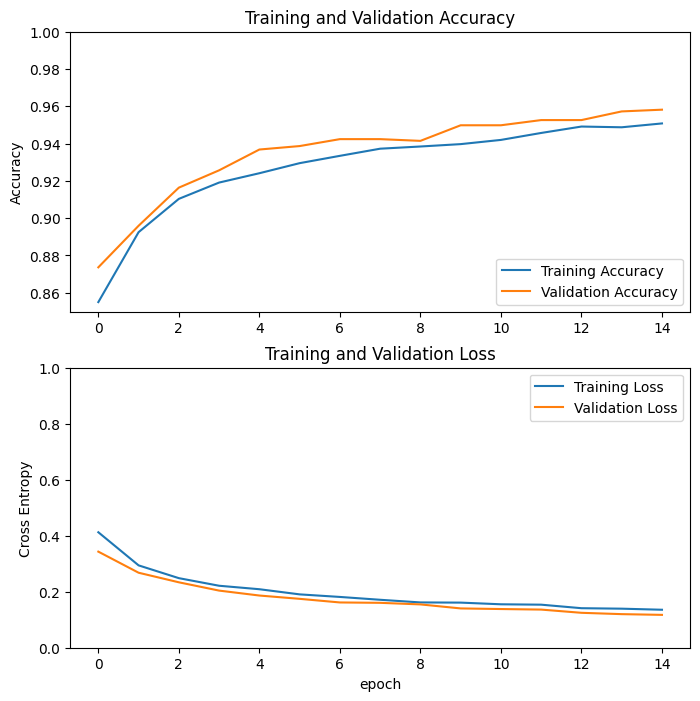

In [ ]:
# Compile and train
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

initial_epochs = 15

loss0, accuracy0 = model.evaluate(validation_dataset)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=initial_epochs  # Start with 10, increase if needed
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

2025-05-03 20:44:22.828548: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.842076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.850841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.852336: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.860057: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.860855: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.861542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.861934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-05-03 20:44:22.862196: W tensorflow/core/lib/png/png_io.cc:92] PNG 

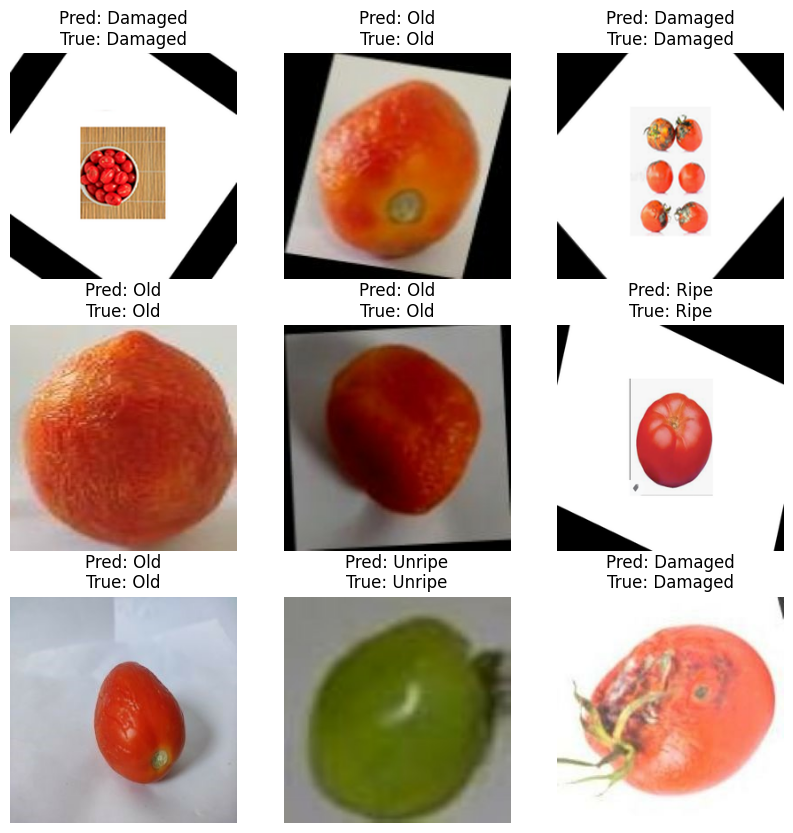

In [26]:
# Test validation

# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
# Predict on batch
pred_probs = model.predict_on_batch(image_batch)  # shape: (batch_size, 4)
pred_class_indices = tf.argmax(pred_probs, axis=1).numpy()  # get most probable class

# Display predictions vs ground truth
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    pred_label = class_names[pred_class_indices[i]]
    true_label = class_names[label_batch[i]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")


In [27]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input
from tensorflow.keras import Input, layers, models

# Load base model again
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# Define clean model for export
inputs = Input(shape=(256, 256, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)  # no dropout
outputs = layers.Dense(4, activation='softmax')(x)
inference_model = models.Model(inputs, outputs)
inference_model.set_weights(model.get_weights())


In [28]:
# Save model
# inference_model.export("../models/tomato_ripeness_model_k.keras")
inference_model.save("../models/updated_tomato_ripeness_model.keras")

In [66]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(inference_model)
tflite_model = converter.convert()

# Save to file
with open("../models/tomato_ripeness_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/72/p5pcb_114q725f21jd_ng6cr0000gn/T/tmp15sby0ig/assets


INFO:tensorflow:Assets written to: /var/folders/72/p5pcb_114q725f21jd_ng6cr0000gn/T/tmp15sby0ig/assets


Saved artifact at '/var/folders/72/p5pcb_114q725f21jd_ng6cr0000gn/T/tmp15sby0ig'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_2784')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  16575489296: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  16575486800: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  5493799056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575492752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575493520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575488144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575493136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575494480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575494096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16575495440: TensorSpec(shape=(), dtype=tf.resource, n

W0000 00:00:1746308276.232553 109984860 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746308276.232571 109984860 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-03 14:37:56.232745: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/72/p5pcb_114q725f21jd_ng6cr0000gn/T/tmp15sby0ig
2025-05-03 14:37:56.243357: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-03 14:37:56.243375: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/72/p5pcb_114q725f21jd_ng6cr0000gn/T/tmp15sby0ig
2025-05-03 14:37:56.382043: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-03 14:37:57.084857: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/72/p5pcb_114q725f21jd_ng6cr0000gn/T/tmp15sby0ig
2025-05-03 14:37:57.307955: I tensorflow/cc/saved_model/loader